### Importing relevant libraries

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier    #Multi-Layer Preceptron
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings           # This help to stop warniings from popping up
warnings.filterwarnings("ignore")

### importing needed files into pandas

In [2]:
accidents_2019 = pd.read_csv("Road Safety Data - Accidents 2019.csv")
casualties_2019 = pd.read_csv("Road Safety Data - Casualties 2019.csv")
vehicles_2019 = pd.read_csv("Road Safety Data- Vehicles 2019.csv")

In [3]:
accidents_2019 = pd.DataFrame(accidents_2019)
accidents_2019["Latitude"]

0         51.508057
1         51.436208
2         51.526795
3         51.546387
4         51.541121
            ...    
117531    55.047323
117532    55.215407
117533    54.991685
117534    55.148292
117535    55.357237
Name: Latitude, Length: 117536, dtype: float64

##### Viewing for accidents

In [4]:
# Viewing for accidents

accidents_2019.head(10)

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2019010128300               528218.0                180407.0  -0.153842   
1  2019010152270               530219.0                172463.0  -0.127949   
2  2019010155191               530222.0                182543.0  -0.124193   
3  2019010155192               525531.0                184605.0  -0.191044   
4  2019010155194               524920.0                184004.0  -0.200064   
5  2019010155195               540188.0                185266.0   0.020461   
6  2019010155196               532424.0                164886.0  -0.099071   
7  2019010155198               532773.0                178460.0  -0.088978   
8  2019010155206               548535.0                188113.0   0.141957   
9  2019010155207               522267.0                168185.0  -0.243769   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.508057             1                  3                   2   
1  51.436208             1                  3                   2   
2  51.526795             1                  3                   2   
3  51.546387             1                  2                   1   
4  51.541121             1                  3                   2   
5  51.548879             1                  3                   2   
6  51.367605             1                  3                   1   
7  51.489509             1                  3                   3   
8  51.572326             1                  3                   2   
9  51.399529             1                  3                   3   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     3  18/02/2019  ...                                  0   
1                     1  15/01/2019  ...                                 -1   
2                     1  01/01/2019  ...                                  0   
3                     1  01/01/2019  ...                                  0   
4                     2  01/01/2019  ...                                  0   
5                     3  01/01/2019  ...                                  0   
6                     1  01/01/2019  ...                                  0   
7                     5  01/01/2019  ...                                  0   
8                     1  01/01/2019  ...                                  0   
9                     1  01/01/2019  ...                                  0   

  Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                       5                 1   
1                                      -1                 4   
2                                       0                 4   
3                                       0                 4   
4                                       0                 4   
5                                       0                 4   
6                                       5                 4   
7                                       0                 4   
8                                       5                 4   
9                                       0                 4   

  Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                  1                        1                           0   
1                  1                        1                           0   
2                  1                        1                           0   
3                  1                        1                           0   
4                  1                        1                           0   
5                  1                        1                           0   
6                  1                        1                           0   
7                  1                        1                           0   
8                  1                        1                           0   
9                  1                        1    

In [5]:
print(accidents_2019.columns)
print("\n")
print("The number of columns in the accidents_2019 dataset is:", len(accidents_2019.columns),"Columns and a length of: ", len(accidents_2019),"Rows")

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


The number of columns in the accidents_2019 dataset is: 32 Columns and a length of:  117536 Rows


In [6]:
len(accidents_2019)

117536

##### Viewing for casualties

In [7]:
# Viewing for casualties

casualties_2019.head(10)

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  2019010128300                  1                   1               1   
1  2019010128300                  1                   2               2   
2  2019010128300                  1                   3               2   
3  2019010152270                  1                   1               1   
4  2019010155191                  2                   1               2   
5  2019010155192                  1                   1               3   
6  2019010155194                  1                   1               1   
7  2019010155194                  1                   2               2   
8  2019010155195                  1                   1               1   
9  2019010155195                  1                   2               2   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               58                     9                  3   
1                2               -1                    -1                  3   
2                2               -1                    -1                  3   
3                2               24                     5                  3   
4                2               21                     5                  3   
5                1               68                    10                  2   
6                2               47                     8                  3   
7                2               16                     4                  3   
8                1               20                     4                  3   
9                1               41                     7                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    0                    0              0   
1                    0                    0              1   
2                    0                    0              2   
3                    0                    0              0   
4                    0                    0              0   
5                    5                    4              0   
6                    0                    0              0   
7                    0                    0              1   
8                    0                    0              0   
9                    0                    0              2   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                   0              9   
1                       0                                   0              9   
2                       0                                   0              9   
3                       0                                   0              9   
4                       0                                   0              1   
5                       0                                   0              0   
6                       0                                   0              9   
7                       0                                   0              9   
8                       0                                   0              9   
9                       0                                   0              9   

   Casualty_Home_Area_Type  Casualty_IMD_Decile  
0                        1                    2  
1                        1                    5  
2                        1                    5  
3                        1                    3  
4                        1                    1  
5                        1                    4  
6                        1                    3  
7                        1                    3  
8                        1                    4  
9                        1                    5

In [8]:
print(casualties_2019.columns)
print("\n")
print("The number of columns in the casualties_2019 dataset is:", len(casualties_2019.columns),"Columns and a length of: ", len(casualties_2019),"Rows")

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')


The number of columns in the casualties_2019 dataset is: 16 Columns and a length of:  153158 Rows


##### Viewing for Vehicles

In [9]:
# Viewing for vehicles

vehicles_2019.head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  2019010128300                  1             9                        0   
1  2019010128300                  2             9                        0   
2  2019010152270                  1             9                        0   
3  2019010152270                  2             9                        0   
4  2019010155191                  1             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 -1                                -1                 -1   
1                 -1                                -1                 -1   
2                 18                                -1                  0   
3                 18                                -1                  0   
4                  3                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                        -1                         -1   
1                        -1                         -1   
2                        -1                         -1   
3                        -1                         -1   
4                         0                          0   

   Vehicle_Leaving_Carriageway  ...  Journey_Purpose_of_Driver  Sex_of_Driver  \
0                           -1  ...                          6              1   
1                           -1  ...                          6              3   
2                           -1  ...                          6              2   
3                           -1  ...                          6              3   
4                            0  ...                          6              1   

   Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
0             58                   9                    -1               -1   
1             -1                  -1                    -1               -1   
2             24                   5                    -1               -1   
3             -1                  -1                    -1               -1   
4             45                   7                    -1               -1   

   Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
0              -1                  2                      1   
1              -1                  2                      1   
2              -1                  3                      1   
3              -1                  6                      1   
4              -1                  4                      1   

   Vehicle_IMD_Decile  
0                   2  
1                   2  
2                   3  
3                   6  
4                   4  

[5 rows x 23 columns]

In [10]:
print(vehicles_2019.columns)
print("\n")
print("The number of columns in the vehicles_2019 dataset is:", len(vehicles_2019.columns),"Columns and a length of: ", len(vehicles_2019),"Rows")

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')


The number of columns in the vehicles_2019 dataset is: 23 Columns and a length of:  216381 Rows


In [11]:
# Initial preview into the dataset accidents

accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

### Merging all datasets

In [12]:
# Accident records merged with casualty records and then vehicle records

vehicles_2019_new = pd.merge(accidents_2019,vehicles_2019,how="inner")
casulaties_2019_new = pd.merge(accidents_2019,casualties_2019,how="inner")
combined_df_2019 = pd.merge(vehicles_2019_new,casualties_2019,how="inner")
combined_df_2019

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010128300               528218.0                180407.0   
2       2019010128300               528218.0                180407.0   
3       2019010152270               530219.0                172463.0   
4       2019010155191               530222.0                182543.0   
...               ...                    ...                     ...   
109513  2019984106919               312635.0                573392.0   
109514  2019984107019               337522.0                591682.0   
109515  2019984107219               318544.0                567087.0   
109516  2019984107419               336525.0                584226.0   
109517  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.153842  51.508057             1                  3   
2       -0.153842  51.508057             1                  3   
3       -0.127949  51.436208             1                  3   
4       -0.124193  51.526795             1                  3   
...           ...        ...           ...                ...   
109513  -3.368899  55.047323            98                  3   
109514  -2.983499  55.215407            98                  3   
109515  -3.274645  54.991685            98                  3   
109516  -2.997491  55.148292            98                  3   
109517  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     3  18/02/2019  ...   
2                        2                     3  18/02/2019  ...   
3                        2                     1  15/01/2019  ...   
4                        2                     1  01/01/2019  ...   
...                    ...                   ...         ...  ...   
109513                   1                     1  18/05/2019  ...   
109514                   4                     1  30/05/2019  ...   
109515                   2                     1  21/06/2019  ...   
109516                   1                     1  29/06/2019  ...   
109517                   1                     1  21/04/2019  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
0                          9                 3                    0   
1                         -1                 3                    0   
2                         -1                 3                    0   
3                          5                 3                    0   
4                          5                 3                    0   
...                      ...               ...                  ...   
109513                     5                 3                    0   
109514                     5                 3                    0   
109515                     9                 3                    0   
109516                     8                 3                    5   
109517                     8                 2                    0   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
0                        0              0                       0   
1                        0              1                       0   
2                        0              2                       0   
3                        0              0                       0   
4                        0              0                       0   
...                    ...            ...                     ...   
109513                   0              0                       0   
109514                   0              0                       0   
109515                   0              0                 

In [13]:
print(combined_df_2019.columns)
print("\n")
print("The number of columns in the combined_df_2019 dataset is:", len(combined_df_2019.columns),"Columns and a length of: ", len(combined_df_2019),"Rows")

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_C

In [14]:
len(combined_df_2019)

109518

In [15]:
combined_df_2019.info()
#[" Accident_Index", "Date", "Time", "Local_Authority_(Highway)", "LSOA_of_Accident_Location"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109518 entries, 0 to 109517
Data columns (total 68 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               109518 non-null  object 
 1   Location_Easting_OSGR                        109478 non-null  float64
 2   Location_Northing_OSGR                       109478 non-null  float64
 3   Longitude                                    109478 non-null  float64
 4   Latitude                                     109478 non-null  float64
 5   Police_Force                                 109518 non-null  int64  
 6   Accident_Severity                            109518 non-null  int64  
 7   Number_of_Vehicles                           109518 non-null  int64  
 8   Number_of_Casualties                         109518 non-null  int64  
 9   Date                                         109518 non-nul

#### Visualizing the Nullity Matrix( that is the positional matrix of missing values).

<AxesSubplot:>

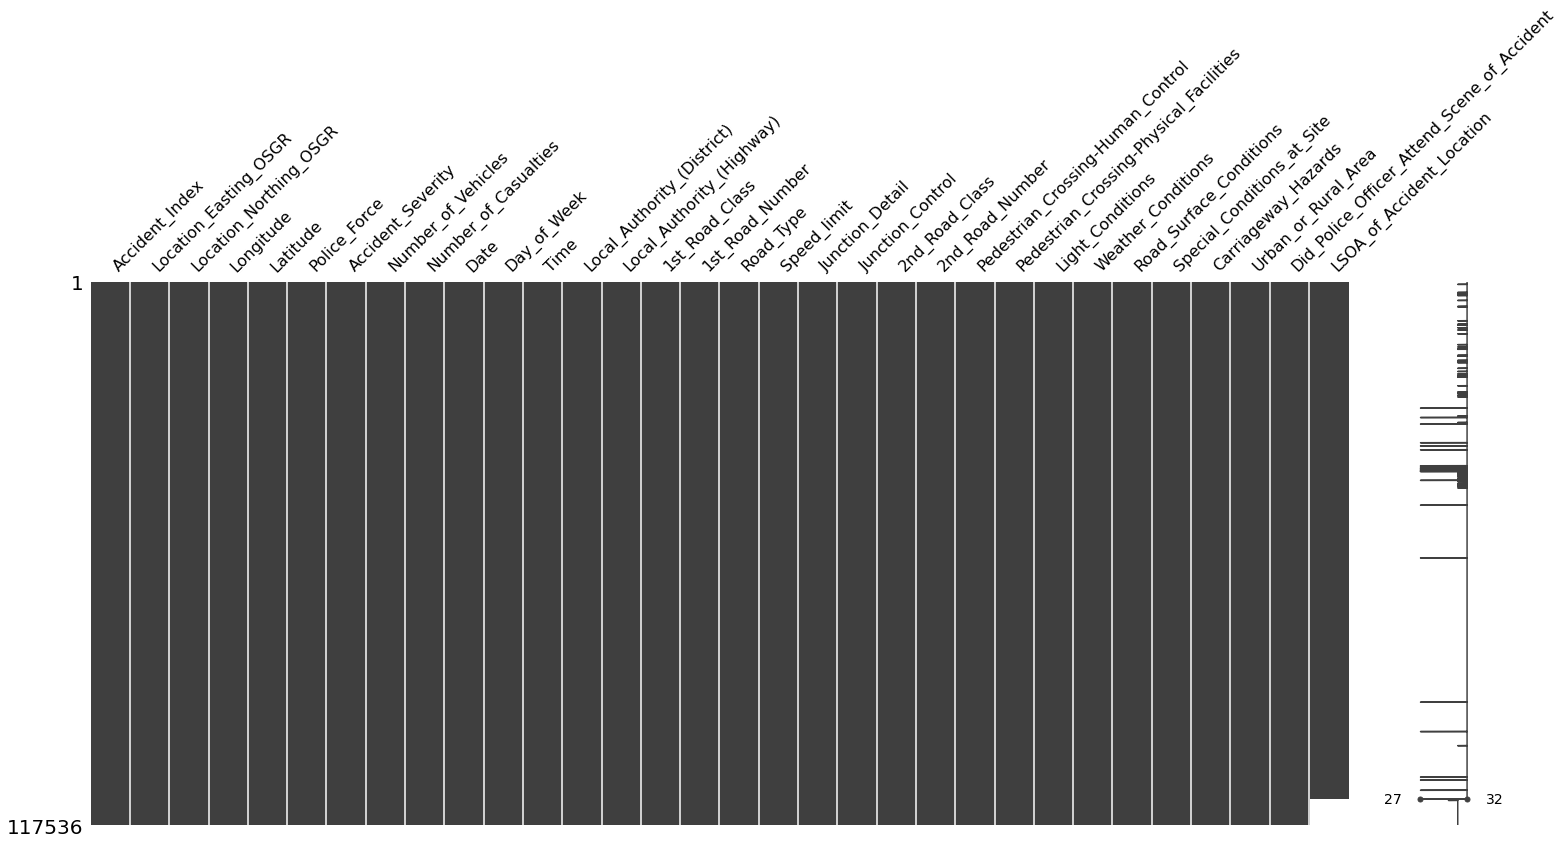

In [16]:
# Visualizing the Nullity Matrix( that is the positional matrix of missing values).
import missingno as msno

msno.matrix(accidents_2019,sort=None,
    figsize=(25, 10),)

<AxesSubplot:>

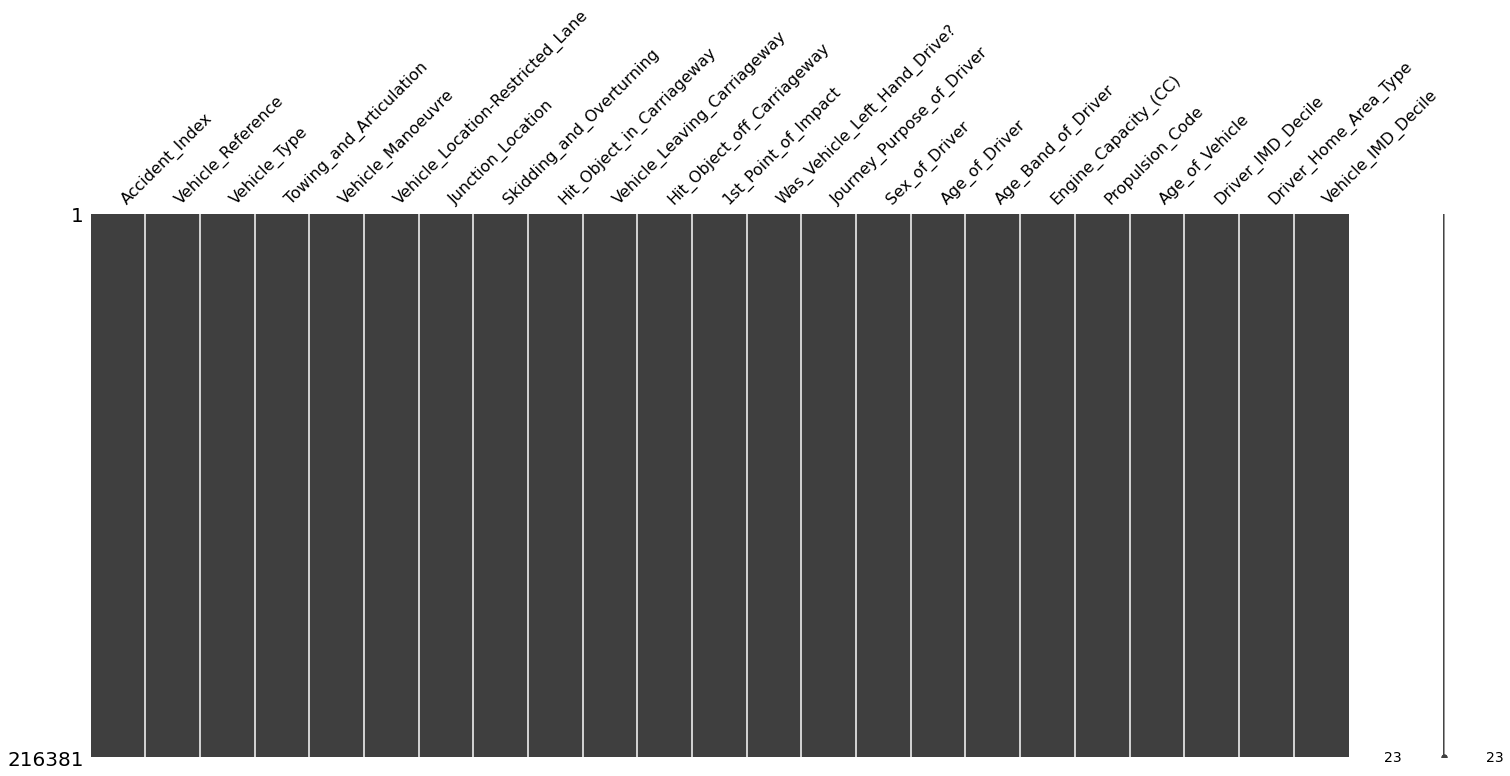

In [17]:
msno.matrix(vehicles_2019)

<AxesSubplot:>

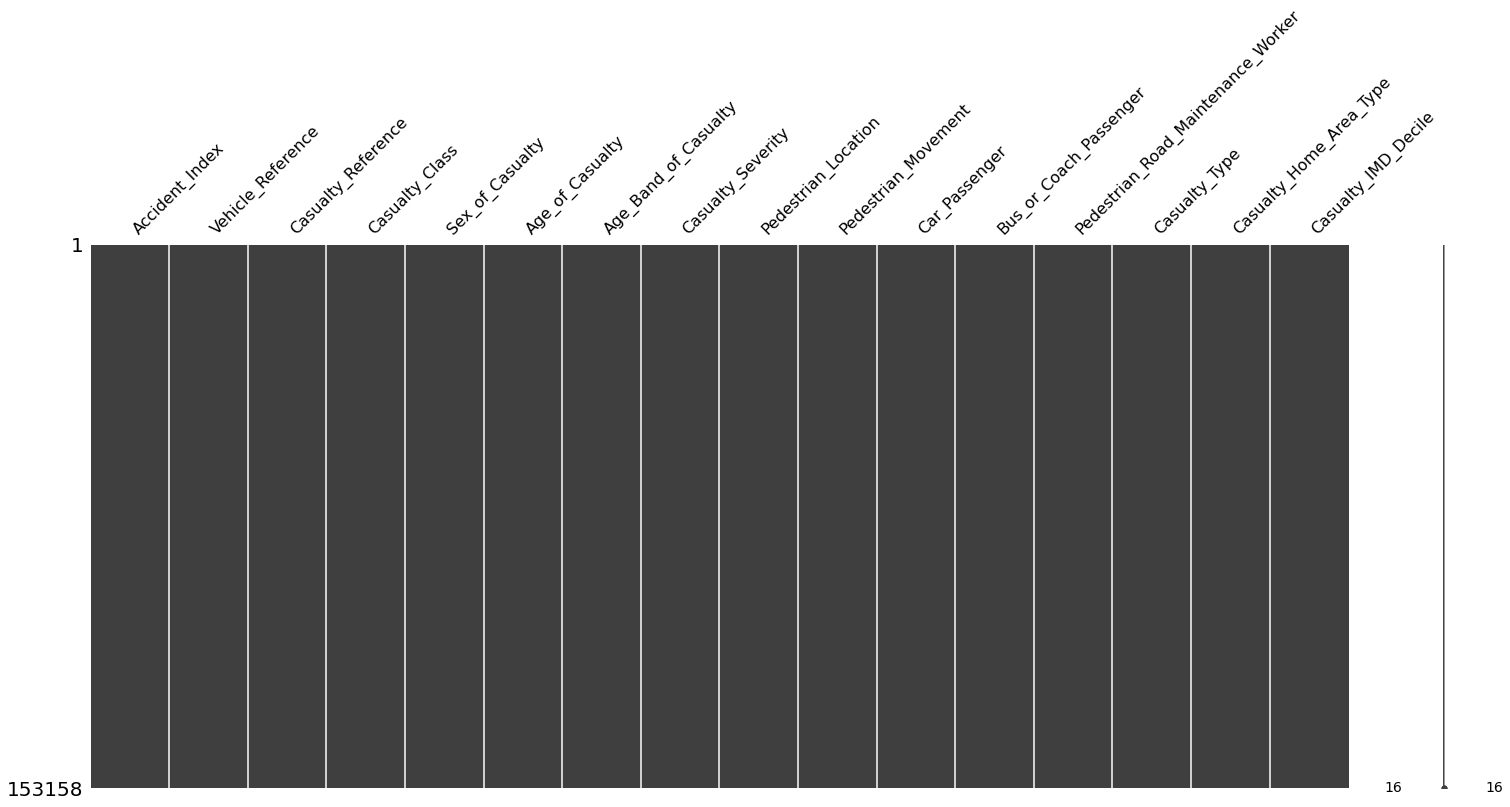

In [18]:
msno.matrix(casualties_2019)

### Dropping na values temporarily

In [19]:
#combined_df_2019_new = combined_df_2019_new.dropna()

In [20]:
#accidents_2019 =  accidents_2019.dropna()

In [21]:
#len(combined_df_2019_new.loc[lambda x:x["Road_Type"] == 6])

In [22]:
#len(combined_df_2019_new.loc[lambda x:x["Vehicle_Type"] == 9])

In [23]:
#marital_checklist = ['Married','Divorced']
#married_divorce_data = (cleaned_age_data.loc[cleaned_age_data["Marital Status"].str.contains("|".join(marital_checklist), na=False, case=False, regex=True)])


In [24]:
# Previewing casualty dataset
accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [25]:
# Previewing casualty dataset
casualties_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [26]:
# Previewing Vehicle dataset
vehicles_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [27]:
combined_df_2019["LSOA_of_Accident_Location"].values

array(['E01004762', 'E01004762', 'E01004762', ..., nan, nan, nan],
      dtype=object)

### Cleaning the combined dataframe

In [28]:
#### Functions for data exploration

In [29]:
# Note: 
# checker_1 is for returning sum of null entries
# checker_2 is for returning data type
# checker_3 is for returning true for null entries
# pos_eval is for returning the row numbers of a data series with null entries
# the_unique is for checking unique values in a  data series
# empty_df_extractor returns the dataframe of all entries will null values for the data series 

In [30]:
def checker_1(value):
    result = accidents_2019[value].isnull().sum()
    return result

In [31]:
def checker_2(value):
    result = accidents_2019[value].dtype
    return result

In [32]:
def checker_3(value):
    result = accidents_2019[value].isnull()
    return result

In [33]:
def pos_eval(value):        # For this, result from any checker_3 instance serves as input for this function
    list_storage = []
    for e, i in enumerate(value):
        if i == True:
            list_storage.append(e)
    return list_storage

In [34]:
def the_unique(value):
    result =accidents_2019[value].unique()
    return result

In [35]:
# returns the dataframe of all entries will null values for the data series 
def empty_df_extractor(value):
    empty_df = accidents_2019[lambda x: x[value].isnull() == True]
    return empty_df

#### Exploing each data series in the accident_2019 data frame

In [36]:
# Exploring the data for Accident_Index

checker_1("Accident_Index")  # For the sum of null entries.

0

In [37]:
# Checking data type

checker_2("Accident_Index")

dtype('O')

In [38]:
# Exploring the data for Location_Easting_OSGR

checker_1("Location_Easting_OSGR")  # For the sum of null entries.

28

In [39]:
# Checking data type

checker_2("Location_Easting_OSGR")

dtype('float64')

In [40]:
# creating a variable for rows with null entries as True

le_osgr = checker_3("Location_Easting_OSGR")

In [41]:
# Printing of rows with null entries
east_osgr = pos_eval(le_osgr)
print(east_osgr)

[27337, 29369, 30791, 34816, 35505, 36347, 39798, 39919, 39933, 40179, 40399, 40451, 40659, 40723, 40885, 40891, 40946, 40976, 41049, 42953, 48320, 59724, 90918, 97271, 107114, 107755, 109965, 111821]


In [42]:
# Extracting the dataframe of rows with null entries for location easting osgr
df_empty_le_osgr = empty_df_extractor("Location_Easting_OSGR")
df_empty_le_osgr

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
35505   2019070275916                    NaN                     NaN   
36347   2019070700923                    NaN                     NaN   
39798   2019121900341                    NaN                     NaN   
39919   2019121900485                    NaN                     NaN   
39933   2019121900505                    NaN                     NaN   
40179   2019121900771                    NaN                     NaN   
40399   2019121901033                    NaN                     NaN   
40451   2019121901096                    NaN                     NaN   
40659   2019121901327                    NaN                     NaN   
40723   2019121901399                    NaN                     NaN   
40885   2019121901582                    NaN                     NaN   
40891   2019121901588                    NaN                     NaN   
40946   2019122000042                    NaN                     NaN   
40976   2019122000077                    NaN                     NaN   
41049   2019122000278                    NaN                     NaN   
42953   20191367G1635                    NaN                     NaN   
48320   2019160864733                    NaN                     NaN   
59724   2019230919173                    NaN                     NaN   
90918   2019460853756                    NaN                     NaN   
97271   2019471902378                    NaN                     NaN   
107114  2019551900980                    NaN                     NaN   
107755  201960X043729                    NaN                     NaN   
109965  2019621900922                    NaN                     NaN   
111821  201963D115219                    NaN                     NaN   

        Longitude  Latitude  Police_Force  Accident_Severity  \
27337         NaN       NaN             4                  3   
29369         NaN       NaN             5                  3   
30791         NaN       NaN             5                  2   
34816         NaN       NaN             7                  3   
35505         NaN       NaN             7                  3   
36347         NaN       NaN             7                  3   
39798         NaN       NaN            12                  2   
39919         NaN       NaN            12                  3   
39933         NaN       NaN            12                  3   
40179         NaN       NaN            12                  3   
40399         NaN       NaN            12                  3   
40451         NaN       NaN            12                  3   
40659         NaN       NaN            12                  3   
40723         NaN       NaN            12                  3   
40885         NaN       NaN            12                  3   
40891         NaN       NaN            12                  3   
40946         NaN       NaN            12                  3   
40976         NaN       NaN            12                  3   
41049         NaN       NaN            12                  3   
42953         NaN       NaN            13                  3   
48320         NaN       NaN            16                  3   
59724         NaN       NaN            23                  3   
90918         NaN       NaN            46                  2   
97271         NaN       NaN            47                  3   
107114        NaN       NaN            55                  3   
107755        NaN       NaN            60                  2   
109965        NaN       NaN            62                  3   
111821        NaN       NaN            63                  3   

        Number_of_Vehicles  Number_of_Casualties        Date 

In [43]:
# Exploring the data for Location_Easting_OSGR

checker_1("Location_Northing_OSGR")  # For the sum of null entries.

28

In [44]:
# Checking data type

checker_2("Location_Northing_OSGR")

dtype('float64')

In [45]:
# creating a variable for rows with null entries as True

ne_osgr = checker_3("Location_Northing_OSGR")

In [46]:
# Printing of rows with null entries
north_osgr = pos_eval(ne_osgr)
print(north_osgr)

[27337, 29369, 30791, 34816, 35505, 36347, 39798, 39919, 39933, 40179, 40399, 40451, 40659, 40723, 40885, 40891, 40946, 40976, 41049, 42953, 48320, 59724, 90918, 97271, 107114, 107755, 109965, 111821]


In [47]:
# Extracting the dataframe of rows with null entries for location northing osgr
df_empty_ln_osgr = empty_df_extractor("Location_Northing_OSGR")
df_empty_ln_osgr

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
35505   2019070275916                    NaN                     NaN   
36347   2019070700923                    NaN                     NaN   
39798   2019121900341                    NaN                     NaN   
39919   2019121900485                    NaN                     NaN   
39933   2019121900505                    NaN                     NaN   
40179   2019121900771                    NaN                     NaN   
40399   2019121901033                    NaN                     NaN   
40451   2019121901096                    NaN                     NaN   
40659   2019121901327                    NaN                     NaN   
40723   2019121901399                    NaN                     NaN   
40885   2019121901582                    NaN                     NaN   
40891   2019121901588                    NaN                     NaN   
40946   2019122000042                    NaN                     NaN   
40976   2019122000077                    NaN                     NaN   
41049   2019122000278                    NaN                     NaN   
42953   20191367G1635                    NaN                     NaN   
48320   2019160864733                    NaN                     NaN   
59724   2019230919173                    NaN                     NaN   
90918   2019460853756                    NaN                     NaN   
97271   2019471902378                    NaN                     NaN   
107114  2019551900980                    NaN                     NaN   
107755  201960X043729                    NaN                     NaN   
109965  2019621900922                    NaN                     NaN   
111821  201963D115219                    NaN                     NaN   

        Longitude  Latitude  Police_Force  Accident_Severity  \
27337         NaN       NaN             4                  3   
29369         NaN       NaN             5                  3   
30791         NaN       NaN             5                  2   
34816         NaN       NaN             7                  3   
35505         NaN       NaN             7                  3   
36347         NaN       NaN             7                  3   
39798         NaN       NaN            12                  2   
39919         NaN       NaN            12                  3   
39933         NaN       NaN            12                  3   
40179         NaN       NaN            12                  3   
40399         NaN       NaN            12                  3   
40451         NaN       NaN            12                  3   
40659         NaN       NaN            12                  3   
40723         NaN       NaN            12                  3   
40885         NaN       NaN            12                  3   
40891         NaN       NaN            12                  3   
40946         NaN       NaN            12                  3   
40976         NaN       NaN            12                  3   
41049         NaN       NaN            12                  3   
42953         NaN       NaN            13                  3   
48320         NaN       NaN            16                  3   
59724         NaN       NaN            23                  3   
90918         NaN       NaN            46                  2   
97271         NaN       NaN            47                  3   
107114        NaN       NaN            55                  3   
107755        NaN       NaN            60                  2   
109965        NaN       NaN            62                  3   
111821        NaN       NaN            63                  3   

        Number_of_Vehicles  Number_of_Casualties        Date 

In [48]:
# Exploring the data for Longitude

checker_1("Longitude")  # For the sum of null entries.

28

In [49]:
# Checking data type

checker_2("Longitude")

dtype('float64')

In [50]:
# creating a variable for rows with null entries as True

lon_null = checker_3("Longitude")

In [51]:
# Printing of rows with null entries

print(pos_eval(lon_null))

[27337, 29369, 30791, 34816, 35505, 36347, 39798, 39919, 39933, 40179, 40399, 40451, 40659, 40723, 40885, 40891, 40946, 40976, 41049, 42953, 48320, 59724, 90918, 97271, 107114, 107755, 109965, 111821]


In [52]:
# Extracting the dataframe of rows with null entries for longitude
df_empty_long = empty_df_extractor("Longitude")
df_empty_long

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
35505   2019070275916                    NaN                     NaN   
36347   2019070700923                    NaN                     NaN   
39798   2019121900341                    NaN                     NaN   
39919   2019121900485                    NaN                     NaN   
39933   2019121900505                    NaN                     NaN   
40179   2019121900771                    NaN                     NaN   
40399   2019121901033                    NaN                     NaN   
40451   2019121901096                    NaN                     NaN   
40659   2019121901327                    NaN                     NaN   
40723   2019121901399                    NaN                     NaN   
40885   2019121901582                    NaN                     NaN   
40891   2019121901588                    NaN                     NaN   
40946   2019122000042                    NaN                     NaN   
40976   2019122000077                    NaN                     NaN   
41049   2019122000278                    NaN                     NaN   
42953   20191367G1635                    NaN                     NaN   
48320   2019160864733                    NaN                     NaN   
59724   2019230919173                    NaN                     NaN   
90918   2019460853756                    NaN                     NaN   
97271   2019471902378                    NaN                     NaN   
107114  2019551900980                    NaN                     NaN   
107755  201960X043729                    NaN                     NaN   
109965  2019621900922                    NaN                     NaN   
111821  201963D115219                    NaN                     NaN   

        Longitude  Latitude  Police_Force  Accident_Severity  \
27337         NaN       NaN             4                  3   
29369         NaN       NaN             5                  3   
30791         NaN       NaN             5                  2   
34816         NaN       NaN             7                  3   
35505         NaN       NaN             7                  3   
36347         NaN       NaN             7                  3   
39798         NaN       NaN            12                  2   
39919         NaN       NaN            12                  3   
39933         NaN       NaN            12                  3   
40179         NaN       NaN            12                  3   
40399         NaN       NaN            12                  3   
40451         NaN       NaN            12                  3   
40659         NaN       NaN            12                  3   
40723         NaN       NaN            12                  3   
40885         NaN       NaN            12                  3   
40891         NaN       NaN            12                  3   
40946         NaN       NaN            12                  3   
40976         NaN       NaN            12                  3   
41049         NaN       NaN            12                  3   
42953         NaN       NaN            13                  3   
48320         NaN       NaN            16                  3   
59724         NaN       NaN            23                  3   
90918         NaN       NaN            46                  2   
97271         NaN       NaN            47                  3   
107114        NaN       NaN            55                  3   
107755        NaN       NaN            60                  2   
109965        NaN       NaN            62                  3   
111821        NaN       NaN            63                  3   

        Number_of_Vehicles  Number_of_Casualties        Date 

In [53]:
# Exploring the data for Latitude 

checker_1("Latitude") # For the sum of null entries.

28

In [54]:
# Checking data type

checker_2("Latitude")

dtype('float64')

In [55]:
# creating a variable for rows with null entries as True

lat_null = checker_3("Latitude")

In [56]:
# Printing of rows with null entries

print(pos_eval(lat_null))

[27337, 29369, 30791, 34816, 35505, 36347, 39798, 39919, 39933, 40179, 40399, 40451, 40659, 40723, 40885, 40891, 40946, 40976, 41049, 42953, 48320, 59724, 90918, 97271, 107114, 107755, 109965, 111821]


In [57]:
# Extracting the dataframe of rows with null entries for latitude
df_empty_lat = empty_df_extractor("Longitude")
df_empty_lat

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
35505   2019070275916                    NaN                     NaN   
36347   2019070700923                    NaN                     NaN   
39798   2019121900341                    NaN                     NaN   
39919   2019121900485                    NaN                     NaN   
39933   2019121900505                    NaN                     NaN   
40179   2019121900771                    NaN                     NaN   
40399   2019121901033                    NaN                     NaN   
40451   2019121901096                    NaN                     NaN   
40659   2019121901327                    NaN                     NaN   
40723   2019121901399                    NaN                     NaN   
40885   2019121901582                    NaN                     NaN   
40891   2019121901588                    NaN                     NaN   
40946   2019122000042                    NaN                     NaN   
40976   2019122000077                    NaN                     NaN   
41049   2019122000278                    NaN                     NaN   
42953   20191367G1635                    NaN                     NaN   
48320   2019160864733                    NaN                     NaN   
59724   2019230919173                    NaN                     NaN   
90918   2019460853756                    NaN                     NaN   
97271   2019471902378                    NaN                     NaN   
107114  2019551900980                    NaN                     NaN   
107755  201960X043729                    NaN                     NaN   
109965  2019621900922                    NaN                     NaN   
111821  201963D115219                    NaN                     NaN   

        Longitude  Latitude  Police_Force  Accident_Severity  \
27337         NaN       NaN             4                  3   
29369         NaN       NaN             5                  3   
30791         NaN       NaN             5                  2   
34816         NaN       NaN             7                  3   
35505         NaN       NaN             7                  3   
36347         NaN       NaN             7                  3   
39798         NaN       NaN            12                  2   
39919         NaN       NaN            12                  3   
39933         NaN       NaN            12                  3   
40179         NaN       NaN            12                  3   
40399         NaN       NaN            12                  3   
40451         NaN       NaN            12                  3   
40659         NaN       NaN            12                  3   
40723         NaN       NaN            12                  3   
40885         NaN       NaN            12                  3   
40891         NaN       NaN            12                  3   
40946         NaN       NaN            12                  3   
40976         NaN       NaN            12                  3   
41049         NaN       NaN            12                  3   
42953         NaN       NaN            13                  3   
48320         NaN       NaN            16                  3   
59724         NaN       NaN            23                  3   
90918         NaN       NaN            46                  2   
97271         NaN       NaN            47                  3   
107114        NaN       NaN            55                  3   
107755        NaN       NaN            60                  2   
109965        NaN       NaN            62                  3   
111821        NaN       NaN            63                  3   

        Number_of_Vehicles  Number_of_Casualties        Date 

In [58]:
# Initial Report_1: It seems there are 24 rows without a way to track their actual location.

In [59]:
checker_1("LSOA_of_Accident_Location")

5714

In [60]:
checker_2("LSOA_of_Accident_Location")

dtype('O')

In [61]:
lsqa_null = checker_3("LSOA_of_Accident_Location")

In [62]:
print(pos_eval(lsqa_null))

[27337, 29031, 29369, 30791, 34816, 35505, 36347, 39798, 39919, 39933, 40179, 40399, 40451, 40659, 40723, 40885, 40891, 40946, 40976, 41049, 42953, 48320, 59724, 90918, 97271, 100322, 107114, 107755, 109965, 111821, 111852, 111853, 111854, 111855, 111856, 111857, 111858, 111859, 111860, 111861, 111862, 111863, 111864, 111865, 111866, 111867, 111868, 111869, 111870, 111871, 111872, 111873, 111874, 111875, 111876, 111877, 111878, 111879, 111880, 111881, 111882, 111883, 111884, 111885, 111886, 111887, 111888, 111889, 111890, 111891, 111892, 111893, 111894, 111895, 111896, 111897, 111898, 111899, 111900, 111901, 111902, 111903, 111904, 111905, 111906, 111907, 111908, 111909, 111910, 111911, 111912, 111913, 111914, 111915, 111916, 111917, 111918, 111919, 111920, 111921, 111922, 111923, 111924, 111925, 111926, 111927, 111928, 111929, 111930, 111931, 111932, 111933, 111934, 111935, 111936, 111937, 111938, 111939, 111940, 111941, 111942, 111943, 111944, 111945, 111946, 111947, 111948, 111949, 

In [63]:
# Extracting the dataframe of rows with null entries for LSOA_of_Accident_Location
df_empty_lsoa = empty_df_extractor("LSOA_of_Accident_Location")
df_empty_lsoa

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29031   2019050886495               347346.0                392329.0   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
...               ...                    ...                     ...   
117531  2019984106919               312635.0                573392.0   
117532  2019984107019               337522.0                591682.0   
117533  2019984107219               318544.0                567087.0   
117534  2019984107419               336525.0                584226.0   
117535  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
27337         NaN        NaN             4                  3   
29031   -2.793842  53.425127             5                  3   
29369         NaN        NaN             5                  3   
30791         NaN        NaN             5                  2   
34816         NaN        NaN             7                  3   
...           ...        ...           ...                ...   
117531  -3.368899  55.047323            98                  3   
117532  -2.983499  55.215407            98                  3   
117533  -3.274645  54.991685            98                  3   
117534  -2.997491  55.148292            98                  3   
117535  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
27337                    2                     1  21/06/2019  ...   
29031                    2                     1  07/10/2019  ...   
29369                    1                     1  04/03/2019  ...   
30791                    2                     2  08/11/2019  ...   
34816                    1                     1  04/01/2019  ...   
...                    ...                   ...         ...  ...   
117531                   1                     1  18/05/2019  ...   
117532                   4                     1  30/05/2019  ...   
117533                   2                     1  21/06/2019  ...   
117534                   1                     1  29/06/2019  ...   
117535                   1                     1  21/04/2019  ...   

        Pedestrian_Crossing-Human_Control  \
27337                                   0   
29031                                   0   
29369                                   0   
30791                                   0   
34816                                   0   
...                                   ...   
117531                                  0   
117532                                  0   
117533                                  0   
117534                                  0   
117535                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
27337                                        0                 1   
29031                                        0                 1   
29369                                        0                 4   
30791                                        0                 6   
34816                                        0                 1   
...                                        ...               ...   
117531                                       0                 1   
117532                                       0                 1   
117533                                       0                 1   
117534                                       0                 1   
117535                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
27337                   1                        1   
29031                   1                        1   
29369       

In [64]:
# Exploring the data for Day_of_Week 

checker_1("Day_of_Week") # For the sum of null entries.

0

In [65]:
# Checking data type

checker_2("Day_of_Week")

dtype('int64')

In [66]:
# Checking for unique elements in data series

the_unique("Day_of_Week")

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [67]:
# Exploring the data for Date 

checker_1("Date") # For the sum of null entries.

0

In [68]:
# Checking data type

checker_2("Date")

dtype('O')

In [69]:
# Checking for unique elements in data series

the_unique("Date")

array(['18/02/2019', '15/01/2019', '01/01/2019', '02/01/2019',
       '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019',
       '11/01/2019', '12/01/2019', '13/01/2019', '14/01/2019',
       '17/01/2019', '16/01/2019', '18/01/2019', '19/01/2019',
       '20/01/2019', '21/01/2019', '22/01/2019', '23/01/2019',
       '24/01/2019', '25/01/2019', '26/01/2019', '27/01/2019',
       '28/01/2019', '29/01/2019', '30/01/2019', '31/01/2019',
       '01/02/2019', '02/02/2019', '03/02/2019', '04/02/2019',
       '05/02/2019', '06/02/2019', '07/02/2019', '08/02/2019',
       '09/02/2019', '10/02/2019', '11/02/2019', '12/02/2019',
       '13/02/2019', '14/02/2019', '15/02/2019', '16/02/2019',
       '17/02/2019', '24/04/2019', '19/02/2019', '20/02/2019',
       '21/02/2019', '22/02/2019', '18/06/2019', '23/02/2019',
       '24/02/2019', '25/02/2019', '26/02/2019', '28/03/2019',
       '27/02/2019', '28/02/2019', '01/03/2019', '02/03

In [70]:
# Coverting the type of data type for the Date

accidents_2019["Date"] = pd.to_datetime(accidents_2019["Date"], errors='raise', dayfirst=False, yearfirst=True, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
accidents_2019["Date"]

0        2019-02-18
1        2019-01-15
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
117531   2019-05-18
117532   2019-05-30
117533   2019-06-21
117534   2019-06-29
117535   2019-04-21
Name: Date, Length: 117536, dtype: datetime64[ns]

### Function to replace missing null values

In [71]:
# Function to replace null entries for location_easting_osgr, location_northing_osgr, longitude and latitude.
def replace_null_func(df,data_series,missing_rows):

# This part of the function gets the mode to replace missing data based on police force location.
    pf_dict = {}
    p_list = df["Police_Force"].unique()
    for i in p_list:
        pfresult = df[lambda x: x["Police_Force"] == i]
        pf_new = pfresult[data_series].mode()   
        pf_dict[i]=pf_new[0]

# Function to replace missing data 
    for i in pf_dict.keys():
        for j,k in missing_rows.iterrows():
            if i == df["Police_Force"][j]:
#                df[data_series].replace(df[data_series][j], pf_dict[i], inplace=True)
                df.loc[[j],data_series] = [pf_dict[i]]

In [72]:
# Calling the function to replace missing values for location_easting_osgr, location_northing_osgr, longitude and latitude.
replace_null_func(accidents_2019,"Location_Easting_OSGR",df_empty_le_osgr)
replace_null_func(accidents_2019,"Location_Northing_OSGR",df_empty_ln_osgr)
replace_null_func(accidents_2019,"Longitude",df_empty_long)
replace_null_func(accidents_2019,"Latitude",df_empty_lat)
#replace_null_lsoa_func(combined_df_2019_new,"LSOA_of_Accident_Location",df_empty_lsoa)

In [73]:
# Function to replace null entries for Time.
def replace_time_null_func(df,data_series,missing_rows):

# This part of the function gets the mode to replace missing data based on police force location.
    pf_dict = {}
    p_list = df["Police_Force"].unique()
    for i in p_list:
        pfresult = df[lambda x: x["Police_Force"] == i]
        pf_new = pfresult[data_series].mode()   
        pf_dict[i]=pf_new[0]

# Function to replace missing data 
    for i in pf_dict.keys():
        for j,k in missing_rows.iterrows():
            if i == df["Police_Force"][j]:
#                df[data_series].replace(df[data_series][j], pf_dict[i], inplace=True)
                df.loc[[j],data_series] = [pf_dict[i]]

In [74]:
# Extracting the dataframe of rows with null entries for Time
df_empty_time = empty_df_extractor("Time")
df_empty_time

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
578     2019010157254               533599.0                193819.0   
582     2019010157270               534633.0                181247.0   
2326    2019010162544               529616.0                180782.0   
2417    2019010162834               528247.0                174040.0   
2570    2019010163302               526839.0                182474.0   
...               ...                    ...                     ...   
44094   2019136B70166               440156.0                423928.0   
44177   2019136BD1094               428516.0                432660.0   
44186   2019136BE0937               429859.0                433789.0   
44582   2019136CI1516               415080.0                437637.0   
112149  201991SNJ4201               283817.0                900213.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
578     -0.071257  51.627336             1                  3   
582     -0.061140  51.514114             1                  3   
2326    -0.133571  51.511108             1                  3   
2417    -0.155733  51.450830             1                  3   
2570    -0.172958  51.526944             1                  3   
...           ...        ...           ...                ...   
44094   -1.393107  53.710255            13                  3   
44177   -1.568648  53.789497            13                  3   
44186   -1.548155  53.799569            13                  3   
44582   -1.772344  53.834788            13                  3   
112149  -3.966041  57.975936            91                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
578                      2                     1 2019-01-13  ...   
582                      2                     1 2019-10-01  ...   
2326                     1                     1 2019-10-02  ...   
2417                     2                     1 2019-10-02  ...   
2570                     2                     1 2019-02-14  ...   
...                    ...                   ...        ...  ...   
44094                    2                     1 2019-07-11  ...   
44177                    2                     1 2019-07-11  ...   
44186                    2                     1 2019-11-14  ...   
44582                    1                     1 2019-12-18  ...   
112149                   1                     1 2019-02-19  ...   

        Pedestrian_Crossing-Human_Control  \
578                                     0   
582                                    -1   
2326                                    0   
2417                                   -1   
2570                                    0   
...                                   ...   
44094                                   0   
44177                                   0   
44186                                   0   
44582                                   0   
112149                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
578                                          0                 7   
582                                          1                 1   
2326                                         0                 4   
2417                                        -1                 4   
2570                                         0                 4   
...                                        ...               ...   
44094                                        0                 4   
44177                                        0                 1   
44186                                        0                 4   
44582                                        0                 4   
112149                                       0                 4   

       Weather_Conditions  Road_Surface_Conditions  \
578                     1                        2   
582                     8                        1   
2326                    

In [75]:
replace_time_null_func(accidents_2019,"Time",df_empty_time)

In [76]:
# Coverting the type of data type for the Time

accidents_2019["Time"] = pd.to_datetime(accidents_2019["Time"], errors='coerce', dayfirst=False, yearfirst=True, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
accidents_2019["Time"]

0        2022-10-01 17:50:00
1        2022-10-01 21:45:00
2        2022-10-01 01:50:00
3        2022-10-01 01:20:00
4        2022-10-01 00:40:00
                 ...        
117531   2022-10-01 01:00:00
117532   2022-10-01 08:46:00
117533   2022-10-01 15:30:00
117534   2022-10-01 14:10:00
117535   2022-10-01 12:45:00
Name: Time, Length: 117536, dtype: datetime64[ns]

In [77]:
# Splitting time into hours, minutes  and seconds

accidents_2019["Hours"] =  accidents_2019["Time"].dt.hour
accidents_2019["Minutes"] =  accidents_2019["Time"].dt.minute
accidents_2019["Seconds"] =  accidents_2019["Time"].dt.second
accidents_2019["Weeks"] =  accidents_2019["Date"].dt.week

In [78]:
# Converting time to decimal.

accidents_2019["decimal_time"] = accidents_2019["Hours"] + accidents_2019["Minutes"]/60 + accidents_2019["Seconds"]/3600
print(accidents_2019["decimal_time"])

0         17.833333
1         21.750000
2          1.833333
3          1.333333
4          0.666667
            ...    
117531     1.000000
117532     8.766667
117533    15.500000
117534    14.166667
117535    12.750000
Name: decimal_time, Length: 117536, dtype: float64


In [79]:
# Coverting the highway authority codes to string format
#combined_df_2019_new["Local_Authority_(Highway)"] = np.dtype(combined_df_2019_new["Local_Authority_(Highway)"], np.str)
accidents_2019["Local_Authority_(Highway)"].astype(str)   
accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

In [80]:
# Coverting the LSOA_of_Accident_Location codes to string format
accidents_2019["LSOA_of_Accident_Location"].astype(str) 

0         E01004762
1         E01003117
2         E01000943
3         E01000973
4         E01000546
            ...    
117531          nan
117532          nan
117533          nan
117534          nan
117535          nan
Name: LSOA_of_Accident_Location, Length: 117536, dtype: object

In [81]:
# NOT IN USE
# Function to replace null entries for LSOA_of_Accident_Location.
def replace_null_lsoa_func(df,data_series,missing_rows):

# This part of the function gets the mode to replace missing data based on police force location.
    pf_dict = {}
    p_list = df["Police_Force"].unique()
    for i in p_list:
        pfresult = df[lambda x: x["Police_Force"] == i]
        pf_new = pfresult[data_series].mode()   
        pf_dict[i]=pf_new

# Function to replace missing data 
    for i in pf_dict.keys():
        for j,k in missing_rows.iterrows():
            if i == df["Police_Force"][j]:
#                df[data_series].replace(df[data_series][j], pf_dict[i], inplace=True)
                df.loc[[j],data_series] = [pf_dict[i]]

In [82]:
#Code Trial
#lsoa_domain_df1 = combined_df_2019_new[lambda x: (x["Police_Force"].isnull() | x["Police_Force"].notnull() )]
#lsoa_domain_df1

In [83]:
# Breaking down the LSOA into sub areas by police force and then getting the mode value for each of those areas
pf_lsoa_dicts = {}
pf_list = accidents_2019["Police_Force"].unique()
for i in pf_list:
    pfresults_df = accidents_2019[lambda x: x["Police_Force"] == i]
    pf_new_results = pfresults_df["LSOA_of_Accident_Location"].mode()
    pf_lsoa_dicts[i]=pf_new_results

In [84]:
# Viewing the result of the created dictionary
pf_lsoa_dicts

{1: 0    E01004736
 Name: LSOA_of_Accident_Location, dtype: object,
 3: 0    E01019211
 Name: LSOA_of_Accident_Location, dtype: object,
 4: 0    E01025277
 Name: LSOA_of_Accident_Location, dtype: object,
 5: 0    E01033756
 Name: LSOA_of_Accident_Location, dtype: object,
 6: 0    E01006121
 Name: LSOA_of_Accident_Location, dtype: object,
 7: 0    E01018648
 Name: LSOA_of_Accident_Location, dtype: object,
 10: 0    E01033543
 Name: LSOA_of_Accident_Location, dtype: object,
 11: 0    E01012366
 Name: LSOA_of_Accident_Location, dtype: object,
 12: 0    E01027734
 Name: LSOA_of_Accident_Location, dtype: object,
 13: 0    E01033010
 Name: LSOA_of_Accident_Location, dtype: object,
 14: 0    E01033269
 Name: LSOA_of_Accident_Location, dtype: object,
 16: 0    E01012889
 Name: LSOA_of_Accident_Location, dtype: object,
 17: 0    E01033468
 Name: LSOA_of_Accident_Location, dtype: object,
 20: 0    E01033561
 Name: LSOA_of_Accident_Location, dtype: object,
 21: 0    E01014287
 Name: LSOA_of_Accid

In [85]:
# Dropping police force greater than 90 which are locations of police force in Scotland area and does not possess lsoa
lsoa_domain_df = accidents_2019[lambda x: x["Police_Force"] < 90 ]

# An array for lsoa data
#lsoa_array = lsoa_domain_df["LSOA_of_Accident_Location"].to_numpy

In [86]:
# Breaking down the LSOA into sub areas by police force and then getting the mode value for each of those areas
# Excluding Scotland areas which do not use LSOA but DZ.
pf_dicts = {}
pf_list = lsoa_domain_df["Police_Force"].unique()
for i in pf_list:
    pfresults_df = lsoa_domain_df[lambda x: x["Police_Force"] == i]
    pf_new_results = pfresults_df["LSOA_of_Accident_Location"].mode()[0]
    pf_dicts[i]=pf_new_results

In [87]:
# Viewing the result of the created dictionary
pf_dicts

{1: 'E01004736',
 3: 'E01019211',
 4: 'E01025277',
 5: 'E01033756',
 6: 'E01006121',
 7: 'E01018648',
 10: 'E01033543',
 11: 'E01012366',
 12: 'E01027734',
 13: 'E01033010',
 14: 'E01033269',
 16: 'E01012889',
 17: 'E01033468',
 20: 'E01033561',
 21: 'E01014287',
 22: 'E01014010',
 23: 'E01031159',
 30: 'E01019799',
 31: 'E01033400',
 32: 'E01026093',
 33: 'E01032867',
 34: 'E01032979',
 35: 'E01032797',
 36: 'E01026822',
 37: 'E01029945',
 40: 'E01017620',
 41: 'E01023722',
 42: 'E01021768',
 43: 'E01028521',
 44: 'E01017140',
 45: 'E01030458',
 46: 'E01024721',
 47: 'E01031583',
 48: 'E01032739',
 50: 'E01020241',
 52: 'E01014540',
 53: 'E01022420',
 54: 'E01032013',
 55: 'E01020509',
 60: 'W01001926',
 61: 'W01001524',
 62: 'W01001939',
 63: 'W01001897'}

In [88]:
pf_dicts.keys()

dict_keys([1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 60, 61, 62, 63])

In [89]:
# Counting the number of accident for each LSOA mode value and converting the result into a dataframe
the_result = {}
for e,j in enumerate(pf_dicts.keys()):
    pfresults_cvs = lsoa_domain_df[lambda x: x["LSOA_of_Accident_Location"] == pf_dicts[j]]
    the_sum = pfresults_cvs["LSOA_of_Accident_Location"].value_counts()
    the_result[j]=the_sum[0]
#the_result
 #   the_result = dict(j,the_sum[0])
lsoa_result = pd.DataFrame.from_dict(the_result, orient= "index", columns = ["COUNTS"])
lsoa_result=lsoa_result.reset_index() 
lsoa_result

index  COUNTS
0       1     119
1       3      17
2       4      25
3       5      29
4       6      32
5       7      45
6      10      45
7      11      23
8      12      21
9      13      45
10     14      37
11     16      36
12     17      16
13     20      50
14     21      20
15     22      22
16     23      22
17     30      22
18     31      29
19     32      31
20     33      29
21     34      28
22     35      45
23     36      31
24     37      24
25     40      42
26     41      55
27     42      40
28     43      39
29     44      33
30     45      45
31     46      53
32     47      41
33     48     194
34     50      26
35     52      50
36     53      23
37     54      21
38     55      23
39     60      12
40     61      13
41     62      28
42     63      22

In [90]:
# Counting the number of accident for each LSOA mode value and converting the result into a dataframe
the_result = {}
for e,j in enumerate(pf_dicts.values()):
    pfresults_cvs = lsoa_domain_df[lambda x: x["LSOA_of_Accident_Location"] == j]
    the_sum = pfresults_cvs["LSOA_of_Accident_Location"].value_counts()
    the_result[j]=the_sum[0]
#the_result
 #   the_result = dict(j,the_sum[0])
lsoa_result = pd.DataFrame.from_dict(the_result, orient= "index", columns = ["COUNTS"])
lsoa_val_result=lsoa_result.reset_index() 
lsoa_val_result

index  COUNTS
0   E01004736     119
1   E01019211      17
2   E01025277      25
3   E01033756      29
4   E01006121      32
5   E01018648      45
6   E01033543      45
7   E01012366      23
8   E01027734      21
9   E01033010      45
10  E01033269      37
11  E01012889      36
12  E01033468      16
13  E01033561      50
14  E01014287      20
15  E01014010      22
16  E01031159      22
17  E01019799      22
18  E01033400      29
19  E01026093      31
20  E01032867      29
21  E01032979      28
22  E01032797      45
23  E01026822      31
24  E01029945      24
25  E01017620      42
26  E01023722      55
27  E01021768      40
28  E01028521      39
29  E01017140      33
30  E01030458      45
31  E01024721      53
32  E01031583      41
33  E01032739     194
34  E01020241      26
35  E01014540      50
36  E01022420      23
37  E01032013      21
38  E01020509      23
39  W01001926      12
40  W01001524      13
41  W01001939      28
42  W01001897      22

In [91]:
# Viewing the dataframe info after data cleaning
accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

In [92]:
accidents_2019["Longitude"]

0        -0.153842
1        -0.127949
2        -0.124193
3        -0.191044
4        -0.200064
            ...   
117531   -3.368899
117532   -2.983499
117533   -3.274645
117534   -2.997491
117535   -3.715064
Name: Longitude, Length: 117536, dtype: float64

### Function to replace null entries for Location_Easting_OSGR and Location_Northing_OSGR data series.

In [93]:
# Function to replace null entries for Location_Easting_OSGR and Location_Northing_OSGR data series.
def replace_func_east_north_cord(df,data_series,missing_rows):

# This part of the function gets the mode to replace missing data based on police force location.
    pf_dict = {}
    p_list = df["Police_Force"].unique()
    for i in p_list:
        pfresult = df[lambda x: x["Police_Force"] == i]
        pf_new = pfresult[data_series].mode()   
        pf_dict[i]=pf_new[0]

# Function to replace missing data 
    for i in pf_dict.keys():
        for j in missing_rows:
            if i == df["Police_Force"][j]:
#                df[data_series].replace(df[data_series][j], pf_dict[i], inplace=True)
                df.loc[[j],data_series] = [pf_dict[i]]

In [94]:
accidents_2019["Location_Easting_OSGR"].iloc[36431]

366344.0

In [95]:
accidents_2019["Location_Northing_OSGR"].iloc[36432]

377425.0

In [96]:
# Another method to replace missing values but for location_easting_osgr and location_northing_osgr only.
#replace_func_east_north_cord(combined_df_2019_new,"Location_Easting_OSGR",east_osgr)
#replace_func_east_north_cord(combined_df_2019_new,"Location_Northing_OSGR",north_osgr)

In [97]:
accidents_2019.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Hours', 'Minutes', 'Seconds', 'Weeks',
       'decimal_time'],
      dtype='object')

In [98]:
# Accident records merged with casualty records and then vehicle records
vehicles_2019_new = pd.merge(accidents_2019,vehicles_2019,how="inner")
casulaties_2019_new = pd.merge(accidents_2019,casualties_2019,how="inner")
combined_df_2019 = pd.merge(vehicles_2019_new,casualties_2019,how="inner")
combined_df_2019

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010128300               528218.0                180407.0   
2       2019010128300               528218.0                180407.0   
3       2019010152270               530219.0                172463.0   
4       2019010155191               530222.0                182543.0   
...               ...                    ...                     ...   
109513  2019984106919               312635.0                573392.0   
109514  2019984107019               337522.0                591682.0   
109515  2019984107219               318544.0                567087.0   
109516  2019984107419               336525.0                584226.0   
109517  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.153842  51.508057             1                  3   
2       -0.153842  51.508057             1                  3   
3       -0.127949  51.436208             1                  3   
4       -0.124193  51.526795             1                  3   
...           ...        ...           ...                ...   
109513  -3.368899  55.047323            98                  3   
109514  -2.983499  55.215407            98                  3   
109515  -3.274645  54.991685            98                  3   
109516  -2.997491  55.148292            98                  3   
109517  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
0                        2                     3 2019-02-18  ...   
1                        2                     3 2019-02-18  ...   
2                        2                     3 2019-02-18  ...   
3                        2                     1 2019-01-15  ...   
4                        2                     1 2019-01-01  ...   
...                    ...                   ...        ...  ...   
109513                   1                     1 2019-05-18  ...   
109514                   4                     1 2019-05-30  ...   
109515                   2                     1 2019-06-21  ...   
109516                   1                     1 2019-06-29  ...   
109517                   1                     1 2019-04-21  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
0                          9                 3                    0   
1                         -1                 3                    0   
2                         -1                 3                    0   
3                          5                 3                    0   
4                          5                 3                    0   
...                      ...               ...                  ...   
109513                     5                 3                    0   
109514                     5                 3                    0   
109515                     9                 3                    0   
109516                     8                 3                    5   
109517                     8                 2                    0   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
0                        0              0                       0   
1                        0              1                       0   
2                        0              2                       0   
3                        0              0                       0   
4                        0              0                       0   
...                    ...            ...                     ...   
109513                   0              0                       0   
109514                   0              0                       0   
109515                   0              0                       0   
1

In [99]:
# Confirming the replacement
accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

In [100]:
combined_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109518 entries, 0 to 109517
Data columns (total 73 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               109518 non-null  object        
 1   Location_Easting_OSGR                        109518 non-null  float64       
 2   Location_Northing_OSGR                       109518 non-null  float64       
 3   Longitude                                    109518 non-null  float64       
 4   Latitude                                     109518 non-null  float64       
 5   Police_Force                                 109518 non-null  int64         
 6   Accident_Severity                            109518 non-null  int64         
 7   Number_of_Vehicles                           109518 non-null  int64         
 8   Number_of_Casualties                         109518 non-null  in

### Time and Week Plots

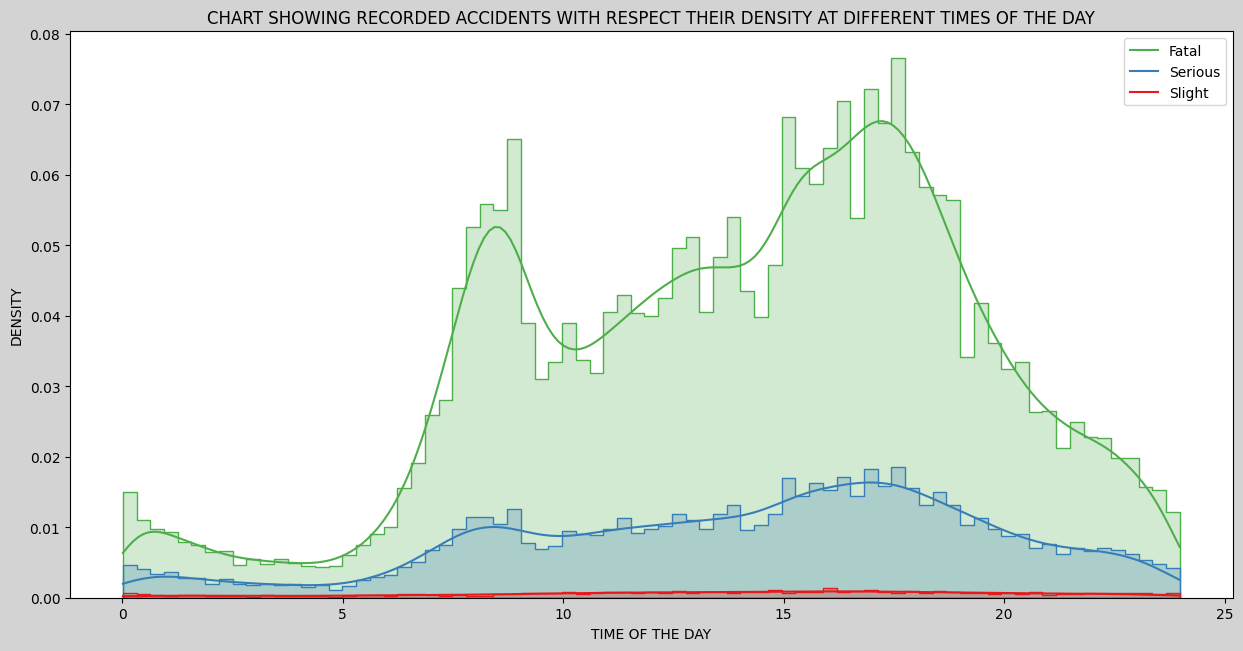

In [101]:
decimal_time_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
decimal_time_chart = sns.histplot(data = accidents_2019,x = "decimal_time",stat = "density", hue="Accident_Severity", element = "step", kde = True, palette="Set1" )
decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.title('CHART SHOWING RECORDED ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious","Slight"])
plt.show()

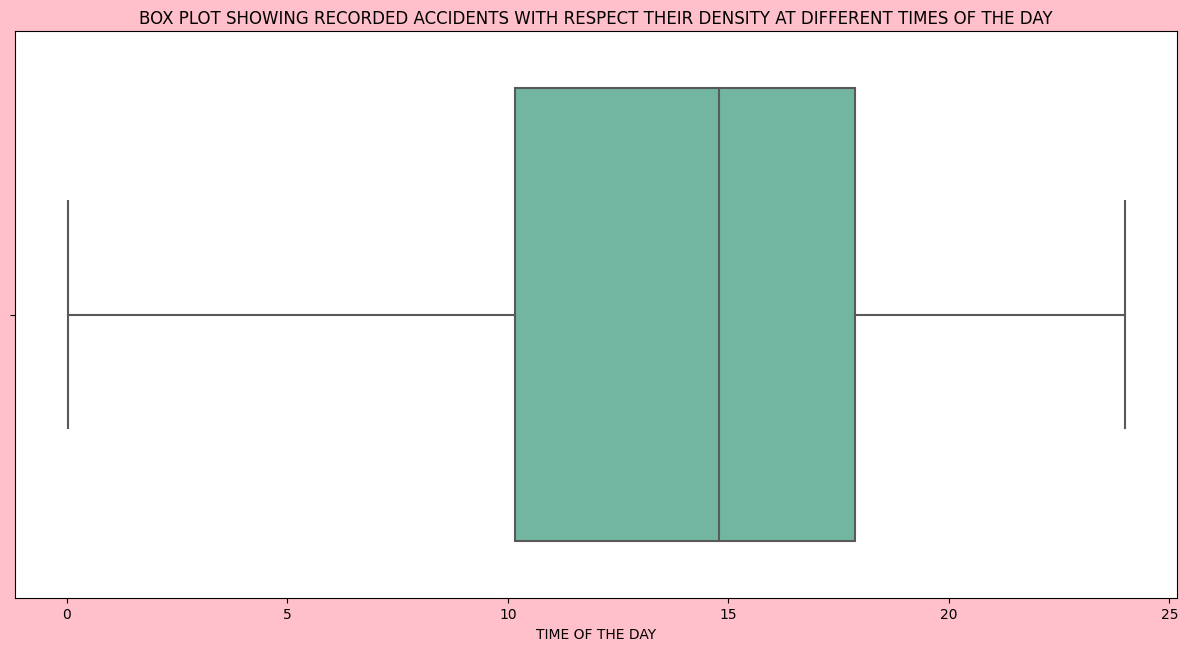

In [102]:
decimal_time_box_plot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="PINK", edgecolor="pink", frameon=True)
decimal_time_box_chart = sns.boxplot(data = accidents_2019,x = "decimal_time", palette = "Set2" )
decimal_time_box_chart.set(xlabel='TIME OF THE DAY')
plt.title('BOX PLOT SHOWING RECORDED ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

In [103]:
# Calculating the mode,mean and median decimal time data series.

mode_of_decimal_time_series = accidents_2019["decimal_time"].mode()
mean_of_decimal_time_series = accidents_2019["decimal_time"].mean()
median_of_decimal_time_series = accidents_2019["decimal_time"].median()
std_of_decimal_time_series = accidents_2019["decimal_time"].std()
print(f" Most of the accidents happen at about {round(mode_of_decimal_time_series,2)[0]:.2f} hours which is mode of the time data series \n The  time of the day with the average number of accidents is {round(mean_of_decimal_time_series,2):.2f} hours \n The standard deviation of the time data series is {round(std_of_decimal_time_series,2):.2f} hours")

 Most of the accidents happen at about 17.00 hours which is mode of the time data series 
 The  time of the day with the average number of accidents is 14.04 hours 
 The standard deviation of the time data series is 5.20 hours


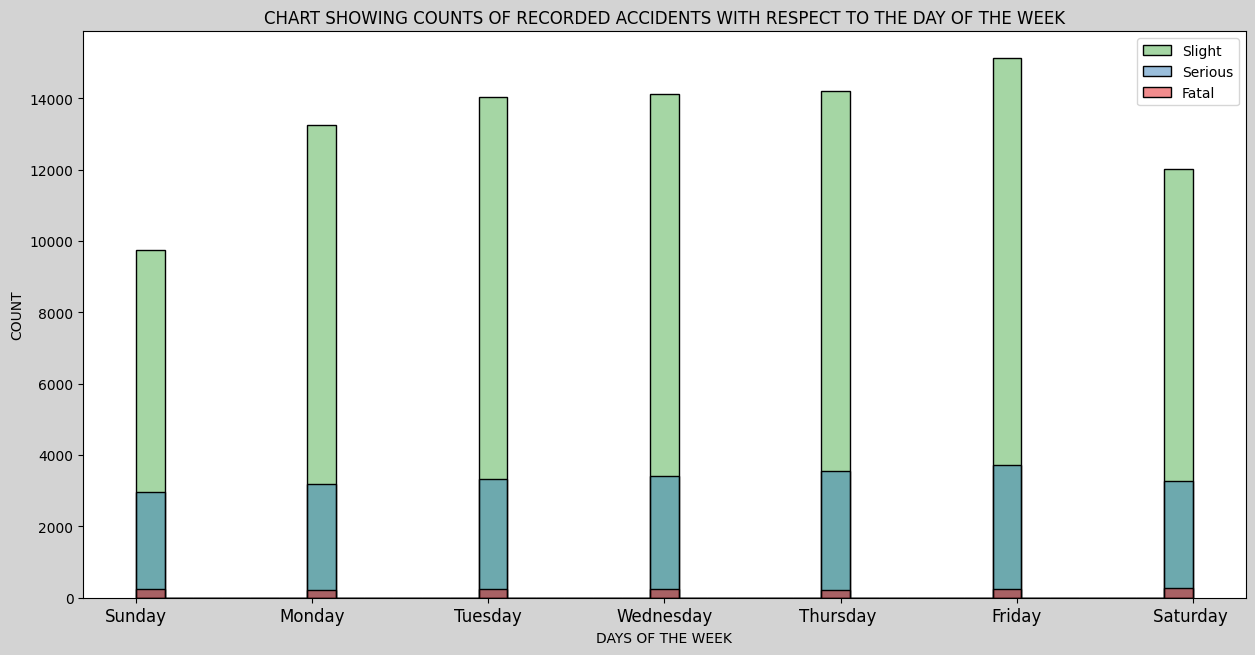

In [104]:
day_of_week_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_of_week_chart = sns.histplot(data = accidents_2019,x = "Day_of_Week", hue="Accident_Severity", palette = "Set1" )
day_of_week_chart.set(xlabel='DAYS OF THE WEEK', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDED ACCIDENTS WITH RESPECT TO THE DAY OF THE WEEK', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"])
plt.legend(["Slight","Serious","Fatal"])
day_of_week_chart.set_xticklabels(["Outliers","Sunday","Monday","Tuesday","Wednesday", "Thursday ","Friday","Saturday "], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
plt.show()

In [105]:
friday_df = accidents_2019[lambda x: x.Day_of_Week == 6]
friday_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
107     2019010155652               528607.0                180095.0   
109     2019010155655               532482.0                173504.0   
111     2019010155657               531697.0                168006.0   
113     2019010155668               537338.0                182819.0   
115     2019010155696               523006.0                184869.0   
...               ...                    ...                     ...   
117505  2019984100119               320024.0                566481.0   
117509  2019984101119               310010.0                598017.0   
117516  2019984104219               313523.0                582066.0   
117520  2019984105019               306188.0                605566.0   
117533  2019984107219               318544.0                567087.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
107     -0.148353  51.505164             1                  3   
109     -0.095022  51.445039             1                  3   
111     -0.108352  51.395813             1                  3   
113     -0.021569  51.527590             1                  3   
115     -0.227347  51.549315             1                  3   
...           ...        ...           ...                ...   
117505  -3.251351  54.986481            98                  3   
117509  -3.417793  55.268064            98                  3   
117516  -3.357641  55.125401            98                  2   
117520  -3.480445  55.335160            98                  3   
117533  -3.274645  54.991685            98                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
107                      2                     1 2019-04-01  ...   
109                      3                     3 2019-04-01  ...   
111                      2                     1 2019-04-01  ...   
113                      2                     1 2019-04-01  ...   
115                      1                     1 2019-04-01  ...   
...                    ...                   ...        ...  ...   
117505                   2                     1 2019-04-01  ...   
117509                   2                     1 2019-01-18  ...   
117516                   1                     1 2019-05-04  ...   
117520                   1                     1 2019-04-26  ...   
117533                   2                     1 2019-06-21  ...   

        Special_Conditions_at_Site Carriageway_Hazards  Urban_or_Rural_Area  \
107                             -1                  -1                    1   
109                              0                   0                    1   
111                              0                   0                    1   
113                             -1                   0                    1   
115                              0                   0                    1   
...                            ...                 ...                  ...   
117505                           0                   0                    1   
117509                           0                   0                    2   
117516                           0                   0                    1   
117520                           0                   0                    2   
117533                           0                   0                    2   

       Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
107                                              3                  E01004761   
109                                              1                  E01003170   
111                                              1                  E01001002   
113                                              3                  E01004267   
115                                              1                  E01000639   
...                                            ...                        ...   
117505                      

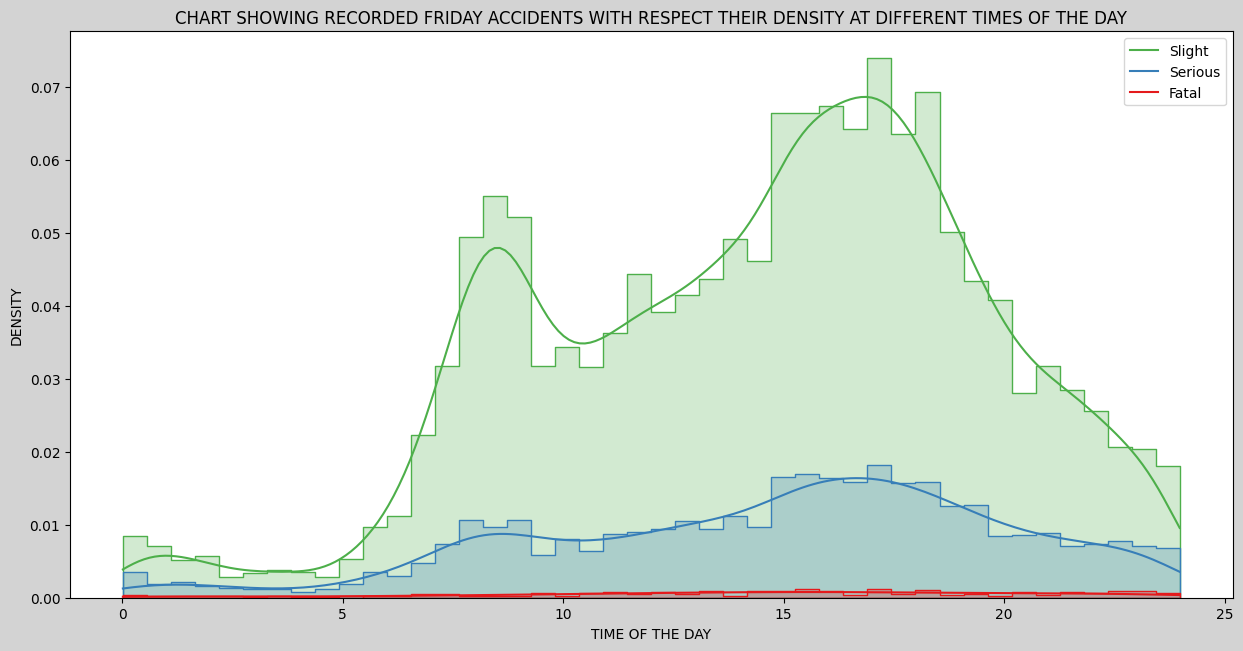

In [106]:
# Extracting data for friday and hours of the day
friday_df = accidents_2019[lambda x: x.Day_of_Week == 6]
friday_decimal_time_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
friday_decimal_time_chart = sns.histplot(data = friday_df,x = "decimal_time",stat = "density", hue="Accident_Severity", element = "step", kde = True, palette="Set1" )
friday_decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.title('CHART SHOWING RECORDED FRIDAY ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious","Fatal"])
plt.show()

### LSOA Plot / Analysis

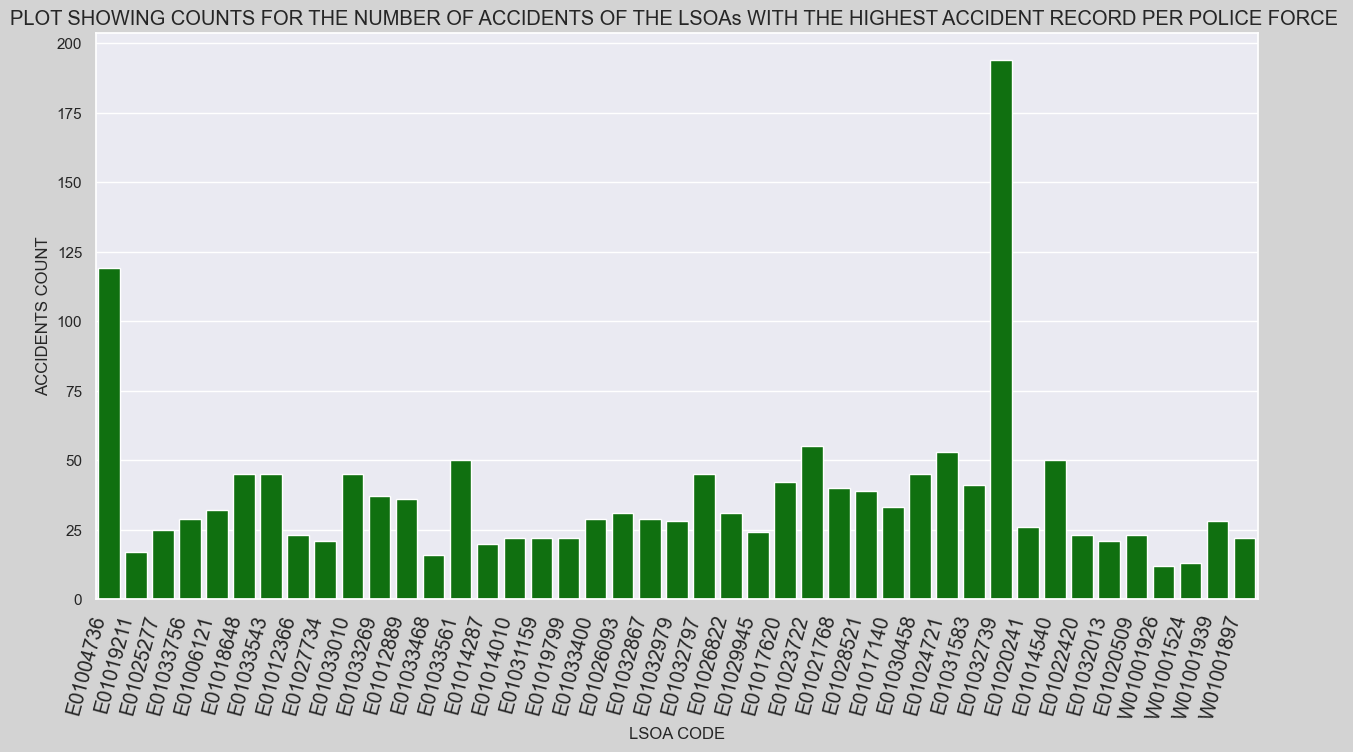

In [107]:
# Plotting a chart to explore the police force with the highest number of accident records in 2019 and plotting out all
# LSOAs under it to visualise the one with the most records of accidents.

plot_lsoa = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
#lsoa_chart = sns.barplot(data = lsoa_result,x= "index", y="COUNTS", palette='Set2' )
lsoa_chart = sns.barplot(data = lsoa_val_result,x= "index", y="COUNTS", color="green" )
lsoa_chart.set(xlabel='LSOA CODE', ylabel='ACCIDENTS COUNT')
lsoa_chart.set_xticklabels(lsoa_chart.get_xticklabels(), rotation=75, horizontalalignment='right',fontweight='light', fontsize='large')
plt.title('PLOT SHOWING COUNTS FOR THE NUMBER OF ACCIDENTS OF THE LSOAs WITH THE HIGHEST ACCIDENT RECORD PER POLICE FORCE ', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()
#lsoa_chart.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=75, horizontalalignment='right',fontweight='light', fontsize='large')

### Merging all datasets

In [108]:
# Accident records merged with casualty records and then vehicle records

vehicles_2019_new = pd.merge(accidents_2019,vehicles_2019,how="inner")
casualties_2019_new = pd.merge(accidents_2019,casualties_2019,how="inner")
combined_df_2019 = pd.merge(vehicles_2019_new,casualties_2019,how="inner")
combined_df_2019

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010128300               528218.0                180407.0   
2       2019010128300               528218.0                180407.0   
3       2019010152270               530219.0                172463.0   
4       2019010155191               530222.0                182543.0   
...               ...                    ...                     ...   
109513  2019984106919               312635.0                573392.0   
109514  2019984107019               337522.0                591682.0   
109515  2019984107219               318544.0                567087.0   
109516  2019984107419               336525.0                584226.0   
109517  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.153842  51.508057             1                  3   
2       -0.153842  51.508057             1                  3   
3       -0.127949  51.436208             1                  3   
4       -0.124193  51.526795             1                  3   
...           ...        ...           ...                ...   
109513  -3.368899  55.047323            98                  3   
109514  -2.983499  55.215407            98                  3   
109515  -3.274645  54.991685            98                  3   
109516  -2.997491  55.148292            98                  3   
109517  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
0                        2                     3 2019-02-18  ...   
1                        2                     3 2019-02-18  ...   
2                        2                     3 2019-02-18  ...   
3                        2                     1 2019-01-15  ...   
4                        2                     1 2019-01-01  ...   
...                    ...                   ...        ...  ...   
109513                   1                     1 2019-05-18  ...   
109514                   4                     1 2019-05-30  ...   
109515                   2                     1 2019-06-21  ...   
109516                   1                     1 2019-06-29  ...   
109517                   1                     1 2019-04-21  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
0                          9                 3                    0   
1                         -1                 3                    0   
2                         -1                 3                    0   
3                          5                 3                    0   
4                          5                 3                    0   
...                      ...               ...                  ...   
109513                     5                 3                    0   
109514                     5                 3                    0   
109515                     9                 3                    0   
109516                     8                 3                    5   
109517                     8                 2                    0   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
0                        0              0                       0   
1                        0              1                       0   
2                        0              2                       0   
3                        0              0                       0   
4                        0              0                       0   
...                    ...            ...                     ...   
109513                   0              0                       0   
109514                   0              0                       0   
109515                   0              0                       0   
1

### Data analysis for motorcycle accidents

In [109]:
# Getting dataframe for motorcycle data
motorcycle_df = vehicles_2019_new[(vehicles_2019_new["Vehicle_Type"] == 2) | (vehicles_2019_new["Vehicle_Type"] == 3) | (vehicles_2019_new["Vehicle_Type"] == 4) | (vehicles_2019_new["Vehicle_Type"] == 5) | (vehicles_2019_new["Vehicle_Type"] == 23) | (vehicles_2019_new["Vehicle_Type"] == 97)]
motorcycle_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
30      2019010155225               512750.0                180199.0   
39      2019010155254               534122.0                189977.0   
41      2019010155255               531638.0                180380.0   
46      2019010155263               538972.0                171167.0   
49      2019010155276               519377.0                184736.0   
...               ...                    ...                     ...   
175591  2019983112919               298215.0                576153.0   
175642  2019984105619               313386.0                566995.0   
175645  2019984105819               311026.0                580728.0   
175648  2019984106019               341523.0                579842.0   
175664  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
30      -0.376691  51.509481             1                  3   
39      -0.065175  51.592686             1                  3   
41      -0.104600  51.507028             1                  3   
46      -0.002610  51.422484             1                  2   
49      -0.279706  51.548898             1                  2   
...           ...        ...           ...                ...   
175591  -3.595481  55.069377            98                  2   
175642  -3.355209  54.989987            98                  3   
175645  -3.396366  55.112939            98                  1   
175648  -2.918177  55.109520            98                  2   
175664  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
30                       2                     1 2019-01-01  ...   
39                       2                     1 2019-01-01  ...   
41                       1                     1 2019-01-01  ...   
46                       2                     1 2019-01-01  ...   
49                       2                     1 2019-01-01  ...   
...                    ...                   ...        ...  ...   
175591                   1                     1 2019-05-16  ...   
175642                   3                     1 2019-07-05  ...   
175645                   3                     1 2019-04-05  ...   
175648                   1                     1 2019-12-05  ...   
175664                   1                     1 2019-04-21  ...   

        Journey_Purpose_of_Driver Sex_of_Driver  Age_of_Driver  \
30                              6             1             30   
39                              1             1             19   
41                              6             1             54   
46                              6             1             20   
49                              6             1             65   
...                           ...           ...            ...   
175591                          6             1             38   
175642                          5             1             21   
175645                          6             1             49   
175648                          6             1             65   
175664                          6             1             55   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
30                      6                    -1               -1   
39                      4                    -1               -1   
41                      8                    -1               -1   
46                      4                    -1               -1   
49                      9                    -1               -1   
...                   ...                   ...              ...   
175591                  7                   124                1   
175642                  5                   124                1   
175645                  8                   999                1   
175648                  9                  1170                1   
175

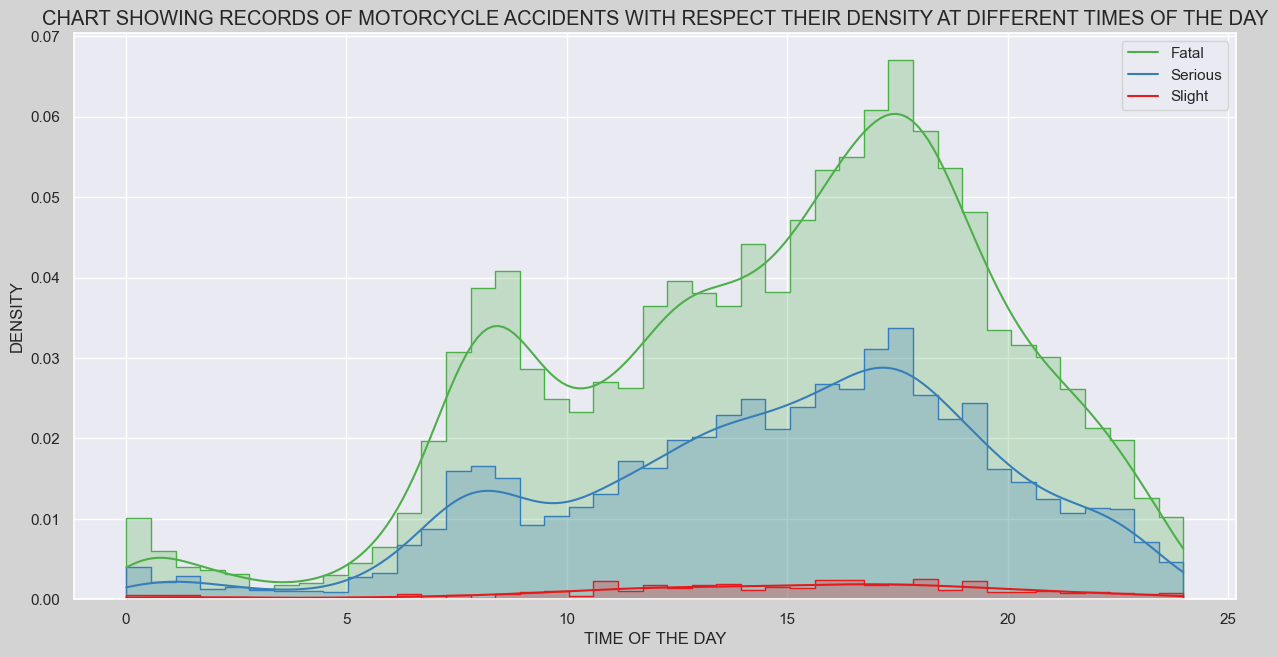

In [110]:
motorcy_decimal_time_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
decimal_time_chart = sns.histplot(data = motorcycle_df,x = "decimal_time",stat = "density", element = "step", kde = True, hue="Accident_Severity", palette="Set1")
decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.legend(["Fatal","Serious", "Slight"])
plt.title('CHART SHOWING RECORDS OF MOTORCYCLE ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"])
plt.show()

In [111]:
motcycle_mode = int(motorcycle_df["decimal_time"].mode()[0])
print(f"The time with most accidents for motocycle is {motcycle_mode:.2f} hours")

The time with most accidents for motocycle is 17.00 hours


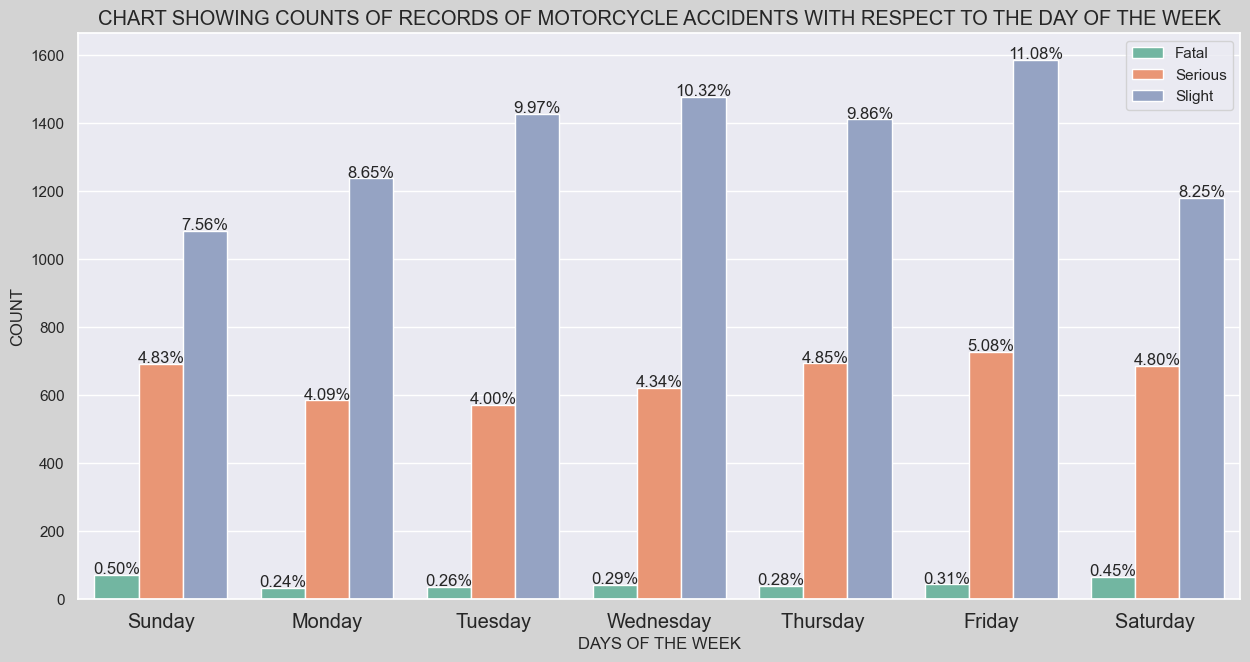

In [112]:
motorcy_day_of_week_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_of_week_chart = sns.countplot(data = motorcycle_df,x = "Day_of_Week", hue="Accident_Severity", palette = "Set2" )
day_of_week_chart.set(xlabel='DAYS OF THE WEEK', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDS OF MOTORCYCLE ACCIDENTS WITH RESPECT TO THE DAY OF THE WEEK', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"])
for p in day_of_week_chart.patches:
    height = p.get_height()
    day_of_week_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(motorcycle_df))*100) + "%", ha="center")
day_of_week_chart.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday", "Thursday ","Friday","Saturday "], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
plt.show()

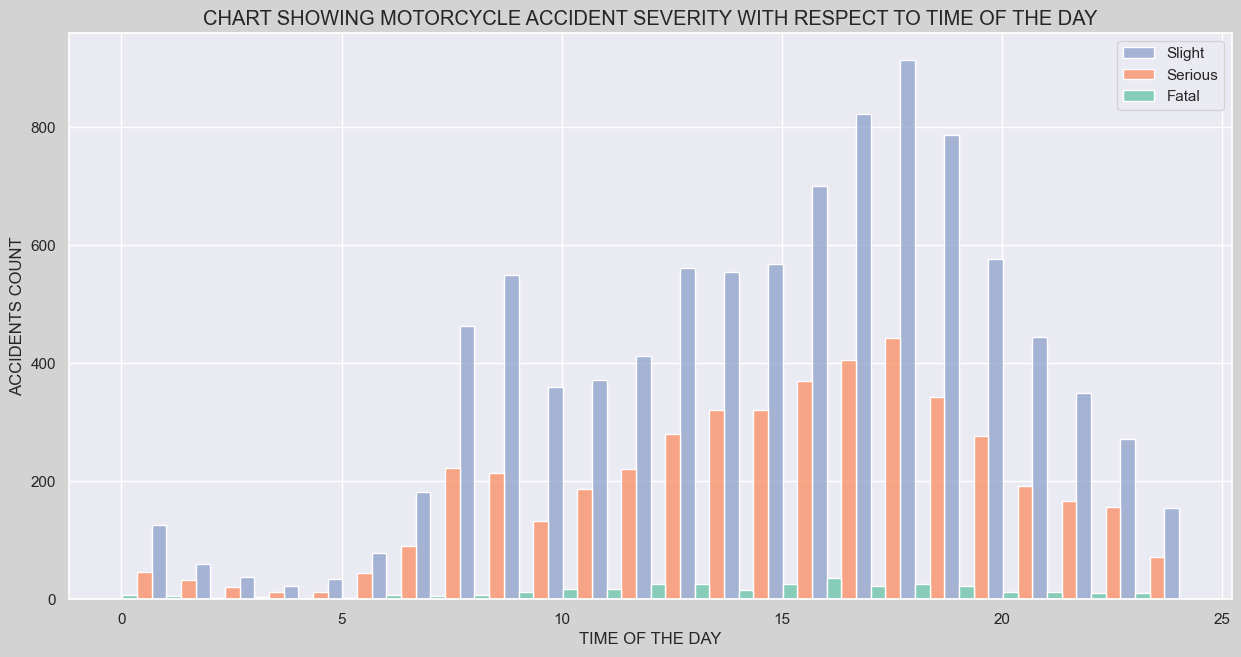

In [113]:
accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
accident_severity_chart = sns.histplot(data = motorcycle_df,x ='decimal_time', hue='Accident_Severity', binwidth=1, palette='Set2', multiple="dodge" )
accident_severity_chart.set(xlabel='TIME OF THE DAY', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING MOTORCYCLE ACCIDENT SEVERITY WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

posx and posy should be finite values
posx and posy should be finite values


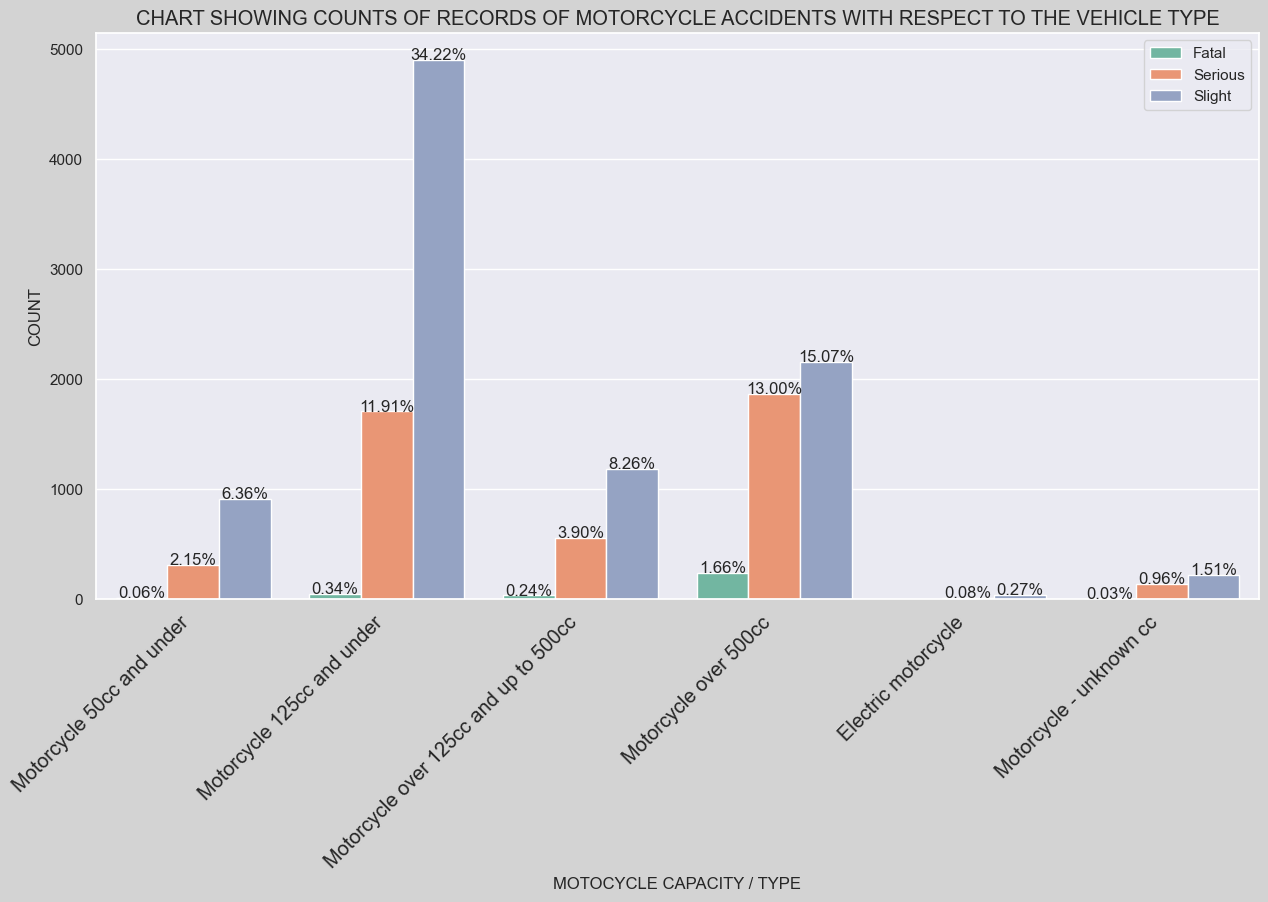

In [114]:
motorcy_explore_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
motorcy_explore_chart = sns.countplot(data = motorcycle_df,x = "Vehicle_Type", hue="Accident_Severity", palette = "Set2" )
motorcy_explore_chart.set(xlabel='MOTOCYCLE CAPACITY / TYPE', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDS OF MOTORCYCLE ACCIDENTS WITH RESPECT TO THE VEHICLE TYPE', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"])
motorcy_explore_chart.set_xticklabels(["Motorcycle 50cc and under","Motorcycle 125cc and under","Motorcycle over 125cc and up to 500cc","Motorcycle over 500cc","Electric motorcycle","Motorcycle - unknown cc",], rotation=45, horizontalalignment='right',fontweight='light', fontsize='large')
for p in motorcy_explore_chart.patches:
    height = p.get_height()
    motorcy_explore_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(motorcycle_df))*100) + "%", ha="center")
plt.show()

In [115]:
ap = ["Motorcycle 50cc and under","Motorcycle 125cc and under","Motorcycle over 125cc and up to 500cc","Motorcycle over 500cc","Electric motorcycle","Motorcycle - unknown cc"]

### Data analysis for pedestrain data

In [116]:
# Getting dataframe for pedestrain data

pedestrian_df = casualties_2019_new[lambda x:x.Casualty_Type == 0]
pedestrian_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
5       2019010155192               525531.0                184605.0   
11      2019010155196               532424.0                164886.0   
19      2019010155209               543649.0                186237.0   
20      2019010155210               537356.0                183448.0   
21      2019010155216               532724.0                185103.0   
...               ...                    ...                     ...   
128543  2019983114119               297464.0                576134.0   
128548  2019983115619               296071.0                577414.0   
128566  2019984104219               313523.0                582066.0   
128567  2019984104419               331608.0                566975.0   
128591  2019984107419               336525.0                584226.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
5       -0.191044  51.546387             1                  2   
11      -0.099071  51.367605             1                  3   
19       0.070738  51.556734             1                  3   
20      -0.021065  51.533238             1                  1   
21      -0.087182  51.549218             1                  3   
...           ...        ...           ...                ...   
128543  -3.607229  55.069052            98                  2   
128548  -3.629501  55.080260            98                  3   
128566  -3.357641  55.125401            98                  2   
128567  -3.070480  54.992647            98                  3   
128591  -2.997491  55.148292            98                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
5                        1                     1 2019-01-01  ...   
11                       1                     1 2019-01-01  ...   
19                       1                     1 2019-01-01  ...   
20                       1                     1 2019-01-01  ...   
21                       1                     1 2019-01-01  ...   
...                    ...                   ...        ...  ...   
128543                   1                     1 2019-01-06  ...   
128548                   1                     1 2019-06-19  ...   
128566                   1                     1 2019-05-04  ...   
128567                   1                     1 2019-09-04  ...   
128591                   1                     1 2019-06-29  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
5                         10                 2                    5   
11                         7                 3                    1   
19                         5                 3                    1   
20                         5                 1                    5   
21                         7                 3                    5   
...                      ...               ...                  ...   
128543                     9                 2                    5   
128548                     1                 3                    9   
128566                    10                 2                    6   
128567                     4                 3                    6   
128591                     8                 3                    5   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
5                        4              0                       0   
11                       3              0                       0   
19                       1              0                       0   
20                       1              0                       0   
21                       3              0                       0   
...                    ...            ...                     ...   
128543                   1              0                       0   
128548                   8              0                       0   
128566                   9              0                       0   
1

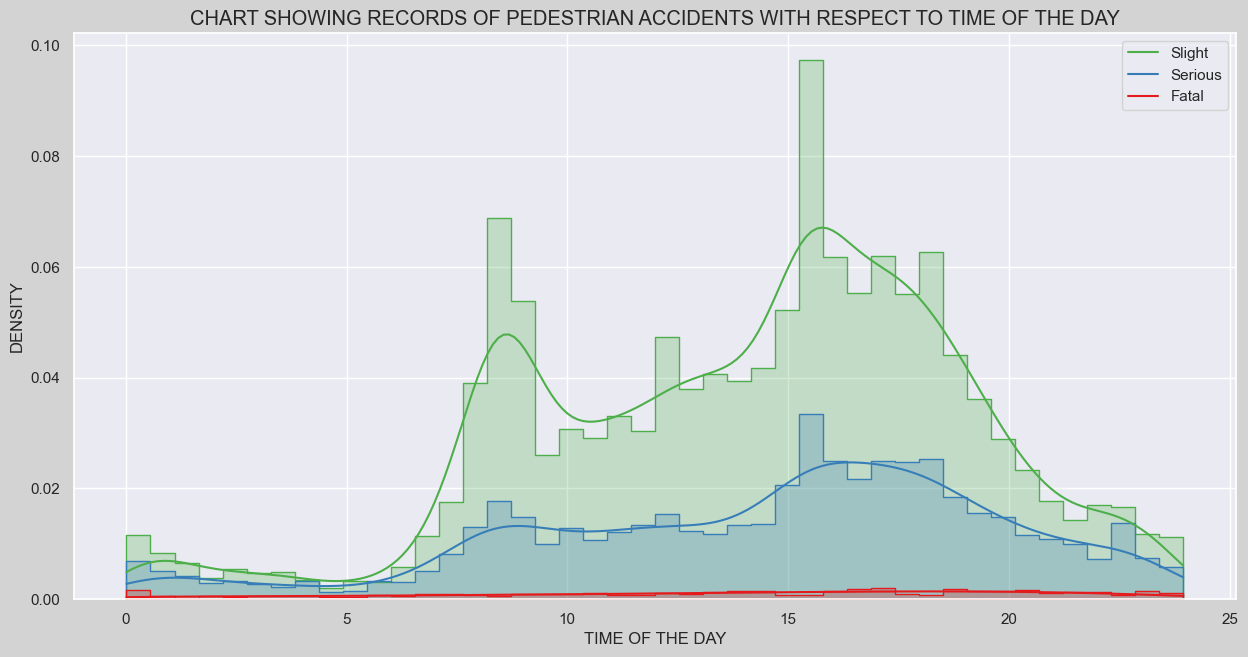

In [117]:
pedes_decimal_time_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
decimal_time_chart = sns.histplot(data = pedestrian_df,x = "decimal_time",stat = "density", element = "step", kde = True, hue="Accident_Severity", palette="Set1" )
decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.title('CHART SHOWING RECORDS OF PEDESTRIAN ACCIDENTS WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

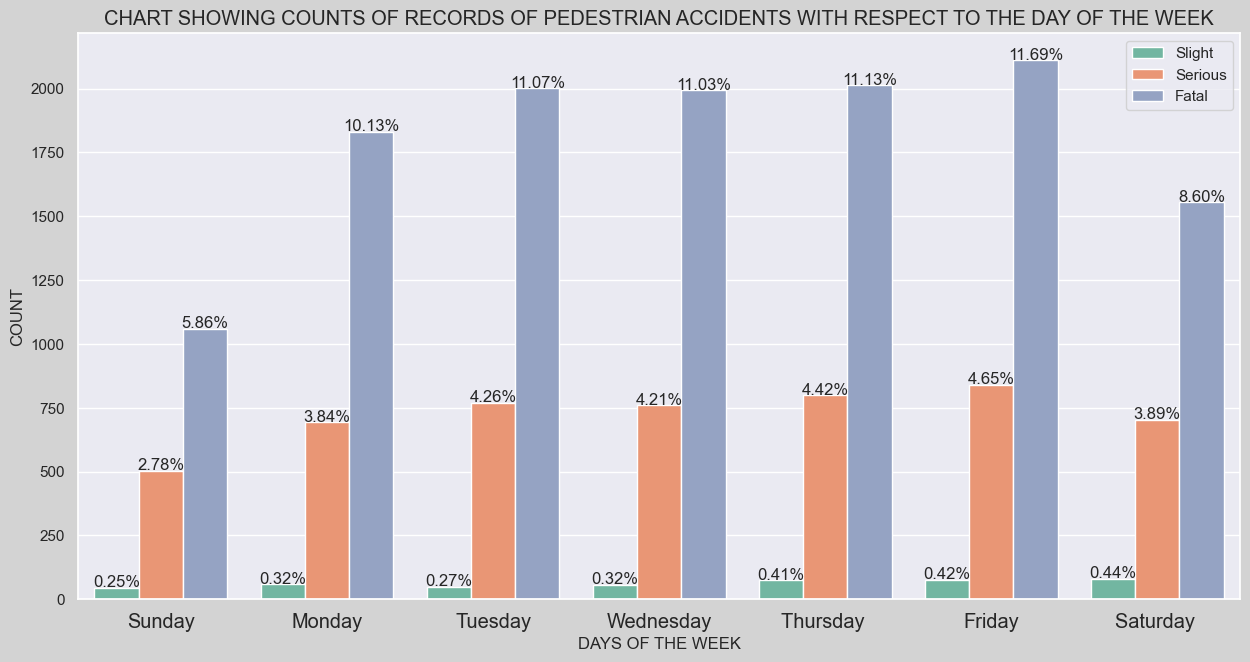

In [118]:
pedes_day_of_week_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_of_week_chart = sns.countplot(data = pedestrian_df,x = "Day_of_Week", hue="Accident_Severity", palette = "Set2" )
day_of_week_chart.set(xlabel='DAYS OF THE WEEK', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDS OF PEDESTRIAN ACCIDENTS WITH RESPECT TO THE DAY OF THE WEEK', horizontalalignment='center', fontweight='light', fontsize='large')
day_of_week_chart.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday", "Thursday ","Friday","Saturday "], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
for p in day_of_week_chart.patches:
    height = p.get_height()
    day_of_week_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(pedestrian_df))*100) + "%", ha="center")
plt.show()

In [119]:
pedes_mode = int(pedestrian_df["decimal_time"].mode()[0])
print(f"The time with most accidents for pedestrians is {pedes_mode:.2f} hours")

The time with most accidents for pedestrians is 15.00 hours


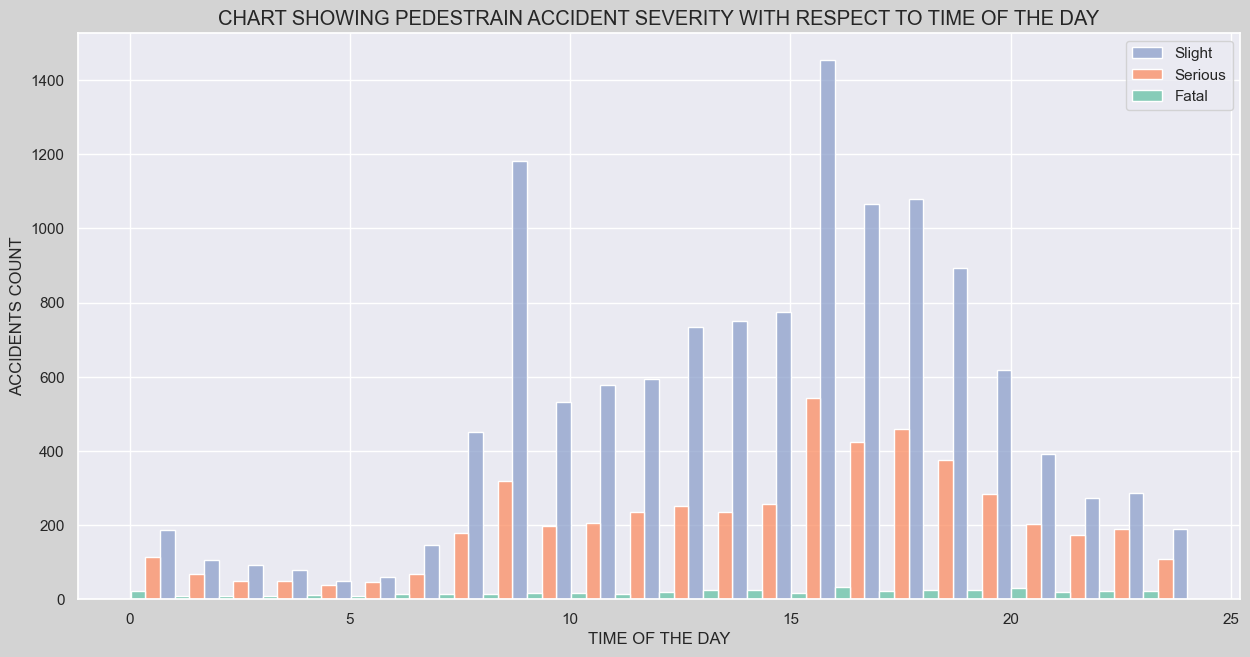

In [120]:
accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
accident_severity_chart = sns.histplot(data = pedestrian_df,x ='decimal_time', hue='Accident_Severity', binwidth=1, palette='Set2', multiple="dodge" )
accident_severity_chart.set(xlabel='TIME OF THE DAY', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING PEDESTRAIN ACCIDENT SEVERITY WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

### Data analysis for Cycle data

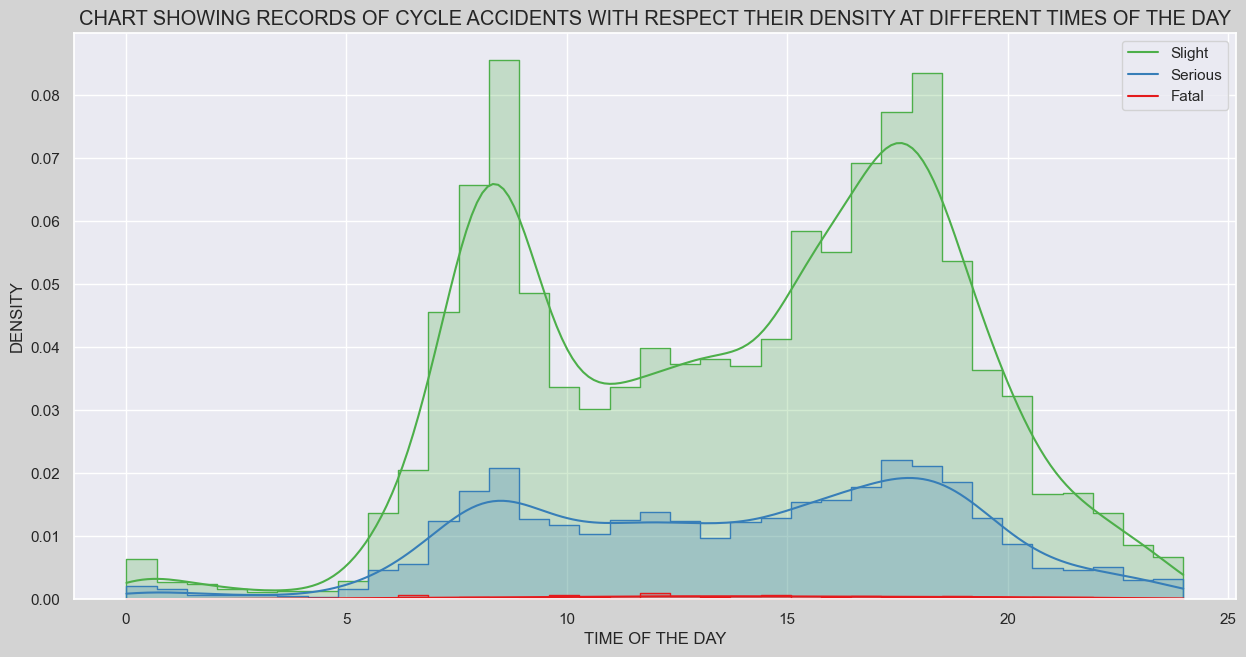

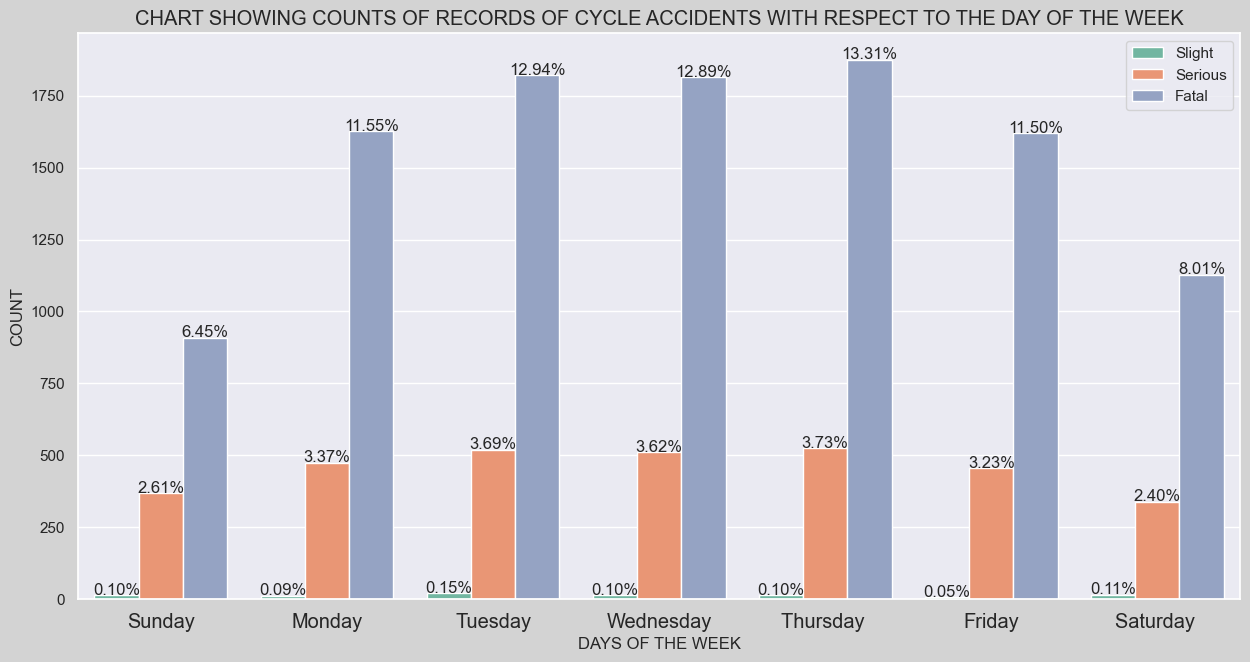

In [121]:
# Getting dataframe for Cyclist data

cycle_df = casualties_2019_new[lambda x:x.Casualty_Type == 1]
cycle_df

# Plotting accident data for time of the day
pedes_decimal_time_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
decimal_time_chart = sns.histplot(data = cycle_df,x = "decimal_time",stat = "density", element = "step", kde = True, hue="Accident_Severity", palette="Set1" )
decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.title('CHART SHOWING RECORDS OF CYCLE ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

# Plotting day accident data for day of the week
pedes_day_of_week_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_of_week_chart = sns.countplot(data = cycle_df,x = "Day_of_Week", palette = "Set2", hue="Accident_Severity" )
day_of_week_chart.set(xlabel='DAYS OF THE WEEK', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDS OF CYCLE ACCIDENTS WITH RESPECT TO THE DAY OF THE WEEK', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
day_of_week_chart.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday", "Thursday ","Friday","Saturday "], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
for p in day_of_week_chart.patches:
    height = p.get_height()
    day_of_week_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(cycle_df))*100) + "%", ha="center")
plt.show()

In [122]:
cycle_mode = int(cycle_df["decimal_time"].mode()[0])
print(f"The time with most accidents for cycles is {cycle_mode:.2f} hours")

The time with most accidents for cycles is 17.00 hours


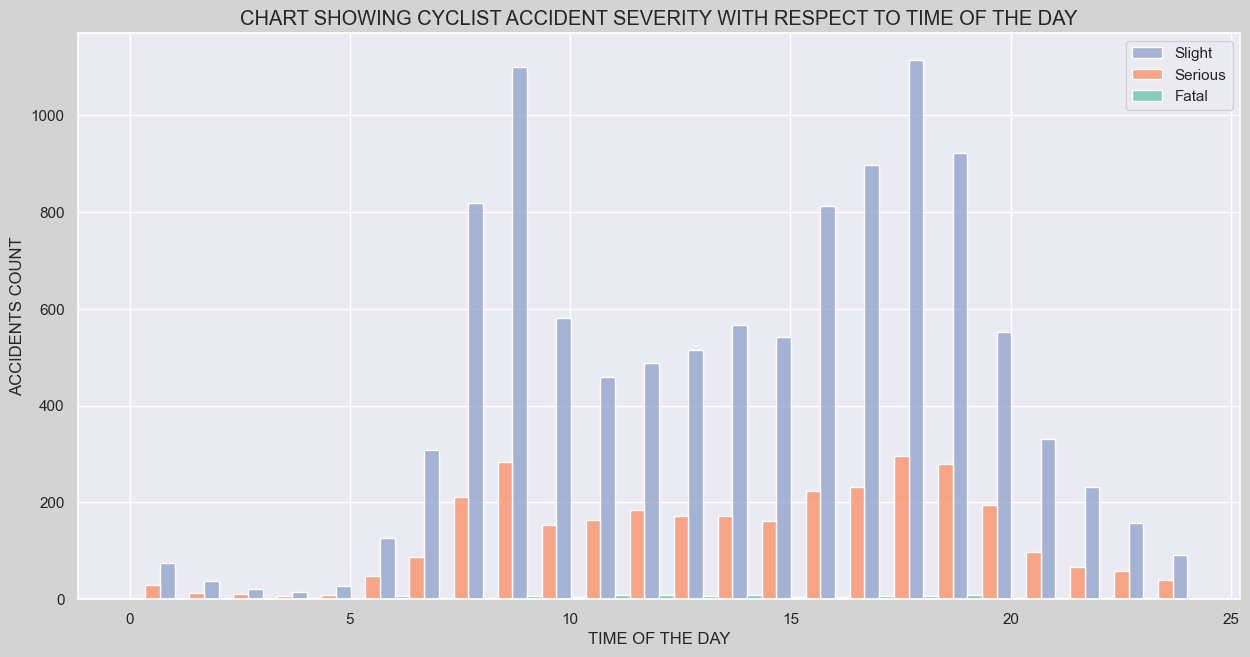

In [123]:
accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
accident_severity_chart = sns.histplot(data = cycle_df,x ='decimal_time', hue='Accident_Severity', binwidth=1, palette='Set2', multiple="dodge" )
accident_severity_chart.set(xlabel='TIME OF THE DAY', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING CYCLIST ACCIDENT SEVERITY WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

### Data analysis for Cars data

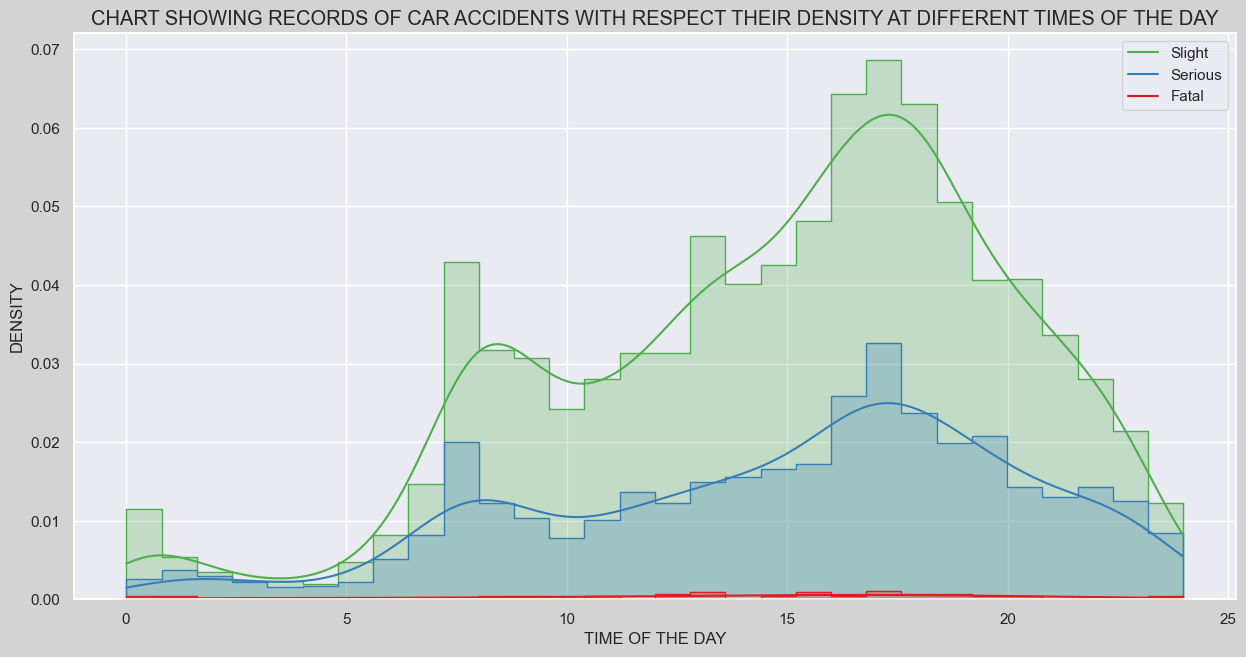

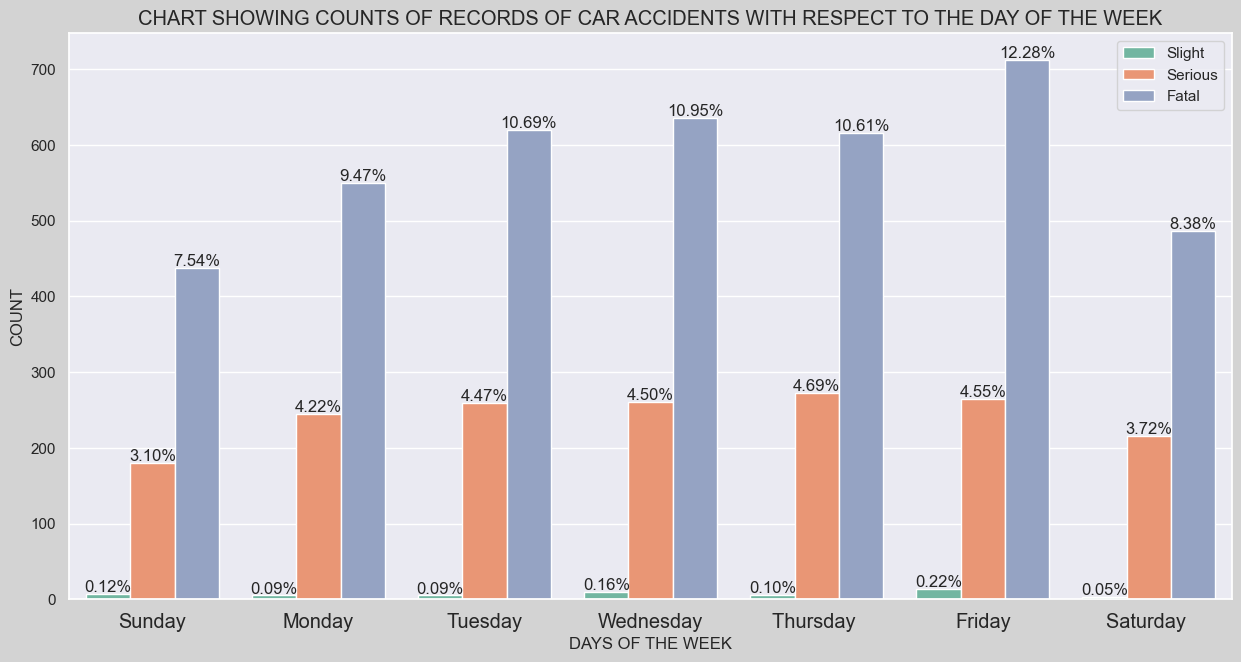

In [124]:
# Getting dataframe for Car data

car_df = casualties_2019_new[lambda x:x.Casualty_Type == 3]
car_df

# Plotting accident data for time of the day
pedes_decimal_time_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
decimal_time_chart = sns.histplot(data = car_df,x = "decimal_time",stat = "density", element = "step", kde = True, hue="Accident_Severity", palette="Set1" )
decimal_time_chart.set(xlabel='TIME OF THE DAY', ylabel='DENSITY')
plt.title('CHART SHOWING RECORDS OF CAR ACCIDENTS WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

# Plotting day accident data for day of the week
pedes_day_of_week_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_of_week_chart = sns.countplot(data = car_df,x = "Day_of_Week", palette = "Set2", hue="Accident_Severity" )
day_of_week_chart.set(xlabel='DAYS OF THE WEEK', ylabel='COUNT')
plt.title('CHART SHOWING COUNTS OF RECORDS OF CAR ACCIDENTS WITH RESPECT TO THE DAY OF THE WEEK', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
day_of_week_chart.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday", "Thursday ","Friday","Saturday "], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
for p in day_of_week_chart.patches:
    height = p.get_height()
    day_of_week_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(car_df))*100) + "%", ha="center")
plt.show()

In [125]:
cars_mode = int(car_df["decimal_time"].mode()[0])
print(f"The time with most accidents for cars is {cars_mode:.2f} hours")

The time with most accidents for cars is 17.00 hours


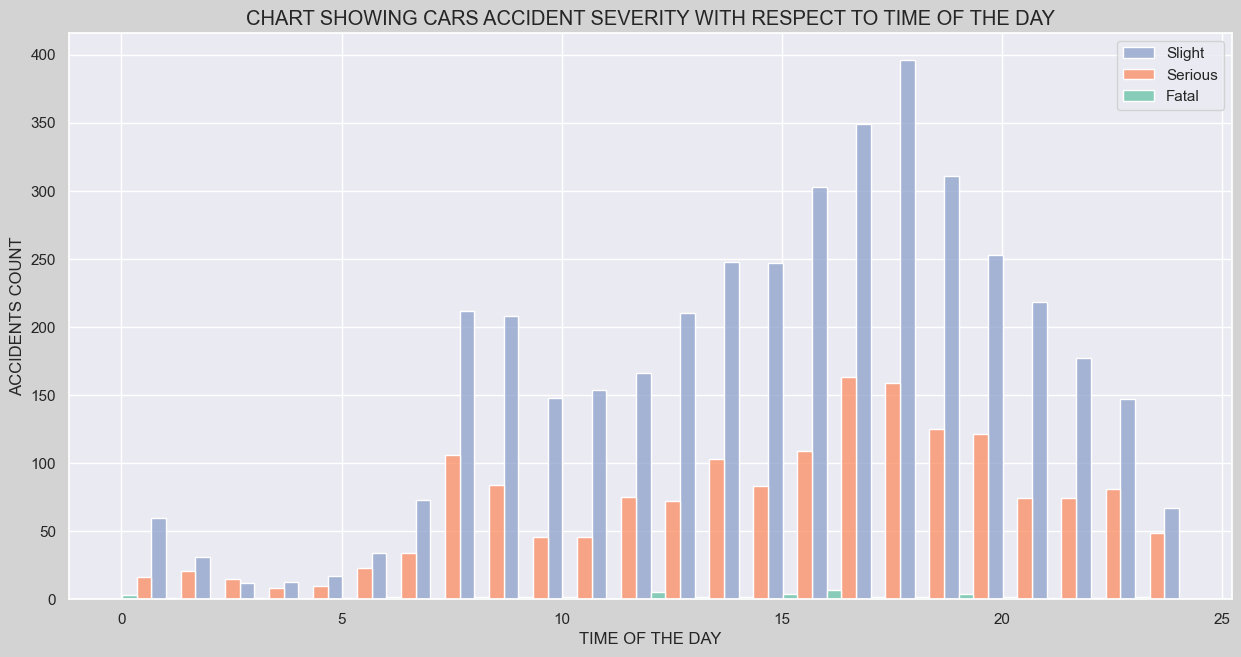

In [126]:
accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
accident_severity_chart = sns.histplot(data = car_df,x ='decimal_time', hue='Accident_Severity', binwidth=1, palette='Set2', multiple="dodge" )
accident_severity_chart.set(xlabel='TIME OF THE DAY', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING CARS ACCIDENT SEVERITY WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

### Visualising  General Accident Severity Data

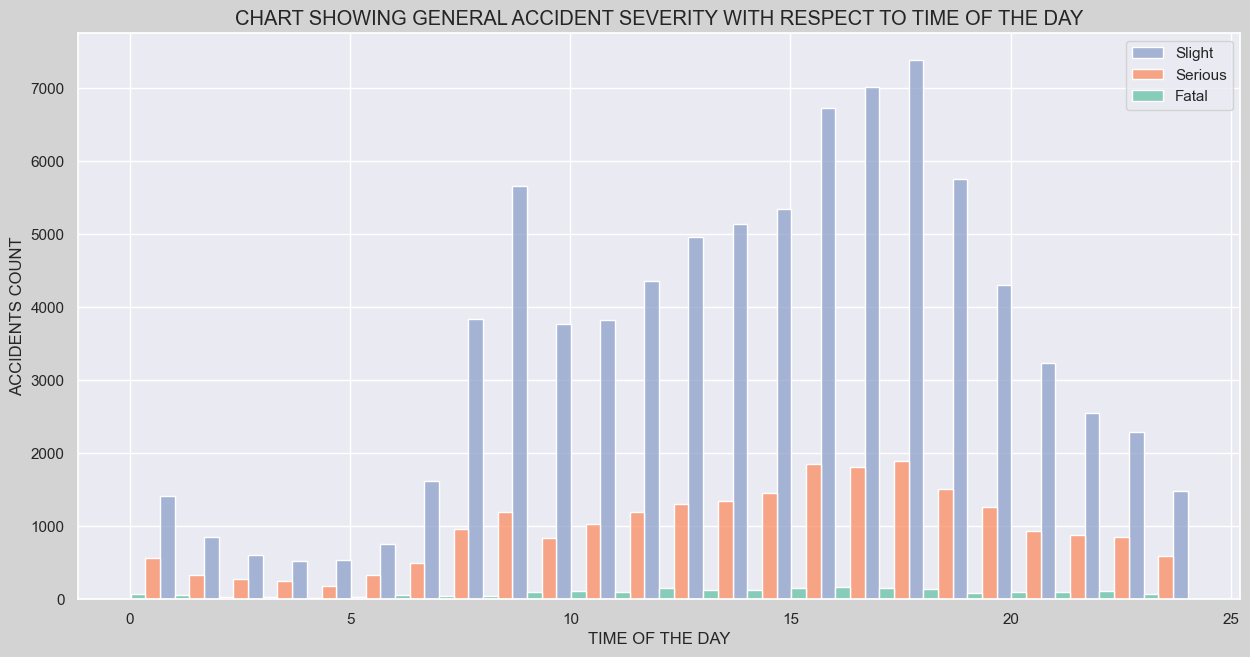

In [127]:
accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
accident_severity_chart = sns.histplot(data = combined_df_2019,x ='decimal_time', hue='Accident_Severity', binwidth=1, palette='Set2', multiple="dodge" )
accident_severity_chart.set(xlabel='TIME OF THE DAY', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING GENERAL ACCIDENT SEVERITY WITH RESPECT TO TIME OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

### Grouping the Data set into months of the year

In [128]:
# Splitting datetime into Days, Weeks, Months  and Years

accidents_2019["Years"] =  accidents_2019["Date"].dt.year
accidents_2019["Months"] =  accidents_2019["Date"].dt.month
accidents_2019["Weeks"] = accidents_2019["Date"].dt.week
accidents_2019["Days"] = accidents_2019["Date"].dt.day

In [129]:
# Creating a dataframae for accidents that occurred between a given period
accidents_between_period = accidents_2019[~accidents_2019["Date"].between("2019-03-30","2019-10-27")]
accidents_between_period

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
117514  2019984103619               327784.0                570436.0   
117515  2019984103719               318202.0                567277.0   
117521  2019984105319               323083.0                573291.0   
117523  2019984105519               319488.0                574999.0   
117526  2019984106019               341523.0                579842.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
117514  -3.131110  55.023201            98                  3   
117515  -3.280044  54.993336            98                  2   
117521  -3.205393  55.048145            98                  1   
117523  -3.262127  55.062919            98                  1   
117526  -2.918177  55.109520            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
0                        2                     3 2019-02-18  ...   
1                        2                     1 2019-01-15  ...   
2                        2                     1 2019-01-01  ...   
3                        1                     1 2019-01-01  ...   
4                        2                     2 2019-01-01  ...   
...                    ...                   ...        ...  ...   
117514                   2                     2 2019-03-17  ...   
117515                   1                     1 2019-02-23  ...   
117521                   2                     2 2019-02-05  ...   
117523                   2                     4 2019-01-05  ...   
117526                   1                     1 2019-12-05  ...   

        Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                                 3                 E01004762   
1                                                 3                 E01003117   
2                                                 1                 E01000943   
3                                                 1                 E01000973   
4                                                 1                 E01000546   
...                                             ...                       ...   
117514                                            1                       NaN   
117515                                            1                       NaN   
117521                                            1                       NaN   
117523                                            1                       NaN   
117526                                            1                       NaN   

        Hours Minutes  Seconds  Weeks  decimal_time  Years  Months  Days  
0          17      50        0      8     17.833333   2019       2    18  
1          21      45        0      3     21.750000   2019       1    15  
2           1      50        0      1      1.833333   2019       1     1  
3           1      20        0      1      1.333333   2019       1     1  
4           0      40        0      1      0.666667   2019       1     1  
...       ...     ...      ...    ...           ...    ...     ...   ...  
117514     14      50        0     11     14.8

In [130]:
accidents_2019["Month_Count"] = accidents_2019.groupby(by = ["Months"])['Months'].transform('count')

In [131]:
# Viewing unique data for months of the year
accidents_2019["Months"].unique()

array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

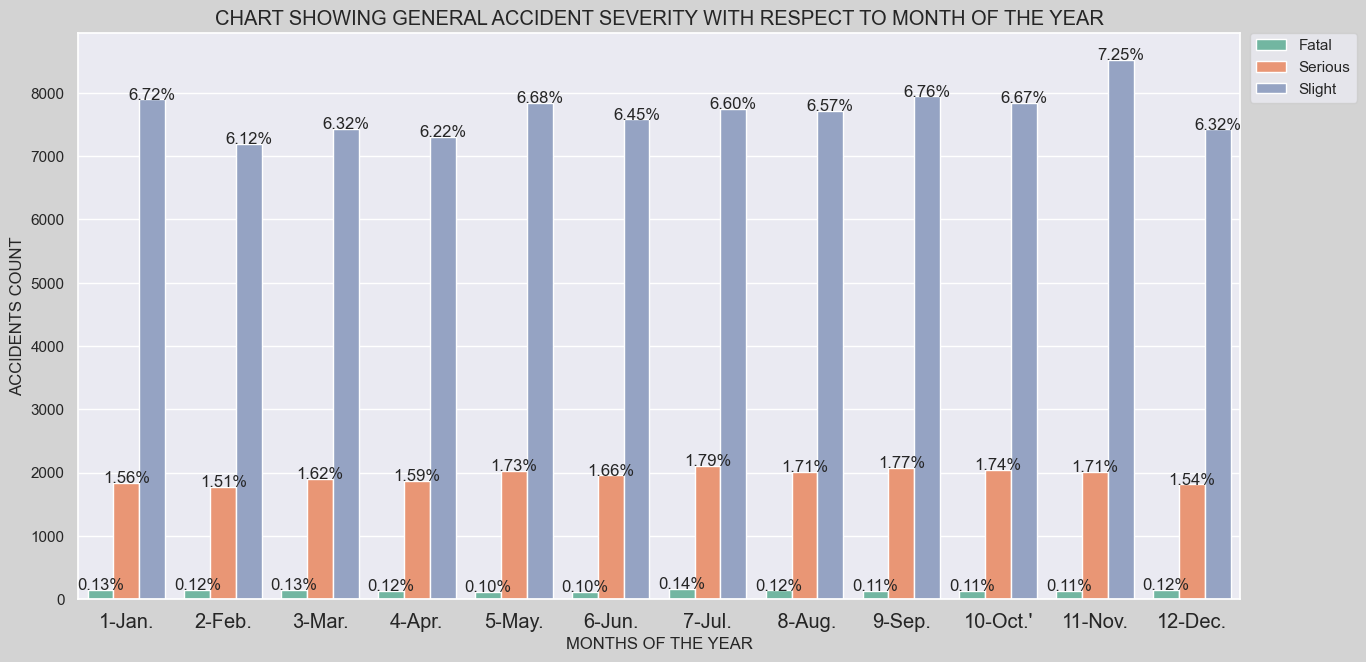

In [132]:
month_accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
month_accident_severity_chart = sns.countplot(data = accidents_2019,x ='Months', hue='Accident_Severity', palette='Set2', dodge=True)
month_accident_severity_chart.set(xlabel='MONTHS OF THE YEAR', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING GENERAL ACCIDENT SEVERITY WITH RESPECT TO MONTH OF THE YEAR', horizontalalignment='center', fontweight='light', fontsize='large')
month_accident_severity_chart.set_xticklabels(["1-Jan.", "2-Feb.", "3-Mar.", "4-Apr.", "5-May.", "6-Jun.", "7-Jul."," 8-Aug.", "9-Sep.", "10-Oct.'", "11-Nov.", "12-Dec."], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"],loc = 0,ncol = 1, shadow =False, mode = None, facecolor = "inherit",bbox_to_anchor=(1.10, 1), borderaxespad=0)
for p in month_accident_severity_chart.patches:
    height = p.get_height()
    month_accident_severity_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(accidents_2019))*100) + "%", ha="center")
plt.show()

In [133]:
# Grouping month data
accidents_2019["Daylight_Count"] = accidents_2019.groupby(by = ["Months"])['Months'].transform('count')
accidents_2019["Daylight_Count"]

0         9112
1         9881
2         9881
3         9881
4         9881
          ... 
117531    9998
117532    9998
117533    9657
117534    9657
117535    9314
Name: Daylight_Count, Length: 117536, dtype: int64

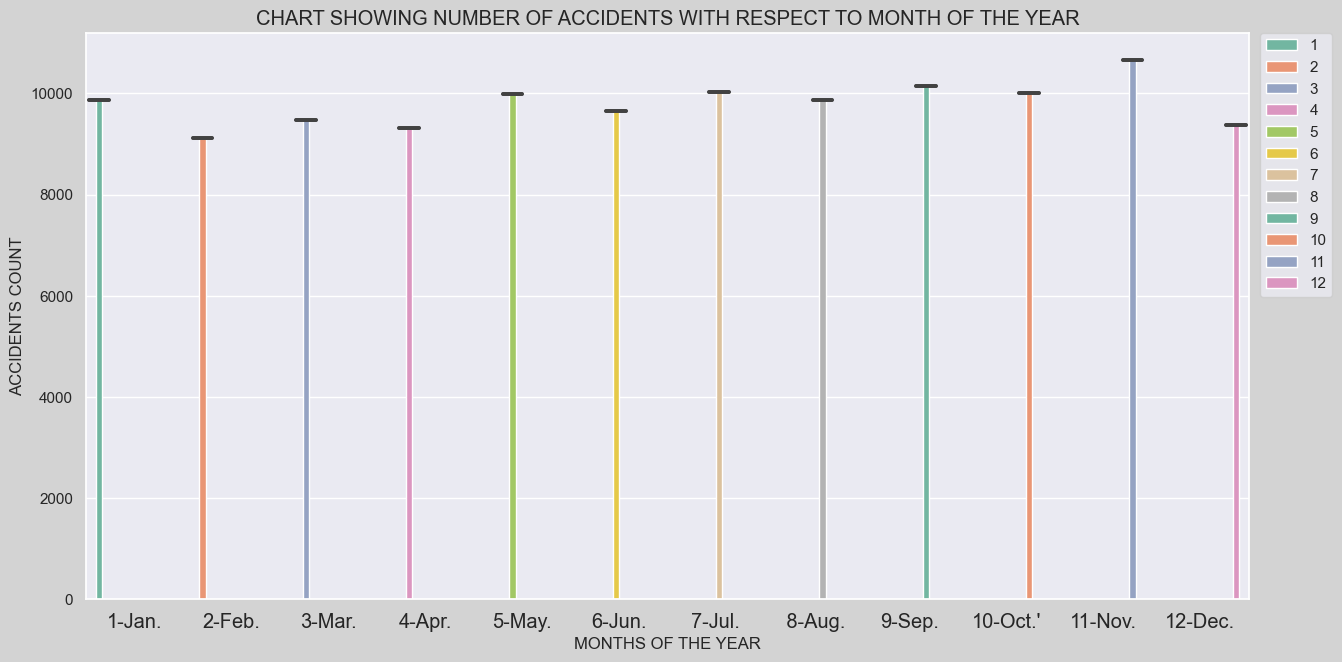

In [134]:
count_accident_severity = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
count_accident_severity_chart = sns.barplot(data = accidents_2019, x = "Months", y ='Daylight_Count',capsize= 0.2, hue='Months', palette='Set2')
#month_accident_severity_chart.set_xticklabels(month_accident_severity_chart.get_xticklabels(), rotation=0, horizontalalignment='right',fontweight='light', fontsize='x-large')
count_accident_severity_chart.set(xlabel="MONTHS OF THE YEAR", ylabel='ACCIDENTS COUNT')
count_accident_severity_chart.legend(loc = 0,ncol = 1, shadow =False, mode = None, facecolor = "inherit",bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title('CHART SHOWING NUMBER OF ACCIDENTS WITH RESPECT TO MONTH OF THE YEAR', horizontalalignment='center', fontweight='light', fontsize='large')
count_accident_severity_chart.set_xticklabels(["1-Jan.", "2-Feb.", "3-Mar.", "4-Apr.", "5-May.", "6-Jun.", "7-Jul."," 8-Aug.", "9-Sep.", "10-Oct.'", "11-Nov.", "12-Dec."], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
plt.show()

In [135]:
accidents_2019["Month_Count"].value_counts()

10663    10663
10157    10157
10021    10021
10005    10005
9998      9998
9881      9881
9872      9872
9657      9657
9479      9479
9377      9377
9314      9314
9112      9112
Name: Month_Count, dtype: int64

### Extracting periods of day light saving for year 2019 which is 31-03-2019 01:00:00 and 27-10-2019 02:00:00

In [136]:
df_1 = accidents_2019[lambda x:x.Date > "2019-03-30"]
df_2 = df_1[lambda x:x.Date < "2019-10-28"]
df_3 = df_2.loc[(df_2["Date"] == "2019-10-27") & (df_2["Hours"] < 2 )]
df_3
#df_2

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
20067   2019010214257               527202.0                182831.0   
20076   2019010214273               551331.0                188645.0   
20077   2019010214276               540476.0                193264.0   
20078   2019010214278               537361.0                192633.0   
20099   2019010214334               537828.0                173960.0   
25881   2019030892580               321129.0                469323.0   
30699   2019051912734               348449.0                392273.0   
31500   201906A263950               383531.0                398291.0   
32480   201906G163422               394041.0                399101.0   
36194   2019070624111               373797.0                369937.0   
40753   2019121901438               480210.0                483618.0   
49713   2019170M11729               449615.0                520382.0   
54159   2019200904559               403264.0                293929.0   
54470   2019200910622               402367.0                298726.0   
54485   2019200910950               407907.0                294853.0   
63121   201931C218419               456340.0                340221.0   
66773   2019331901169               443930.0                301120.0   
68089   2019340W09041               488257.0                267655.0   
72594   2019370919601               598322.0                263609.0   
78462   2019420892081               618547.0                224000.0   
85603   2019440384785               463126.0                100143.0   
85604   2019440384828               442468.0                113537.0   
88719   2019450894056               504429.0                171940.0   
100387  2019500896090               207003.0                 83819.0   
100399  2019500897181               246765.0                 54839.0   
105991  201954A695519               418190.0                179980.0   
107534  2019552000331               409227.0                 91392.0   
108296  201960X156141               237543.0                393476.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
20067   -0.167599  51.530071             1                  3   
20076    0.182501  51.576364             1                  3   
20077    0.027808  51.620675             1                  3   
20078   -0.017405  51.615773             1                  3   
20099   -0.017967  51.447861             1                  3   
25881   -3.208001  54.113716             3                  3   
30699   -2.777236  53.424733             5                  3   
31500   -2.249628  53.481095             6                  2   
32480   -2.091276  53.488603             6                  2   
36194   -2.393943  53.225841             7                  3   
40753   -0.770716  54.241998            12                  3   
49713   -1.233997  54.576237            17                  3   
54159   -1.953297  52.543222            20                  3   
54470   -1.966491  52.586350            20                  3   
54485   -1.884812  52.551481            20                  3   
63121   -1.162793  52.956433            31                  3   
66773   -1.352734  52.606112            33                  3   
68089   -0.707149  52.299952            34                  3   
72594    0.902927  52.234958            37                  3   
78462    1.173323  51.871746            42                  2   
85603   -1.105647  50.797410            44                  3   
85604   -1.397200  50.919728            44                  2   
88719   -0.498987  51.436843            45                  2   
100387  -4.729850  50.622050            50                  3   
100399  -4.156302  50.373426            50                  3   
105991  -1.739228  51.518451            54                  2   
107534  -1.870643  50.722070            55                  2   
108296  -4.445745  53.413027            60                  2   

        Number_of_Vehicles  Numb

In [137]:
# Creating dataframe for Day light Saving

Day_light_saving_time = accidents_2019.loc[((accidents_2019["Date"] > "2019-03-31") & (accidents_2019["Date"] < "2019-10-27"))|((accidents_2019["Date"] == "2019-03-31") & (accidents_2019["Hours"] > 1))|((accidents_2019["Date"] == "2019-10-27") & (accidents_2019["Hours"] < 2))]
Day_light_saving_time 

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
107     2019010155652               528607.0                180095.0   
109     2019010155655               532482.0                173504.0   
111     2019010155657               531697.0                168006.0   
113     2019010155668               537338.0                182819.0   
115     2019010155696               523006.0                184869.0   
...               ...                    ...                     ...   
117531  2019984106919               312635.0                573392.0   
117532  2019984107019               337522.0                591682.0   
117533  2019984107219               318544.0                567087.0   
117534  2019984107419               336525.0                584226.0   
117535  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
107     -0.148353  51.505164             1                  3   
109     -0.095022  51.445039             1                  3   
111     -0.108352  51.395813             1                  3   
113     -0.021569  51.527590             1                  3   
115     -0.227347  51.549315             1                  3   
...           ...        ...           ...                ...   
117531  -3.368899  55.047323            98                  3   
117532  -2.983499  55.215407            98                  3   
117533  -3.274645  54.991685            98                  3   
117534  -2.997491  55.148292            98                  3   
117535  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  Hours  \
107                      2                     1 2019-04-01  ...      0   
109                      3                     3 2019-04-01  ...      1   
111                      2                     1 2019-04-01  ...      0   
113                      2                     1 2019-04-01  ...      7   
115                      1                     1 2019-04-01  ...      9   
...                    ...                   ...        ...  ...    ...   
117531                   1                     1 2019-05-18  ...      1   
117532                   4                     1 2019-05-30  ...      8   
117533                   2                     1 2019-06-21  ...     15   
117534                   1                     1 2019-06-29  ...     14   
117535                   1                     1 2019-04-21  ...     12   

       Minutes  Seconds Weeks  decimal_time  Years  Months  Days  Month_Count  \
107         15        0    14      0.250000   2019       4     1         9314   
109         30        0    14      1.500000   2019       4     1         9314   
111         25        0    14      0.416667   2019       4     1         9314   
113          5        0    14      7.083333   2019       4     1         9314   
115         51        0    14      9.850000   2019       4     1         9314   
...        ...      ...   ...           ...    ...     ...   ...          ...   
117531       0        0    20      1.000000   2019       5    18         9998   
117532      46        0    22      8.766667   2019       5    30         9998   
117533      30        0    25     15.500000   2019       6    21         9657   
117534      10        0    26     14.166667   2019       6    29         9657   
117535      45        0    16     12.750000   2019       4    21         9314   

        Daylight_Count  
107               9314  
109               9314  
111               9314  
113               9314  
115               9314  
...                ...  
117531            9998  
117532            9998  
117533            9657  
117534            9657  
117535            9314  

[67690 rows x 42 columns]

In [138]:
# Creating dataframe for Standard time

standard_time = accidents_2019.loc[~((accidents_2019["Date"] > "2019-03-31") & (accidents_2019["Date"] < "2019-10-27")|(accidents_2019["Date"] == "2019-03-31") & (accidents_2019["Hours"] > 1)|(accidents_2019["Date"] == "2019-10-27") & (accidents_2019["Hours"] < 2))]
standard_time 

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
117514  2019984103619               327784.0                570436.0   
117515  2019984103719               318202.0                567277.0   
117521  2019984105319               323083.0                573291.0   
117523  2019984105519               319488.0                574999.0   
117526  2019984106019               341523.0                579842.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
117514  -3.131110  55.023201            98                  3   
117515  -3.280044  54.993336            98                  2   
117521  -3.205393  55.048145            98                  1   
117523  -3.262127  55.062919            98                  1   
117526  -2.918177  55.109520            98                  2   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  Hours  \
0                        2                     3 2019-02-18  ...     17   
1                        2                     1 2019-01-15  ...     21   
2                        2                     1 2019-01-01  ...      1   
3                        1                     1 2019-01-01  ...      1   
4                        2                     2 2019-01-01  ...      0   
...                    ...                   ...        ...  ...    ...   
117514                   2                     2 2019-03-17  ...     14   
117515                   1                     1 2019-02-23  ...      1   
117521                   2                     2 2019-02-05  ...      6   
117523                   2                     4 2019-01-05  ...     21   
117526                   1                     1 2019-12-05  ...     11   

       Minutes  Seconds Weeks  decimal_time  Years  Months  Days  Month_Count  \
0           50        0     8     17.833333   2019       2    18         9112   
1           45        0     3     21.750000   2019       1    15         9881   
2           50        0     1      1.833333   2019       1     1         9881   
3           20        0     1      1.333333   2019       1     1         9881   
4           40        0     1      0.666667   2019       1     1         9881   
...        ...      ...   ...           ...    ...     ...   ...          ...   
117514      50        0    11     14.833333   2019       3    17         9479   
117515      51        0     8      1.850000   2019       2    23         9112   
117521      10        0     6      6.166667   2019       2     5         9112   
117523       5        0     1     21.083333   2019       1     5         9881   
117526      19        0    49     11.316667   2019      12     5         9377   

        Daylight_Count  
0                 9112  
1                 9881  
2                 9881  
3                 9881  
4                 9881  
...                ...  
117514            9479  
117515            9112  
117521            9112  
117523            9881  
117526            9377  

[49846 rows x 42 columns]

In [139]:
# Grouping our dataset into weeks to get counts for number of accidents per week.
accidents_2019["day_light_standard_weeks"]= accidents_2019.groupby(["Weeks"])["Weeks"].transform("count")

# Viewing each week to see how many accidents occur during the weeks.
accidents_2019["Weeks"].value_counts()

48    2660
38    2606
46    2537
51    2524
47    2507
19    2454
42    2446
50    2446
26    2419
39    2416
7     2411
37    2398
29    2385
6     2369
32    2364
21    2346
25    2325
20    2322
30    2319
15    2315
10    2314
4     2289
34    2289
31    2283
44    2275
14    2273
1     2272
45    2269
13    2264
24    2259
27    2242
49    2222
41    2211
43    2208
5     2205
3     2201
35    2183
40    2171
2     2164
8     2147
28    2146
11    2143
23    2140
12    2092
16    2089
9     2078
18    2076
33    2063
36    2022
17    2004
22    1947
52    1426
Name: Weeks, dtype: int64

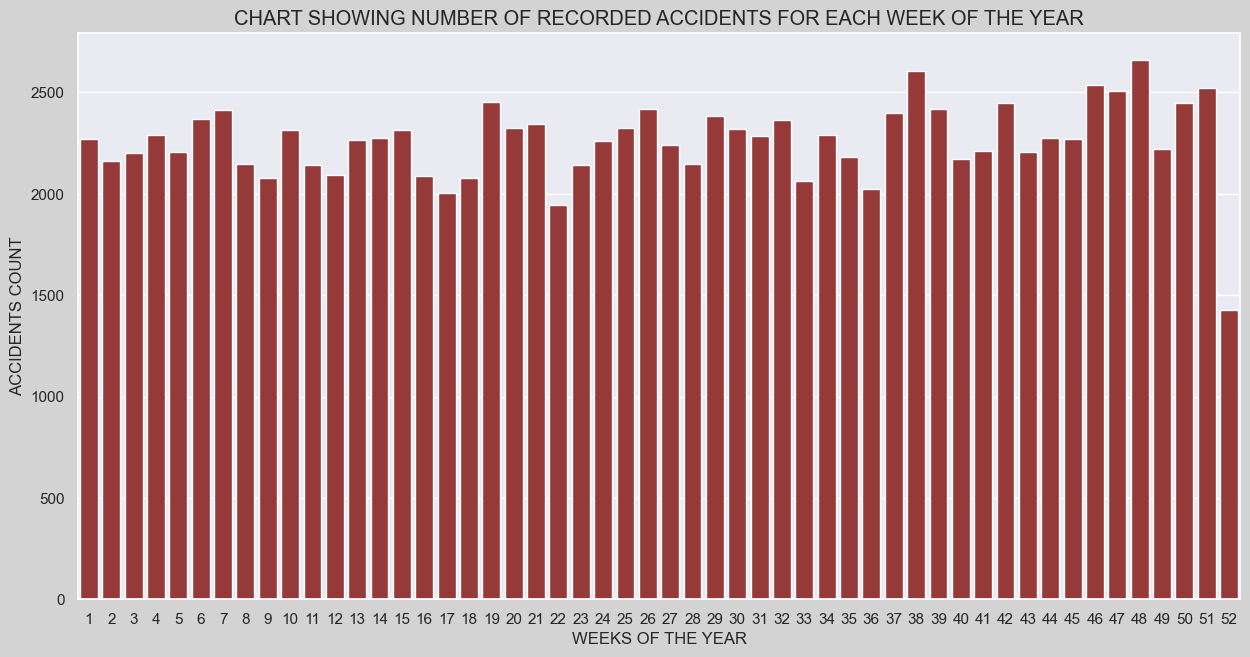

In [140]:
# Plotting number of recorded accidents in accidents data for each week.
accidents_per_week_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
#c = ["green" if x == 13 else "grey" if x == 43 else "brown" for x in range(52)]
accidents_per_week_chart = sns.countplot(data = accidents_2019,x = "Weeks", color= "brown")
accidents_per_week_chart.set(xlabel='WEEKS OF THE YEAR', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING NUMBER OF RECORDED ACCIDENTS FOR EACH WEEK OF THE YEAR', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

In [141]:
# Function to find number of day and weeks between two given dates
from datetime import date

# Function for Days
def num_of_days(date1, date2):
    return (date2-date1).days

# Function for Weeks
def num_of_weeks(date1, date2):
    return int(round((date2-date1).days/7,0))
     
# Calling our day function for 31-03-2019.
date1 = date(2019, 1, 1)
date2 = date(2019, 3, 31)
print(f"The number of days from (1-1-2019 to 31-3-2019) = {num_of_days(date1, date2)} days")

# Calling our day function for 27-10-2019.
date1 = date(2019, 1, 1)
date2 = date(2019, 10, 27)
print(f"The number of days from (1-1-2019 to 27-10-2019) = {num_of_days(date1, date2)} days")

# Calling our week function for 31-03-2019.
date1 = date(2019, 1, 1)
date2 = date(2019, 3, 31)
print(f"The number of weeks from (1-1-2019 to 31-3-2019) = {num_of_weeks(date1, date2)} weeks")

# Calling our week function for 27-10-2019.
date1 = date(2019, 1, 1)
date2 = date(2019, 10, 27)
print(f"The number of weeks from (1-1-2019 to 27-10-2019) = {num_of_weeks(date1, date2)} weeks")

print("\n")

# Calling our day function for number of days between 27-10-2019 and 31-12-2019.
date1 = date(2019, 10, 27)
date2 = date(2019, 12, 31)
print(f"The number of days from (27-10-2019 to 31-12-2019) = {num_of_days(date1, date2)} days")


# Calling our day function for number of days between 1-1-2019 and 31-3-2019.
date1 = date(2019, 1, 1)
date2 = date(2019, 3, 31)
print(f"The number of days from (1-1-2019 to 31-3-2019) = {num_of_days(date1, date2)} days")


# Calling our day function for number of days between 31-3-2019 and 27-10-2019.
date1 = date(2019, 3, 31)
date2 = date(2019, 10, 27)
print(f"The number of days from (31-3-2019 to 27-10-2019) = {num_of_days(date1, date2)} days")

The number of days from (1-1-2019 to 31-3-2019) = 89 days
The number of days from (1-1-2019 to 27-10-2019) = 299 days
The number of weeks from (1-1-2019 to 31-3-2019) = 13 weeks
The number of weeks from (1-1-2019 to 27-10-2019) = 43 weeks


The number of days from (27-10-2019 to 31-12-2019) = 65 days
The number of days from (1-1-2019 to 31-3-2019) = 89 days
The number of days from (31-3-2019 to 27-10-2019) = 210 days


In [142]:
# Accidents per day for day light saving
def acc_per_day(df, num_of_days1, num_of_days2):
    num_of_days = num_of_days1 + num_of_days2
    result = round(len(df)/num_of_days,2)
    return result

In [143]:
# Accident per day ratio for standard time
stand_time = acc_per_day(standard_time, 65, 89)
print(f"The average number of accidents for standard time per day is {stand_time}")

The average number of accidents for standard time per day is 323.68


In [144]:
# Accident per day ratio for day light saving time
day_light_time = acc_per_day(Day_light_saving_time, 210, 0)
print(f"The average number of accidents for day light saving time per day is {day_light_time}")

The average number of accidents for day light saving time per day is 322.33


In [145]:
# By the result of our analysis above looking into the week before and after day light savings,
# This would be week 14 and week 44 respectively.

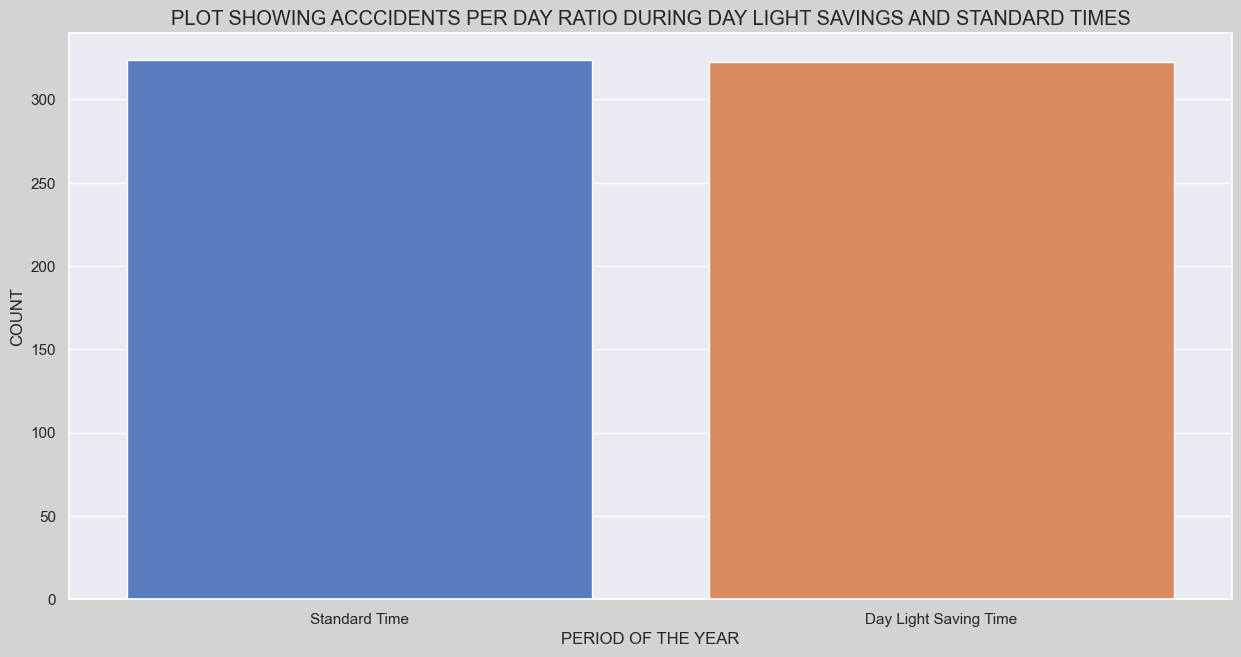

In [146]:
# Visualizing the accidents per day ratio data
#day_light_standard_dict = {"Standard Time":stand_time,"Day Light Saving Time":day_light_time}
#day_light_standard_data = {"day_light_standard_data":day_light_standard_dict}
#day_light_standard_df = pd.DataFrame(day_light_standard_data) columns=["Period of the year", "Number of accidents per day ratio"]

# Creating a dataframe for standard time and day light savings.
day_light_standard_df = pd.DataFrame({"Period of the year": ["Standard Time", "Day Light Saving Time"], "Number of accidents per day ratio": [stand_time, day_light_time]}, ) 
    
day_light_standard_plot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)

sns.set_theme()
day_light_standard_chart = sns.barplot(x="Period of the year", y="Number of accidents per day ratio", data=day_light_standard_df, palette='muted')
plt.title('PLOT SHOWING ACCCIDENTS PER DAY RATIO DURING DAY LIGHT SAVINGS AND STANDARD TIMES', horizontalalignment='center', fontweight='light', fontsize='large')
day_light_standard_chart.set(xlabel='PERIOD OF THE YEAR', ylabel='COUNT')

plt.show()

In [147]:
# Checking out the newly created dataframe for standard time and day light savings.
day_light_standard_df

Period of the year  Number of accidents per day ratio
0          Standard Time                             323.68
1  Day Light Saving Time                             322.33

In [148]:
accidents_2019[sorted(["Weeks"])].value_counts(sort=False, normalize=False)

Weeks
1        2272
2        2164
3        2201
4        2289
5        2205
6        2369
7        2411
8        2147
9        2078
10       2314
11       2143
12       2092
13       2264
14       2273
15       2315
16       2089
17       2004
18       2076
19       2454
20       2322
21       2346
22       1947
23       2140
24       2259
25       2325
26       2419
27       2242
28       2146
29       2385
30       2319
31       2283
32       2364
33       2063
34       2289
35       2183
36       2022
37       2398
38       2606
39       2416
40       2171
41       2211
42       2446
43       2208
44       2275
45       2269
46       2537
47       2507
48       2660
49       2222
50       2446
51       2524
52       1426
dtype: int64

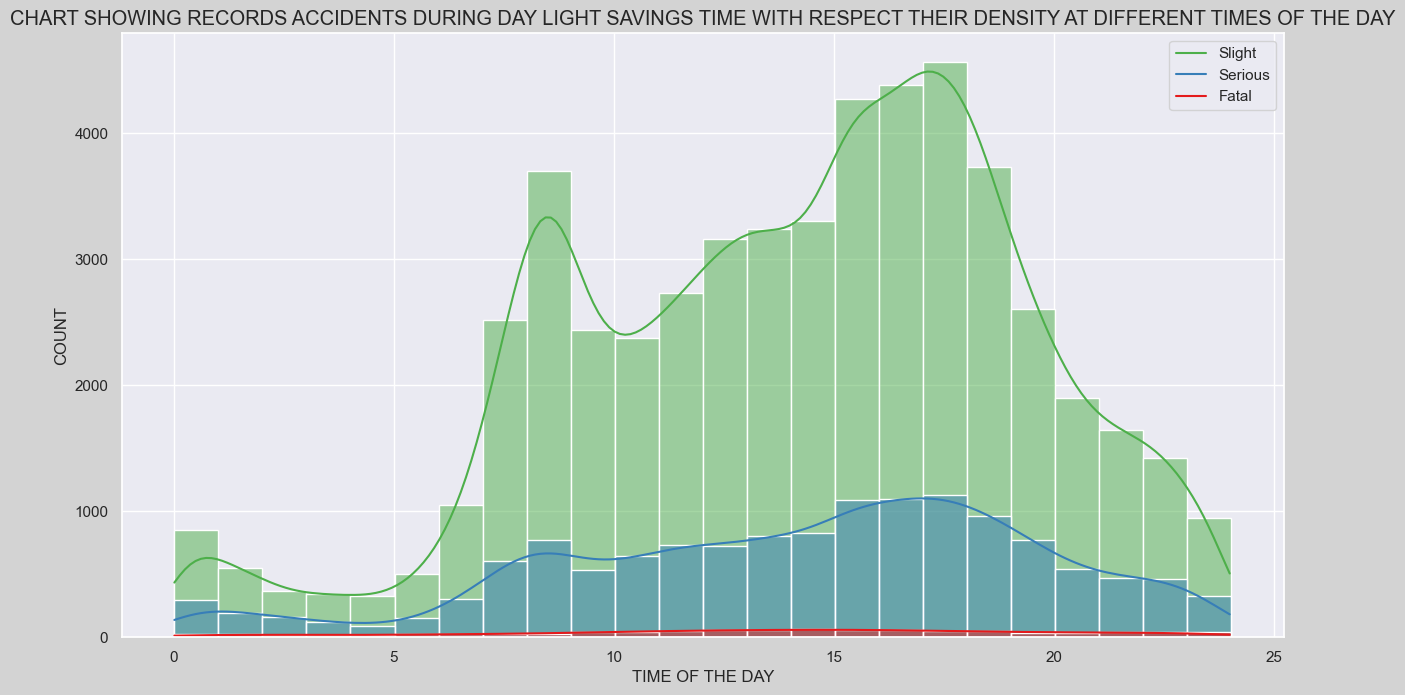

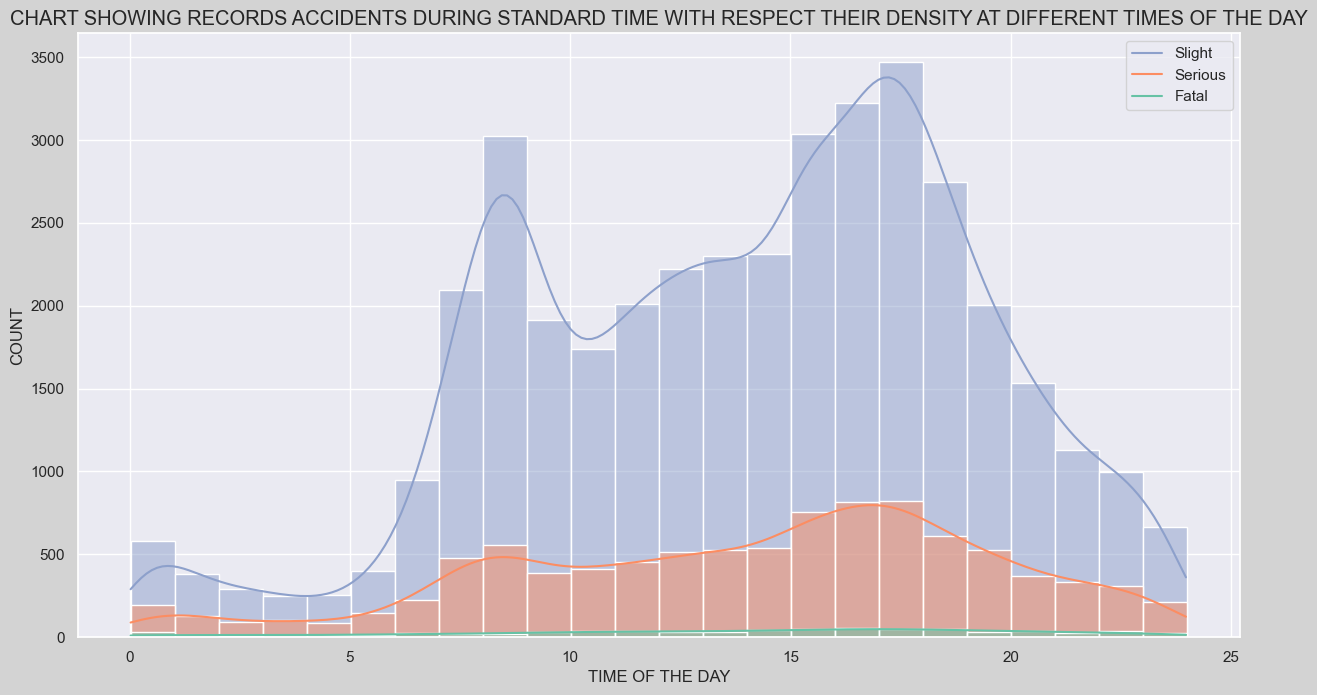

In [149]:
# Plotting day light savings time dataframe to visualise the counts of accidents with regards to hours of the day
day_light_time_histplot =plt.figure(figsize=(15,8), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
day_light_chart = sns.histplot(data = Day_light_saving_time,x = "decimal_time", element = "bars", binwidth=1, kde = True, hue="Accident_Severity", palette="Set1" )
day_light_chart.set(xlabel='TIME OF THE DAY', ylabel='COUNT')
plt.title('CHART SHOWING RECORDS ACCIDENTS DURING DAY LIGHT SAVINGS TIME WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

# Plotting standard time dataframe to visualise the counts of accidents with regards to hours of the day
standard_time_histplot =plt.figure(figsize=(15,8), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
standard_time_chart = sns.histplot(data = standard_time,x = "decimal_time", element = "bars", binwidth=1, kde = True, palette = "Set2", hue="Accident_Severity" )
standard_time_chart.set(xlabel='TIME OF THE DAY', ylabel='COUNT')
plt.title('CHART SHOWING RECORDS ACCIDENTS DURING STANDARD TIME WITH RESPECT THEIR DENSITY AT DIFFERENT TIMES OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"])
plt.show()

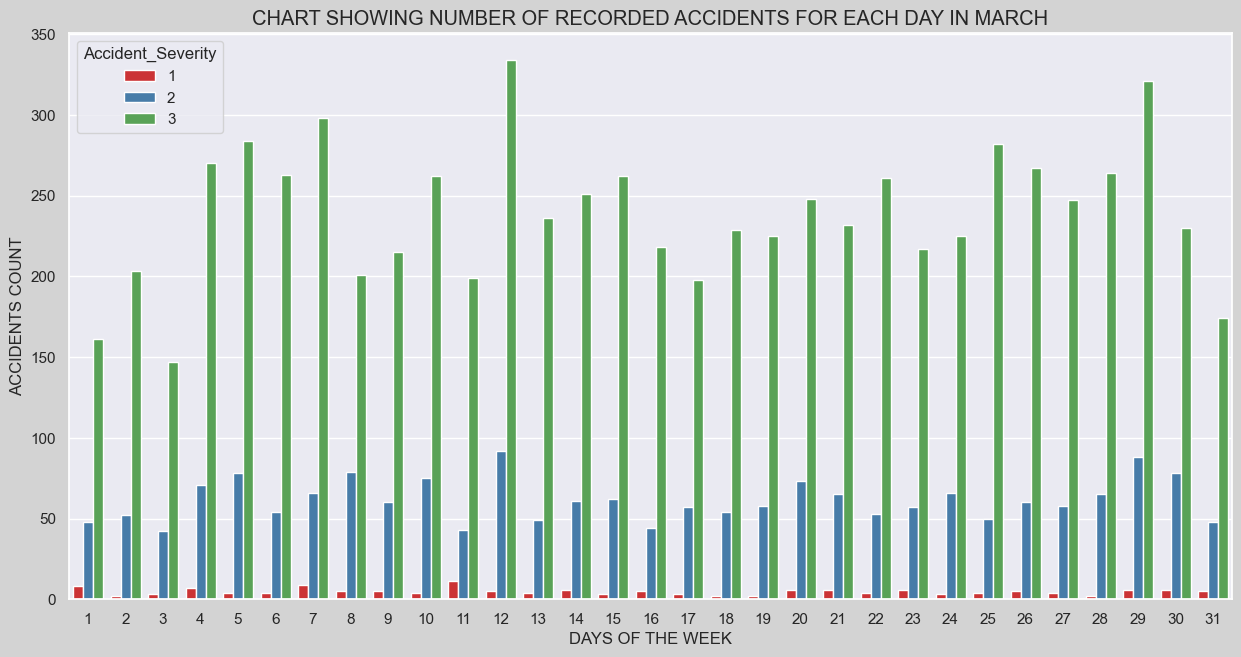

In [150]:
# Plotting number of recorded accidents in accidents data for each day in March.
march_accidents_per_day_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
march_accidents_per_day_chart = sns.countplot(data = accidents_2019[lambda x:x.Months ==3],x = "Days", hue="Accident_Severity", palette="Set1", dodge=True)
march_accidents_per_day_chart.set(xlabel='DAYS OF THE WEEK', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING NUMBER OF RECORDED ACCIDENTS FOR EACH DAY IN MARCH', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

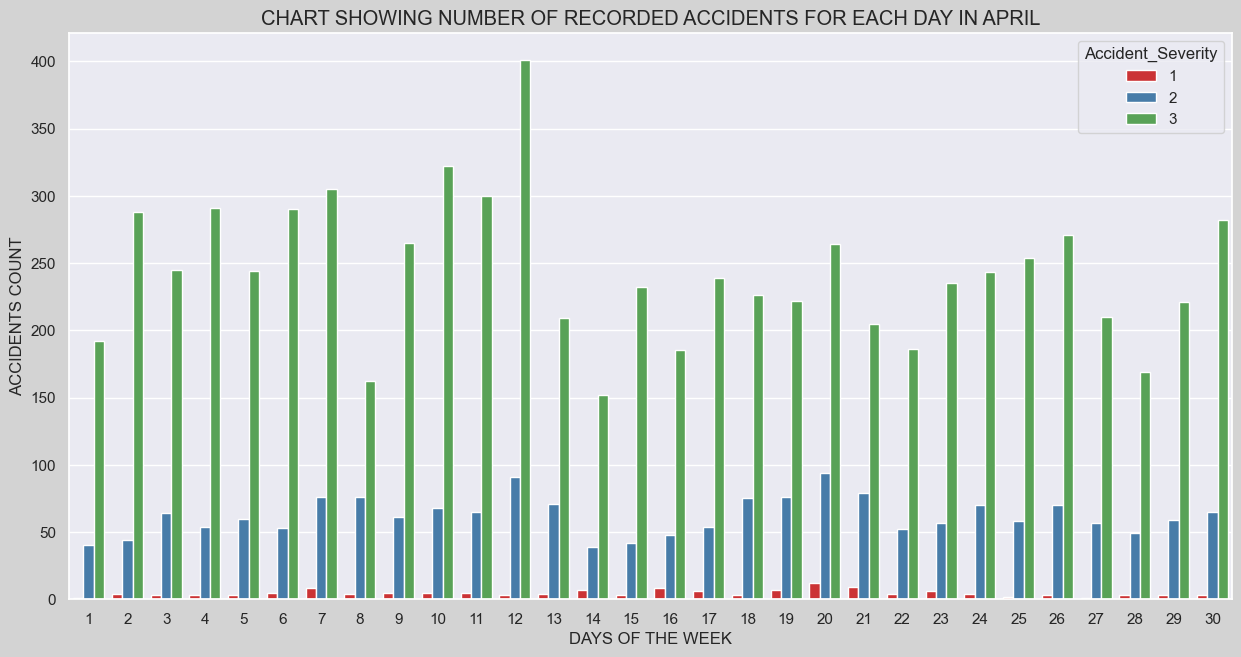

In [151]:
# Plotting number of recorded accidents in accidents data for each day in April.
april_accidents_per_day_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
april_accidents_per_day_chart = sns.countplot(data = accidents_2019[lambda x:x.Months ==4],x = "Days", hue="Accident_Severity", palette="Set1", dodge=True)
april_accidents_per_day_chart.set(xlabel='DAYS OF THE WEEK', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING NUMBER OF RECORDED ACCIDENTS FOR EACH DAY IN APRIL', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

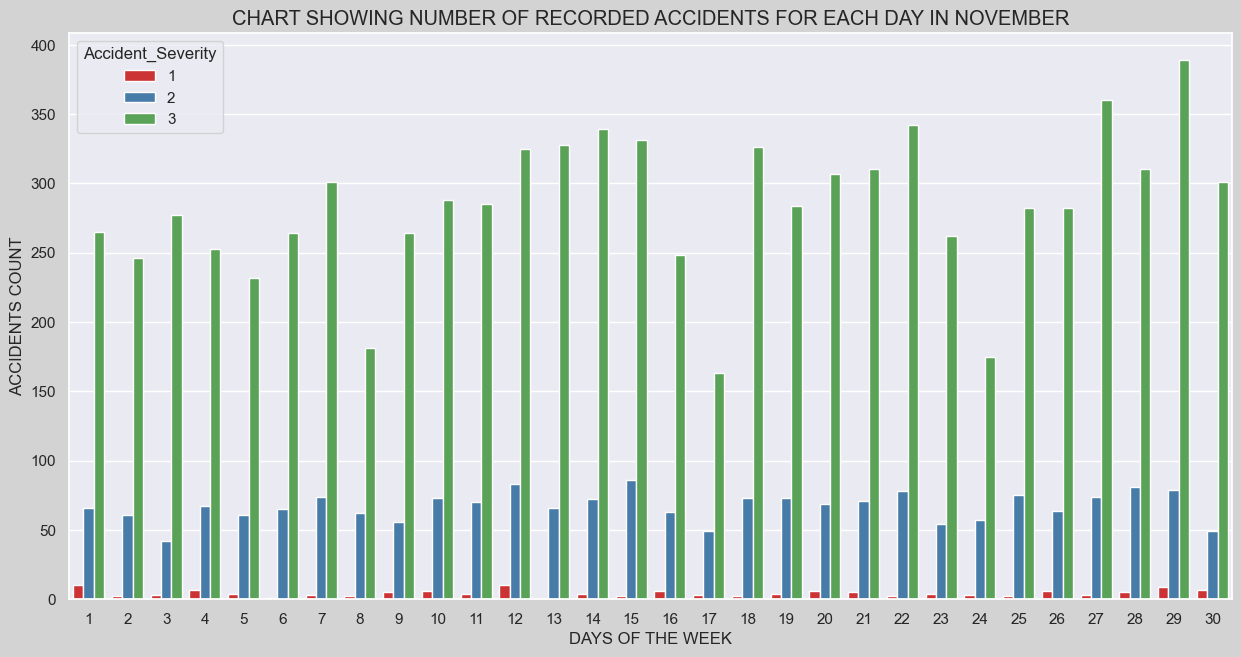

In [152]:
# Plotting number of recorded accidents in accidents data for each day in November.
nov_accidents_per_day_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
nov_accidents_per_day_chart = sns.countplot(data = accidents_2019[lambda x:x.Months ==11],x = "Days", hue="Accident_Severity", palette="Set1", dodge=True)
nov_accidents_per_day_chart.set(xlabel='DAYS OF THE WEEK', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING NUMBER OF RECORDED ACCIDENTS FOR EACH DAY IN NOVEMBER', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

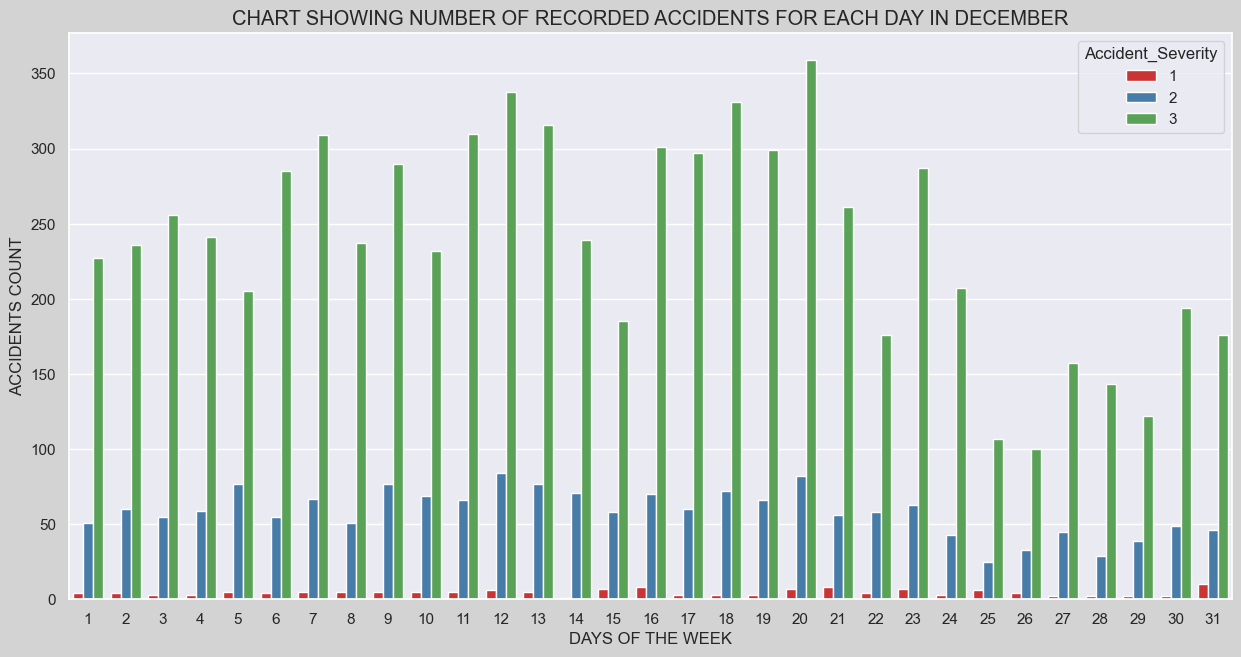

In [153]:
# Plotting number of recorded accidents in accidents data for each day in December.
dec_accidents_per_day_histplot =plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
dec_accidents_per_day_chart = sns.countplot(data = accidents_2019[lambda x:x.Months ==12],x = "Days", hue="Accident_Severity", palette="Set1", dodge=True)
dec_accidents_per_day_chart.set(xlabel='DAYS OF THE WEEK', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING NUMBER OF RECORDED ACCIDENTS FOR EACH DAY IN DECEMBER', horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

In [154]:
tests_df = accidents_2019.loc[((accidents_2019["Months"] ==4) & (accidents_2019["Days"] == 7))]  

In [155]:
pd.DataFrame(tests_df["Police_Force"])

Police_Force
11999              1
12003              1
12005              1
12007              1
12008              1
...              ...
114856            97
114857            97
114858            97
114859            97
117342            98

[389 rows x 1 columns]

### Pivot plot

In [156]:
# Creating a general the pivot plot
df = pd.pivot_table(accidents_2019, values="Accident_Severity", index="Months", columns="Days", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=True, sort=True)

In [157]:
# Creating a dataframe of the pivot plot
df = pd.DataFrame(df)
df

Days        1      2       3      4       5       6       7       8       9   \
Months                                                                         
1        619.0  903.0   849.0  867.0   871.0   874.0   908.0   975.0   732.0   
2        546.0  810.0   795.0  986.0   942.0   667.0   909.0   955.0   895.0   
3        587.0  715.0   528.0  959.0  1012.0   901.0  1035.0   766.0   770.0   
4        657.0  956.0   866.0  984.0   855.0   981.0  1075.0   642.0   922.0   
5        527.0  842.0  1018.0  930.0   680.0   947.0  1075.0   822.0   941.0   
6        524.0  905.0   915.0  696.0   528.0  1075.0   935.0   841.0   901.0   
7        850.0  963.0   847.0  681.0   889.0  1109.0   849.0   876.0   794.0   
8        971.0  972.0  1106.0  739.0   943.0   819.0   914.0   871.0   752.0   
9       1067.0  729.0   726.0  763.0   844.0   712.0   822.0  1016.0   973.0   
10       973.0  657.0   632.0  910.0   977.0   958.0   870.0   773.0   926.0   
11       937.0  862.0   918.0  900.0   822.0   923.0  1054.0   669.0   909.0   
12       787.0  832.0   881.0  844.0   774.0   969.0  1066.0   818.0  1029.0   

Days        10  ...      22      23      24      25      26      27      28  \
Months          ...                                                           
1       1035.0  ...  1209.0  1018.0   930.0  1050.0   708.0   567.0   984.0   
2       1194.0  ...   911.0   892.0   772.0  1016.0  1042.0  1021.0   869.0   
3        940.0  ...   893.0   771.0   810.0   950.0   926.0   861.0   924.0   
4       1107.0  ...   666.0   825.0   873.0   880.0   956.0   745.0   608.0   
5        816.0  ...   961.0  1103.0  1110.0   836.0   625.0   572.0   853.0   
6        680.0  ...   932.0   716.0   912.0   826.0   874.0  1119.0  1137.0   
7        837.0  ...   843.0  1082.0   959.0   918.0  1009.0   851.0   679.0   
8       1013.0  ...   843.0  1095.0   890.0   897.0   735.0   956.0   822.0   
9        895.0  ...   740.0  1009.0  1017.0   988.0   987.0  1109.0   860.0   
10       994.0  ...   831.0   972.0   879.0  1021.0   790.0   772.0   880.0   
11      1016.0  ...  1184.0   898.0   642.0   998.0   980.0  1231.0  1097.0   
12       839.0  ...   648.0   994.0   710.0   377.0   370.0   563.0   489.0   

Days        29      30     31  
Months                         
1        983.0  1149.0  885.0  
2          NaN     NaN    NaN  
3       1145.0   852.0  623.0  
4        784.0   979.0    NaN  
5        831.0   891.0  814.0  
6       1025.0   797.0    NaN  
7        822.0   823.0  921.0  
8        869.0   904.0  709.0  
9        738.0   925.0    NaN  
10       891.0   874.0  974.0  
11      1334.0  1008.0    NaN  
12       446.0   682.0  630.0  

[12 rows x 31 columns]

In [158]:
# Transposing the dataframe
df = df.T
df

Months      1       2       3       4       5       6       7       8   \
Days                                                                     
1        619.0   546.0   587.0   657.0   527.0   524.0   850.0   971.0   
2        903.0   810.0   715.0   956.0   842.0   905.0   963.0   972.0   
3        849.0   795.0   528.0   866.0  1018.0   915.0   847.0  1106.0   
4        867.0   986.0   959.0   984.0   930.0   696.0   681.0   739.0   
5        871.0   942.0  1012.0   855.0   680.0   528.0   889.0   943.0   
6        874.0   667.0   901.0   981.0   947.0  1075.0  1109.0   819.0   
7        908.0   909.0  1035.0  1075.0  1075.0   935.0   849.0   914.0   
8        975.0   955.0   766.0   642.0   822.0   841.0   876.0   871.0   
9        732.0   895.0   770.0   922.0   941.0   901.0   794.0   752.0   
10      1035.0  1194.0   940.0  1107.0   816.0   680.0   837.0  1013.0   
11      1156.0   931.0   694.0  1035.0  1025.0  1002.0  1125.0  1264.0   
12       700.0  1205.0  1191.0  1388.0  1200.0  1121.0   803.0   727.0   
13       485.0   903.0   810.0   773.0  1080.0   913.0   779.0   831.0   
14       887.0  1103.0   881.0   541.0  1065.0   974.0   688.0   842.0   
15       982.0  1113.0   913.0   783.0  1122.0   870.0  1015.0   901.0   
16      1038.0   765.0   747.0   659.0  1051.0   774.0   928.0   933.0   
17      1098.0   676.0   711.0   831.0   809.0   856.0  1039.0   855.0   
18       906.0   786.0   797.0   831.0   734.0   962.0   954.0   599.0   
19       663.0   863.0   793.0   825.0   582.0   872.0  1086.0   883.0   
20       568.0   820.0   896.0   992.0   817.0   937.0   875.0   785.0   
21       911.0   892.0   832.0   782.0  1043.0  1154.0   731.0   886.0   
22      1209.0   911.0   893.0   666.0   961.0   932.0   843.0   843.0   
23      1018.0   892.0   771.0   825.0  1103.0   716.0  1082.0  1095.0   
24       930.0   772.0   810.0   873.0  1110.0   912.0   959.0   890.0   
25      1050.0  1016.0   950.0   880.0   836.0   826.0   918.0   897.0   
26       708.0  1042.0   926.0   956.0   625.0   874.0  1009.0   735.0   
27       567.0  1021.0   861.0   745.0   572.0  1119.0   851.0   956.0   
28       984.0   869.0   924.0   608.0   853.0  1137.0   679.0   822.0   
29       983.0     NaN  1145.0   784.0   831.0  1025.0   822.0   869.0   
30      1149.0     NaN   852.0   979.0   891.0   797.0   823.0   904.0   
31       885.0     NaN   623.0     NaN   814.0     NaN   921.0   709.0   

Months      9       10      11      12  
Days                                    
1       1067.0   973.0   937.0   787.0  
2        729.0   657.0   862.0   832.0  
3        726.0   632.0   918.0   881.0  
4        763.0   910.0   900.0   844.0  
5        844.0   977.0   822.0   774.0  
6        712.0   958.0   923.0   969.0  
7        822.0   870.0  1054.0  1066.0  
8       1016.0   773.0   669.0   818.0  
9        973.0   926.0   909.0  1029.0  
10       895.0   994.0  1016.0   839.0  
11       937.0   746.0   999.0  1067.0  
12       978.0  1076.0  1151.0  1188.0  
13      1111.0   704.0  1116.0  1107.0  
14       953.0  1015.0  1165.0   860.0  
15       789.0   933.0  1167.0   678.0  
16       838.0  1096.0   876.0  1051.0  
17      1178.0  1092.0   590.0  1014.0  
18       942.0  1154.0  1126.0  1140.0  
19      1127.0   859.0  1002.0  1032.0  
20      1281.0   641.0  1065.0  1248.0  
21      1071.0   854.0  1077.0   903.0  
22       740.0   831.0  1184.0   648.0  
23      1009.0   972.0   898.0   994.0  
24      1017.0   879.0   642.0   710.0  
25       988.0  1021.0   998.0   377.0  
26       987.0   790.0   980.0   370.0  
27      1109.0   772.0  1231.0   563.0  
28       860.0   880.0  1097.0   489.0  
29       738.0   891.0  1334.0   446.0  
30       925.0   874.0  1008.0   682.0  
31         NaN   974.0     NaN   630.0

<Figure size 1500x1000 with 0 Axes>

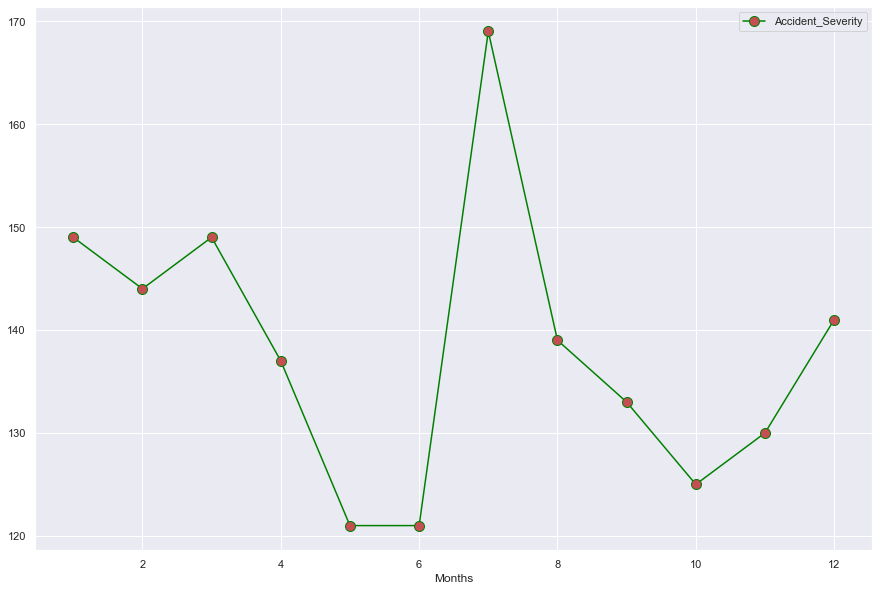

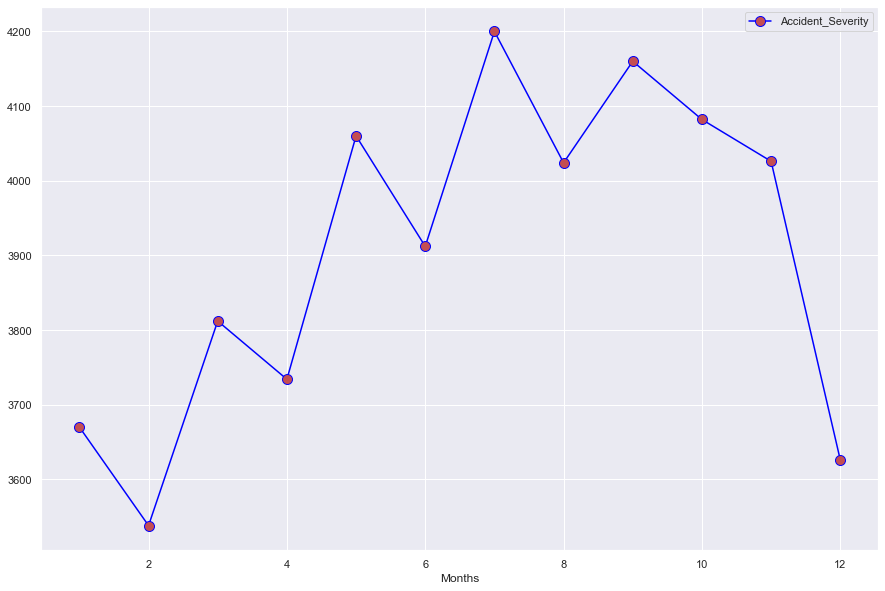

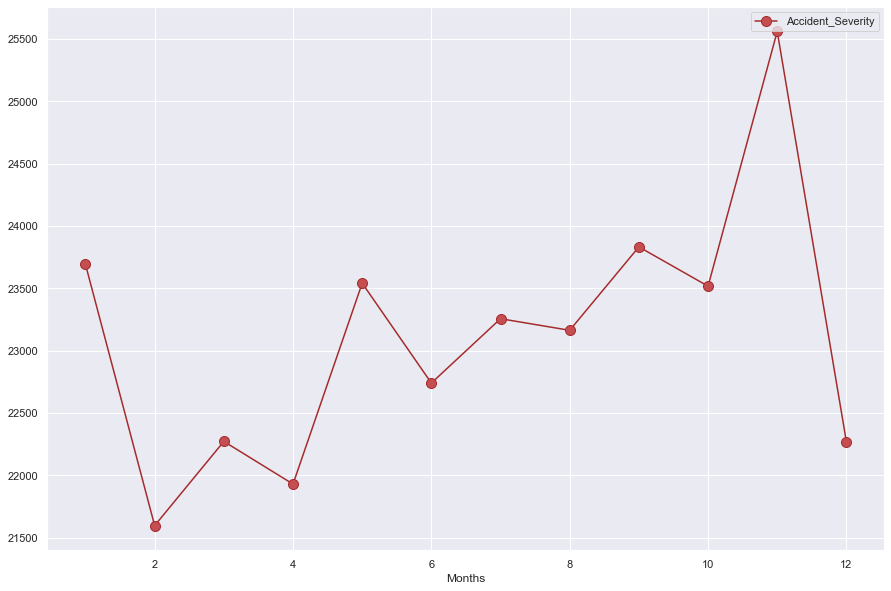

In [159]:
# Creating individual pivot table of accident severity  and making individual plots
fatal_samp = (accidents_2019[lambda x:x.Accident_Severity == 1])
serious_samp = (accidents_2019[lambda x:x.Accident_Severity == 2])
slight_samp = (accidents_2019[lambda x:x.Accident_Severity == 3])
plt.figure(figsize=(15,10), dpi=100)
pd.pivot_table(fatal_samp, values="Accident_Severity", index="Months", columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=True, sort=True).plot(figsize=(15,10), marker = 'o', ms = 10, mfc = 'r', color="green")
pd.pivot_table(serious_samp, values="Accident_Severity", index="Months", columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=True, sort=True).plot(figsize=(15,10),marker = 'o', ms = 10, mfc = 'r',color="blue")
pd.pivot_table(slight_samp, values="Accident_Severity", index="Months", columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=True, sort=True).plot(figsize=(15,10),marker = 'o', ms = 10, mfc = 'r',color="brown")
plt.show()

In [160]:
# Non Day light saving

#Day_light_saving = accidents_2019.loc[((accidents_2019["Date"] < "2019-03-31") & (accidents_2019["Date"] > "2019-10-27"))|((accidents_2019["Date"] == "2019-03-31") & (accidents_2019["Hours"] < 1))|((accidents_2019["Date"] == "2019-10-27") & (accidents_2019["Hours"] > 2))]
#Day_light_saving 

### Hypothesis Testings

#### Testing Week after day light savings start and week after day light savings end

In [161]:
# Testing to find out the trend with the number of accidents before and after daylight savings.
day_light_started = accidents_2019[(accidents_2019["Date"].between("2019-03-31","2019-04-07"))].describe()["Number_of_Casualties"]
day_light_ended =  accidents_2019[(accidents_2019["Date"].between("2019-10-27","2019-11-03"))].describe()["Number_of_Casualties"]

In [162]:
# Variance and ration check
print(np.var(day_light_started),np.var(day_light_ended))
ratio_check = np.var(day_light_started)/np.var(day_light_ended)

681223.8576823636 712825.2871578162


In [163]:
import scipy.stats as stats
# Implementing TTest
statistic_daylight_standard, pvalue_daylight_standard = stats.ttest_ind(a=day_light_started, b=day_light_ended, equal_var=True)

# Two tailed testing for sunrise and sunset
two_tailed_daylight_standard = pvalue_daylight_standard/2

print(f"Satistic: {statistic_daylight_standard}, PValue: {pvalue_daylight_standard}, Two_tailed_test: {two_tailed_daylight_standard}")

Satistic: -0.01313807823507802, PValue: 0.9897030212770359, Two_tailed_test: 0.49485151063851796


In [164]:
if pvalue_daylight_standard < 0.5:    # alpha value is 0.5 or 50%
    print("I Reject the Hypothesis")
else:
    print("I Accept the Hypothesis")

I Accept the Hypothesis


#### Sunrise and Sunset hypothesis testing

In [165]:
# Testing if the number of accidents that occur at sunrise and sunset are equal
# Creating dataframe for Day light Saving

Day_light_saving_time_null_test = accidents_2019.loc[(((accidents_2019["Date"] >= "2019-03-31") & (accidents_2019["Date"] < "2019-10-27")) & ((accidents_2019["Hours"] >= 6)& (accidents_2019["Hours"] <= 7))) | (((accidents_2019["Date"] >= "2019-03-31") & (accidents_2019["Date"] < "2019-10-27")) & ((accidents_2019["Hours"] >= 19) & (accidents_2019["Hours"] <= 20)))].describe()["Number_of_Casualties"]   

In [166]:
# Creating dataframe for Standard time

standard_time_null_test = accidents_2019.loc[(((accidents_2019["Date"] < "2019-03-31") | (accidents_2019["Date"] >= "2019-10-27")) & ((accidents_2019["Hours"] >= 7)& (accidents_2019["Hours"] <= 8))) | (((accidents_2019["Date"] < "2019-03-31") | (accidents_2019["Date"] >= "2019-10-27")) & ((accidents_2019["Hours"] >= 16) & (accidents_2019["Hours"] <= 17)))].describe()["Number_of_Casualties"]   

In [167]:
# Variance and ration check
print(np.var(Day_light_saving_time_null_test),np.var(standard_time_null_test))
ratio_check = np.var(Day_light_saving_time_null_test)/np.var(standard_time_null_test)

11704893.266889283 22990721.98828306


In [168]:
# Implementing TTest
statistic_sunrise_sunset, pvalue_sunrise_sunset = stats.ttest_ind(a=Day_light_saving_time_null_test, b=standard_time_null_test, equal_var=True)

# Two tailed testing for sunrise and sunset
two_tailed_sunrise_sunset = pvalue_sunrise_sunset/2

print(f"Satistic: {statistic_sunrise_sunset}, PValue: {pvalue_sunrise_sunset}, Two_tailed_test: {two_tailed_sunrise_sunset}")


Satistic: -0.23390316095661284, PValue: 0.8184459450130196, Two_tailed_test: 0.4092229725065098


In [169]:
if pvalue_sunrise_sunset < 0.5:    # alpha value is 0.5 or 50%
    print("I Reject the Hypothesis")
else:
    print("I Accept the Hypothesis")

I Accept the Hypothesis


In [170]:
# below is the OSGR cordinates for old trafford
#E 381730 ,N  396187

### Visualising with a scatterplot areas where the accidents occur being grouped by police force

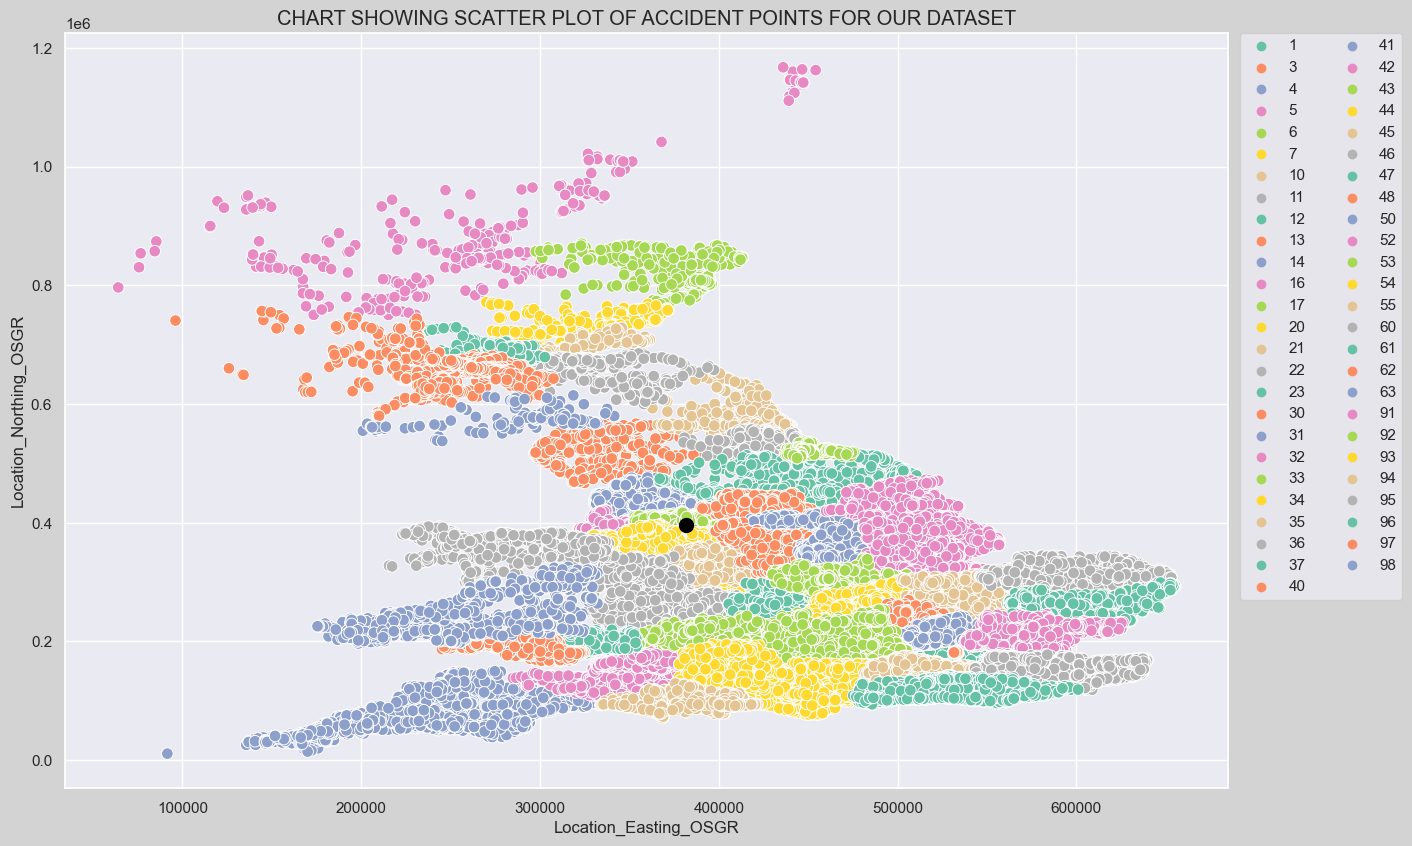

In [171]:
points_of_accidents_scatterplot =  plt.figure(figsize=(15,10), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)

points_of_accidents_chart = sns.scatterplot(x = accidents_2019["Location_Easting_OSGR"], y = accidents_2019["Location_Northing_OSGR"],s = 70, hue = accidents_2019["Police_Force"],palette = "Set2", edgecolors = "black", linewidths= 5)
points_of_accidents_charts = plt.scatter(x = 381730, y = 396187,s = 100,color="black" )
plt.title('CHART SHOWING SCATTER PLOT OF ACCIDENT POINTS FOR OUR DATASET', horizontalalignment='center', fontweight='light', fontsize='large')
points_of_accidents_chart.legend(loc = 0,ncol = 2, shadow =False, mode = None, facecolor = "inherit",bbox_to_anchor=(1.15, 1), borderaxespad=0)
plt.show()

In [172]:
# Most common location with Accidents.
mode_loc_acc =  accidents_2019.Police_Force.mode()[0]
print(f"The police force with the most accident ocurrence is:{mode_loc_acc}")

# Generating the dataframe of the mode police force with the highest number of accidents
most_loc_df = accidents_2019[lambda x: x.Police_Force == 1]

# Generating the East and North Location OSGR with the mode accident occurrence
mode_east_acc =  accidents_2019.Location_Easting_OSGR.mode()[0]
print(f"Location_Easting_OSGR for the police force with the most accident ocurrence is:{mode_east_acc}")

mode_north_acc =  accidents_2019.Location_Northing_OSGR.mode()[0]
print(f"Location_Northing_OSGR for the police force with the most accident ocurrence is:{mode_north_acc}")
most_loc_df

The police force with the most accident ocurrence is:1
Location_Easting_OSGR for the police force with the most accident ocurrence is:431920.0
Location_Northing_OSGR for the police force with the most accident ocurrence is:455668.0


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0      2019010128300               528218.0                180407.0   
1      2019010152270               530219.0                172463.0   
2      2019010155191               530222.0                182543.0   
3      2019010155192               525531.0                184605.0   
4      2019010155194               524920.0                184004.0   
...              ...                    ...                     ...   
25050  2019010934631               532524.0                192590.0   
25051  2019010950477               533614.0                180720.0   
25052  2019010950495               533763.0                180675.0   
25053  2019010950812               533739.0                180432.0   
25054  2019010951067               532792.0                180396.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
0      -0.153842  51.508057             1                  3   
1      -0.127949  51.436208             1                  3   
2      -0.124193  51.526795             1                  3   
3      -0.191044  51.546387             1                  2   
4      -0.200064  51.541121             1                  3   
...          ...        ...           ...                ...   
25050  -0.087243  51.616546             1                  3   
25051  -0.076016  51.509620             1                  2   
25052  -0.073887  51.509181             1                  3   
25053  -0.074325  51.507003             1                  3   
25054  -0.087976  51.506902             1                  2   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
0                       2                     3 2019-02-18  ...       50   
1                       2                     1 2019-01-15  ...       45   
2                       2                     1 2019-01-01  ...       50   
3                       1                     1 2019-01-01  ...       20   
4                       2                     2 2019-01-01  ...       40   
...                   ...                   ...        ...  ...      ...   
25050                   2                     2 2019-12-29  ...       47   
25051                   1                     1 2019-06-01  ...       50   
25052                   2                     1 2019-01-18  ...       13   
25053                   2                     1 2019-05-15  ...       40   
25054                   2                     1 2019-08-08  ...       24   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
0           0      8    17.833333   2019       2    18         9112   
1           0      3    21.750000   2019       1    15         9881   
2           0      1     1.833333   2019       1     1         9881   
3           0      1     1.333333   2019       1     1         9881   
4           0      1     0.666667   2019       1     1         9881   
...       ...    ...          ...    ...     ...   ...          ...   
25050       0     52    23.783333   2019      12    29         9377   
25051       0     22    10.833333   2019       6     1         9657   
25052       0      3    19.216667   2019       1    18         9881   
25053       0     20    21.666667   2019       5    15         9998   
25054       0     32     8.400000   2019       8     8         9872   

       Daylight_Count  day_light_standard_weeks  
0                9112                      2147  
1                9881                      2201  
2                9881                      2272  
3                9881                      2272  
4                9881                      2272  
...               ...                       ...  
25050            9377                      1426  
25051            9657                      1947  
25052            9881                      2201  
25053            9998                      2322  
25054            9872                      2364  

[25055 rows x 43 

In [173]:
# Visualising the number of accidents that occurred for the police force with the most accident record
len(most_loc_df)

25055

In [174]:
combined_df_2019["Local_Authority_(District)"]

0           1
1           1
2           1
3           9
4           2
         ... 
109513    917
109514    917
109515    917
109516    917
109517    917
Name: Local_Authority_(District), Length: 109518, dtype: int64

### Febraury 24  2019 evaluation

In [175]:
# Function to locste manchester to help calculate accidents around manchester

def locate_manchester(df):
    old_trad_accid_feb = df[lambda x: x["Location_Easting_OSGR"] <= 390000]
    #sorted(old_trad_accid_24_feb_East["Location_Easting_OSGR"].unique())
    old_trad_accid_feb = old_trad_accid_feb[lambda x: x["Location_Easting_OSGR"] >= 380000]
    old_trad_accid_feb = old_trad_accid_feb[lambda x: x["Location_Northing_OSGR"] <= 400000]
    old_trad_accid_feb = old_trad_accid_feb[lambda x: x["Location_Northing_OSGR"] >= 390000]
    return old_trad_accid_feb

def val_count(df,column_name):
    len_result = len(df[column_name])
    return len_result

In [176]:
# Extracting information of accidents that occured on the 24th of febraury 2019

feb_24_2019_accidents = accidents_2019[lambda x: x.Date == "24/02/2019"]
feb_24_2019_accidents
old_trafford_24_feb_2019 = locate_manchester(feb_24_2019_accidents)
val_count_feb_24_2019 = val_count(old_trafford_24_feb_2019,"Date")
print(f"The value count for 24/02/2019 is: {val_count_feb_24_2019}")
old_trafford_24_feb_2019

The value count for 24/02/2019 is: 4


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31193  201906A153967               383618.0                397493.0   
31207  201906A155476               383373.0                397556.0   
31376  201906A254260               383488.0                399726.0   
32611  201906J153867               389642.0                394586.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31193  -2.248275  53.473926             6                  3   
31207  -2.251970  53.474484             6                  3   
31376  -2.250351  53.493992             6                  3   
32611  -2.157422  53.447951             6                  1   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31193                   1                     2 2019-02-24  ...       18   
31207                   2                     1 2019-02-24  ...       48   
31376                   2                     2 2019-02-24  ...       45   
32611                   1                     1 2019-02-24  ...        8   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31193       0      8     0.300000   2019       2    24         9112   
31207       0      8    15.800000   2019       2    24         9112   
31376       0      8    21.750000   2019       2    24         9112   
32611       0      8    16.133333   2019       2    24         9112   

       Daylight_Count  day_light_standard_weeks  
31193            9112                      2147  
31207            9112                      2147  
31376            9112                      2147  
32611            9112                      2147  

[4 rows x 43 columns]

In [177]:
# Extracting information of accidents that occured on the 17th of febraury 2019

feb_17_2019_accidents = accidents_2019[lambda x: x.Date == "17/02/2019"]
feb_17_2019_accidents
old_trafford_17_feb_2019 = locate_manchester(feb_17_2019_accidents)
val_count_feb_17_2019 = val_count(old_trafford_17_feb_2019,"Date")
print(f"The value count for 17/02/2019 is: {val_count_feb_17_2019}")
old_trafford_17_feb_2019

The value count for 17/02/2019 is: 1


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31189  201906A153586               384116.0                398924.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31189  -2.240845  53.486803             6                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31189                   3                     1 2019-02-17  ...       30   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31189       0      7         12.5   2019       2    17         9112   

       Daylight_Count  day_light_standard_weeks  
31189            9112                      2411  

[1 rows x 43 columns]

In [178]:
# Extracting information of accidents that occured on the 10th of febraury 2019

feb_10_2019_accidents = accidents_2019[lambda x: x.Date == "10/02/2019"]
feb_10_2019_accidents
old_trafford_10_feb_2019 = locate_manchester(feb_10_2019_accidents)
val_count_feb_10_2019 = val_count(old_trafford_10_feb_2019,"Date")
print(f"The value count for 10/02/2019 is: {val_count_feb_10_2019}")
old_trafford_10_feb_2019

The value count for 10/02/2019 is: 2


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31194  201906A154089               384092.0                397559.0   
31682  201906E153536               386633.0                395658.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31194  -2.241137  53.474533             6                  3   
31682  -2.202774  53.457518             6                  2   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31194                   2                     1 2019-10-02  ...       54   
31682                   1                     1 2019-10-02  ...        5   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31194       0     40     3.900000   2019      10     2        10005   
31682       0     40    11.083333   2019      10     2        10005   

       Daylight_Count  day_light_standard_weeks  
31194           10005                      2171  
31682           10005                      2171  

[2 rows x 43 columns]

In [179]:
# Extracting information of accidents that occured on the 3rd of febraury 2019

feb_03_2019_accidents = accidents_2019[lambda x: x.Date == "03/02/2019"]
feb_03_2019_accidents
old_trafford_03_feb_2019 = locate_manchester(feb_03_2019_accidents)
val_count_feb_03_2019 = val_count(old_trafford_03_feb_2019,"Date")
print(f"The value count for 03/02/2019 is: {val_count_feb_03_2019}")
old_trafford_03_feb_2019

The value count for 03/02/2019 is: 1


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
32250  201906F253906               380532.0                398242.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
32250  -2.294816  53.480553             6                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
32250                   2                     1 2019-03-02  ...       45   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
32250       0      9         7.75   2019       3     2         9479   

       Daylight_Count  day_light_standard_weeks  
32250            9479                      2078  

[1 rows x 43 columns]

In [180]:
# Building a dataframe for plotting old trafford febraury 2019 accidents

old_trafford_feb_2019_df_build = {"24th Feb, 2019.":val_count_feb_24_2019,"17th Feb, 2019.":val_count_feb_17_2019,"10th Feb, 2019.":val_count_feb_10_2019,"3rd Feb, 2019.":val_count_feb_03_2019}
old_trafford_feb_2019_df  = {"10km around Old Trafford showing accident report for all Sundays in Feb, 2019.":old_trafford_feb_2019_df_build}
old_trafford_feb_2019_df = pd.DataFrame(old_trafford_feb_2019_df )
old_trafford_feb_2019_df


10km around Old Trafford showing accident report for all Sundays in Feb, 2019.
10th Feb, 2019.                                                  2                             
17th Feb, 2019.                                                  1                             
24th Feb, 2019.                                                  4                             
3rd Feb, 2019.                                                   1

No handles with labels found to put in legend.


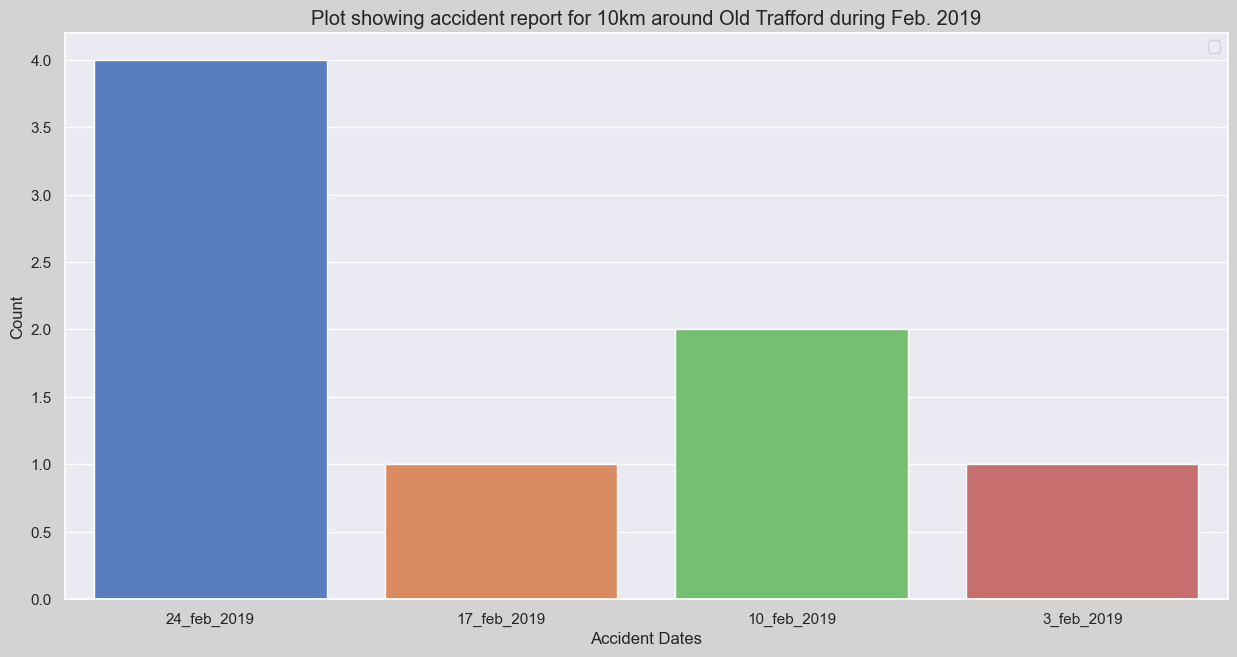

In [181]:
# Plot showing accident report for 10km around Old Trafford during Feb. 2019.

feb_data_2019_list = [val_count_feb_24_2019,val_count_feb_17_2019,val_count_feb_10_2019,val_count_feb_03_2019]
feb_2019_label = ["24_feb_2019","17_feb_2019","10_feb_2019","3_feb_2019"]

old_trafford_feb_2019_df = pd.DataFrame({'Feb 2019 Sunday Dates': feb_2019_label, 'Amount of Accidents that occurred': feb_data_2019_list})
old_trafford_feb_2019_df


old_trafford_feb_plot = plt.figure(figsize=(15,7.5), dpi = 100 , facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
old_trafford = sns.barplot(y='Amount of Accidents that occurred',x='Feb 2019 Sunday Dates', data=old_trafford_feb_2019_df, order=feb_2019_label , palette='muted')
plt.title('Plot showing accident report for 10km around Old Trafford during Feb. 2019', horizontalalignment='center', fontweight='light', fontsize='large')
old_trafford.set(xlabel='Accident Dates', ylabel="Count")
#plt.legend(["03th_feb_2019","10th_feb_2019","17th_feb_2019", "24th_Feb_2019"])
plt.legend()
plt.show()

In [182]:
# Extracting all accidents in manchester on the 24-feb-2019

manchester_24_feb_2019_accidents = feb_24_2019_accidents[lambda x: x.Police_Force == 6]
manchester_24_feb_2019_accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31193  201906A153967               383618.0                397493.0   
31207  201906A155476               383373.0                397556.0   
31376  201906A254260               383488.0                399726.0   
32611  201906J153867               389642.0                394586.0   
32896  201906K154149               370906.0                408615.0   
33255  201906L153887               360488.0                405043.0   
33821  201906N153975               379767.0                416987.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31193  -2.248275  53.473926             6                  3   
31207  -2.251970  53.474484             6                  3   
31376  -2.250351  53.493992             6                  3   
32611  -2.157422  53.447951             6                  1   
32896  -2.440825  53.573339             6                  3   
33255  -2.597690  53.540551             6                  1   
33821  -2.307563  53.649006             6                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31193                   1                     2 2019-02-24  ...       18   
31207                   2                     1 2019-02-24  ...       48   
31376                   2                     2 2019-02-24  ...       45   
32611                   1                     1 2019-02-24  ...        8   
32896                   1                     1 2019-02-24  ...       20   
33255                   3                     1 2019-02-24  ...       45   
33821                   1                     1 2019-02-24  ...       10   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31193       0      8     0.300000   2019       2    24         9112   
31207       0      8    15.800000   2019       2    24         9112   
31376       0      8    21.750000   2019       2    24         9112   
32611       0      8    16.133333   2019       2    24         9112   
32896       0      8    11.333333   2019       2    24         9112   
33255       0      8    20.750000   2019       2    24         9112   
33821       0      8    13.166667   2019       2    24         9112   

       Daylight_Count  day_light_standard_weeks  
31193            9112                      2147  
31207            9112                      2147  
31376            9112                      2147  
32611            9112                      2147  
32896            9112                      2147  
33255            9112                      2147  
33821            9112                      2147  

[7 rows x 43 columns]

In [183]:
manchester_17_feb_2019_accidents = feb_17_2019_accidents[lambda x: x.Police_Force == 6]
manchester_17_feb_2019_accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31189  201906A153586               384116.0                398924.0   
31987  201906E454124               382370.0                386047.0   
32894  201906K153828               370424.0                408481.0   
33018  201906K253752               372287.0                409938.0   
33254  201906L153693               357718.0                399023.0   
33820  201906N153653               380917.0                411605.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31189  -2.240845  53.486803             6                  3   
31987  -2.266434  53.371003             6                  3   
32894  -2.448091  53.572108             6                  3   
33018  -2.420089  53.585305             6                  3   
33254  -2.638671  53.486228             6                  3   
33820  -2.289833  53.600676             6                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31189                   3                     1 2019-02-17  ...       30   
31987                   4                     1 2019-02-17  ...       35   
32894                   3                     1 2019-02-17  ...        0   
33018                   2                     5 2019-02-17  ...       10   
33254                   2                     2 2019-02-17  ...       45   
33820                   1                     1 2019-02-17  ...       27   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31189       0      7    12.500000   2019       2    17         9112   
31987       0      7    21.583333   2019       2    17         9112   
32894       0      7    15.000000   2019       2    17         9112   
33018       0      7     5.166667   2019       2    17         9112   
33254       0      7    20.750000   2019       2    17         9112   
33820       0      7    19.450000   2019       2    17         9112   

       Daylight_Count  day_light_standard_weeks  
31189            9112                      2411  
31987            9112                      2411  
32894            9112                      2411  
33018            9112                      2411  
33254            9112                      2411  
33820            9112                      2411  

[6 rows x 43 columns]

In [184]:
manchester_10_feb_2019_accidents = feb_10_2019_accidents[lambda x: x.Police_Force == 6]
manchester_10_feb_2019_accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31194  201906A154089               384092.0                397559.0   
31682  201906E153536               386633.0                395658.0   
32071  201906F153815               371532.0                404557.0   
32606  201906J153480               391152.0                392330.0   
32890  201906K153499               371486.0                408972.0   
33252  201906L153491               358473.0                405476.0   
34281  201906Q154251               392331.0                403360.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31194  -2.241137  53.474533             6                  3   
31682  -2.202774  53.457518             6                  2   
32071  -2.431001  53.536901             6                  3   
32606  -2.134623  53.427700             6                  3   
32890  -2.432099  53.576580             6                  3   
33252  -2.628151  53.544286             6                  3   
34281  -2.117152  53.526861             6                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31194                   2                     1 2019-10-02  ...       54   
31682                   1                     1 2019-10-02  ...        5   
32071                   2                     1 2019-10-02  ...       45   
32606                   1                     1 2019-10-02  ...       10   
32890                   1                     1 2019-10-02  ...       30   
33252                   2                     1 2019-10-02  ...        0   
34281                   2                     2 2019-10-02  ...       52   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31194       0     40     3.900000   2019      10     2        10005   
31682       0     40    11.083333   2019      10     2        10005   
32071       0     40    19.750000   2019      10     2        10005   
32606       0     40    21.166667   2019      10     2        10005   
32890       0     40    17.500000   2019      10     2        10005   
33252       0     40    13.000000   2019      10     2        10005   
34281       0     40    14.866667   2019      10     2        10005   

       Daylight_Count  day_light_standard_weeks  
31194           10005                      2171  
31682           10005                      2171  
32071           10005                      2171  
32606           10005                      2171  
32890           10005                      2171  
33252           10005                      2171  
34281           10005                      2171  

[7 rows x 43 columns]

In [185]:
manchester_03_feb_2019_accidents = feb_03_2019_accidents[lambda x: x.Police_Force == 6]
manchester_03_feb_2019_accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
31365  201906A253244               383740.0                402434.0   
31366  201906A253373               385849.0                401657.0   
32250  201906F253906               380532.0                398242.0   
32515  201906G253245               391912.0                395472.0   
32887  201906K153176               371934.0                408925.0   
33140  201906K353041               372593.0                406381.0   
33411  201906L253219               365714.0                401251.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
31365  -2.246695  53.518340             6                  3   
31366  -2.214852  53.511418             6                  2   
32250  -2.294816  53.480553             6                  3   
32515  -2.123267  53.455955             6                  3   
32887  -2.425329  53.576182             6                  3   
33140  -2.415153  53.553351             6                  2   
33411  -2.518419  53.506837             6                  2   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  Minutes  \
31365                   2                     1 2019-03-02  ...       30   
31366                   1                     1 2019-03-02  ...       21   
32250                   2                     1 2019-03-02  ...       45   
32515                   1                     1 2019-03-02  ...       25   
32887                   7                     3 2019-03-02  ...        7   
33140                   3                     3 2019-03-02  ...       39   
33411                   3                     2 2019-03-02  ...       45   

      Seconds  Weeks decimal_time  Years  Months  Days  Month_Count  \
31365       0      9    16.500000   2019       3     2         9479   
31366       0      9    18.350000   2019       3     2         9479   
32250       0      9     7.750000   2019       3     2         9479   
32515       0      9    20.416667   2019       3     2         9479   
32887       0      9     3.116667   2019       3     2         9479   
33140       0      9    18.650000   2019       3     2         9479   
33411       0      9    20.750000   2019       3     2         9479   

       Daylight_Count  day_light_standard_weeks  
31365            9479                      2078  
31366            9479                      2078  
32250            9479                      2078  
32515            9479                      2078  
32887            9479                      2078  
33140            9479                      2078  
33411            9479                      2078  

[7 rows x 43 columns]

In [186]:
# Trial code that didn't work
#old_trad_accid_24_feb = feb_24_2019_accidents.loc[((feb_24_2019_accidents["Location_Easting_OSGR"]== "381730")and (feb_24_2019_accidents["Location_Northing_OSGR"]=="396187"))]

### Exploring speed_limit data

In [187]:
# Value count for speed limit to predict know the amount of accidents per speed limit 
# Note: -1 represent outliers

speed_limit_value_count = val_count(accidents_2019,"Speed_limit")
speed_limit_value_count

117536

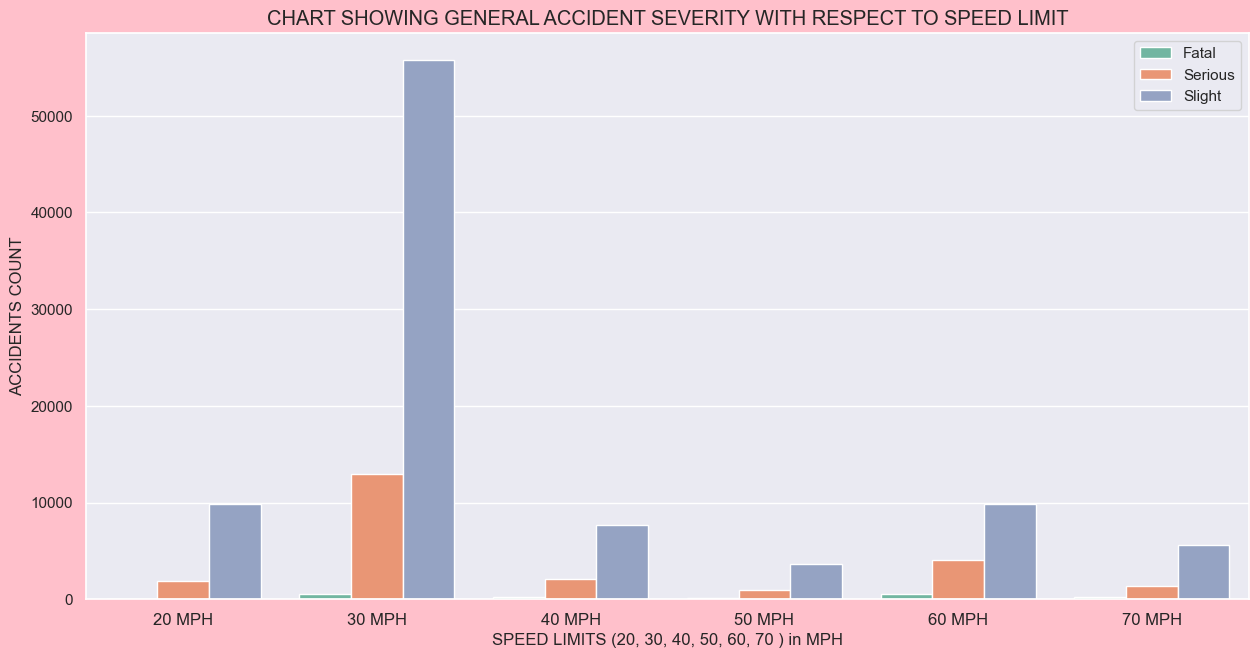

In [188]:
speed_df = accidents_2019[lambda x:x.Speed_limit > -1]
speed_accident_severity = plt.figure(figsize=(15,7.5),dpi = 100 , facecolor="pink", edgecolor="pink", frameon=True)
sns.set_theme()
speed_accident_severity_chart = sns.countplot(data = speed_df,x ='Speed_limit', hue='Accident_Severity', palette='Set2')
speed_accident_severity_chart.set(xlabel='SPEED LIMITS (20, 30, 40, 50, 60, 70 ) in MPH', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING GENERAL ACCIDENT SEVERITY WITH RESPECT TO SPEED LIMIT', horizontalalignment='center', fontweight='light', fontsize='large')
speed_accident_severity_chart.set_xticklabels(["20 MPH", "30 MPH", "40 MPH", "50 MPH", "60 MPH", "70 MPH" ], rotation=0, horizontalalignment='center',fontweight='light', fontsize='medium')
plt.legend(["Fatal", "Serious", "Slight"])
plt.show()

### Visualising accident severity data

In [189]:
# Value count for accident severity to predict know the amount of accidents per accident severity 
# Note: (1-Fatal, 2-Serious, 3-Slight)

#accident_severity_value_count = value_count_report(combined_df_2019_new,"Accident_Severity")
#accident_severity_value_count

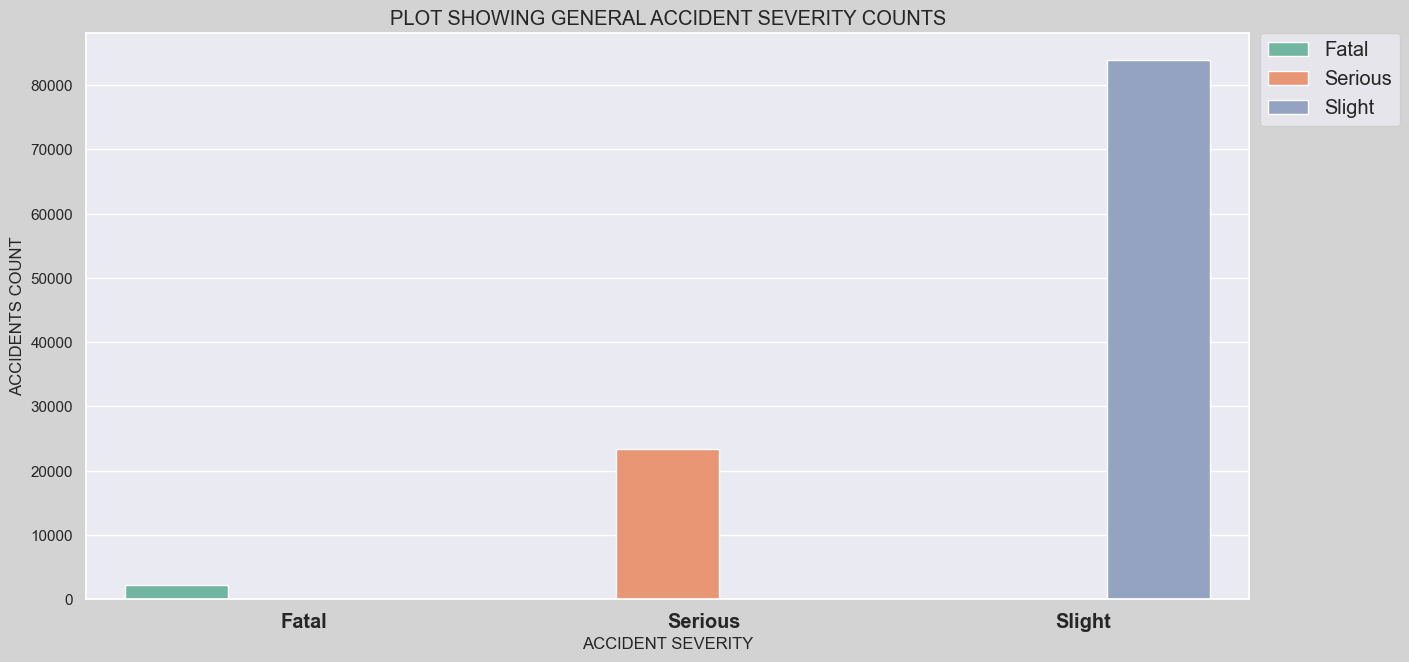

In [190]:
plot_accident_severity_plot = plt.figure(figsize=(15,7.5), dpi = 100 , facecolor="lightgrey", edgecolor="pink", frameon=True)
sns.set_theme()
plot_accident_severity_chart = sns.countplot(data = combined_df_2019,x ='Accident_Severity', hue = "Accident_Severity", palette='Set2',)
plot_accident_severity_chart.set(xlabel='ACCIDENT SEVERITY', ylabel='ACCIDENTS COUNT')
plt.title('PLOT SHOWING GENERAL ACCIDENT SEVERITY COUNTS', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal", "Serious", "Slight"],loc = 0,ncol = 1, shadow =False, mode = None, facecolor = "inherit",bbox_to_anchor=(1.13, 1), borderaxespad=0, fontsize='large')
plot_accident_severity_chart.set_xticklabels(["Fatal", "Serious", "Slight"], rotation=0, horizontalalignment='left',fontweight='heavy', fontsize='large')
plt.show()

### for instance of column_a , what is the result count for column_b with inverse ability.

In [191]:
# for instance of column_a , what is the result count for column_b with inverse ability.

def count_compare_report(df,column_a,column_b,inverse_active):
    cols_a = set(df[column_a])
    cols_b = set(df[column_b])
    cols_a = list(cols_a)
    cols_b = list(cols_b)
    result_count_compare_report_storage = []
    
    if inverse_active == 0:
        for i in cols_a:
            result_cols_a_df = df.loc[lambda x:x[column_a] == i]
            result_count = result_cols_a_df[column_b].value_counts()
            result_count_compare_report = print(f"Value count for {column_b} with respect to {column_a}: for {column_b} at {i}, the count is: \n{result_count} \n")
            result_count_compare_report_storage.append(result_count_compare_report)
            #return result_count_compare_report 
            
    elif inverse_active == 1:
        for i in cols_b:
            result_cols_b_df = df.loc[lambda x:x[column_b] == i]
            result_count = result_cols_b_df[column_a].value_counts()
            result_count_compare_report = print(f"Value count for {column_a} with respect to {column_b}: for {column_b} at {i}, the count is: \n{result_count} \n")
            result_count_compare_report_storage.append(result_count_compare_report )
            #return result_count_compare_report
    
    return result_count_compare_report_storage 

In [192]:
# Testing out the value count function eith speed limit and accident severity
# Note: The last entry for the fucntion takes in a "1" to show inverse is active and "0" for inverse not active.

count_compare_report(combined_df_2019,"Speed_limit","Accident_Severity",1)

Value count for Speed_limit with respect to Accident_Severity: for Accident_Severity at 1, the count is: 
60    861
30    616
40    274
70    253
50    163
20     48
Name: Speed_limit, dtype: int64 

Value count for Speed_limit with respect to Accident_Severity: for Accident_Severity at 2, the count is: 
 30    12090
 60     4851
 40     2217
 70     1512
 20     1501
 50     1208
-1         3
Name: Speed_limit, dtype: int64 

Value count for Speed_limit with respect to Accident_Severity: for Accident_Severity at 3, the count is: 
 30    50092
 60     9746
 20     7656
 40     7439
 70     5192
 50     3760
-1        36
Name: Speed_limit, dtype: int64 



[None, None, None]

### Rule functions (Support, Confidence ,Completeness ,Lift ,Conviction ,RI)

In [193]:
# Support function

#class calculations:
 #   def __init__(self,df,target_1,target_2):
    #    self.df = df
     #   self.target_1 = target_1
      #  self.target_2 = target_2

# General function to output calculation results.
def report(df,target_1,target_2,ante_column,cons_column):    
    df = df
    target_1 = target_1
    target_2 = target_2
    
    #initialisation of parameters
#    def initialisation_func(df,target_1,target_2):
    df_speed = df.loc[lambda x: x[ante_column]==target_1]
    df_severity = df.loc[lambda x: x[cons_column]==target_2]
    df_total = df_speed.loc[lambda x: x[cons_column]==target_2]
    dfspeed_freq = len(df_speed)
    dfseverity_freq = len(df_severity)
    dftotal_freq = len(df_total)
    total_dfl = len(df)

        
    # Support function        
    def support_func (df,target_1,target_2):
        result_support = dftotal_freq/total_dfl
        return print(f"The support value is :{result_support}")

    # Confidence function
    def confidence_func (df,target_1,target_2):
        result_confidence = dftotal_freq/dfspeed_freq
        return print(f"The confidence value is :{result_confidence}")

    # completeness function
    def completeness_func (df,target_1,target_2):
        result_completeness = dftotal_freq/dfseverity_freq
        return print(f"The completeness value is :{result_completeness}")

    # lift function
    def lift_func (df,target_1,target_2):
        support_a = dfspeed_freq/total_dfl
        support_b = dfseverity_freq/total_dfl
        result_support = dftotal_freq/total_dfl
        result_lift = result_support/(support_a*support_b)
        return print(f"The lift value is :{result_lift}")

    # Conviction function
    def conviction_func (df,target_1,target_2):
        support_b = dfseverity_freq/total_dfl
        result_confidence = dftotal_freq/dfspeed_freq
        result_conviction = (1-support_b)/(1-result_confidence)
        return print(f"The conviction value is :{result_conviction}")

    # RI function
    def ri_func (df,target_1,target_2):
        result_ri = (dftotal_freq - (dfspeed_freq*(dfseverity_freq/total_dfl))) # Calculated using BODMAS formular
        return print(f"The RI value is :{result_ri}")
    
    # Calling each fucntion for return value
    
#    initialisation_func (df,target_1,target_2)
    support_func (df,target_1,target_2)
    confidence_func (df,target_1,target_2)
    completeness_func (df,target_1,target_2)
    lift_func (df,target_1,target_2)
    conviction_func (df,target_1,target_2)
    ri_func (df,target_1,target_2) 

In [194]:
# Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = 20 and accident severity = 3(Slight)

print(report(combined_df_2019,20,3,"Speed_limit","Accident_Severity"))

The support value is :0.06990631676984606
The confidence value is :0.8317218902770234
The completeness value is :0.09122865552126405
The lift value is :1.0854079191067678
The conviction value is :1.3889158670510358
The RI value is :602.4306780620545
None


In [195]:
# Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = 70 and accident severity = 1(Fatal)

print(report(combined_df_2019,70,1,"Speed_limit","Accident_Severity"))

The support value is :0.002310122536934568
The confidence value is :0.03636624982032485
The completeness value is :0.11422121896162528
The lift value is :1.7980853037572628
The conviction value is :1.0167504137025503
The RI value is :112.29477346189668
None


In [196]:
# Report of analysis on the Assocition pattern mining for our dataset with special interest of pedestrian crossing code = zebra(With code 1) and casualty type = pedestrian (with code 0)

print(report(combined_df_2019,1,0,"Pedestrian_Crossing-Physical_Facilities","Casualty_Type"))

The support value is :0.011103197647875235
The confidence value is :0.32340425531914896
The completeness value is :0.07630522088353414
The lift value is :2.222551909766726
The conviction value is :1.2629249882934726
The RI value is :668.8811702185942
None


In [197]:
# Speed limit rule check with casualty records

# First creatinng the set of speed limits
speed_limit = set(combined_df_2019.Speed_limit)

# Turning the speed limit set into a list.
speed_limit = list(speed_limit)
#speed_limit

# First creating a set of accident severity
accident_severity = set(accidents_2019.Accident_Severity)

# Turning the accident severioty into a list.
accident_severity = list(accident_severity)
#accident_severity

# Creating a list for rule names
accident_severity_names = ["Fatal","Serious","Slight"]
k = accident_severity_names

In [198]:
# Creating the loop to run our report for each rule.

for i in speed_limit:
    # iterator for accident severity names that is "l"
    l = 0
    for j in accident_severity:
        print (f"Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = {i} and accident severity = {j}({k[l]})")   
        print(report(accidents_2019,i,j,"Speed_limit","Accident_Severity"),"\n")
        l+=1

Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = 70 and accident severity = 1(Fatal)
The support value is :0.0017441464742717124
The confidence value is :0.02865930378862016
The completeness value is :0.12364294330518698
The lift value is :2.031664614052629
The conviction value is :1.0149823717700044
The RI value is :104.09751905799074
None 

Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = 70 and accident severity = 2(Serious)
The support value is :0.011596447046011435
The confidence value is :0.19054941982385012
The completeness value is :0.05819315173768252
The lift value is :0.9562128173689716
The conviction value is :0.9892202240642282
The RI value is :-62.41490266811866
None 

Report of analysis on the Assocition pattern mining for our dataset with special interest of speed limit = 70 and accident severity = 3(Slight)
The support value is :0.0475173563844269
The con

### Apriori Testing

In [199]:
# Note: for speed limit 30 and slight injurie 3,  there seem to be more slight injuries as I can presume that the people are not so careful because the vehicles are not speeding excessively.

In [200]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


a = pd.get_dummies(combined_df_2019.Accident_Severity, prefix='Accidents_severity')

b = pd.get_dummies(combined_df_2019.Speed_limit, prefix='Speed_limit')

c = pd.get_dummies(combined_df_2019.Weather_Conditions , prefix='Weather_conditions')

apriori_df_a = pd.DataFrame(a)
apriori_df_a = apriori_df_a.reset_index()
apriori_df_b = pd.DataFrame(b)
apriori_df_b = apriori_df_b.reset_index()
apriori_df_c = pd.DataFrame(c)
apriori_df_c = apriori_df_c.reset_index()
apriori_df_ab = pd.merge(apriori_df_a,apriori_df_b, how="inner", on="index")
apriori_df_abc = pd.merge(apriori_df_ab,apriori_df_c,how="inner", on = "index")
apriori_df_abc = apriori_df_abc.drop(labels="index", axis = 1)
apriori_df_abc

Accidents_severity_1  Accidents_severity_2  Accidents_severity_3  \
0                          0                     0                     1   
1                          0                     0                     1   
2                          0                     0                     1   
3                          0                     0                     1   
4                          0                     0                     1   
...                      ...                   ...                   ...   
109513                     0                     0                     1   
109514                     0                     0                     1   
109515                     0                     0                     1   
109516                     0                     0                     1   
109517                     0                     1                     0   

        Speed_limit_-1  Speed_limit_20  Speed_limit_30  Speed_limit_40  \
0                    0               0               1               0   
1                    0               0               1               0   
2                    0               0               1               0   
3                    0               0               1               0   
4                    0               0               1               0   
...                ...             ...             ...             ...   
109513               0               0               0               0   
109514               0               0               0               0   
109515               0               0               0               0   
109516               0               0               1               0   
109517               0               0               0               0   

        Speed_limit_50  Speed_limit_60  Speed_limit_70  Weather_conditions_1  \
0                    0               0               0                     1   
1                    0               0               0                     1   
2                    0               0               0                     1   
3                    0               0               0                     1   
4                    0               0               0                     1   
...                ...             ...             ...                   ...   
109513               0               1               0                     1   
109514               0               1               0                     1   
109515               0               1               0                     1   
109516               0               0               0                     1   
109517               0               1               0                     1   

        Weather_conditions_2  Weather_conditions_3  Weather_conditions_4  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
109513                     0                     0                     0   
109514                     0                     0                     0   
109515                     0                     0                     0   
109516                     0                     0                     0   
109517                     0                     0                     0   

        Weather_conditions_5  Weather_conditions_6  Weather_conditions_7  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0

In [201]:
frequent_itemsets = apriori(apriori_df_abc,min_support=0.12,use_colnames=True)
frequent_itemsets

support                                           itemsets
0   0.213499                             (Accidents_severity_2)
1   0.766276                             (Accidents_severity_3)
2   0.573403                                   (Speed_limit_30)
3   0.141146                                   (Speed_limit_60)
4   0.796326                             (Weather_conditions_1)
5   0.125742                             (Weather_conditions_2)
6   0.172529       (Weather_conditions_1, Accidents_severity_2)
7   0.457386             (Speed_limit_30, Accidents_severity_3)
8   0.607170       (Weather_conditions_1, Accidents_severity_3)
9   0.458208             (Weather_conditions_1, Speed_limit_30)
10  0.364561  (Weather_conditions_1, Accidents_severity_3, S...

In [202]:
rules_report  = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules_report

antecedents  \
0                         (Weather_conditions_1)   
1                         (Accidents_severity_2)   
2                               (Speed_limit_30)   
3                         (Accidents_severity_3)   
4                         (Weather_conditions_1)   
5                         (Accidents_severity_3)   
6                         (Weather_conditions_1)   
7                               (Speed_limit_30)   
8   (Weather_conditions_1, Accidents_severity_3)   
9         (Weather_conditions_1, Speed_limit_30)   
10        (Speed_limit_30, Accidents_severity_3)   
11                        (Weather_conditions_1)   
12                        (Accidents_severity_3)   
13                              (Speed_limit_30)   

                                     consequents  antecedent support  \
0                         (Accidents_severity_2)            0.796326   
1                         (Weather_conditions_1)            0.213499   
2                         (Accidents_severity_3)            0.573403   
3                               (Speed_limit_30)            0.766276   
4                         (Accidents_severity_3)            0.796326   
5                         (Weather_conditions_1)            0.766276   
6                               (Speed_limit_30)            0.796326   
7                         (Weather_conditions_1)            0.573403   
8                               (Speed_limit_30)            0.607170   
9                         (Accidents_severity_3)            0.458208   
10                        (Weather_conditions_1)            0.457386   
11        (Speed_limit_30, Accidents_severity_3)            0.796326   
12        (Weather_conditions_1, Speed_limit_30)            0.766276   
13  (Weather_conditions_1, Accidents_severity_3)            0.573403   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.213499  0.172529    0.216656  1.014786  0.002514    1.004030  
1             0.796326  0.172529    0.808100  1.014786  0.002514    1.061358  
2             0.766276  0.457386    0.797669  1.040968  0.018001    1.155156  
3             0.573403  0.457386    0.596895  1.040968  0.018001    1.058276  
4             0.766276  0.607170    0.762464  0.995025 -0.003036    0.983952  
5             0.796326  0.607170    0.792364  0.995025 -0.003036    0.980921  
6             0.573403  0.458208    0.575402  1.003486  0.001592    1.004708  
7             0.796326  0.458208    0.799102  1.003486  0.001592    1.013819  
8             0.573403  0.364561    0.600427  1.047128  0.016408    1.067631  
9             0.766276  0.364561    0.795624  1.038300  0.013448    1.143598  
10            0.796326  0.364561    0.797053  1.000914  0.000333    1.003586  
11            0.457386  0.364561    0.457804  1.000914  0.000333    1.000771  
12            0.458208  0.364561    0.475757  1.038300  0.013448    1.033475  
13            0.607170  0.364561    0.635785  1.047128  0.016408    1.078566

#### Investigating vehicle data using Apriori

In [203]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

a = pd.get_dummies(combined_df_2019.Accident_Severity, prefix='Accidents_severity')

b = pd.get_dummies(combined_df_2019.Number_of_Vehicles, prefix='Number_of_Vehicles')

c = pd.get_dummies(combined_df_2019.Skidding_and_Overturning , prefix='Skidding_and_Overturning')

d = pd.get_dummies(combined_df_2019.Vehicle_Type, prefix='Vehicle_Type')

e = pd.get_dummies(combined_df_2019.Vehicle_Manoeuvre , prefix='Vehicle_Manoeuvre')

f = pd.get_dummies(combined_df_2019.Age_of_Vehicle, prefix='Age_of_Vehicle')

g = pd.get_dummies(combined_df_2019["Engine_Capacity_(CC)"] , prefix='Engine_Capacity_(CC)')

apriori_df_a = pd.DataFrame(a)
apriori_df_a = apriori_df_a.reset_index()
apriori_df_b = pd.DataFrame(b)
apriori_df_b = apriori_df_b.reset_index()
apriori_df_c = pd.DataFrame(c)
apriori_df_c = apriori_df_c.reset_index()
apriori_df_d = pd.DataFrame(d)
apriori_df_d = apriori_df_d.reset_index()
apriori_df_e = pd.DataFrame(e)
apriori_df_e = apriori_df_e.reset_index()
apriori_df_f = pd.DataFrame(f)
apriori_df_f = apriori_df_f.reset_index()
apriori_df_g = pd.DataFrame(g)
apriori_df_g = apriori_df_g.reset_index()

apriori_df_ab = pd.merge(apriori_df_a,apriori_df_b, how="inner", on="index")
apriori_df_abc = pd.merge(apriori_df_ab,apriori_df_c,how="inner", on = "index")
apriori_df_abc = pd.merge(apriori_df_abc,apriori_df_d,how="inner", on = "index")
apriori_df_abc = pd.merge(apriori_df_abc,apriori_df_e,how="inner", on = "index")
apriori_df_abc = pd.merge(apriori_df_abc,apriori_df_f,how="inner", on = "index")
apriori_df_abc = pd.merge(apriori_df_abc,apriori_df_g,how="inner", on = "index")
apriori_df_abc = apriori_df_abc.drop(labels="index", axis = 1)

In [204]:
frequent_itemsets = apriori(apriori_df_abc,min_support=0.50,use_colnames=True)
frequent_itemsets

support                                           itemsets
0  0.766276                             (Accidents_severity_3)
1  0.619259                             (Number_of_Vehicles_2)
2  0.811684                       (Skidding_and_Overturning_0)
3  0.673040                                   (Vehicle_Type_9)
4  0.534204                             (Vehicle_Manoeuvre_18)
5  0.631960  (Accidents_severity_3, Skidding_and_Overturnin...
6  0.531584             (Accidents_severity_3, Vehicle_Type_9)
7  0.518271  (Skidding_and_Overturning_0, Number_of_Vehicle...
8  0.556292       (Skidding_and_Overturning_0, Vehicle_Type_9)

In [205]:
rules_report  = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules_report

antecedents                   consequents  \
0        (Accidents_severity_3)  (Skidding_and_Overturning_0)   
1  (Skidding_and_Overturning_0)        (Accidents_severity_3)   
2        (Accidents_severity_3)              (Vehicle_Type_9)   
3              (Vehicle_Type_9)        (Accidents_severity_3)   
4  (Skidding_and_Overturning_0)        (Number_of_Vehicles_2)   
5        (Number_of_Vehicles_2)  (Skidding_and_Overturning_0)   
6  (Skidding_and_Overturning_0)              (Vehicle_Type_9)   
7              (Vehicle_Type_9)  (Skidding_and_Overturning_0)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.766276            0.811684  0.631960    0.824716  1.016056   
1            0.811684            0.766276  0.631960    0.778579  1.016056   
2            0.766276            0.673040  0.531584    0.693724  1.030732   
3            0.673040            0.766276  0.531584    0.789825  1.030732   
4            0.811684            0.619259  0.518271    0.638513  1.031093   
5            0.619259            0.811684  0.518271    0.836921  1.031093   
6            0.811684            0.673040  0.556292    0.685356  1.018298   
7            0.673040            0.811684  0.556292    0.826536  1.018298   

   leverage  conviction  
0  0.009986    1.074349  
1  0.009986    1.055564  
2  0.015850    1.067533  
3  0.015850    1.112045  
4  0.015628    1.053264  
5  0.015628    1.154756  
6  0.009996    1.039141  
7  0.009996    1.085623

#### Investigating the Driver data

In [206]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

a = pd.get_dummies(combined_df_2019.Accident_Severity, prefix='Accidents_severity')

b = pd.get_dummies(combined_df_2019.Age_Band_of_Driver, prefix='Age_Band_of_Driver')

c = pd.get_dummies(combined_df_2019.Journey_Purpose_of_Driver, prefix='Purpose_of_Journey')

apriori_df_a = pd.DataFrame(a)
apriori_df_a = apriori_df_a.reset_index()
apriori_df_b = pd.DataFrame(b)
apriori_df_b = apriori_df_b.reset_index()
apriori_df_c = pd.DataFrame(c)
apriori_df_c = apriori_df_c.reset_index()
apriori_df_ab = pd.merge(apriori_df_a,apriori_df_b, how="inner", on="index")
apriori_df_abc = pd.merge(apriori_df_ab,apriori_df_c,how="inner", on = "index")
apriori_df_abc = apriori_df_abc.drop(labels="index", axis = 1)
apriori_df_abc

Accidents_severity_1  Accidents_severity_2  Accidents_severity_3  \
0                          0                     0                     1   
1                          0                     0                     1   
2                          0                     0                     1   
3                          0                     0                     1   
4                          0                     0                     1   
...                      ...                   ...                   ...   
109513                     0                     0                     1   
109514                     0                     0                     1   
109515                     0                     0                     1   
109516                     0                     0                     1   
109517                     0                     1                     0   

        Age_Band_of_Driver_-1  Age_Band_of_Driver_1  Age_Band_of_Driver_2  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     0   
3                           0                     0                     0   
4                           0                     0                     0   
...                       ...                   ...                   ...   
109513                      0                     0                     0   
109514                      0                     0                     0   
109515                      0                     0                     0   
109516                      0                     0                     0   
109517                      0                     0                     0   

        Age_Band_of_Driver_3  Age_Band_of_Driver_4  Age_Band_of_Driver_5  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     1   
4                          0                     0                     0   
...                      ...                   ...                   ...   
109513                     0                     0                     1   
109514                     0                     0                     1   
109515                     0                     0                     0   
109516                     0                     0                     0   
109517                     0                     0                     0   

        Age_Band_of_Driver_6  ...  Age_Band_of_Driver_9  \
0                          0  ...                     1   
1                          0  ...                     1   
2                          0  ...                     1   
3                          0  ...                     0   
4                          1  ...                     0   
...                      ...  ...                   ...   
109513                     0  ...                     0   
109514                     0  ...                     0   
109515                     0  ...                     1   
109516                     0  ...                     0   
109517                     0  ...                     0   

        Age_Band_of_Driver_10  Age_Band_of_Driver_11  Purpose_of_Journey_-1  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ..

In [207]:
frequent_itemsets = apriori(apriori_df_abc,min_support=0.50,use_colnames=True)

In [208]:
rules_report  = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules_report

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

#### Investigating Weather related data using Apriori

In [209]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

a = pd.get_dummies(combined_df_2019.Accident_Severity, prefix='Accidents_severity')

b = pd.get_dummies(combined_df_2019.Light_Conditions, prefix='Light_Conditions')

c = pd.get_dummies(combined_df_2019.Weather_Conditions , prefix='Weather_Conditions')

apriori_df_a = pd.DataFrame(a)
apriori_df_a = apriori_df_a.reset_index()
apriori_df_b = pd.DataFrame(b)
apriori_df_b = apriori_df_b.reset_index()
apriori_df_c = pd.DataFrame(c)
apriori_df_c = apriori_df_c.reset_index()

apriori_df_ab = pd.merge(apriori_df_a,apriori_df_b, how="inner", on="index")
apriori_df_abc = pd.merge(apriori_df_ab,apriori_df_c,how="inner", on = "index")
apriori_df_abc = apriori_df_abc.drop(labels="index", axis = 1)

In [210]:
frequent_itemsets = apriori(apriori_df_abc,min_support=0.50,use_colnames=True)

In [211]:
rules_report  = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules_report

antecedents             consequents  antecedent support  \
0  (Accidents_severity_3)    (Light_Conditions_1)            0.766276   
1    (Light_Conditions_1)  (Accidents_severity_3)            0.712531   
2  (Accidents_severity_3)  (Weather_Conditions_1)            0.766276   
3  (Weather_Conditions_1)  (Accidents_severity_3)            0.796326   
4  (Weather_Conditions_1)    (Light_Conditions_1)            0.796326   
5    (Light_Conditions_1)  (Weather_Conditions_1)            0.712531   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.712531  0.556676    0.726469  1.019561  0.010680    1.050955  
1            0.766276  0.556676    0.781265  1.019561  0.010680    1.068526  
2            0.796326  0.607170    0.792364  0.995025 -0.003036    0.980921  
3            0.766276  0.607170    0.762464  0.995025 -0.003036    0.983952  
4            0.712531  0.593236    0.744966  1.045521  0.025829    1.127179  
5            0.796326  0.593236    0.832575  1.045521  0.025829    1.216511

### Using Kmeans algorithm to cluster the entire dataset

In [212]:
#long_lat_df = combined_df_2019_new.drop(labels = ["Location_Easting_OSGR","Location_Northing_OSGR"], axis =1)

In [213]:
#long_lat_df  = combined_df_2019[["Location_Easting_OSGR","Location_Northing_OSGR"]]
#long_lat_df["Location_Northing_OSGR"].isnull().sum()

#### Implementing Elbow Method to get the number of optimal centriods and clusters

In [214]:
from sklearn.cluster import KMeans

Km_long_lat_df = accidents_2019[["Location_Easting_OSGR", "Location_Northing_OSGR"]]
distortions = []
k = range(2,25)
for k in k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Km_long_lat_df)
    distortions.append(kmeans.inertia_)

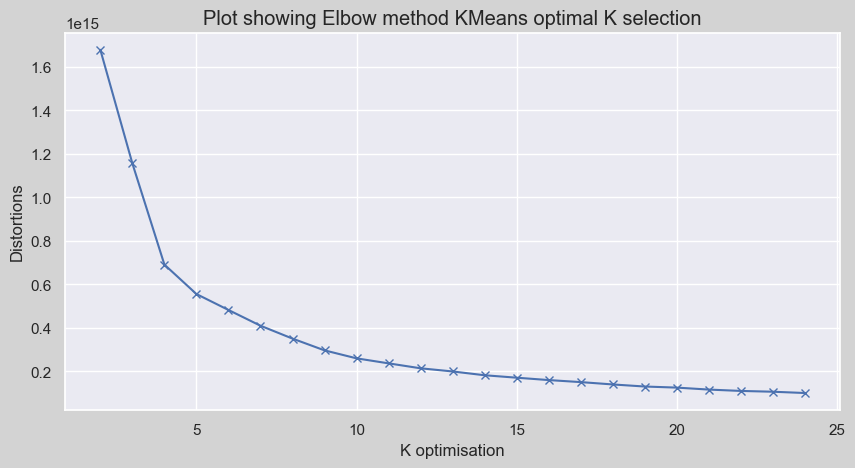

In [215]:
plt.figure(figsize=(10,5), dpi=100, facecolor="lightgrey", edgecolor="pink", frameon=True)
plt.plot(range(2,25), distortions, "bx-")
plt.ylabel("Distortions")
plt.xlabel("K optimisation")
plt.title("Plot showing Elbow method KMeans optimal K selection", horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

In [216]:
distortions

[1678814706733850.8,
 1156506497157446.0,
 691400780969526.2,
 555994660693216.4,
 482705578509039.0,
 410327266951303.5,
 351089833254011.56,
 296974957876630.5,
 260283106550359.22,
 237236928896765.5,
 214540718643598.3,
 199974699180695.06,
 182567676689161.3,
 171311401099963.16,
 160416345282251.22,
 151057275105458.06,
 140295832127637.4,
 130744453908871.4,
 125759454721185.48,
 116709639151223.34,
 110466901225931.38,
 106802342405660.56,
 100905767262109.75]

In [217]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Km_long_lat_df)
labels = kmeans.predict(Km_long_lat_df)

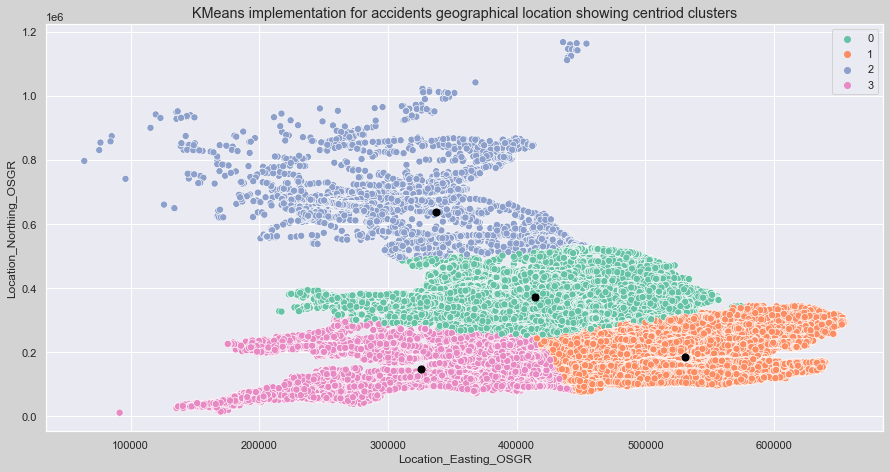

In [218]:
# From the elbow method above k clusters is best at 4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = "k-means++")
kmeans.fit(Km_long_lat_df)
labels_means = kmeans.predict(Km_long_lat_df)
centroids = kmeans.cluster_centers_

fig  = plt.figure(figsize=(15,7.5), facecolor="lightgrey", edgecolor="pink", frameon=True)
colour = map(lambda x: colmap[x+1], labels_means)
sns.scatterplot(Km_long_lat_df["Location_Easting_OSGR"],Km_long_lat_df["Location_Northing_OSGR"], s = 50, hue = labels_means, palette = "Set2", norm=0.2, vmin=0, vmax=1,)
#plt.ylim(0, 1500)
#plt.xlim(0, 1500)
plt.scatter(centroids[:,0],centroids[:,1], color = "black", s = 50)
plt.title("KMeans implementation for accidents geographical location showing centriod clusters", horizontalalignment='center', fontweight='light', fontsize='large')
plt.show()

In [219]:
# Inertia for kmeans clustering of the dataset

kmeans.inertia_

691400715542947.5

### Using Kmeans for Speed limit and weather condition consideration

In [220]:
speed_weather_df = combined_df_2019[["Speed_limit","Weather_Conditions"]]
speed_weather_df

Speed_limit  Weather_Conditions
0                30                   1
1                30                   1
2                30                   1
3                30                   1
4                30                   1
...             ...                 ...
109513           60                   1
109514           60                   1
109515           60                   1
109516           30                   1
109517           60                   1

[109518 rows x 2 columns]

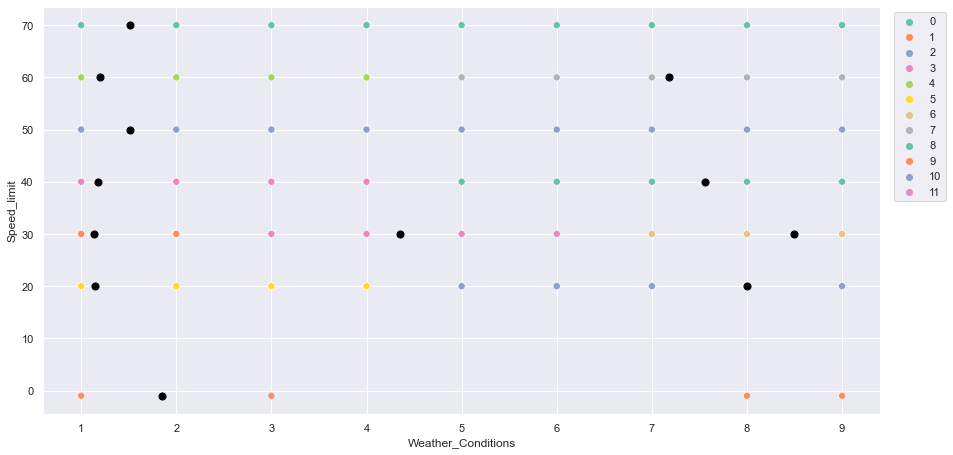

In [221]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 12, init = "k-means++")
kmeans.fit(speed_weather_df)
labels_means = kmeans.predict(speed_weather_df)
centroids = kmeans.cluster_centers_

fig  = plt.figure(figsize=(15,7.5))
colour = map(lambda x: colmap[x+1], labels_means)
sns.scatterplot(speed_weather_df["Weather_Conditions"], speed_weather_df["Speed_limit"], s = 50, hue = labels_means, palette = "Set2",)
#plt.ylim(0, 1500)
#plt.xlim(0, 1500)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.scatter(centroids[:,1],centroids[:,0], color = "black", s = 50)
plt.show()

In [222]:
# Inertia for kmeans clustering of the dataset

kmeans.inertia_

46375.3087386323

### Trying out for accident severity and vehicle type

In [223]:
vehicle_accident_df = combined_df_2019[["Vehicle_Type","Accident_Severity"]]
vehicle_accident_df.isnull().sum()

Vehicle_Type         0
Accident_Severity    0
dtype: int64

In [224]:
# Inertia for kmeans clustering of the dataset

kmeans.inertia_

46375.3087386323

In [225]:
speed_weather_df

Speed_limit  Weather_Conditions
0                30                   1
1                30                   1
2                30                   1
3                30                   1
4                30                   1
...             ...                 ...
109513           60                   1
109514           60                   1
109515           60                   1
109516           30                   1
109517           60                   1

[109518 rows x 2 columns]

In [226]:
#from sklearn_extra.cluster import KMedoids

#kmedoid = KMedoids(n_clusters = 12, random_state  = 2)
#kmedoid.fit(vehicle_accident_df)
#labels_medoid = kmedoid.predict(vehicle_accident_df)
#centroids = kmeans.cluster_centers_

#fig  = plt.figure(figsize=(15,7.5))
#colour = map(lambda x: colmap[x+1], labels_medoid)
#sns.scatterplot( vehicle_accident_df["Accident_Severity"],vehicle_accident_df["Vehicle_Type"], s = 50, hue = labels_medoid, palette = "Set2",)
#plt.ylim(0, 1500)
#plt.xlim(0, 1500)
#plt.legend(bbox_to_anchor=(1.01, 1))
#plt.scatter(centroids[:,1],centroids[:,0], color = "black", s = 50)
#plt.show()

### Analysis for "Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions"]

In [227]:
# Read in the accident database using Pandas. Then type:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#Drop any columns that you have not cleaned up or that still have NaNs within. You can 
# return to imputation at a later date if needed. 
# We will need to specify some targets:
predictors = ["Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions"]

#We will also need to get rid of negative values as these can cause problems. 
usethis = combined_df_2019
usethis.reset_index(drop=True)
usethis = usethis.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions', 'Accident_Severity'], axis=1)
usethisnow = usethis[(usethis['Weather_Conditions']>0) & (usethis['Speed_limit']>0) & (usethis['Road_Surface_Conditions']>0) & (usethis['Light_Conditions']>0)]
usethisnow



Weather_Conditions  Speed_limit  Road_Surface_Conditions  \
0                        1           30                        1   
1                        1           30                        1   
2                        1           30                        1   
3                        1           30                        1   
4                        1           30                        1   
...                    ...          ...                      ...   
109513                   1           60                        2   
109514                   1           60                        2   
109515                   1           60                        1   
109516                   1           30                        1   
109517                   1           60                        1   

        Light_Conditions  Accident_Severity  
0                      1                  3  
1                      1                  3  
2                      1                  3  
3                      4                  3  
4                      4                  3  
...                  ...                ...  
109513                 1                  3  
109514                 1                  3  
109515                 1                  3  
109516                 1                  3  
109517                 1                  2  

[108453 rows x 5 columns]

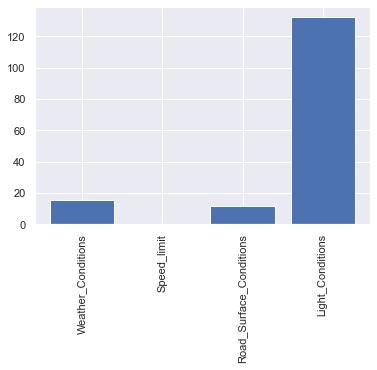

In [228]:
# Now let’s see what the top N conditions are for our target variable (i.e., accident severity).
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [229]:
#First we need to do the usual data hygiene approach of splitting our data into test and train. 
#from sklearn.model_selection import train_test_split
#y_target = usethisnow["Accident_Severity"].values
#Xfeatures = usethisnow.drop("Accident_Severity", axis=1)
#X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)

In [230]:
# Building a decision tree model now. 
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(criterion="gini") 
#decision_tree.fit(X_train, y_train)  
#Y_pred = decision_tree.predict(X_validation)

# This next line computes the accuracy of the model.
#acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
#acc_decision_tree

In [231]:
# We can also get the probabilities of our models. 
#decision_tree.predict_proba(X_validation)

### Analysis for "Road_Type", "Age_of_Vehicle", "Sex_of_Driver", "Light_Conditions"

In [232]:
# Read in the accident database using Pandas. Then type:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#Drop any columns that you have not cleaned up or that still have NaNs within. You can 
# return to imputation at a later date if needed. 
# We will need to specify some targets:
predictors = ["Road_Type", "Age_of_Vehicle", "Sex_of_Driver", "Light_Conditions"]

#We will also need to get rid of negative values as these can cause problems. 
usethis = combined_df_2019
usethis.reset_index(drop=True)
usethis = usethis.filter(['Road_Type','Age_of_Vehicle','Sex_of_Driver', 'Light_Conditions', 'Accident_Severity'], axis=1)
usethisnow = usethis[(usethis['Road_Type']>0) & (usethis['Age_of_Vehicle']>0) & (usethis['Sex_of_Driver']>0) & (usethis['Light_Conditions']>0)]
usethisnow


Road_Type  Age_of_Vehicle  Sex_of_Driver  Light_Conditions  \
17              6               4              2                 4   
20              3               4              1                 6   
22              3               4              3                 4   
74              6               1              1                 1   
131             6               1              1                 1   
...           ...             ...            ...               ...   
109513          6              14              1                 1   
109514          6               1              1                 1   
109515          6               5              1                 1   
109516          6               6              1                 1   
109517          6              20              1                 1   

        Accident_Severity  
17                      3  
20                      1  
22                      2  
74                      3  
131                     2  
...                   ...  
109513                  3  
109514                  3  
109515                  3  
109516                  3  
109517                  2  

[77667 rows x 5 columns]

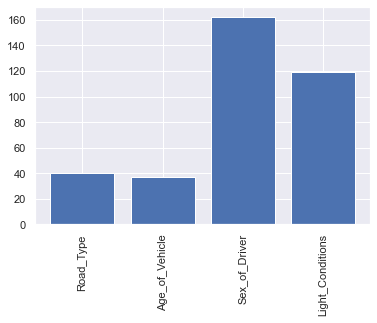

In [233]:
# Now let’s see what the top N conditions are for our target variable (i.e., accident severity).
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

### Analysis for "Age_of_Casualty", "Engine_Capacity_(CC)", "Road_Surface_Conditions", "Number_of_Vehicles"

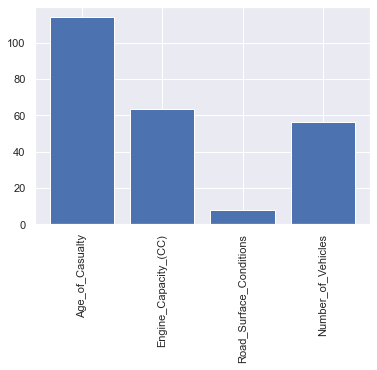

In [234]:
# Read in the accident database using Pandas. Then type:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#Drop any columns that you have not cleaned up or that still have NaNs within. You can 
# return to imputation at a later date if needed. 
# We will need to specify some targets:
predictors = ["Age_of_Casualty", "Engine_Capacity_(CC)", "Road_Surface_Conditions", "Number_of_Vehicles"]

#We will also need to get rid of negative values as these can cause problems. 
usethis = combined_df_2019
usethis.reset_index(drop=True)
usethis = usethis.filter(['Age_of_Casualty','Engine_Capacity_(CC)','Road_Surface_Conditions', 'Number_of_Vehicles', 'Accident_Severity'], axis=1)
usethisnow = usethis[(usethis['Age_of_Casualty']>0) & (usethis['Engine_Capacity_(CC)']>0) & (usethis['Road_Surface_Conditions']>0) & (usethis['Number_of_Vehicles']>0)]
usethisnow


# Now let’s see what the top N conditions are for our target variable (i.e., accident severity).
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

### Analysis for "Age_of_Vehicle", "Age_of_Driver", "Skidding_and_Overturning", "Pedestrian_Movement"

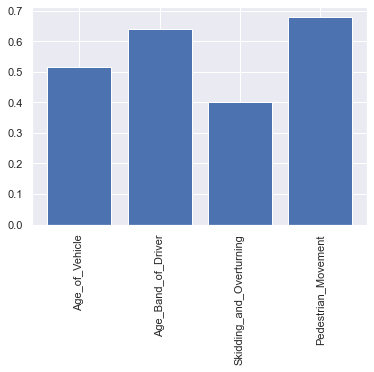

In [235]:
# Read in the accident database using Pandas. Then type:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#Drop any columns that you have not cleaned up or that still have NaNs within. You can 
# return to imputation at a later date if needed. 
# We will need to specify some targets:
predictors = ["Age_of_Vehicle", "Age_Band_of_Driver", "Skidding_and_Overturning", "Pedestrian_Movement"]

#We will also need to get rid of negative values as these can cause problems. 
usethis = combined_df_2019
usethis.reset_index(drop=True)
usethis = usethis.filter(['Age_of_Vehicle','Age_Band_of_Driver','Skidding_and_Overturning', 'Pedestrian_Movement', 'Accident_Severity'], axis=1)
usethisnow = usethis[(usethis['Age_of_Vehicle']>0) & (usethis['Age_Band_of_Driver']>0) & (usethis['Skidding_and_Overturning']>0) & (usethis['Pedestrian_Movement']>0)]
usethisnow


# Now let’s see what the top N conditions are for our target variable (i.e., accident severity).
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

### Investigating into various features and how they fair through visualisation

#### Weather Related

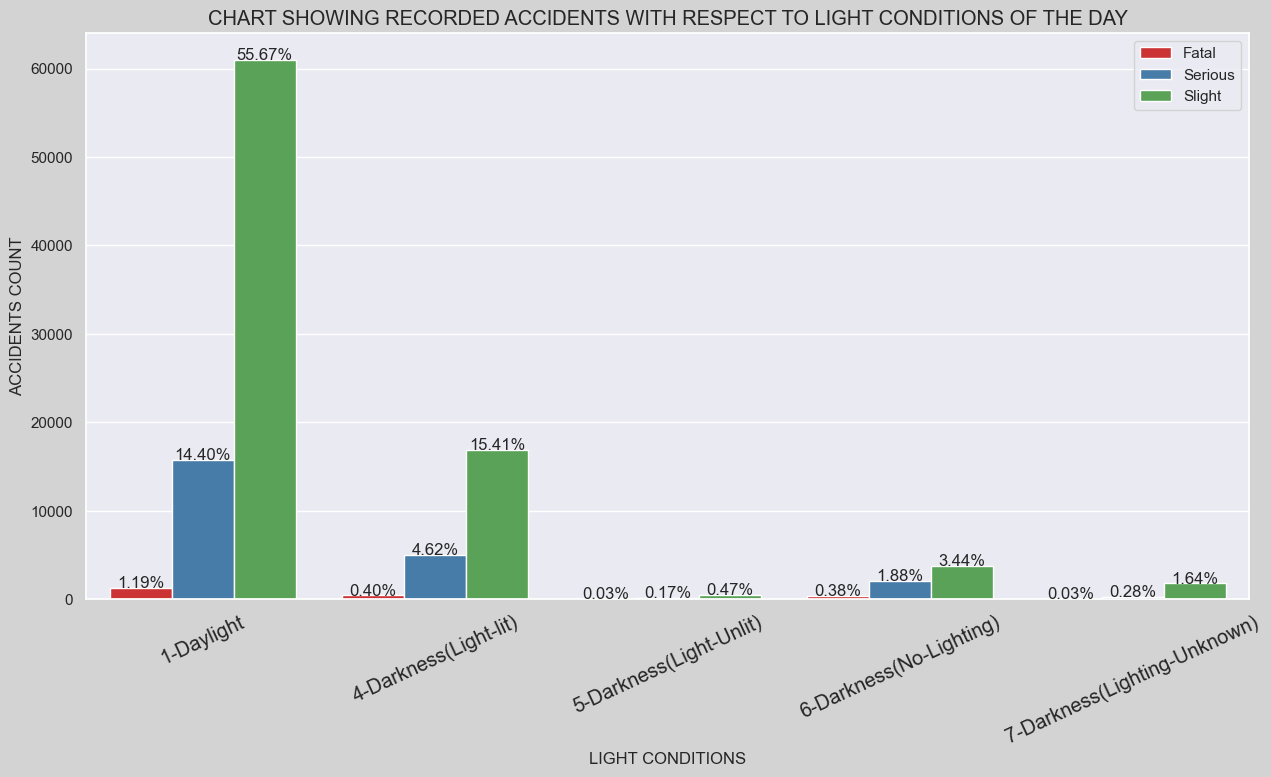

In [236]:
# visualing the Light condition to Accident severity

light_condition_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
light_condition_chart = sns.countplot(data = combined_df_2019[lambda x:x["Light_Conditions"] > -1], x= "Light_Conditions", hue="Accident_Severity", palette="Set1")
light_condition_chart.set(xlabel='LIGHT CONDITIONS', ylabel='ACCIDENTS COUNT')
plt.title('CHART SHOWING RECORDED ACCIDENTS WITH RESPECT TO LIGHT CONDITIONS OF THE DAY', horizontalalignment='center', fontweight='light', fontsize='large')
light_condition_chart.set_xticklabels(["1-Daylight", "4-Darkness(Light-lit)", "5-Darkness(Light-Unlit)", "6-Darkness(No-Lighting)", "7-Darkness(Lighting-Unknown)"], rotation=25, horizontalalignment='center',fontweight='light', fontsize='large')
plt.legend(["Fatal", "Serious", "Slight"])
for p in light_condition_chart.patches:
    height = p.get_height()
    light_condition_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()

# The light condition has no major role for accident severity as the major situation is when there is day light

1    79.63
2    12.57
9     2.44
8     2.35
5     1.22
4     1.10
7     0.33
3     0.32
6     0.04
Name: Weather_Conditions, dtype: float64


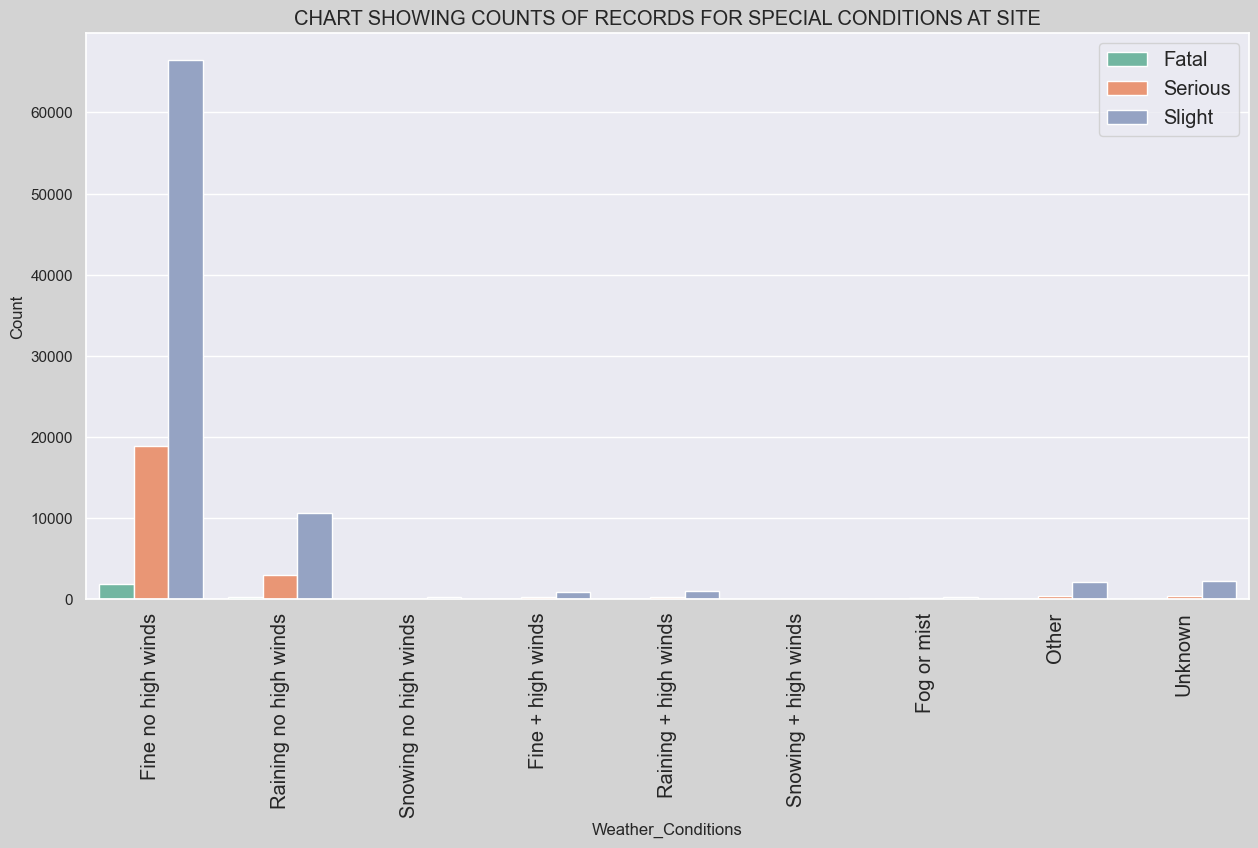

In [237]:
print(round(combined_df_2019["Weather_Conditions"].value_counts(normalize=True),4)*100)

# visualing the Weather condition to Accident severity
wea_cont_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
wea__cont_chart = sns.countplot(data = combined_df_2019[lambda x:x["Weather_Conditions"] > -1],x = "Weather_Conditions", palette = "Set2", hue="Accident_Severity" )
wea__cont_chart.set(xlabel='Weather_Conditions', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR SPECIAL CONDITIONS AT SITE', horizontalalignment='center', fontweight='light', fontsize='large')
wea__cont_chart.set_xticklabels(['Fine no high winds','Raining no high winds','Snowing no high winds','Fine + high winds','Raining + high winds','Snowing + high winds','Fog or mist','Other','Unknown'], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

#### casualty Related

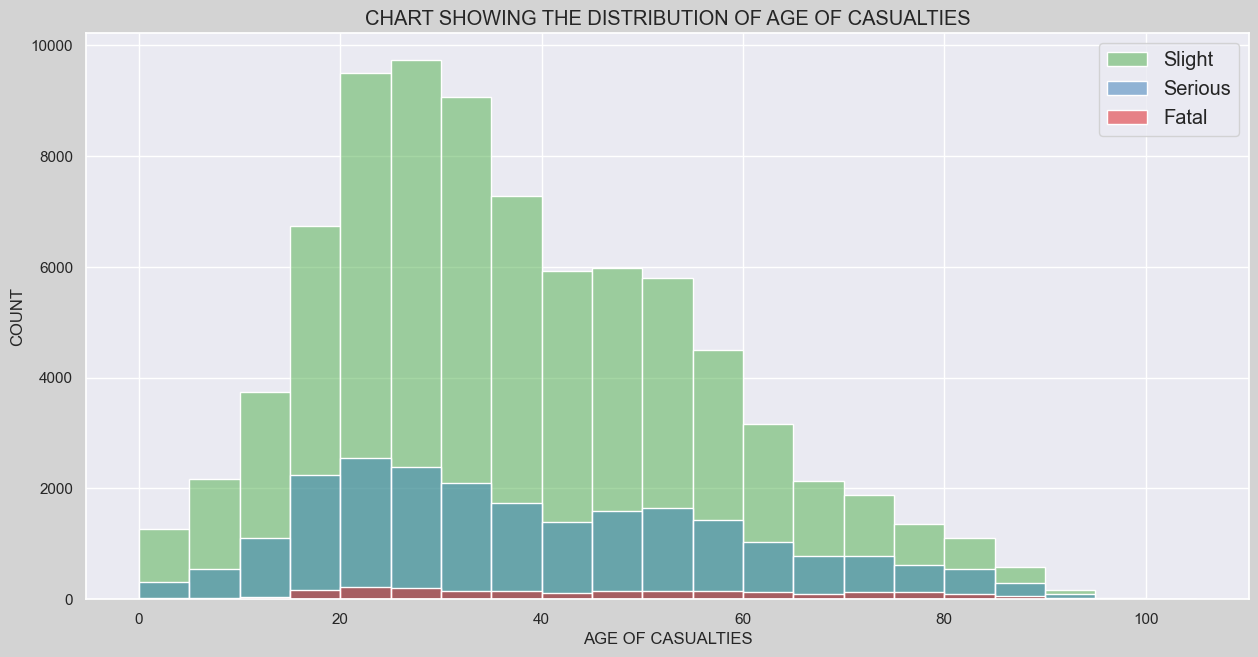

Age_of_Casualty
30             2.62
25             2.42
18             2.42
20             2.40
28             2.33
19             2.27
24             2.27
22             2.26
23             2.26
27             2.26
26             2.23
21             2.22
29             2.21
31             2.07
32             2.02
35             1.92
33             1.92
34             1.87
17             1.82
36             1.72
37             1.68
39             1.63
38             1.57
50             1.55
40             1.53
48             1.52
47             1.44
49             1.43
45             1.43
52             1.43
53             1.40
46             1.36
42             1.36
41             1.36
44             1.36
54             1.35
51             1.34
43             1.32
55             1.26
56             1.15
57             1.14
16             1.13
58             1.12
12             1.04
11             1.03
59             0.98
60             0.93
13             0.93
15             0.88
14             0.87

In [238]:
# visualing the Age of Casualty to Accident severity

age_casualty_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
age_casualty_chart = sns.histplot(data = combined_df_2019[lambda x:x["Age_of_Casualty"] > -1], x= "Age_of_Casualty", hue="Accident_Severity", binwidth=5, palette="Set1")
age_casualty_chart.set(xlabel='AGE OF CASUALTIES', ylabel='COUNT')
plt.title('CHART SHOWING THE DISTRIBUTION OF AGE OF CASUALTIES', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Slight","Serious", "Fatal"], fontsize='large')
plt.show()

# Visualising value count for Age of casualties

age_casualty_val_count = round(combined_df_2019[lambda x:x["Age_of_Casualty"] > -1]["Age_of_Casualty"].value_counts(sort=True, ascending=False, normalize=True),4)*100
age_casualty_val_count = pd.DataFrame(age_casualty_val_count)
age_casualty_val_count.head(50)

#### Driver Related

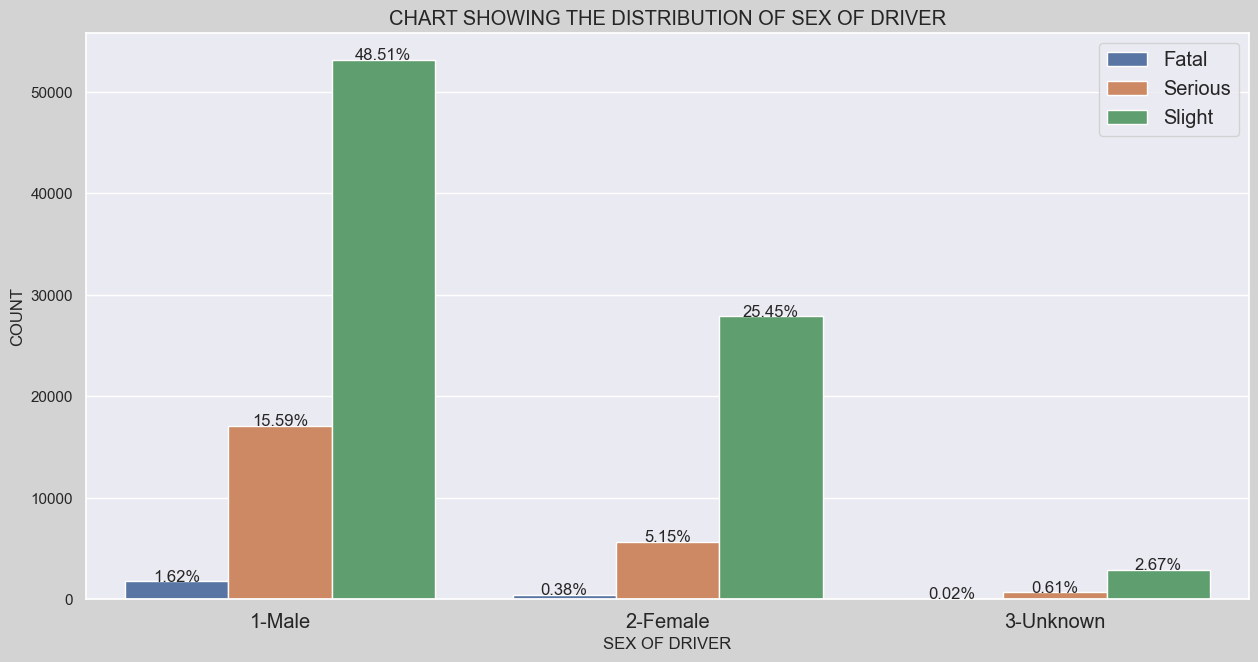

In [239]:
# visualing the Sex of Driver to Accident severity

sex_of_driver_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sex_of_driver_chart = sns.countplot(data = combined_df_2019[lambda x:x["Sex_of_Driver"] > -1], x= "Sex_of_Driver", hue="Accident_Severity")
sex_of_driver_chart.set(xlabel='SEX OF DRIVER', ylabel='COUNT')
plt.title('CHART SHOWING THE DISTRIBUTION OF SEX OF DRIVER', horizontalalignment='center', fontweight='light', fontsize='large')
sex_of_driver_chart.set_xticklabels(["1-Male", "2-Female", "3-Unknown"], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["Male", "Female", "Unknown"])
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
for p in sex_of_driver_chart.patches:
    height = p.get_height()
    sex_of_driver_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()


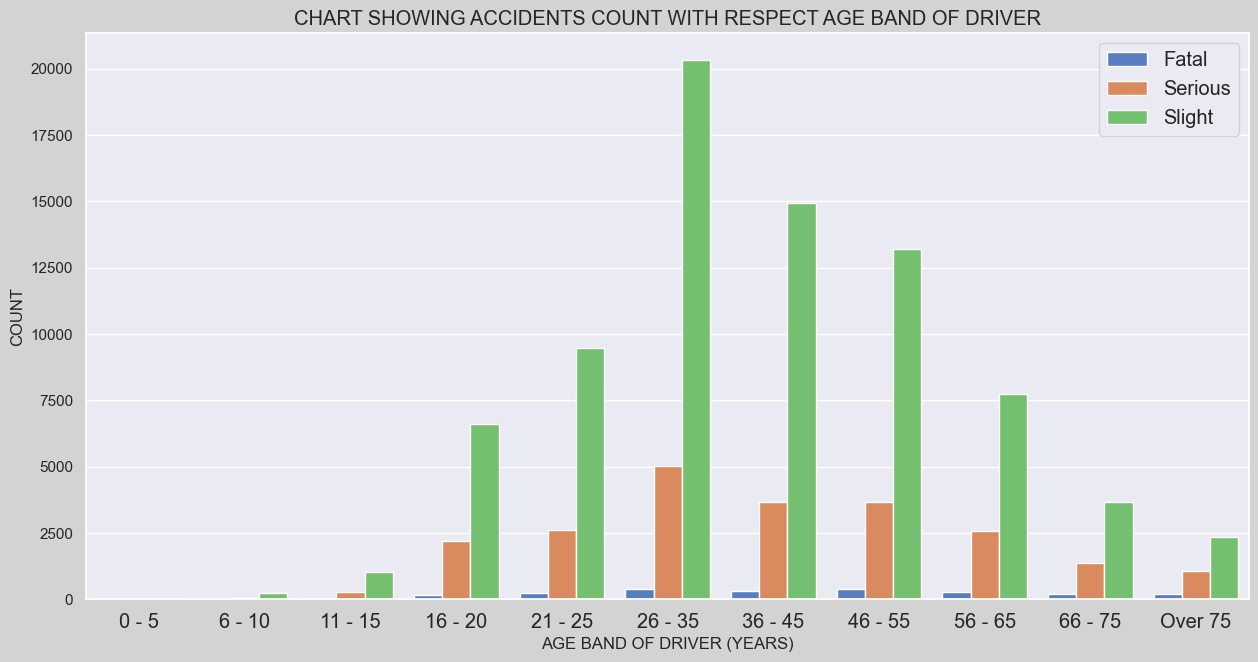

In [240]:
# visualing the Age Band of Driver to Accident severity

driver_age_band_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
driver_age_band_chart = sns.countplot(data = combined_df_2019[lambda x:x["Age_Band_of_Driver"] > -1], x= "Age_Band_of_Driver", hue="Accident_Severity", palette="muted")
driver_age_band_chart.set(xlabel='AGE BAND OF DRIVER (YEARS)', ylabel='COUNT')
plt.title('CHART SHOWING ACCIDENTS COUNT WITH RESPECT AGE BAND OF DRIVER', horizontalalignment='center', fontweight='light', fontsize='large')
driver_age_band_chart.set_xticklabels(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], rotation=0, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

In [241]:
age_band_of_driver_val_count = combined_df_2019[lambda x:x["Age_Band_of_Driver"] > -1]["Age_Band_of_Driver"].value_counts(sort=True, ascending=False, normalize=True)
age_band_label = ["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"]
age_band_of_driver_val_count = pd.DataFrame([age_band_label, round((age_band_of_driver_val_count *100),2)], index=["Age Band of Driver", " Percentage Involved (%)"])
age_band_of_driver_val_count.head(50)

0       1        2        3        4        5   \
Age Band of Driver        0 - 5  6 - 10  11 - 15  16 - 20  21 - 25  26 - 35   
 Percentage Involved (%)  24.72   18.13    16.52    11.78    10.17     8.62   

                               6        7        8        9        10  
Age Band of Driver        36 - 45  46 - 55  56 - 65  66 - 75  Over 75  
 Percentage Involved (%)     5.03     3.43     1.28     0.27     0.03

#### Vehicle Related

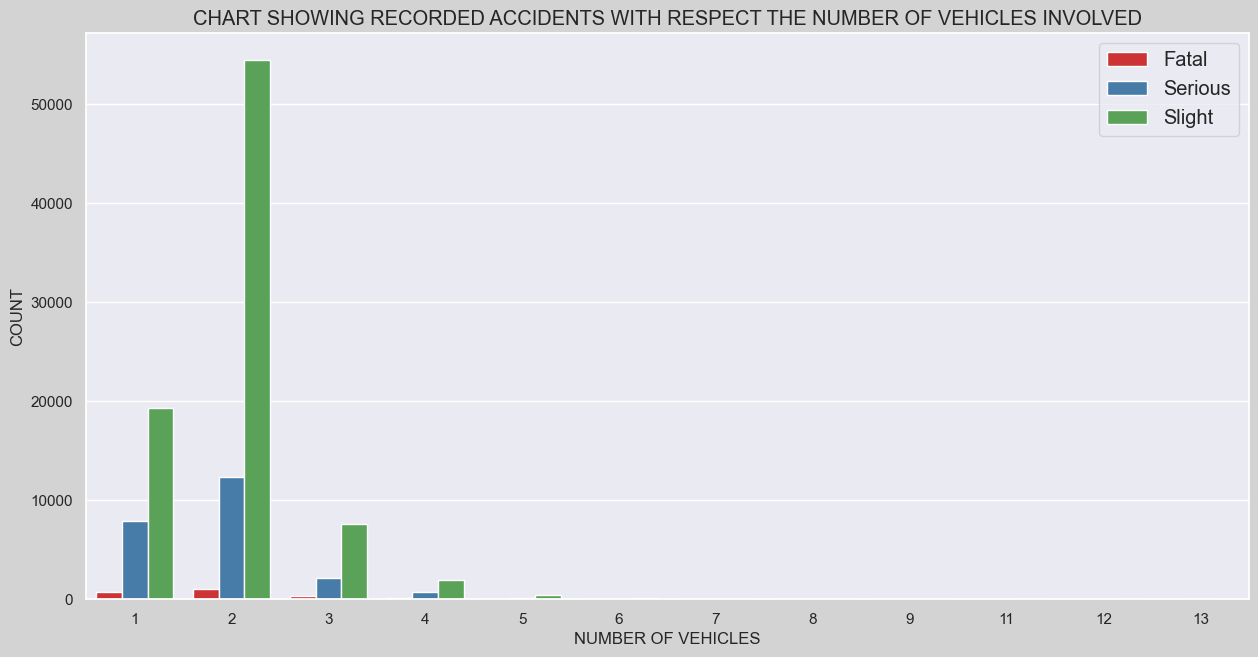

In [242]:
# visualing the number of vehicles to Accident severity

num_of_vehi_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
num_of_vehi_chart = sns.countplot(data = combined_df_2019[lambda x:x["Number_of_Vehicles"] > -1], x= "Number_of_Vehicles", hue="Accident_Severity", palette="Set1")
num_of_vehi_chart.set(xlabel='NUMBER OF VEHICLES', ylabel='COUNT')
plt.title('CHART SHOWING RECORDED ACCIDENTS WITH RESPECT THE NUMBER OF VEHICLES INVOLVED', horizontalalignment='center', fontweight='light', fontsize='large')
plt.legend(["Fatal","Serious", "Slight"], fontsize='large', loc=1)
plt.show()

In [243]:
num_of_vehi_val_count = combined_df_2019[lambda x:x["Number_of_Vehicles"] > -1]["Number_of_Vehicles"].value_counts(sort=False, ascending=False, normalize=True)
num_of_vehi_val_count = pd.DataFrame([round((num_of_vehi_val_count *100),2)], index=[" Percentage Involved (%)"])
num_of_vehi_val_count.head(13)

2      1     3     4     7     6     5     8   \
 Percentage Involved (%)  61.93  25.47  9.19  2.47  0.09  0.19  0.59  0.04   

                            9     11   12   13  
 Percentage Involved (%)  0.02  0.01  0.0  0.0

 0    88894
 1     8451
-1     5242
 5     3934
 2     2966
 4       18
 3       13
Name: Skidding_and_Overturning, dtype: int64


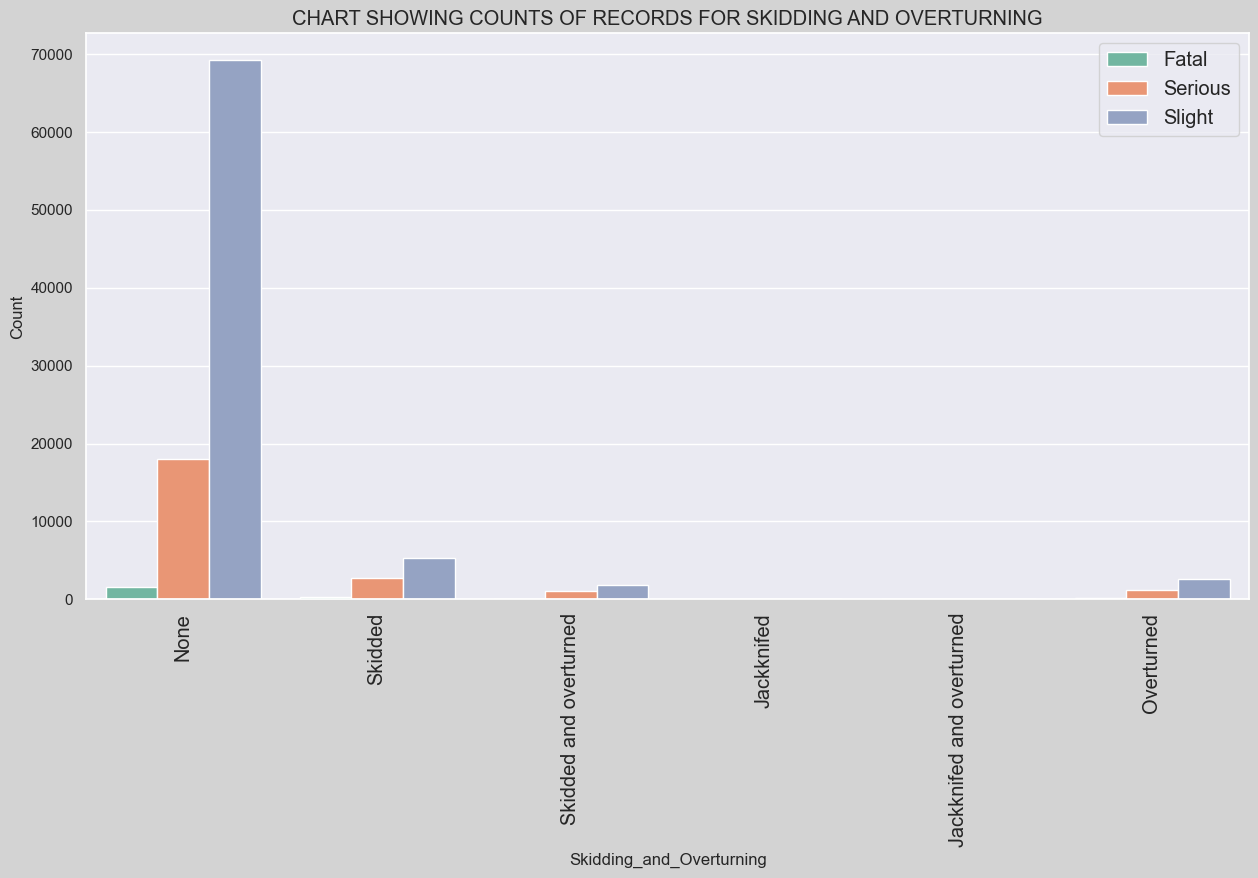

In [244]:
print(combined_df_2019["Skidding_and_Overturning"].value_counts())

# Visualising skiding and over turning data
sko_cont_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
sko_cont_chart = sns.countplot(data = combined_df_2019[lambda x:x["Skidding_and_Overturning"] > -1],x = "Skidding_and_Overturning", palette = "Set2", hue="Accident_Severity" )
sko_cont_chart.set(xlabel='Skidding_and_Overturning', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR SKIDDING AND OVERTURNING', horizontalalignment='center', fontweight='light', fontsize='large')
sko_cont_chart.set_xticklabels(['None','Skidded','Skidded and overturned','Jackknifed','Jackknifed and overturned','Overturned'], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

 9     73710
 1     12668
 3      5306
 19     3788
 5      3780
 11     2922
 8      2590
 4      1473
 2       971
 21      555
 90      467
 10      264
 97      232
 20      229
 22      180
 98      155
 17       85
 16       48
-1        39
 23       38
 18       18
Name: Vehicle_Type, dtype: int64


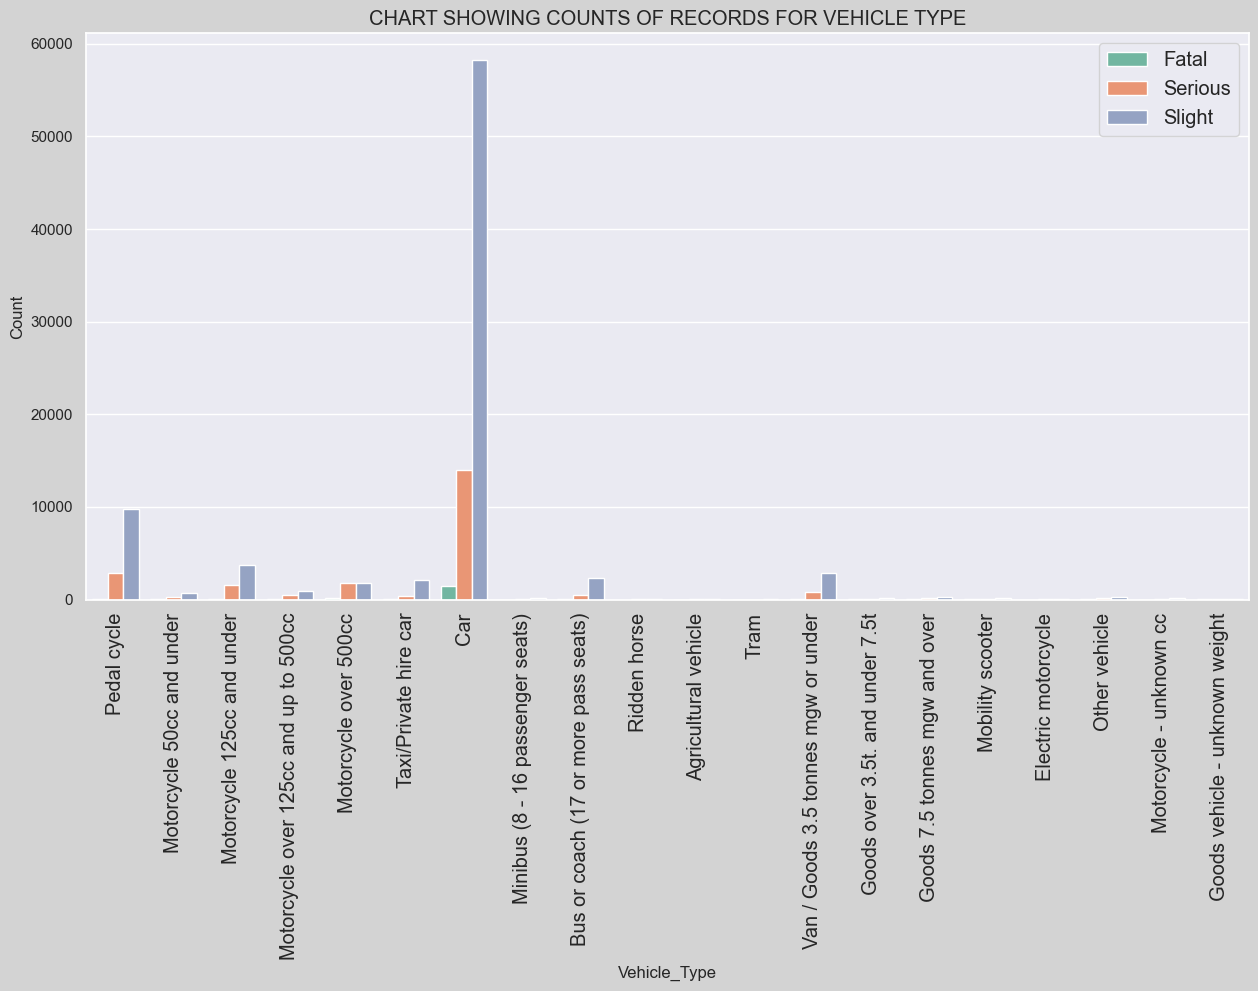

In [245]:
print(combined_df_2019["Vehicle_Type"].value_counts())


# Visualising Vehicle type data
vehi_type_cont_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
vehi_type_cont_chart = sns.countplot(data = combined_df_2019[lambda x:x["Vehicle_Type"] > -1],x = "Vehicle_Type", palette = "Set2", hue="Accident_Severity" )
vehi_type_cont_chart.set(xlabel='Vehicle_Type', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR VEHICLE TYPE', horizontalalignment='center', fontweight='light', fontsize='large')
vehi_type_cont_chart.set_xticklabels(['Pedal cycle','Motorcycle 50cc and under','Motorcycle 125cc and under','Motorcycle over 125cc and up to 500cc','Motorcycle over 500cc','Taxi/Private hire car','Car','Minibus (8 - 16 passenger seats)','Bus or coach (17 or more pass seats)','Ridden horse','Agricultural vehicle','Tram','Van / Goods 3.5 tonnes mgw or under','Goods over 3.5t. and under 7.5t','Goods 7.5 tonnes mgw and over','Mobility scooter','Electric motorcycle','Other vehicle','Motorcycle - unknown cc','Goods vehicle - unknown weight'], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

In [246]:
#print(combined_df_2019["Vehicle_Type"].value_counts().rank(pct=True))
vehicle_count_percent = (combined_df_2019["Vehicle_Type"].value_counts(sort=True, ascending=False, normalize=True))*100
print(round(vehicle_count_percent, 2))

 9     67.30
 1     11.57
 3      4.84
 19     3.46
 5      3.45
 11     2.67
 8      2.36
 4      1.34
 2      0.89
 21     0.51
 90     0.43
 10     0.24
 97     0.21
 20     0.21
 22     0.16
 98     0.14
 17     0.08
 16     0.04
-1      0.04
 23     0.03
 18     0.02
Name: Vehicle_Type, dtype: float64


 18    58505
 9      7665
 4      6503
 3      6265
-1      5121
 17     4505
 5      4215
 16     3866
 7      2564
 13     1852
 2      1431
 10     1424
 1      1402
 14     1258
 15      764
 12      622
 8       585
 11      518
 6       453
Name: Vehicle_Manoeuvre, dtype: int64


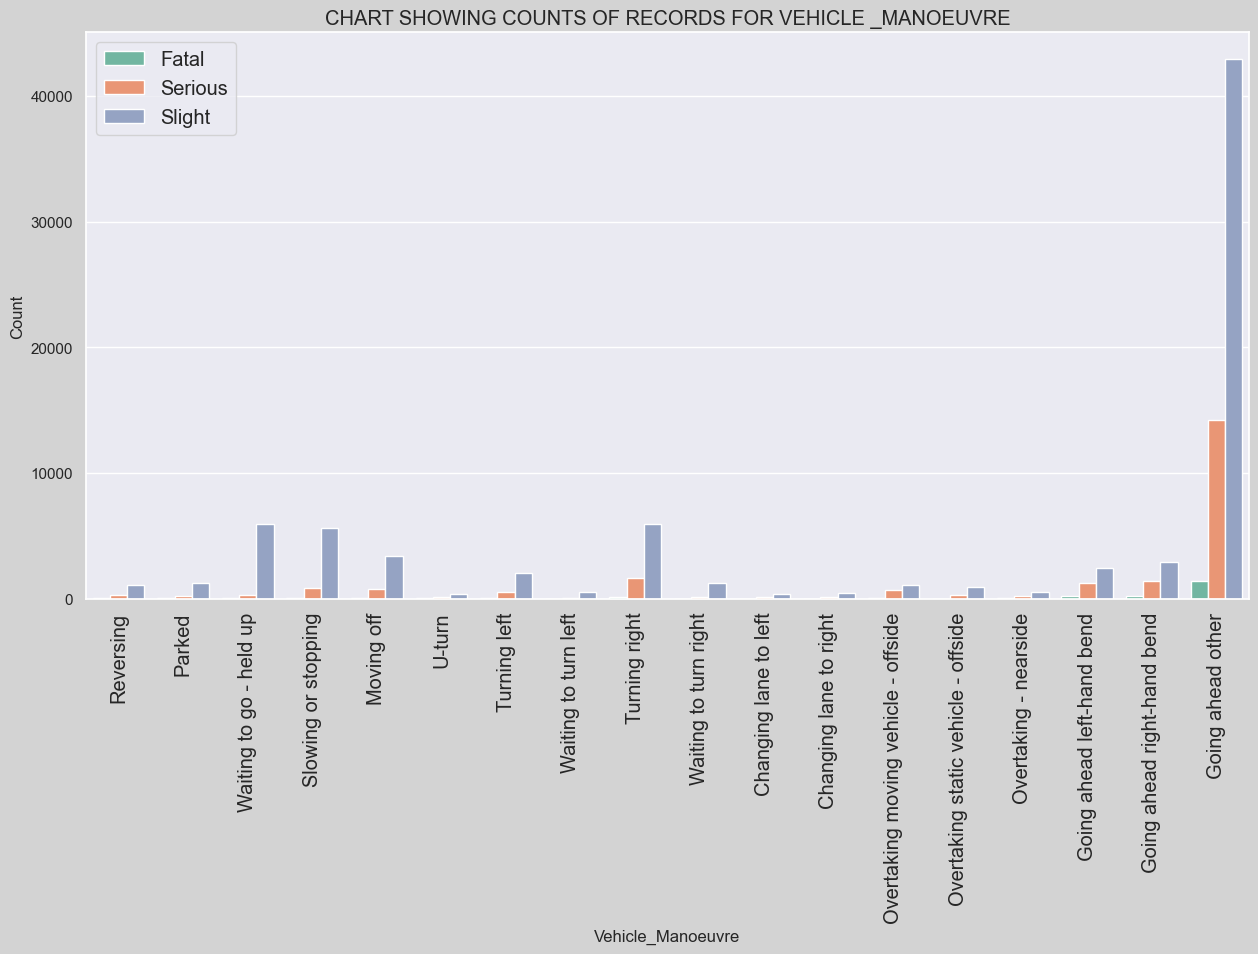

In [247]:
print(combined_df_2019["Vehicle_Manoeuvre"].value_counts())


# Visualising vehicle manoeuvre
vehi_mano_cont_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
vehi_mano_cont_chart = sns.countplot(data = combined_df_2019[lambda x:x["Vehicle_Manoeuvre"] > -1],x = "Vehicle_Manoeuvre", palette = "Set2", hue="Accident_Severity" )
vehi_mano_cont_chart.set(xlabel='Vehicle_Manoeuvre', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR VEHICLE _MANOEUVRE', horizontalalignment='center', fontweight='light', fontsize='large')
vehi_mano_cont_chart.set_xticklabels(["Reversing","Parked","Waiting to go - held up","Slowing or stopping","Moving off","U-turn","Turning left","Waiting to turn left","Turning right","Waiting to turn right","Changing lane to left","Changing lane to right","Overtaking moving vehicle - offside","Overtaking static vehicle - offside","Overtaking - nearside","Going ahead left-hand bend","Going ahead right-hand bend","Going ahead other"], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

In [248]:
vehi_manoe_val_count = combined_df_2019[lambda x:x["Vehicle_Manoeuvre"] > -1]["Vehicle_Manoeuvre"].value_counts(sort=True, ascending=False, normalize=True)
vehi_manoe_val_count = pd.DataFrame([round((vehi_manoe_val_count *100),2)], index=[" Percentage Involved (%)"])
vehi_manoe_val_count.head(13)

18    9     4    3     17    5    16    7     13  \
 Percentage Involved (%)  56.04  7.34  6.23  6.0  4.32  4.04  3.7  2.46  1.77   

                            2     10    1     14    15   12    8    11    6   
 Percentage Involved (%)  1.37  1.36  1.34  1.21  0.73  0.6  0.56  0.5  0.43

-1     31850
 3      6064
 4      5940
 1      5890
 2      5585
       ...  
 72        1
 47        1
 56        1
 80        1
 45        1
Name: Age_of_Vehicle, Length: 68, dtype: int64


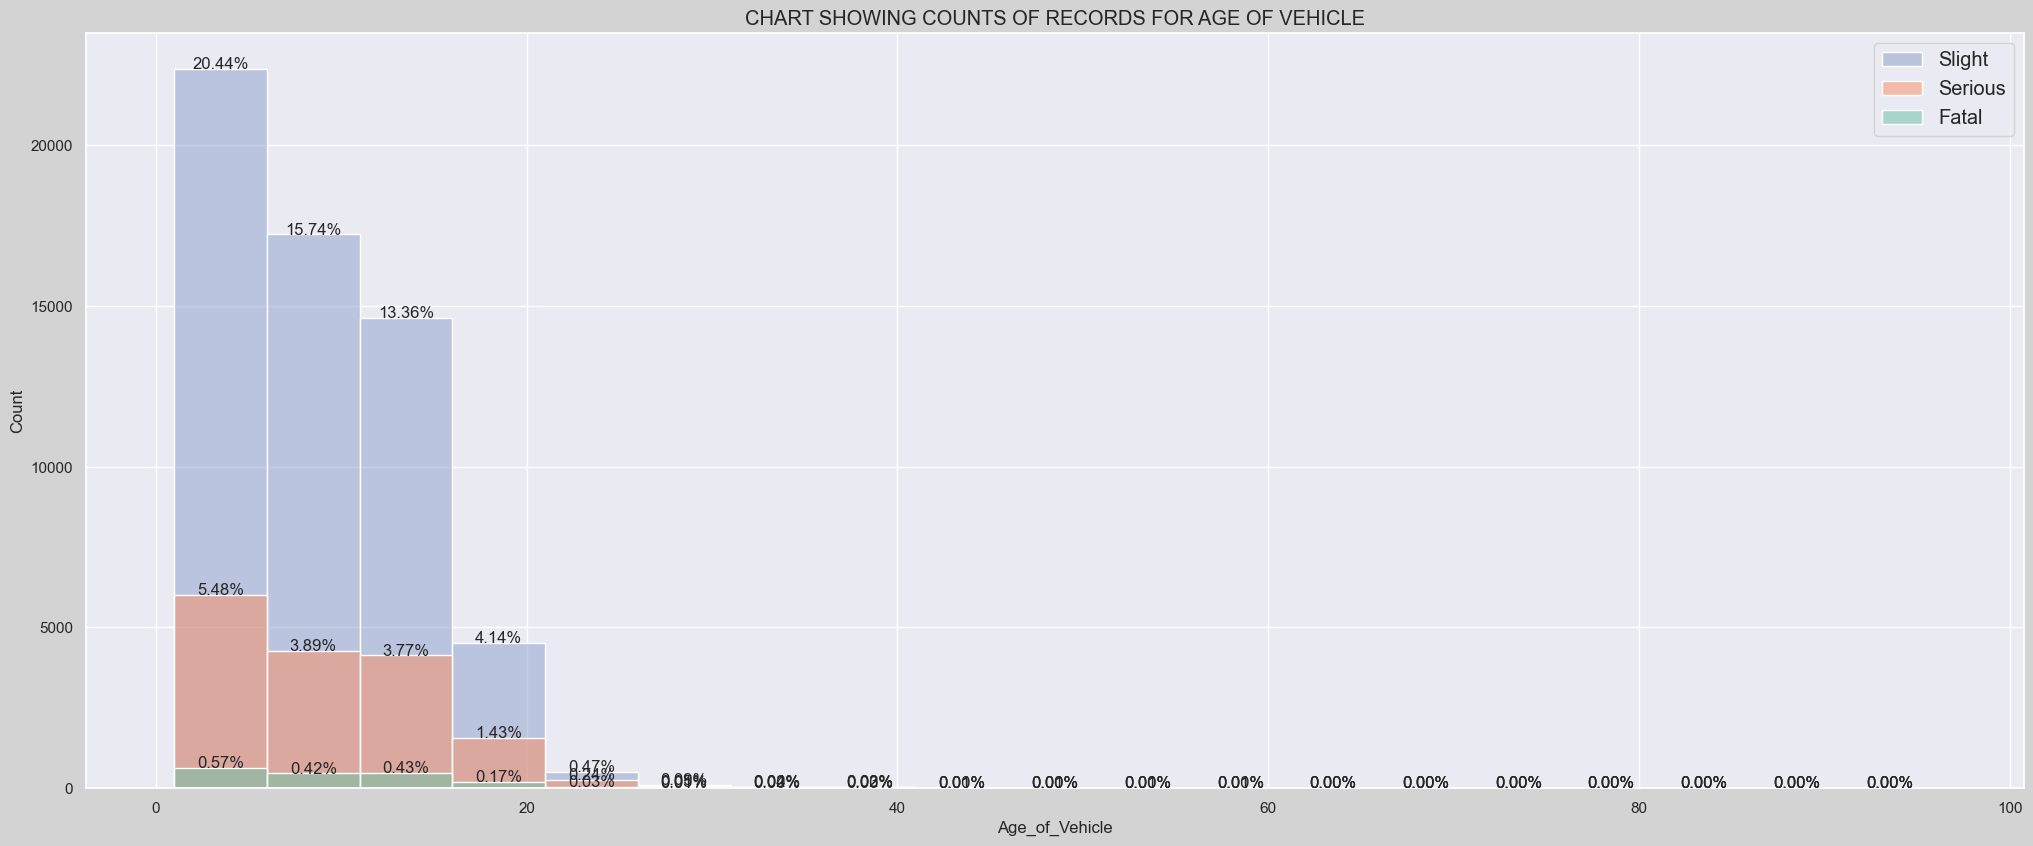

In [249]:
print(combined_df_2019["Age_of_Vehicle"].value_counts())


# Visaulising age of vehicle
vehi_age_cont_histplot = plt.figure(figsize=(25,10), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
vehi_age_cont_chart = sns.histplot(data = combined_df_2019[lambda x:x["Age_of_Vehicle"] > -1],x = "Age_of_Vehicle", palette = "Set2", hue="Accident_Severity", binwidth=5 )
vehi_age_cont_chart.set(xlabel='Age_of_Vehicle', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR AGE OF VEHICLE', horizontalalignment='center', fontweight='light', fontsize='large')
#vehi_age_cont_chart.set_xticklabels(["Reversing","Parked","Waiting to go - held up","Slowing or stopping","Moving off","U-turn","Turning left","Waiting to turn left","Turning right","Waiting to turn right","Changing lane to left","Changing lane to right","Overtaking moving vehicle - offside","Overtaking static vehicle - offside","Overtaking - nearside","Going ahead left-hand bend","Going ahead right-hand bend","Going ahead other"], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Slight","Serious", "Fatal"], fontsize='large')
for p in vehi_age_cont_chart.patches:
    height = p.get_height()
    vehi_age_cont_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()

In [250]:
combined_df_2019["Engine_Capacity_(CC)"].value_counts()

-1        28433
 1598      6139
 998       3492
 1968      3292
 1995      2868
          ...  
 4400         1
 1832         1
 496          1
 2994         1
 11021        1
Name: Engine_Capacity_(CC), Length: 826, dtype: int64

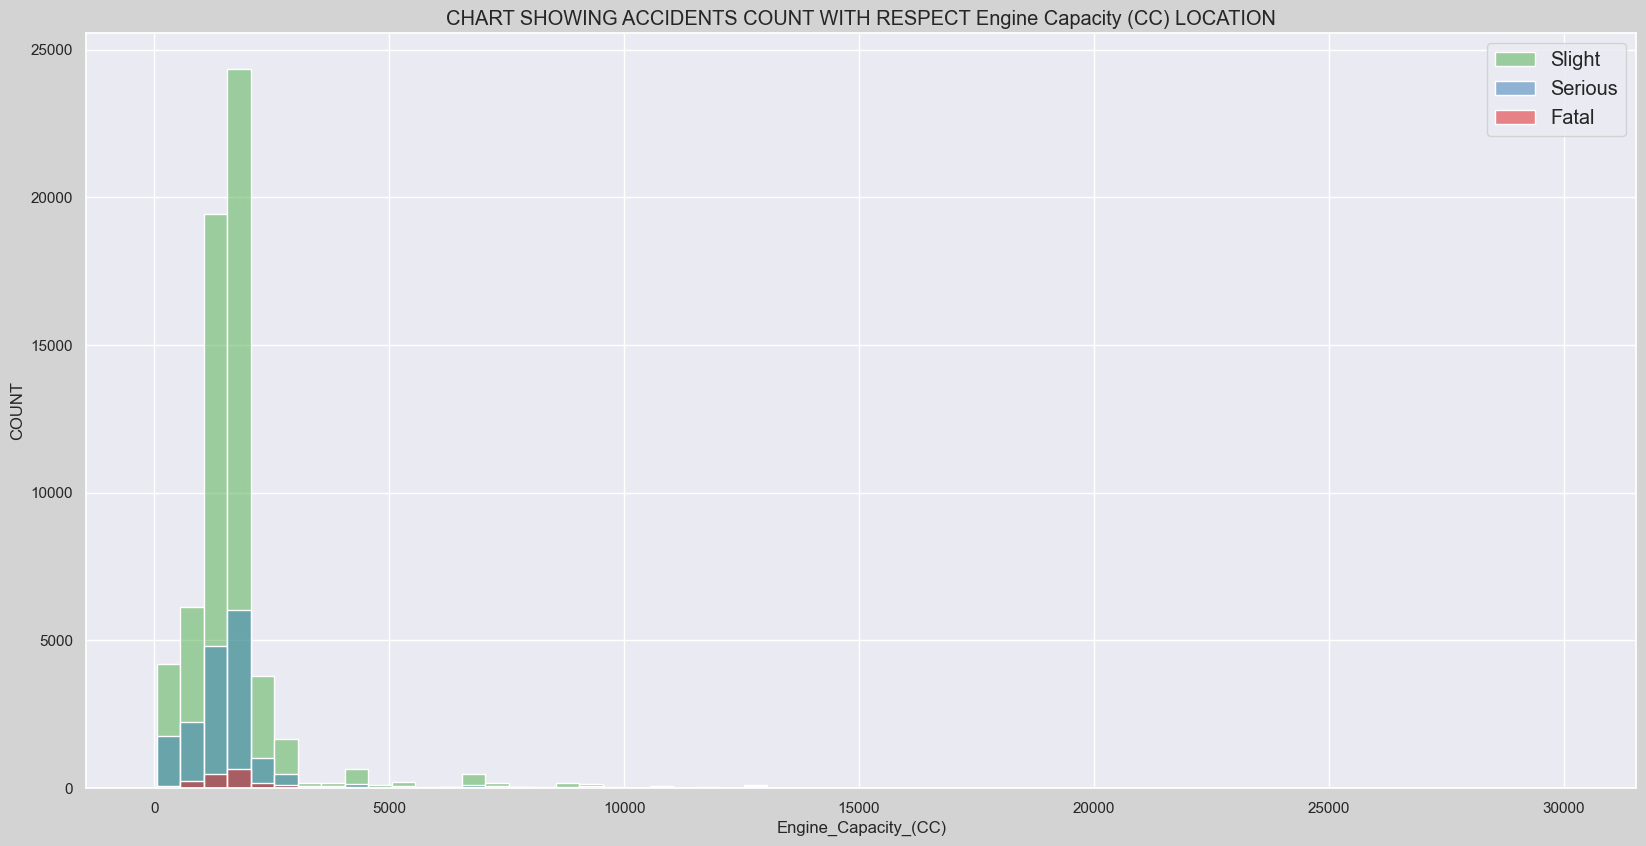

In [251]:
# visualing the Engine Capacity (CC) to Accident severity

pedestrain_loc_histplot = plt.figure(figsize=(20,10), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
pedestrain_loc_chart = sns.histplot(data = combined_df_2019[lambda x:x["Engine_Capacity_(CC)"] > -1], x= "Engine_Capacity_(CC)", binwidth=500, hue="Accident_Severity", palette="Set1")
pedestrain_loc_chart.set(xlabel='Engine_Capacity_(CC)', ylabel='COUNT')
plt.title('CHART SHOWING ACCIDENTS COUNT WITH RESPECT Engine Capacity (CC) LOCATION', horizontalalignment='center', fontweight='light', fontsize='large')
#pedestrain_loc_chart.set_xticklabels(pedestrain_loc_chart.get_xticklabels(),rotation=45, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0-Not a Pedestrian","1-Crossing on pedestrian crossing facility","2-Crossing in zig-zag approach lines","3-Crossing in zig-zag exit lines","4-Crossing elsewhere within 50m. of pedestrian crossing","5-In carriageway, crossing elsewhere","6-On footway or verge","7-On refuge, central island or central reservation","8-In centre of carriageway - not on refuge, island or central reservation","9-In carriageway, not crossing","10-Unknown or other"], bbox_to_anchor=(1.01, 1))
plt.legend(["Slight","Serious", "Fatal"], fontsize='large')
plt.show()

#### Pedestrian Related

In [252]:
combined_df_2019["Pedestrian_Location"].value_counts()

 0     93582
 5      6744
 1      2583
 6      1633
 9      1524
 10     1353
 4      1149
 8       767
 7       108
 2        46
 3        28
-1         1
Name: Pedestrian_Location, dtype: int64

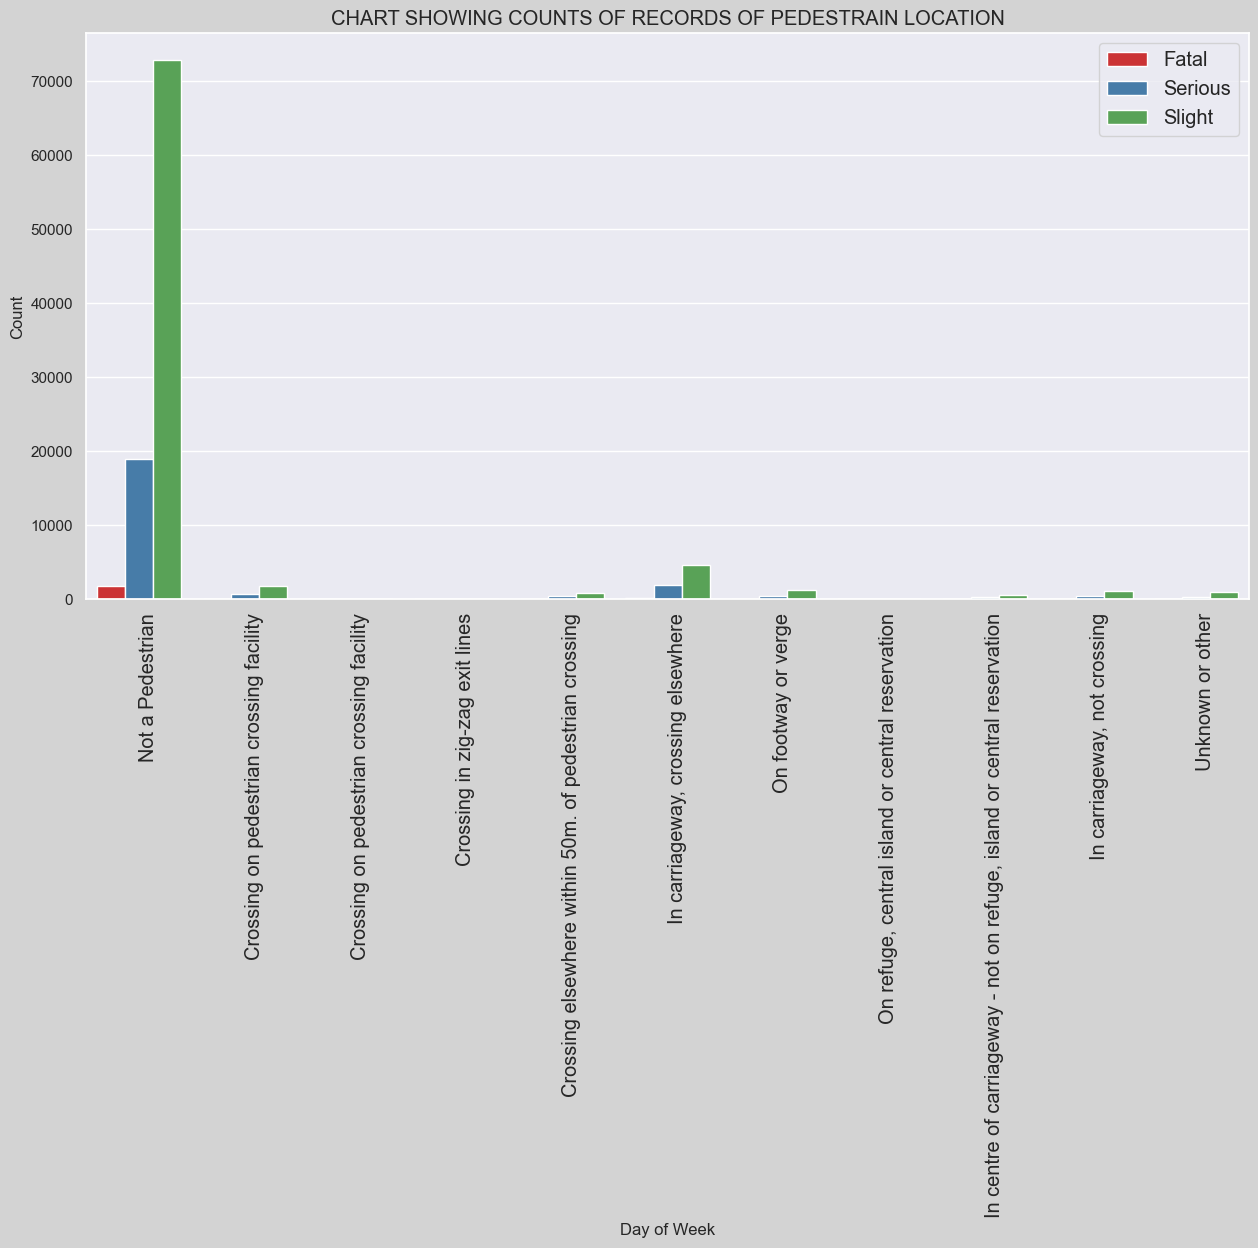

In [253]:
# visualing the Pedestrian Location to Accident severity
pedes_loc_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
pedes_loc_chart = sns.countplot(data = combined_df_2019[lambda x:x["Pedestrian_Location"] > -1],x = "Pedestrian_Location", palette = "Set1", hue="Accident_Severity" )
pedes_loc_chart.set(xlabel='Day of Week', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS OF PEDESTRAIN LOCATION', horizontalalignment='center', fontweight='light', fontsize='large')
pedes_loc_chart.set_xticklabels(['Not a Pedestrian', "Crossing on pedestrian crossing facility", "Crossing on pedestrian crossing facility","Crossing in zig-zag exit lines", "Crossing elsewhere within 50m. of pedestrian crossing", "In carriageway, crossing elsewhere", "On footway or verge", "On refuge, central island or central reservation", "In centre of carriageway - not on refuge, island or central reservation", "In carriageway, not crossing", "Unknown or other"], rotation=90, horizontalalignment='left',fontweight='light', fontsize='large')
#plt.legend(['Not a Pedestrian', "Crossing on pedestrian crossing facility", "Crossing on pedestrian crossing facility","Crossing in zig-zag exit lines", "Crossing elsewhere within 50m. of pedestrian crossing", "In carriageway, crossing elsewhere", "On footway or verge", "On refuge, central island or central reservation", "In centre of carriageway - not on refuge, island or central reservation", "In carriageway, not crossing", "Unknown or other"], loc="best")
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

In [254]:
combined_df_2019["Pedestrian_Movement"].value_counts()

0    93580
1     5423
9     4116
3     3355
2      903
5      773
4      667
8      332
7      247
6      122
Name: Pedestrian_Movement, dtype: int64

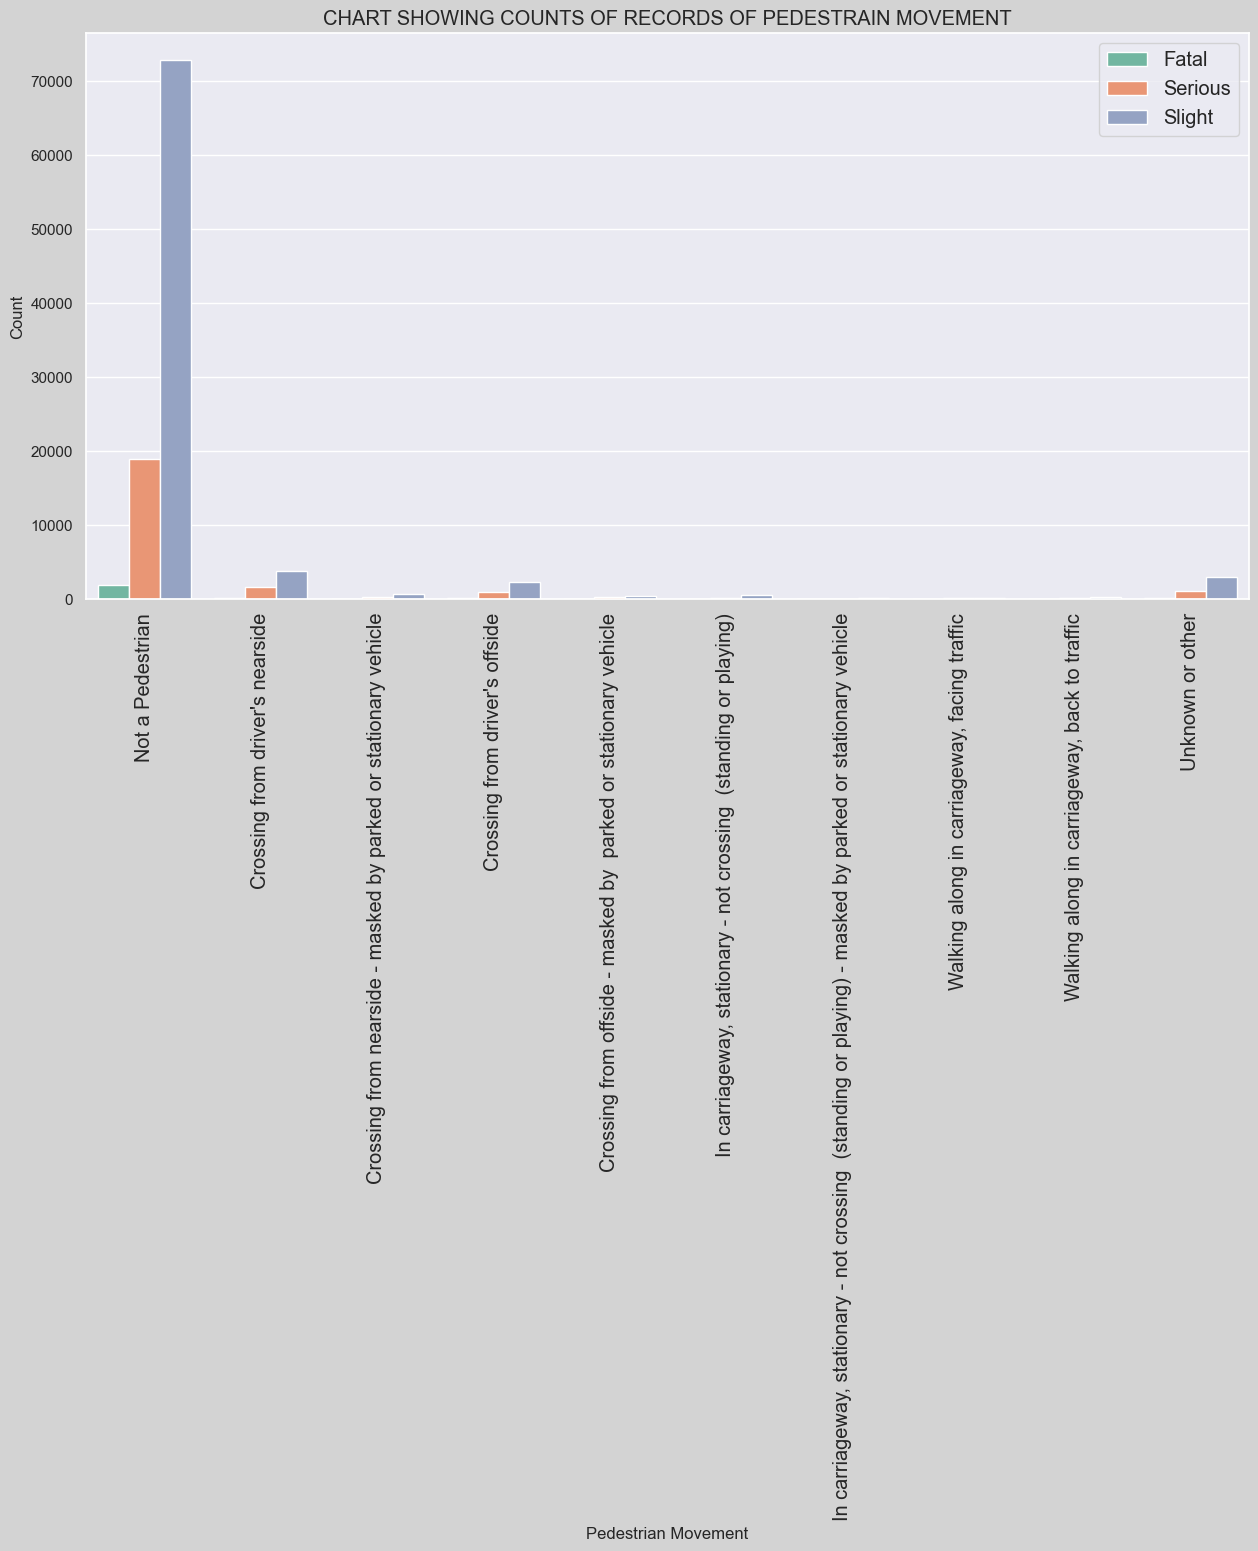

In [255]:
# visualing the Pedestrian Movement to Accident severity
pedes_mov_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
pedes_mov_chart = sns.countplot(data = combined_df_2019[lambda x:x["Pedestrian_Movement"] > -1],x = "Pedestrian_Movement", palette = "Set2", hue="Accident_Severity" )
pedes_mov_chart.set(xlabel='Pedestrian Movement', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS OF PEDESTRAIN MOVEMENT', horizontalalignment='center', fontweight='light', fontsize='large')
pedes_mov_chart.set_xticklabels([ "Not a Pedestrian", "Crossing from driver's nearside", "Crossing from nearside - masked by parked or stationary vehicle", "Crossing from driver's offside", "Crossing from offside - masked by  parked or stationary vehicle", "In carriageway, stationary - not crossing  (standing or playing)", "In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle", "Walking along in carriageway, facing traffic", "Walking along in carriageway, back to traffic", "Unknown or other"], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["Not a Pedestrian", "Crossing from driver's nearside", "Crossing from nearside - masked by parked or stationary vehicle", "Crossing from driver's offside", "Crossing from offside - masked by  parked or stationary vehicle", "In carriageway, stationary - not crossing  (standing or playing)", "In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle", "Walking along in carriageway, facing traffic", "Walking along in carriageway, back to traffic", "Unknown or other"])
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

#### Passenger Type Related

In [256]:
combined_df_2019["Bus_or_Coach_Passenger"].value_counts()

 0    107408
 4      1357
 3       501
 2       101
 1        89
-1        62
Name: Bus_or_Coach_Passenger, dtype: int64

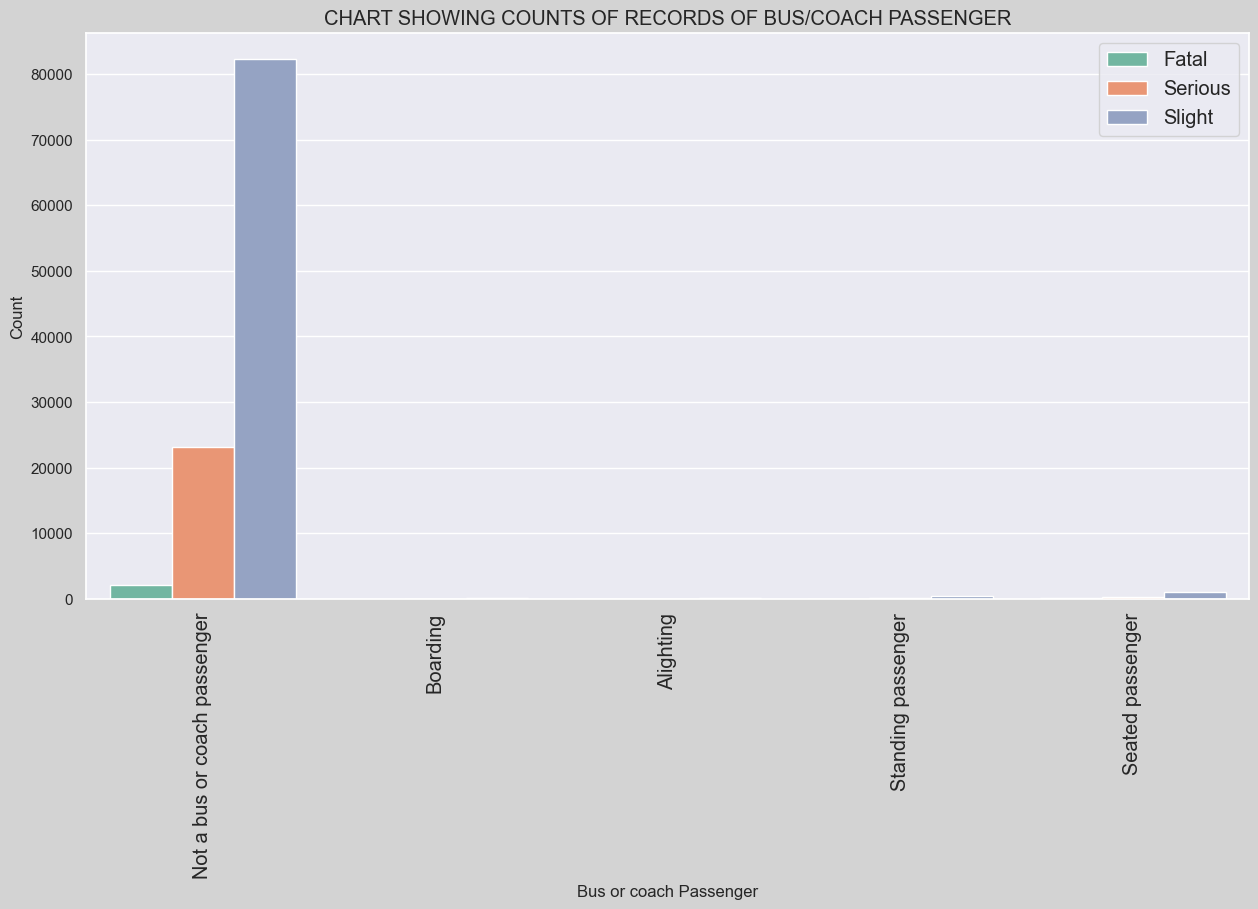

In [257]:
# visualing the Bus_or_Coach_Passenger to Accident severity
bus_coach_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
bus_coach_chart = sns.countplot(data = combined_df_2019[lambda x:x["Bus_or_Coach_Passenger"] > -1],x = "Bus_or_Coach_Passenger", palette = "Set2", hue="Accident_Severity" )
bus_coach_chart.set(xlabel='Bus or coach Passenger', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS OF BUS/COACH PASSENGER', horizontalalignment='center', fontweight='light', fontsize='large')
bus_coach_chart.set_xticklabels(["Not a bus or coach passenger", "Boarding", "Alighting", "Standing passenger", "Seated passenger"], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["Not a bus or coach passenger", "Boarding", "Alighting", "Standing passenger", "Seated passenger"])
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
plt.show()

#### Puropse of Journey Related

In [258]:
print(combined_df_2019["Journey_Purpose_of_Driver"].value_counts())

 6    65178
 5    15025
 1    14483
 2    12767
 3     1482
 4      567
-1       16
Name: Journey_Purpose_of_Driver, dtype: int64


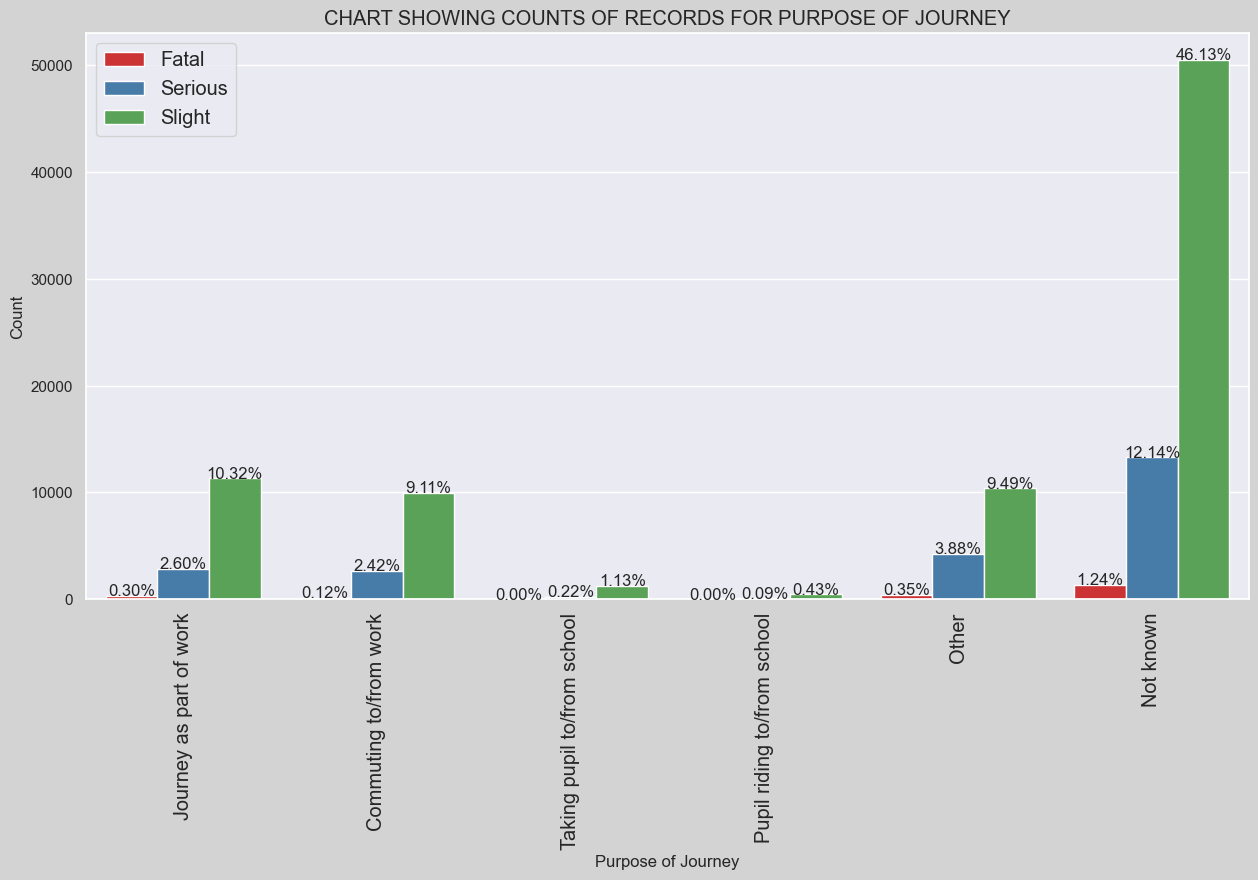

In [259]:
# visualing the Journey_Purpose_of_Driver to Accident severity
journey_purpose_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
journey_purpose_chart = sns.countplot(data = combined_df_2019[lambda x:x["Journey_Purpose_of_Driver"] > -1],x = "Journey_Purpose_of_Driver", palette = "Set1", hue="Accident_Severity" )
journey_purpose_chart.set(xlabel='Purpose of Journey', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR PURPOSE OF JOURNEY', horizontalalignment='center', fontweight='light', fontsize='large')
journey_purpose_chart.set_xticklabels(['Journey as part of work', 'Commuting to/from work', 'Taking pupil to/from school','Pupil riding to/from school', 'Other', 'Not known'], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(['Journey as part of work', 'Commuting to/from work', 'Taking pupil to/from school','Pupil riding to/from school', 'Other', 'Not known', 'Other/Not known (2005-10)'], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
for p in journey_purpose_chart.patches:
    height = p.get_height()
    journey_purpose_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()

#### Traffic Control Related

posx and posy should be finite values
posx and posy should be finite values


-1    47944
 4    47525
 2    13057
 3      703
 1      288
 0        1
Name: Junction_Control, dtype: int64


posx and posy should be finite values
posx and posy should be finite values


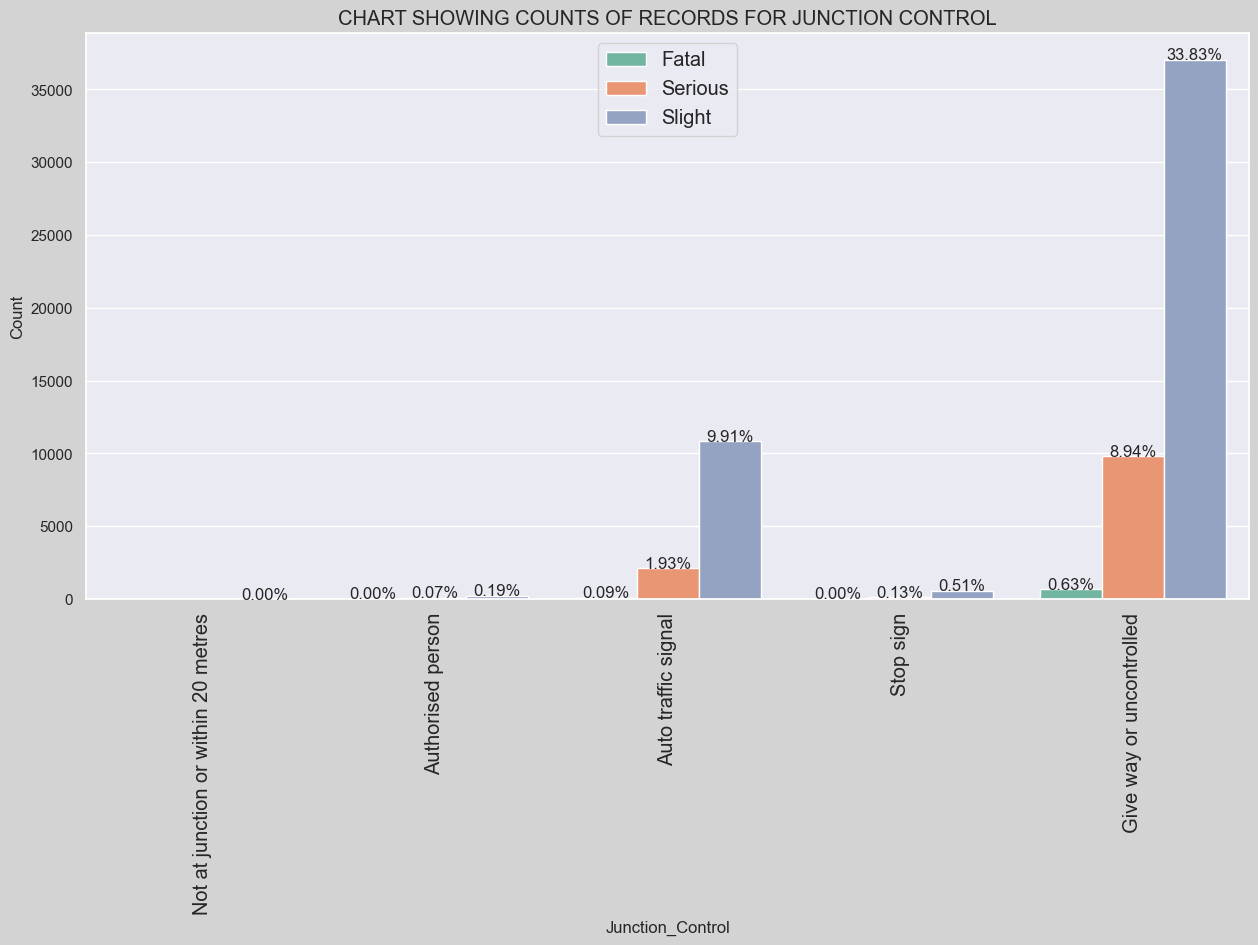

In [260]:
print(combined_df_2019["Junction_Control"].value_counts())

# visualing the Junction_Control to Accident severity
juc_cont_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
juc_cont_chart = sns.countplot(data = combined_df_2019[lambda x:x["Junction_Control"] > -1],x = "Junction_Control", palette = "Set2", hue="Accident_Severity" )
juc_cont_chart.set(xlabel='Junction_Control', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR JUNCTION CONTROL', horizontalalignment='center', fontweight='light', fontsize='large')
juc_cont_chart.set_xticklabels(['Not at junction or within 20 metres','Authorised person','Auto traffic signal','Stop sign','Give way or uncontrolled',], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
for p in juc_cont_chart.patches:
    height = p.get_height()
    juc_cont_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()

#### Police Related

In [261]:
combined_df_2019["Police_Force"].unique()

array([ 1,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23, 30,
       31, 32, 33, 34, 35, 36, 37, 43, 44, 45, 50, 52, 53, 54, 55, 60, 61,
       62, 63, 91, 92, 93, 94, 95, 96, 97, 98], dtype=int64)

1     25055
20     5416
46     4196
47     3991
44     3657
6      3622
13     3620
43     3564
50     3404
45     2964
4      2949
52     2935
42     2913
97     2489
14     2377
31     2354
16     2311
10     2296
5      2149
41     1960
32     1893
22     1879
7      1729
30     1705
35     1696
36     1648
62     1546
40     1390
12     1376
37     1362
54     1333
33     1316
21     1312
95     1300
55     1276
63     1143
34     1113
23     1108
3      1025
60      913
11      851
53      845
61      715
17      662
91      405
92      363
93      344
94      304
96      284
48      283
98      195
Name: Police_Force, dtype: int64


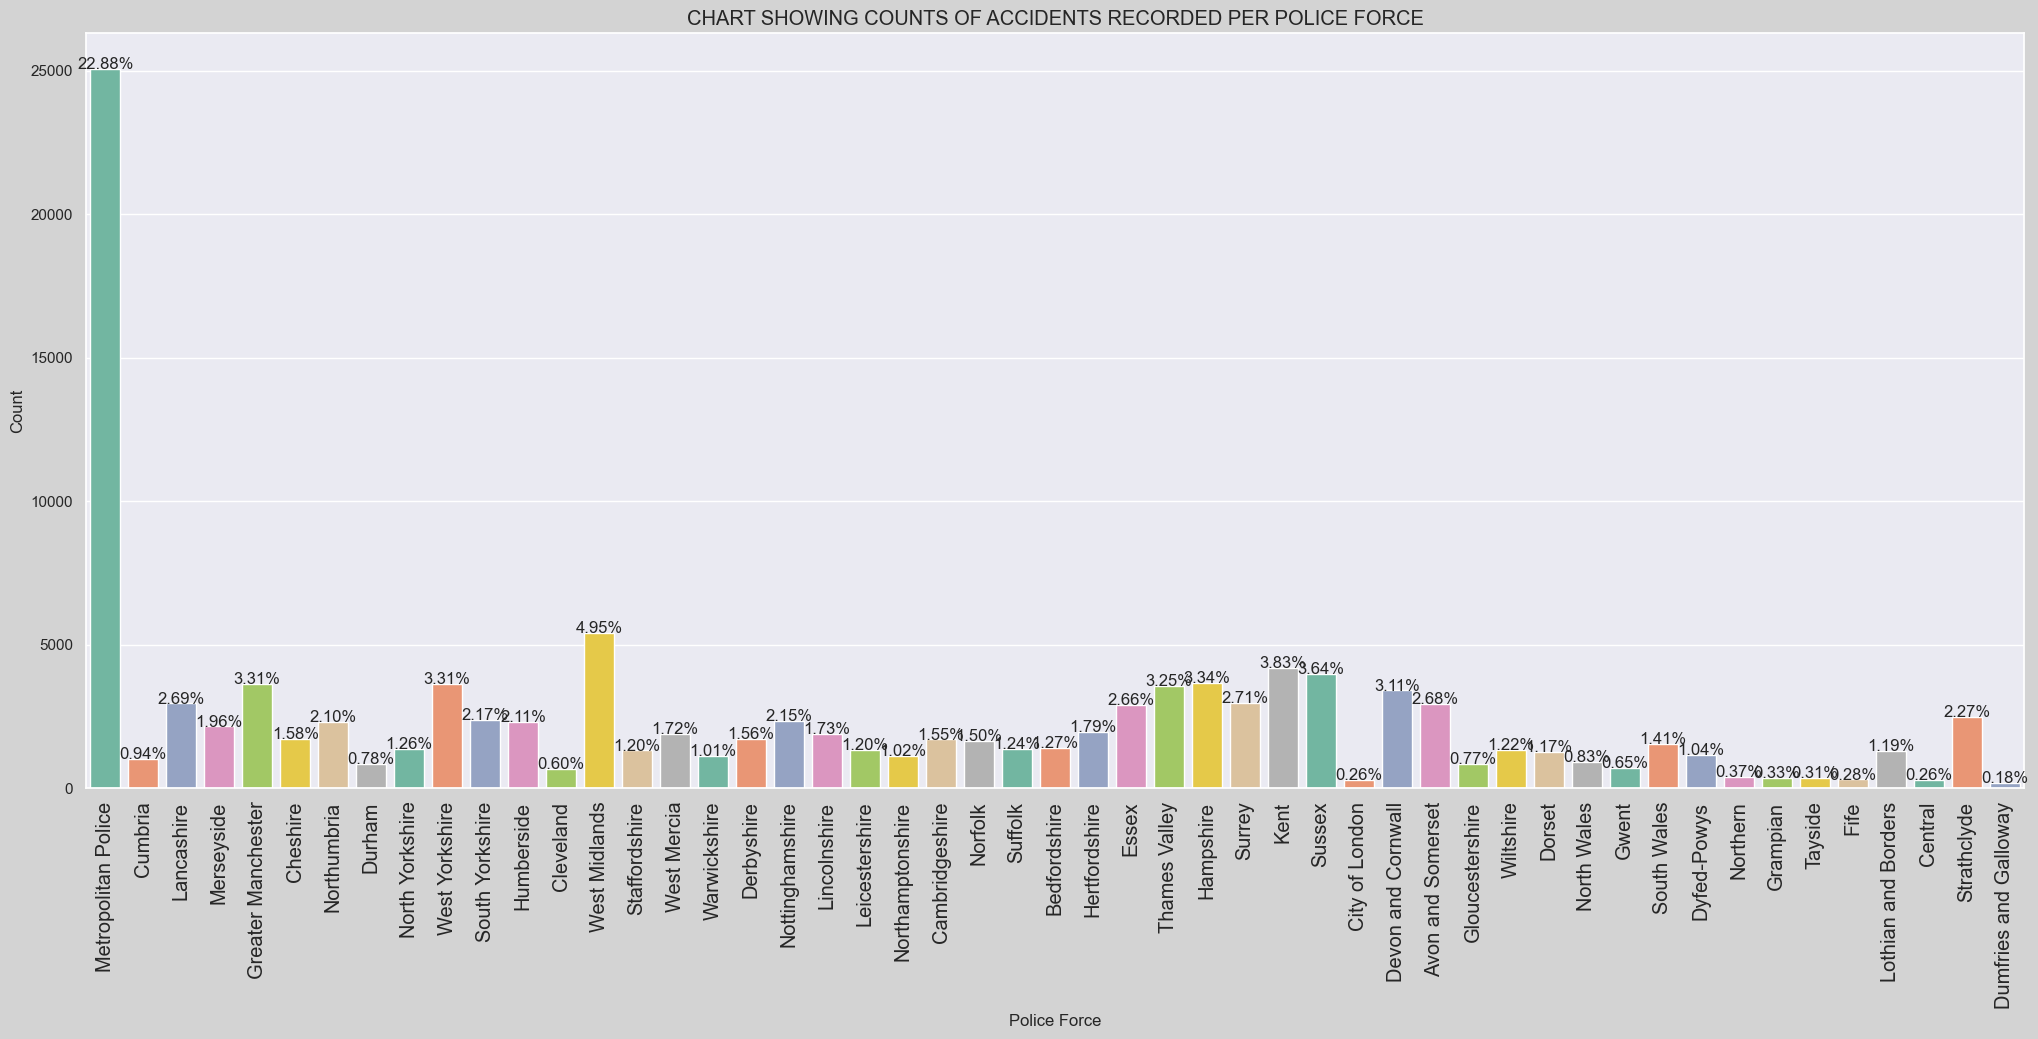

In [262]:
print(accidents_2019["Police_Force"].value_counts())

# visualing the Did_Police_Officer_Attend_Scene_of_Accident to Accident severity
police_force_histplot = plt.figure(figsize=(25,10), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
police_force_chart = sns.countplot(data = accidents_2019[lambda x:x["Police_Force"] > -1],x = "Police_Force", palette = "Set2")
police_force_chart.set(xlabel='Police Force', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF ACCIDENTS RECORDED PER POLICE FORCE', horizontalalignment='center', fontweight='light', fontsize='large')
police_force_chart.set_xticklabels(['Metropolitan Police','Cumbria','Lancashire','Merseyside','Greater Manchester','Cheshire','Northumbria','Durham','North Yorkshire',
'West Yorkshire','South Yorkshire','Humberside','Cleveland','West Midlands','Staffordshire','West Mercia','Warwickshire','Derbyshire','Nottinghamshire','Lincolnshire','Leicestershire','Northamptonshire',
'Cambridgeshire','Norfolk','Suffolk','Bedfordshire','Hertfordshire','Essex','Thames Valley',
'Hampshire','Surrey','Kent','Sussex','City of London','Devon and Cornwall','Avon and Somerset',
'Gloucestershire','Wiltshire','Dorset','North Wales','Gwent','South Wales','Dyfed-Powys',
'Northern','Grampian','Tayside','Fife','Lothian and Borders','Central','Strathclyde','Dumfries and Galloway'], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
for p in police_force_chart.patches:
    height = p.get_height()
    police_force_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()


posx and posy should be finite values


1    78234
2    24535
3     6749
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64


posx and posy should be finite values


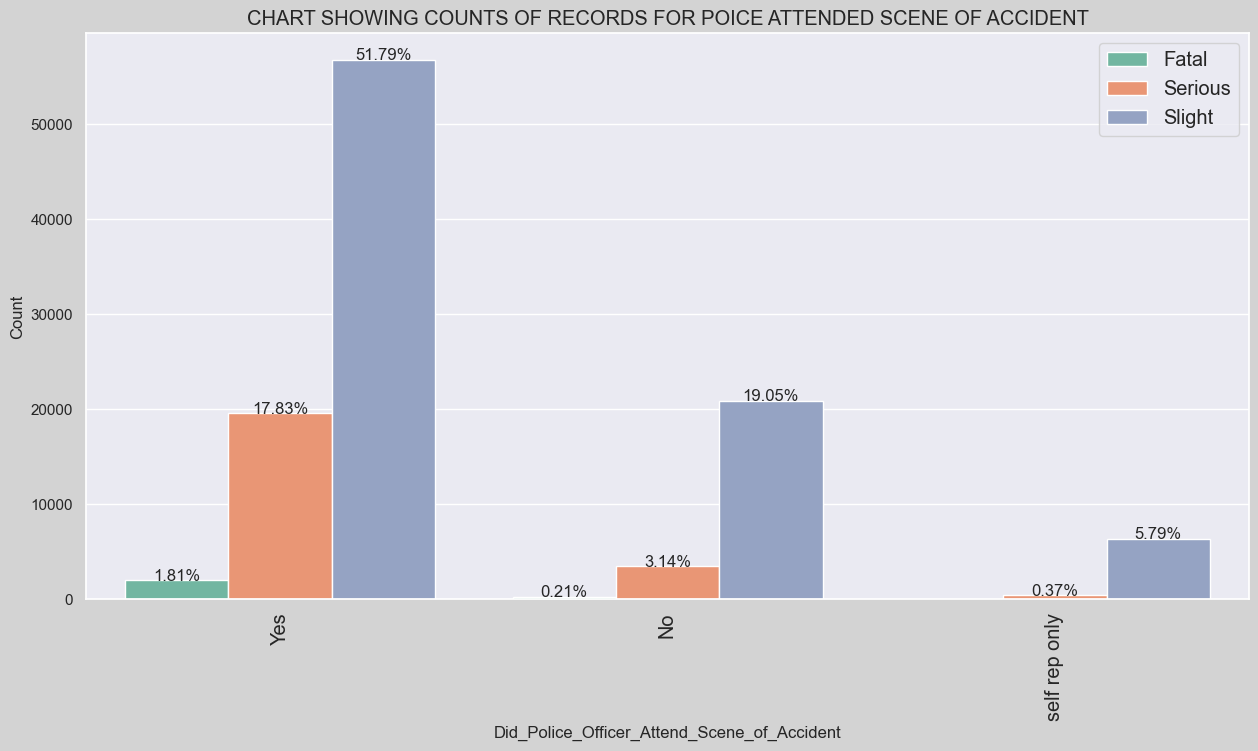

In [263]:
print(combined_df_2019["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts())

# visualing the Did_Police_Officer_Attend_Scene_of_Accident to Accident severity
police_att_histplot = plt.figure(figsize=(15,7.5), dpi = 100, facecolor="lightgrey", edgecolor="pink", frameon=True)
police_att_chart = sns.countplot(data = combined_df_2019[lambda x:x["Did_Police_Officer_Attend_Scene_of_Accident"] > -1],x = "Did_Police_Officer_Attend_Scene_of_Accident", palette = "Set2", hue="Accident_Severity" )
police_att_chart.set(xlabel='Did_Police_Officer_Attend_Scene_of_Accident', ylabel='Count')
plt.title('CHART SHOWING COUNTS OF RECORDS FOR POICE ATTENDED SCENE OF ACCIDENT', horizontalalignment='center', fontweight='light', fontsize='large')
police_att_chart.set_xticklabels(["Yes","No","self rep only"], rotation=90, horizontalalignment='center',fontweight='light', fontsize='large')
#plt.legend(["0 - 5","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"], bbox_to_anchor=(1.01, 1))
plt.legend(["Fatal","Serious", "Slight"], fontsize='large')
for p in police_att_chart.patches:
    height = p.get_height()
    police_att_chart.text(p.get_x()+p.get_width()/2., height + 3, "{:1.2f}".format((height/len(combined_df_2019))*100) + "%", ha="center")
plt.show()

### Building and Evaluating Models

In [264]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)



In [265]:
# resampling our datset to create a balance in the target distribution
from sklearn.utils import resample

fatal_sampled = (combined_df_2019[lambda x:x.Accident_Severity == 1])
serious_sampled = (combined_df_2019[lambda x:x.Accident_Severity == 2])
slight_sampled = (combined_df_2019[lambda x:x.Accident_Severity == 3])

fatal_upsampled = resample(fatal_sampled, replace=True, n_samples = len(slight_sampled), random_state=2)
serious_upsampled = resample(serious_sampled, replace=True, n_samples = len(slight_sampled), random_state=2)
resampled_combined_df_2019 = pd.concat([fatal_upsampled, serious_upsampled, slight_sampled])
resampled_combined_df_2019

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
88099   2019520902403               343842.0                143813.0   
68408   2019320083649               529052.0                336968.0   
46695   2019160833531               490226.0                447817.0   
36183   2019121900357               440472.0                496598.0   
66767   201931C110619               456593.0                338706.0   
...               ...                    ...                     ...   
109512  2019984106819               303932.0                610445.0   
109513  2019984106919               312635.0                573392.0   
109514  2019984107019               337522.0                591682.0   
109515  2019984107219               318544.0                567087.0   
109516  2019984107419               336525.0                584226.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
88099   -2.804987  51.190761            52                  1   
68408   -0.082197  52.914665            32                  1   
46695   -0.627717  53.918667            16                  1   
36183   -1.378668  54.363315            12                  1   
66767   -1.159291  52.942789            31                  1   
...           ...        ...           ...                ...   
109512  -3.517671  55.378549            98                  3   
109513  -3.368899  55.047323            98                  3   
109514  -2.983499  55.215407            98                  3   
109515  -3.274645  54.991685            98                  3   
109516  -2.997491  55.148292            98                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
88099                    1                     1 2019-07-04  ...   
68408                    2                     1 2019-02-17  ...   
46695                    1                     1 2019-04-23  ...   
36183                    2                     2 2019-01-03  ...   
66767                    2                     4 2019-06-07  ...   
...                    ...                   ...        ...  ...   
109512                   3                     2 2019-05-30  ...   
109513                   1                     1 2019-05-18  ...   
109514                   4                     1 2019-05-30  ...   
109515                   2                     1 2019-06-21  ...   
109516                   1                     1 2019-06-29  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
88099                      7                 1                    0   
68408                      6                 1                    0   
46695                      4                 1                    0   
36183                      8                 1                    0   
66767                      6                 2                    0   
...                      ...               ...                  ...   
109512                    10                 3                    0   
109513                     5                 3                    0   
109514                     5                 3                    0   
109515                     9                 3                    0   
109516                     8                 3                    5   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
88099                    0              0                       0   
68408                    0              0                       0   
46695                    0              0                       0   
36183                    0              0                       0   
66767                    0              2                       0   
...                    ...            ...                     ...   
109512                   0              1                       0   
109513                   0              0                       0   
109514                   0              0                       0   
1

#### Using individual Classifiers

In [266]:
# Getting the models required
def get_model():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    return models

In [267]:
# Importing the required libraries
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [268]:
# Getting features for the training
features = ['Weather_Conditions', 'Speed_limit', 'Road_Surface_Conditions', 
'Light_Conditions']
target = ['Accident_Severity']
usethis = combined_df_2019
usethis.reset_index(drop=True)
usethis = usethis.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 
'Light_Conditions', 'Accident_Severity'], axis=1)
usethisnow = usethis[(usethis['Weather_Conditions']>0) & (usethis['Speed_limit']>0) 
                     & (usethis['Road_Surface_Conditions']>0) & 
(usethis['Light_Conditions']>0)]
from sklearn.model_selection import train_test_split
y_target = usethisnow["Accident_Severity"][0:1000]
Xfeatures = usethisnow.drop("Accident_Severity", axis=1)[0:1000]

#The new bit is to use test-train split like so:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1, shuffle=True)
    return X_train, y_train

In [269]:
X, y = get_dataset()
y.unique()

array([2, 3, 1], dtype=int64)

In [270]:
# Function to evaluate the models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#Grab hold of the dataset.
X, y = get_dataset()

##Grab the models to use.
models = get_model()

#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.808 (0.020)
>knn 0.721 (0.107)
>lr 0.817 (0.006)
>bayes 0.118 (0.035)


In [271]:
# Viewing the scores and result
print(scores)
print(results)

[0.08       0.10666667 0.06666667 0.14666667 0.05333333 0.17333333
 0.16       0.17333333 0.13333333 0.08       0.16       0.12
 0.08       0.10666667 0.13333333 0.12       0.05333333 0.16
 0.16       0.09333333 0.12       0.12       0.12       0.14666667
 0.12       0.12       0.08       0.16       0.06666667 0.13333333]
[array([0.78666667, 0.81333333, 0.82666667, 0.8       , 0.85333333,
       0.78666667, 0.82666667, 0.81333333, 0.8       , 0.77333333,
       0.82666667, 0.8       , 0.82666667, 0.78666667, 0.81333333,
       0.78666667, 0.81333333, 0.84      , 0.81333333, 0.78666667,
       0.8       , 0.81333333, 0.82666667, 0.78666667, 0.81333333,
       0.77333333, 0.82666667, 0.78666667, 0.82666667, 0.81333333]), array([0.81333333, 0.68      , 0.56      , 0.81333333, 0.66666667,
       0.62666667, 0.66666667, 0.8       , 0.8       , 0.70666667,
       0.82666667, 0.58666667, 0.58666667, 0.64      , 0.82666667,
       0.74666667, 0.58666667, 0.82666667, 0.82666667, 0.58666667,
   

In [272]:
results[0]

array([0.78666667, 0.81333333, 0.82666667, 0.8       , 0.85333333,
       0.78666667, 0.82666667, 0.81333333, 0.8       , 0.77333333,
       0.82666667, 0.8       , 0.82666667, 0.78666667, 0.81333333,
       0.78666667, 0.81333333, 0.84      , 0.81333333, 0.78666667,
       0.8       , 0.81333333, 0.82666667, 0.78666667, 0.81333333,
       0.77333333, 0.82666667, 0.78666667, 0.82666667, 0.81333333])

In [273]:
array_result  = [results[0], results[1], results[2], results[3]]
dict_label = ["dtree", "knn", "lr", "bayes"]

In [274]:
data_results = dict(zip(dict_label, array_result))

In [275]:
data_results = pd.DataFrame(data_results)
data_results

dtree       knn        lr     bayes
0   0.786667  0.813333  0.813333  0.080000
1   0.813333  0.680000  0.813333  0.106667
2   0.826667  0.560000  0.813333  0.066667
3   0.800000  0.813333  0.813333  0.146667
4   0.853333  0.666667  0.826667  0.053333
5   0.786667  0.626667  0.826667  0.173333
6   0.826667  0.666667  0.826667  0.160000
7   0.813333  0.800000  0.813333  0.173333
8   0.800000  0.800000  0.813333  0.133333
9   0.773333  0.706667  0.813333  0.080000
10  0.826667  0.826667  0.813333  0.160000
11  0.800000  0.586667  0.813333  0.120000
12  0.826667  0.586667  0.813333  0.080000
13  0.786667  0.640000  0.813333  0.106667
14  0.813333  0.826667  0.826667  0.133333
15  0.786667  0.746667  0.826667  0.120000
16  0.813333  0.586667  0.826667  0.053333
17  0.840000  0.826667  0.813333  0.160000
18  0.813333  0.826667  0.813333  0.160000
19  0.786667  0.586667  0.813333  0.093333
20  0.800000  0.813333  0.813333  0.120000
21  0.813333  0.800000  0.813333  0.120000
22  0.826667  0.520000  0.813333  0.120000
23  0.786667  0.826667  0.813333  0.146667
24  0.813333  0.826667  0.826667  0.120000
25  0.773333  0.586667  0.826667  0.120000
26  0.826667  0.600000  0.826667  0.080000
27  0.786667  0.840000  0.813333  0.160000
28  0.826667  0.840000  0.813333  0.066667
29  0.813333  0.813333  0.813333  0.133333

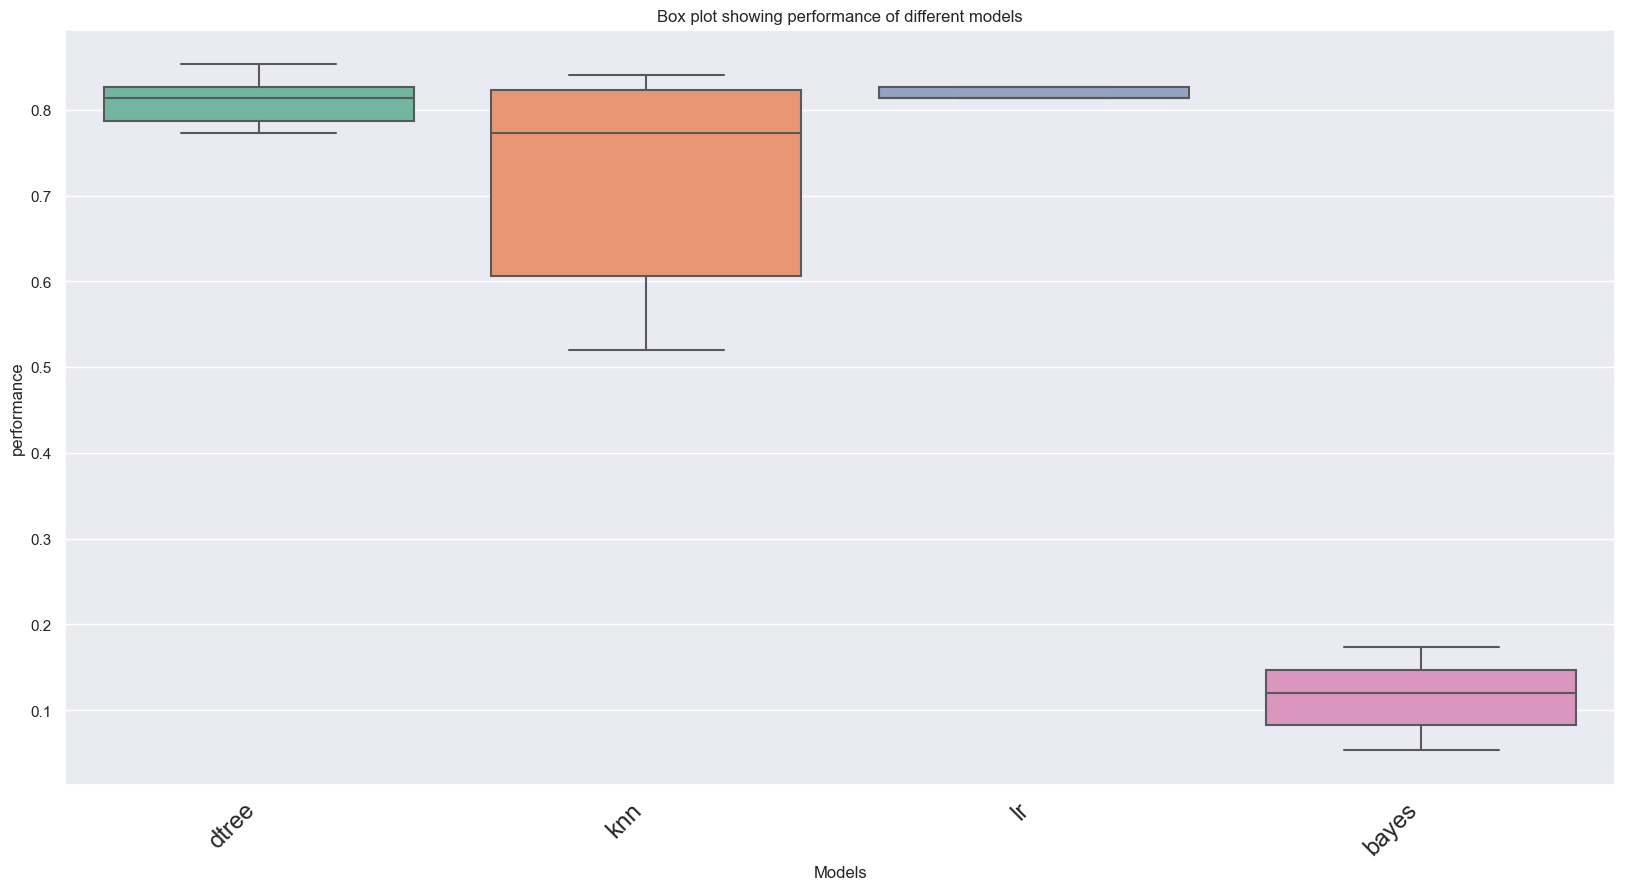

In [276]:
# Using the box plot to show age concentration in our religion dataset, spot deviations and outliers 

models_result_data = plt.figure(figsize=(20,10), dpi = 100 )
models_result_chart = sns.boxplot(data = data_results, palette='Set2')
models_result_chart.set(xlabel='Models', ylabel='performance')
models_result_chart.set_xticklabels(models_result_chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light', fontsize='x-large')
plt.title('Box plot showing performance of different models')
plt.show()

#### Stacking the classifiers

In [277]:
# Defining a function for stacking.
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [278]:
# Getting the models required after adding stacking
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [279]:
# Function to evaluate the models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#Grab hold of the dataset.
X, y = get_dataset()

#Grab the models to use.
models = get_models()

#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.808 (0.020)
>knn 0.721 (0.107)
>lr 0.817 (0.006)
>bayes 0.118 (0.035)
>stacking 0.817 (0.006)


### implementing pricipal component analysis (PCA)

In [280]:
# Dropping all cells with outliers in the form of value as -1
dropped_minus_one_df = combined_df_2019.replace(-1, np.nan)
dropped_minus_one_df = dropped_minus_one_df.dropna()
print(dropped_minus_one_df.Accident_Severity.value_counts())

# resampling our datset to create a balance in the target distribution
from sklearn.utils import resample
fatal_sampled = (dropped_minus_one_df[lambda x:x.Accident_Severity == 1])
serious_sampled = (dropped_minus_one_df[lambda x:x.Accident_Severity == 2])
slight_sampled = (dropped_minus_one_df[lambda x:x.Accident_Severity == 3])

fatal_upsampled = resample(fatal_sampled, replace=True, n_samples = len(slight_sampled), random_state=2)
serious_upsampled = resample(serious_sampled, replace=True, n_samples = len(slight_sampled), random_state=2)

resampled_combined_df = pd.concat([fatal_upsampled, serious_upsampled, slight_sampled])
len(resampled_combined_df)

3    25985
2     6197
1      469
Name: Accident_Severity, dtype: int64


77955

In [281]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Setting a control to regulate the amount of rows to train with
fatal_newsampled = (resampled_combined_df[lambda x:x.Accident_Severity == 1])[0:3000]
serious_newsampled = (resampled_combined_df[lambda x:x.Accident_Severity == 2])[0:3000]
slight_newsampled = (resampled_combined_df[lambda x:x.Accident_Severity == 3])[0:3000]

resampled_combined_df_2019 = pd.concat([fatal_newsampled, serious_newsampled, slight_newsampled])
len(resampled_combined_df_2019)

# Splitting our dataset into X and y parameters
y_gs = resampled_combined_df_2019["Accident_Severity"]
X_gs = resampled_combined_df_2019.drop(["Accident_Severity","Casualty_Severity", "Accident_Index", "LSOA_of_Accident_Location", "Date", "Local_Authority_(Highway)", "Time"], axis = 1)        

### Hyper-Parameter Optimization and feature selection using random forest classifier

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight = "balanced")

param_grid = {
    "n_estimators": [100,300,600,800],
    "max_depth":[2,5,10,20],
    "max_leaf_nodes":[200,500,1800],
    "min_samples_split":[2,5,],
    "min_samples_leaf":[1,2,]
}

# Using 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy", return_train_score=True, n_jobs=-1)


grid_search.fit(X_gs,y_gs)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_leaf_nodes': [200, 500, 1800],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 600, 800]},
             return_train_score=True, scoring='accuracy')

In [283]:
# Using the grid search estimator to get best parameters for our random forest model.
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=1800, n_estimators=300)

In [284]:
grid_search.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 1800,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [285]:
# Visualising the best score for the model 
grid_search.best_score_

0.9721111111111111

In [286]:
# Checking to validate the importance of available features.

feature_importance = grid_search.best_estimator_.feature_importances_

# Note: feature importance output order is as in the order of training so if this is zipped together.

for i,j in sorted(zip(feature_importance,X_gs.columns), reverse=True):
    print(f"{i*100}: {j}")

10.979111054489799: Police_Force
8.802851146601867: Local_Authority_(District)
7.603687784854116: Location_Easting_OSGR
6.483950853910861: Latitude
6.156343808414637: Longitude
5.8096939435104575: Location_Northing_OSGR
2.8308360933358205: Age_of_Casualty
2.8111339876191037: Engine_Capacity_(CC)
2.4571351467285925: Weeks
2.4131823900695504: decimal_time
2.310757155339839: Speed_limit
2.168260924956992: 1st_Road_Number
2.1540356529758617: Minutes
2.1424160681546525: Age_of_Driver
1.6909951035169628: Number_of_Casualties
1.6894908549264354: Hours
1.662263330516874: Age_of_Vehicle
1.5013901150090894: Urban_or_Rural_Area
1.4506820855248592: Age_Band_of_Casualty
1.1863956217843816: Vehicle_Manoeuvre
1.1693291935461008: Driver_IMD_Decile
1.1648649678230367: Day_of_Week
1.1515730828596373: Age_Band_of_Driver
1.1352437556336799: Casualty_IMD_Decile
1.1161505755378285: Vehicle_IMD_Decile
1.0898349051383287: Number_of_Vehicles
1.0515764763517699: Junction_Detail
1.0373642019670026: Junction_Loca

In [287]:
# Checking the sum of feature importance rating to determine the number of features required for the model trainings
sum(feature_importance[0:35])

0.7391068994637171

In [288]:
the_top_features = {}
for i,j in sorted(zip(feature_importance,X_gs.columns), reverse=True):
    the_top_features[j] = i*100
top_features = list(the_top_features.keys())[0:35]
top_features

['Police_Force',
 'Local_Authority_(District)',
 'Location_Easting_OSGR',
 'Latitude',
 'Longitude',
 'Location_Northing_OSGR',
 'Age_of_Casualty',
 'Engine_Capacity_(CC)',
 'Weeks',
 'decimal_time',
 'Speed_limit',
 '1st_Road_Number',
 'Minutes',
 'Age_of_Driver',
 'Number_of_Casualties',
 'Hours',
 'Age_of_Vehicle',
 'Urban_or_Rural_Area',
 'Age_Band_of_Casualty',
 'Vehicle_Manoeuvre',
 'Driver_IMD_Decile',
 'Day_of_Week',
 'Age_Band_of_Driver',
 'Casualty_IMD_Decile',
 'Vehicle_IMD_Decile',
 'Number_of_Vehicles',
 'Junction_Detail',
 'Junction_Location',
 'Vehicle_Type',
 'Casualty_Type',
 '1st_Road_Class',
 'Journey_Purpose_of_Driver',
 'Vehicle_Leaving_Carriageway',
 '2nd_Road_Number',
 'Driver_Home_Area_Type']

In [289]:
# Importing zscore scalar
#Our first step is to standardize the variables -- the features -- within the dataset.
#We will also ensure that our target is the name of the Accident Severity. 
from scipy.stats import zscore

#features = ['Speed_limit', 'Vehicle_Manoeuvre', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Leaving_Carriageway', 'Number_of_Casualties', 'Age_Band_of_Casualty', '2nd_Road_Class', 'Age_of_Casualty', 'Junction_Detail', 'Light_Conditions', 'Junction_Control', 'Local_Authority_(District)', 'Engine_Capacity_(CC)', 'Casualty_Type']

features = top_features

#features = features.drop(["Accident_Severity","Casualty_Severity", "Accident_Index", "LSOA_of_Accident_Location", "Date", "decimal_time", "LSOA_of_Accident_Location", "Minutes", "Hours", "Seconds", "Local_Authority_(Highway)", "Time"])       

X = resampled_combined_df_2019[features]
y = resampled_combined_df_2019['Accident_Severity']

df_zscaled = X.apply(zscore)
df_zscaled.head()

Police_Force  Local_Authority_(District)  Location_Easting_OSGR  \
44298     -0.148972                    0.030334              -0.357542   
7487      -0.849918                   -0.880815               0.819366   
26304     -0.580323                   -0.470090              -1.131163   
10107     -0.849918                   -0.885536               0.946772   
70629      0.821568                    0.700714               0.502091   

       Latitude  Longitude  Location_Northing_OSGR  Age_of_Casualty  \
44298  1.176306  -0.337315                1.172459        -0.846179   
7487  -0.825410   0.802156               -0.822560         1.305097   
26304  1.239385  -1.138826                1.234557        -0.480004   
10107 -0.822834   0.928278               -0.817651        -0.663091   
70629  0.501545   0.530290                0.504213        -1.029266   

       Engine_Capacity_(CC)     Weeks  decimal_time  ...  Number_of_Vehicles  \
44298              0.130536  0.121443     -2.343308  ...           -1.042048   
7487               3.962640  1.492092      0.173262  ...           -1.042048   
26304              0.128824  1.347814     -0.313719  ...           -1.042048   
10107             -0.939392 -0.311394     -1.169715  ...            0.036801   
70629             -0.301089  1.997069      0.629995  ...            1.115649   

       Junction_Detail  Junction_Location  Vehicle_Type  Casualty_Type  \
44298        -0.617199          -0.906212      0.038580       0.308047   
7487         -0.617199          -0.906212      1.984721      -1.042086   
26304        -1.517125           0.080151      0.038580       0.308047   
10107        -0.617199           1.395302     -0.772311      -0.442027   
70629        -0.617199          -0.906212      0.038580       0.308047   

       1st_Road_Class  Journey_Purpose_of_Driver  Vehicle_Leaving_Carriageway  \
44298       -0.718121                   0.703100                    -0.361002   
7487         0.066044                  -1.722869                    -0.361002   
26304       -0.718121                   0.703100                     1.320686   
10107        0.066044                   0.703100                    -0.361002   
70629       -0.718121                   0.703100                     3.562937   

       2nd_Road_Number  Driver_Home_Area_Type  
44298        -0.322467              -0.445119  
7487         -0.144049              -0.445119  
26304         0.114847              -0.445119  
10107        -0.322467              -0.445119  
70629         0.006278               1.159876  

[5 rows x 35 columns]

In [290]:
# Test to determine if we need PCA


# BARTLETT’S TEST OF SPHERICITY
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, chi2

#chi2, p = calculate_bartlett_sphericity(df_zscaled)
#print("Chi squared value : ",chi2)
#print("p value : ",p) #OUTPUT:Bartlett Sphericity TestChi squared value : 4054.19037041082


In [291]:
# KAISER-MEYER-OLKIN (KMO) TEST
from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_vars, kmo_model = calculate_kmo(df_zscaled)
#print(kmo_model)#OUTPUT:

In [292]:
# Dimensionality Reduction using Factor Analysis in Python
#from factor_analyzer import FactorAnalyzer
#fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_zscaled.shape[1])
#fa.fit(df_zscaled)
#ev,_ = fa.get_eigenvalues()
#plt.figure(figsize=(15,10), dpi=100)
#plt.scatter(range(1,df_zscaled.shape[1]+1),ev)
#plt.plot(range(1,df_zscaled.shape[1]+1),ev)
#plt.title('Scree Plot')
#plt.xlabel('Factors')
#plt.ylabel('Eigen Value')
#plt.grid()

In [293]:
# INTERPRETING THE FACTORS
#fa = FactorAnalyzer(n_factors=6,rotation='varimax')
#fa.fit(df_zscaled)
#print(pd.DataFrame(fa.loadings_,index=df_zscaled.columns))

#### Standardising the data

In [294]:
# splitting our data into subsets (70 train /30 val split)

#y = resampled_combined_df_2019["Accident_Severity"]
#X = resampled_combined_df_2019.drop(["Accident_Severity","Casualty_Severity", "Accident_Index", "LSOA_of_Accident_Location", "Date", "decimal_time", "LSOA_of_Accident_Location", "Minutes", "Hours", "Seconds", "Local_Authority_(Highway)", "Time"], axis = 1)         

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.3, random_state=0)

# standardize our data using StandardScaler
# here we fit the PCAs using STANDARDIZED training data 
# (can be min/max or z-score standard scaler)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train)
X_test_pca = sc.transform(X_test)

#### Decomposition Eigen Values and Eigen Vectors

In [295]:
# Construct the covariance matrix.
cova_matrix = np.cov(X_train_pca.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cova_matrix)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_values)

# the sum of the Eigenvalues 
print("Percentage of Variance Explained by Each Component: \n", eigen_values/sum(eigen_values))

Raw Eigenvalues: 
 [ 5.19886781e+00  3.25177721e+00  2.68183290e+00  2.23902562e+00
  1.92037065e+00  1.87790185e+00  1.48804855e+00  1.32207973e+00
  1.27276983e+00  1.14611864e+00  1.08100336e+00  1.05337812e+00
  1.00857558e+00  9.63577263e-01  9.18977412e-01  8.98873517e-01
  8.62953484e-01  8.29085105e-01  4.46128715e-01  4.98554871e-01
  5.79722022e-01  7.42659352e-01  7.10672177e-01  6.36595206e-01
  6.64069352e-01  2.95509567e-01  1.53186162e-01  2.22493531e-01
  2.69083416e-02  8.57936319e-03  5.19254347e-03  4.99316835e-05
  1.86763022e-05  8.86244416e-17 -5.14392864e-16]
Percentage of Variance Explained by Each Component: 
 [ 1.48515503e-01  9.28931731e-02  7.66116345e-02  6.39620063e-02
  5.48590236e-02  5.36458220e-02  4.25089243e-02  3.77677108e-02
  3.63590801e-02  3.27410490e-02  3.08809078e-02  3.00917406e-02
  2.88118710e-02  2.75264090e-02  2.62523298e-02  2.56780240e-02
  2.46519002e-02  2.36843858e-02  1.27445115e-02  1.42421639e-02
  1.65608572e-02  2.12154706e-02

In [296]:
#conv_matrix = np.cov(X_pca, rowvar = False)

In [297]:
# Eigen values and Eigen Vectors
#eigen_values,eigen_vectors = np.linalg.eig(conv_matrix)

In [298]:
# let's look at the cumulative variance described by each component
total = sum(eigen_values)
var_exp = [(i / total) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.1485155 , 0.24140868, 0.31802031, 0.38198232, 0.43684134,
       0.49048716, 0.53299609, 0.5707638 , 0.60712288, 0.63986393,
       0.67074483, 0.70083657, 0.72964845, 0.75717485, 0.78342718,
       0.80910521, 0.83375711, 0.85744149, 0.87865697, 0.89895866,
       0.91792906, 0.93611461, 0.95267546, 0.96691763, 0.97966214,
       0.98810393, 0.99445988, 0.99883593, 0.99960462, 0.99984971,
       0.99999804, 0.99999947, 1.        , 1.        , 1.        ])

In [299]:
print(var_exp)

[0.1485155027540696, 0.09289317309020725, 0.07661163450799044, 0.06396200627542108, 0.05485902361231457, 0.05364582196249328, 0.04250892425815631, 0.037767710767269785, 0.03635908006133923, 0.0327410489761853, 0.030880907768748137, 0.030091740631450935, 0.02881187104927574, 0.027526408986099763, 0.02625232977399911, 0.02567802396152008, 0.02465190021494763, 0.02368438583953701, 0.0212154705521362, 0.020301696327303897, 0.01897039840030123, 0.018185547393922263, 0.016560857205625366, 0.014242163879361096, 0.012744511456472067, 0.00844179030609792, 0.006355948998335437, 0.00437605275713889, 0.0007686877254597013, 0.0002450857539257513, 0.00014833483587859856, 1.426393081013855e-06, 5.335239354178346e-07, 2.5317249769454094e-18, -1.4694606116751644e-17]


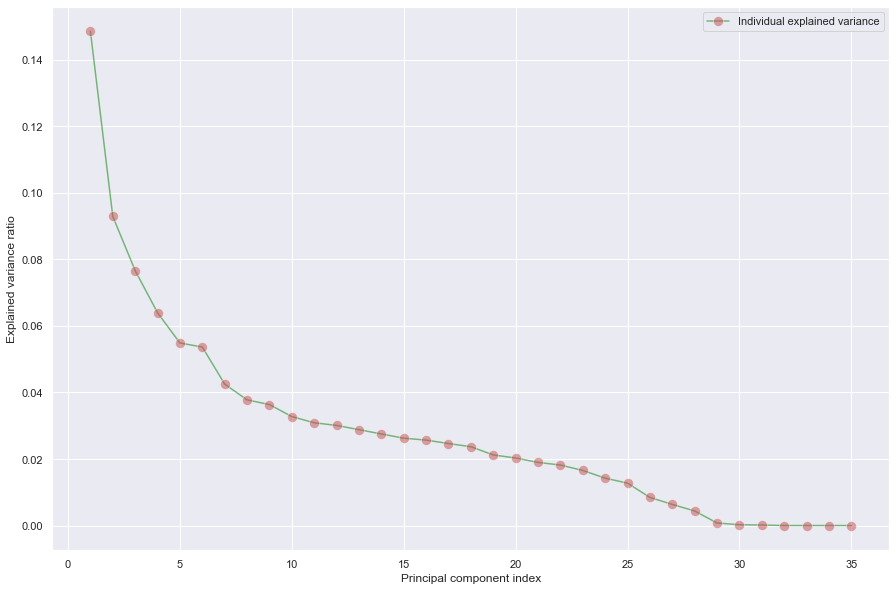

In [300]:
# make a bar plot of the variance associated with each component
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.lineplot(range(1,len(var_exp)+1), var_exp, alpha=0.5, label='Individual explained variance', marker = 'o', ms = 10, mfc = 'r', color="green" )
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("")
plt.show()

In [301]:
#For this demonstration of PCA to the Iris dataset, we will also need the following:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [302]:
#Our first step is to standardize the variables -- the features -- within the dataset.
#We will also ensure that our target is the name of the Accident_Severity. 

#features = ['Speed_limit', 'Vehicle_Manoeuvre', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Leaving_Carriageway', 'Number_of_Casualties', 'Age_Band_of_Casualty', '2nd_Road_Class', 'Age_of_Casualty', 'Junction_Detail', 'Light_Conditions', 'Junction_Control', 'Local_Authority_(District)', 'Engine_Capacity_(CC)', 'Casualty_Type']
features = top_features
#features = features.drop(["Accident_Severity","Casualty_Severity", "Accident_Index", "LSOA_of_Accident_Location", "Date", "decimal_time", "LSOA_of_Accident_Location", "Minutes", "Hours", "Seconds", "Local_Authority_(Highway)", "Time"])       
x = resampled_combined_df_2019.loc[:, features].values
y = resampled_combined_df_2019.loc[:,['Accident_Severity']].values

X_train, X_validation, y_train, y_validation = train_test_split(x,y,test_size=.25,random_state=1, shuffle=True,stratify=y)
x_train = sc.fit_transform(X_train)

x_validation = sc.transform(X_validation)

X_train

array([[3.40000e+01, 3.83000e+02, 4.86388e+05, ..., 0.00000e+00,
        6.00300e+03, 1.00000e+00],
       [1.00000e+00, 2.80000e+01, 5.19538e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.00000e+01, 3.07000e+02, 4.01466e+05, ..., 3.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [4.00000e+00, 7.10000e+01, 3.30629e+05, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.40000e+01, 2.15000e+02, 4.31071e+05, ..., 0.00000e+00,
        6.25000e+02, 3.00000e+00],
       [5.50000e+01, 6.44000e+02, 3.97000e+05, ..., 7.00000e+00,
        5.00000e+00, 2.00000e+00]])

In [303]:
       #Now that we've standardized the values of the variables, we will apply the PCA.

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X_train)
#New_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
#New_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
New_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9'])
New_df2 = pd.DataFrame(data = y_train, columns = ["Accident_Severity"])

New_df              

PC1            PC2          PC3          PC4          PC5  \
0      10695.544641  -23650.783505   555.274438  6832.303721  3347.963075   
1     -89283.823793  -19504.155412   214.814287  -756.836796   -35.171874   
2      60977.826984   47682.210336  -523.545727 -1272.398927  -104.696465   
3    -109030.131559  -30900.635135  -242.184182  1972.376536  1107.088919   
4     176114.159154   71957.703951  -223.914882 -1592.244461   -93.770685   
...             ...            ...          ...          ...          ...   
6745  -51673.049639  192233.662227 -1473.422355 -1296.533701   -93.362476   
6746   -1867.985861 -158262.248812  -592.242313  -226.155795  -220.915352   
6747  215218.122401   62438.503678  4759.407533 -1456.632110  -224.086489   
6748  128053.014276  -10936.515754   153.140688  -377.032261   192.690715   
6749 -126740.073266  127356.929745 -1834.325770  -852.863119   -97.339072   

             PC6        PC7        PC8        PC9  
0     156.341747  18.945524 -16.374399   4.984113  
1    -120.514114 -19.591635  -8.508080   3.898870  
2      11.296076 -34.484995 -18.829954 -17.826651  
3    -127.472737 -19.198522 -13.241541  24.893006  
4    -271.685692 -13.127873  12.665882  11.406462  
...          ...        ...        ...        ...  
6745   91.242686 -24.547174  -6.852195  12.397787  
6746  472.680742  -3.493967  21.537281   0.040089  
6747 -288.200710  16.867753  -4.560150  -5.827612  
6748    0.495847  37.909624 -12.719978  21.123279  
6749  253.901886 -31.660737  27.133911  -5.435815  

[6750 rows x 9 columns]

In [304]:
#Let's see how much of the variance is explained.

pca.explained_variance_ratio_

array([7.44684421e-01, 2.54925309e-01, 1.63712022e-04, 1.35370715e-04,
       8.94591776e-05, 1.63754544e-06, 3.51675812e-08, 1.62915459e-08,
       1.00955485e-08])

In [305]:
#We will recombine the principal components with the targets now.

Final_df = pd.concat([New_df, New_df2,], axis = 1,  join="inner")

Final_df

PC1            PC2          PC3          PC4          PC5  \
0      10695.544641  -23650.783505   555.274438  6832.303721  3347.963075   
1     -89283.823793  -19504.155412   214.814287  -756.836796   -35.171874   
2      60977.826984   47682.210336  -523.545727 -1272.398927  -104.696465   
3    -109030.131559  -30900.635135  -242.184182  1972.376536  1107.088919   
4     176114.159154   71957.703951  -223.914882 -1592.244461   -93.770685   
...             ...            ...          ...          ...          ...   
6745  -51673.049639  192233.662227 -1473.422355 -1296.533701   -93.362476   
6746   -1867.985861 -158262.248812  -592.242313  -226.155795  -220.915352   
6747  215218.122401   62438.503678  4759.407533 -1456.632110  -224.086489   
6748  128053.014276  -10936.515754   153.140688  -377.032261   192.690715   
6749 -126740.073266  127356.929745 -1834.325770  -852.863119   -97.339072   

             PC6        PC7        PC8        PC9  Accident_Severity  
0     156.341747  18.945524 -16.374399   4.984113                  1  
1    -120.514114 -19.591635  -8.508080   3.898870                  2  
2      11.296076 -34.484995 -18.829954 -17.826651                  2  
3    -127.472737 -19.198522 -13.241541  24.893006                  3  
4    -271.685692 -13.127873  12.665882  11.406462                  2  
...          ...        ...        ...        ...                ...  
6745   91.242686 -24.547174  -6.852195  12.397787                  1  
6746  472.680742  -3.493967  21.537281   0.040089                  1  
6747 -288.200710  16.867753  -4.560150  -5.827612                  2  
6748    0.495847  37.909624 -12.719978  21.123279                  2  
6749  253.901886 -31.660737  27.133911  -5.435815                  2  

[6750 rows x 10 columns]

In [306]:
X_pca = Final_df.drop(labels= "Accident_Severity", axis=1)
y_pca = Final_df["Accident_Severity"]

# Splitting test and train data
X_train, X_validation, y_train, y_validation = train_test_split(X_pca,y_pca,test_size=.25,random_state=1, shuffle=True)
x_train = sc.fit_transform(X_train)
x_validation = sc.transform(X_validation)

X_rf_pca = x_train[0:10000]
y_rf_pca = y_train[0:10000]

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight = "balanced")

param_grid = {
    "n_estimators": [100,300,500,600, 800],
    "max_depth":[2,3,5,10,20]
}

# Using 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy", return_train_score=True, n_jobs=-1)


grid_search.fit(X_rf_pca,y_rf_pca)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'n_estimators': [100, 300, 500, 600, 800]},
             return_train_score=True, scoring='accuracy')

In [308]:
# Using the grid search estimator to get best parameters for our random forest model.
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=800)

In [309]:
# Visualising the best score for the model 
grid_search.best_score_

0.9403392264201742

In [310]:
# Checking to validate the importance of available features.

feature_importance = grid_search.best_estimator_.feature_importances_

# Note: feature importance output order is as in the order of training so if this is zipped together.

for i,j in sorted(zip(feature_importance,X.columns), reverse=True):
    print(f"{i}: {j}")

0.23106769914754666: Police_Force
0.2003296021253293: Location_Northing_OSGR
0.13419472140188884: Local_Authority_(District)
0.08194031508677015: Location_Easting_OSGR
0.07733710627870276: Latitude
0.07475437221475775: Longitude
0.06905570109232217: Engine_Capacity_(CC)
0.06672724840932273: Age_of_Casualty
0.0645932342433598: Weeks


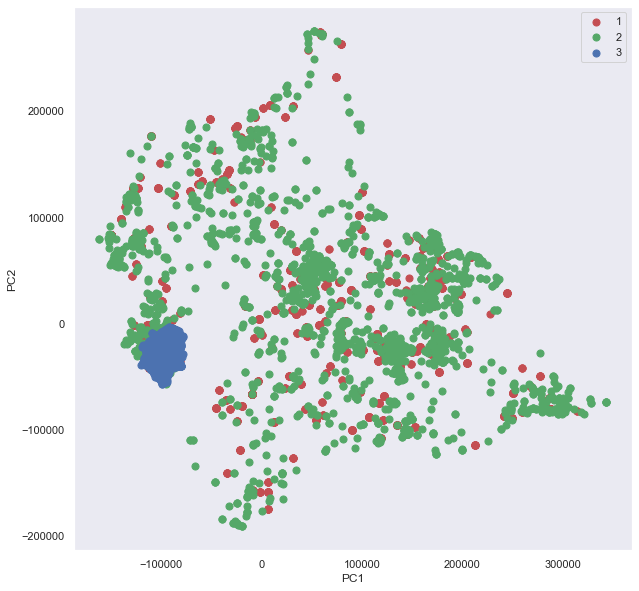

In [311]:
#Let's also visualize the outcome of the PCA.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Final_df['Accident_Severity'] == target
    ax.scatter(Final_df.loc[indicesToKeep, 'PC1']
               , Final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [312]:
# Using DBSCAN to visualise our data points
#from sklearn.cluster import DBSCAN

#bscan_opt = DBSCAN(eps=31, min_samples=100)
#dbscan_opt.fit(Final_df[0:5000])
#labels = dbscan_opt.labels_
#labels

In [313]:
#fig = plt.figure(figsize=(20,15))

#plt.scatter(Final_df[0:5000]["PC1"], Final_df[0:5000]["PC2"],Final_df[0:5000]["PC2"], c=labels, cmap="rainbow")

#plt.show()

#### Predicting the best features and random forest parameters using "KBest" and "Chi2"

In [314]:
resampled_combined_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 44298 to 15608
Data columns (total 73 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               9000 non-null   object        
 1   Location_Easting_OSGR                        9000 non-null   float64       
 2   Location_Northing_OSGR                       9000 non-null   float64       
 3   Longitude                                    9000 non-null   float64       
 4   Latitude                                     9000 non-null   float64       
 5   Police_Force                                 9000 non-null   int64         
 6   Accident_Severity                            9000 non-null   int64         
 7   Number_of_Vehicles                           9000 non-null   int64         
 8   Number_of_Casualties                         9000 non-null   int64       

In [315]:
resampled_combined_df_2019

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
44298  2019140856360               440724.0                392462.0   
7487   2019010174643               531334.0                167732.0   
26304  201906F263391               381163.0                399457.0   
10107  2019010181191               541143.0                168285.0   
70629  2019320691732               506907.0                317187.0   
...              ...                    ...                     ...   
15595  2019010194724               531441.0                186804.0   
15601  2019010194737               541081.0                174297.0   
15604  2019010194751               531450.0                190573.0   
15607  2019010194766               541072.0                174405.0   
15608  2019010194766               541072.0                174405.0   

       Longitude   Latitude  Police_Force  Accident_Severity  \
44298  -1.388591  53.427402            14                  1   
7487   -0.113668  51.393434             1                  1   
26304  -2.285381  53.491497             6                  1   
10107   0.027447  51.396051             1                  1   
70629  -0.417852  52.741769            32                  1   
...          ...        ...           ...                ...   
15595  -0.105040  51.564804             1                  3   
15601   0.028948  51.450090             1                  3   
15604  -0.103502  51.598672             1                  3   
15607   0.028862  51.451063             1                  3   
15608   0.028862  51.451063             1                  3   

       Number_of_Vehicles  Number_of_Casualties       Date  ...  \
44298                   1                     2 2019-06-30  ...   
7487                    1                     1 2019-11-04  ...   
26304                   1                     2 2019-10-27  ...   
10107                   2                     2 2019-05-16  ...   
70629                   3                     2 2019-12-27  ...   
...                   ...                   ...        ...  ...   
15595                   2                     1 2019-07-19  ...   
15601                   2                     1 2019-07-20  ...   
15604                   1                     1 2019-07-20  ...   
15607                   2                     3 2019-07-20  ...   
15608                   2                     3 2019-07-20  ...   

       Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
44298                   5.0                 1                  0.0   
7487                   10.0                 1                  2.0   
26304                   6.0                 2                  0.0   
10107                   6.0                 1                  0.0   
70629                   4.0                 1                  0.0   
...                     ...               ...                  ...   
15595                   6.0                 3                  0.0   
15601                   9.0                 3                  0.0   
15604                   5.0                 3                  5.0   
15607                   6.0                 3                  0.0   
15608                   6.0                 3                  0.0   

      Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
44298                   0            0.0                     0.0   
7487                    1            0.0                     0.0   
26304                   0            0.0                     0.0   
10107                   0            0.0                     0.0   
70629                   0            0.0                     0.0   
...                   ...            ...                     ...   
15595                   0            0.0                     0.0   
15601                   0            2.0                     0.0   
15604                   3            0.0                     0.0   
15607                   0            0.0                  

In [316]:
resampled_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77955 entries, 44298 to 101904
Data columns (total 73 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               77955 non-null  object        
 1   Location_Easting_OSGR                        77955 non-null  float64       
 2   Location_Northing_OSGR                       77955 non-null  float64       
 3   Longitude                                    77955 non-null  float64       
 4   Latitude                                     77955 non-null  float64       
 5   Police_Force                                 77955 non-null  int64         
 6   Accident_Severity                            77955 non-null  int64         
 7   Number_of_Vehicles                           77955 non-null  int64         
 8   Number_of_Casualties                         77955 non-null  int64     

In [317]:
resampled_combined_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
44298   2019140856360               440724.0                392462.0   
7487    2019010174643               531334.0                167732.0   
26304   201906F263391               381163.0                399457.0   
10107   2019010181191               541143.0                168285.0   
70629   2019320691732               506907.0                317187.0   
...               ...                    ...                     ...   
101889  201963D117219               325010.0                308850.0   
101895  201963D118419               326240.0                316540.0   
101896  201963D118519               303570.0                291380.0   
101898  201963D118519               303570.0                291380.0   
101904  201963D120419               326660.0                320930.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
44298   -1.388591  53.427402            14                  1   
7487    -0.113668  51.393434             1                  1   
26304   -2.285381  53.491497             6                  1   
10107    0.027447  51.396051             1                  1   
70629   -0.417852  52.741769            32                  1   
...           ...        ...           ...                ...   
101889  -3.110449  52.672162            63                  3   
101895  -3.093991  52.741448            63                  3   
101896  -3.422340  52.511764            63                  3   
101898  -3.422340  52.511764            63                  3   
101904  -3.088755  52.780962            63                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
44298                    1                     2 2019-06-30  ...   
7487                     1                     1 2019-11-04  ...   
26304                    1                     2 2019-10-27  ...   
10107                    2                     2 2019-05-16  ...   
70629                    3                     2 2019-12-27  ...   
...                    ...                   ...        ...  ...   
101889                   2                     1 2019-11-12  ...   
101895                   2                     2 2019-12-13  ...   
101896                   2                     3 2019-05-12  ...   
101898                   2                     3 2019-05-12  ...   
101904                   2                     1 2019-07-12  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
44298                    5.0                 1                  0.0   
7487                    10.0                 1                  2.0   
26304                    6.0                 2                  0.0   
10107                    6.0                 1                  0.0   
70629                    4.0                 1                  0.0   
...                      ...               ...                  ...   
101889                   7.0                 3                  0.0   
101895                   6.0                 3                  0.0   
101896                  10.0                 3                  0.0   
101898                   8.0                 3                  0.0   
101904                   9.0                 3                  0.0   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
44298                    0            0.0                     0.0   
7487                     1            0.0                     0.0   
26304                    0            0.0                     0.0   
10107                    0            0.0                     0.0   
70629                    0            0.0                     0.0   
...                    ...            ...                     ...   
101889                   0            0.0                     0.0   
101895                   0            0.0                     0.0   
101896                   0            0.0                     0.0   
1

In [318]:
# defining model training parameters

#X_rf_pca = x_train[0:10000]
#y_rf_pca = y_train[0:10000]
#x_train = X_rf_pca
#y_train = y_rf_pca
#x_test = X_validation
#y_test = y_validation

### Training Models

In [319]:
# Spliting the test and training datasets
X = resampled_combined_df[features]
y = resampled_combined_df['Accident_Severity']

#X = X.reset_index(drop=True)
#y = y.reset_index(drop=True)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2, shuffle = True)
x_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

In [320]:
X

Police_Force  Local_Authority_(District)  Location_Easting_OSGR  \
44298             14                         213               440724.0   
7487               1                          20               531334.0   
26304              6                         107               381163.0   
10107              1                          19               541143.0   
70629             32                         355               506907.0   
...              ...                         ...                    ...   
101889            63                         753               325010.0   
101895            63                         753               326240.0   
101896            63                         753               303570.0   
101898            63                         753               303570.0   
101904            63                         753               326660.0   

         Latitude  Longitude  Location_Northing_OSGR  Age_of_Casualty  \
44298   53.427402  -1.388591                392462.0             24.0   
7487    51.393434  -0.113668                167732.0             71.0   
26304   53.491497  -2.285381                399457.0             32.0   
10107   51.396051   0.027447                168285.0             28.0   
70629   52.741769  -0.417852                317187.0             20.0   
...           ...        ...                     ...              ...   
101889  52.672162  -3.110449                308850.0             42.0   
101895  52.741448  -3.093991                316540.0             29.0   
101896  52.511764  -3.422340                291380.0             70.0   
101898  52.511764  -3.422340                291380.0             52.0   
101904  52.780962  -3.088755                320930.0             63.0   

        Engine_Capacity_(CC)  Weeks  decimal_time  ...  Number_of_Vehicles  \
44298                 1998.0     26      1.466667  ...                   1   
7487                  8710.0     45     15.333333  ...                   1   
26304                 1995.0     43     12.650000  ...                   1   
10107                  124.0     20      7.933333  ...                   2   
70629                 1242.0     52     17.850000  ...                   3   
...                      ...    ...           ...  ...                 ...   
101889                 471.0     46      7.750000  ...                   2   
101895                1560.0     50      7.900000  ...                   2   
101896                1398.0     19     13.866667  ...                   2   
101898                1798.0     19     13.866667  ...                   2   
101904                1956.0     28     17.100000  ...                   2   

        Junction_Detail  Junction_Location  Vehicle_Type  Casualty_Type  \
44298               3.0                1.0           9.0            9.0   
7487                3.0                1.0          21.0            0.0   
26304               1.0                4.0           9.0            9.0   
10107               3.0                8.0           4.0            4.0   
70629               3.0                1.0           9.0            9.0   
...                 ...                ...           ...            ...   
101889              3.0                1.0           5.0            5.0   
101895              3.0                1.0           9.0            9.0   
101896              3.0                6.0           9.0            9.0   
101898              3.0                1.0           9.0            9.0   
101904              6.0                1.0           9.0            9.0   

        1st_Road_Class  Journey_Purpose_of_Driver  \
44298                3                        6.0   
7487                 4                        1.0   
26304                3                        6.0   
10107                4                        6.0   
70629                3                        6.0   
...                ...                        ...   
101889               

In [321]:
y

44298     1
7487      1
26304     1
10107     1
70629     1
         ..
101889    3
101895    3
101896    3
101898    3
101904    3
Name: Accident_Severity, Length: 77955, dtype: int64

#### Naive Bayes Classifier

In [322]:
%%time
gnb = GaussianNB()
gnb.fit(x_train, y_train)
nb_pred = gnb.predict(x_test)
nb_pred_train = gnb.predict(x_train)
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != nb_pred).sum()))

Number of mislabeled points out of a total 15591 points : 7837
Wall time: 182 ms


In [323]:
# Using classification report
print(classification_report(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred),"\n")

# Calculating accuracy score for naive bayes model
print("The Training accuracy score is :",round(accuracy_score(y_train, nb_pred_train),2))
print("The Validation accuracy score is :", round(accuracy_score(y_test, nb_pred),2))
print("The number of correctly predicted points are :", round(accuracy_score(y_test, nb_pred, normalize=False),2))

              precision    recall  f1-score   support

           1       0.62      0.44      0.51      5160
           2       0.39      0.29      0.33      5237
           3       0.49      0.76      0.60      5194

    accuracy                           0.50     15591
   macro avg       0.50      0.50      0.48     15591
weighted avg       0.50      0.50      0.48     15591

[[2261 1605 1294]
 [ 932 1520 2785]
 [ 445  776 3973]] 

The Training accuracy score is : 0.5
The Validation accuracy score is : 0.5
The number of correctly predicted points are : 7754


#### Decision Tree Classifier

In [324]:
%%time
dt_clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,)
dt_clf = dt_clf.fit(x_train, y_train)

# Decision tree prediction

dt_pred = dt_clf.predict(x_test)
dt_pred_train = dt_clf.predict(x_train)
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != dt_pred).sum()))

Number of mislabeled points out of a total 15591 points : 1614
Wall time: 1.43 s


In [325]:
# Lets see how our decision tree model performed

# Using classification report
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred),"\n")

# Calculating accuracy score for Decision Tree model
print("The Training accuracy score is :",round(accuracy_score(y_train, dt_pred_train),2))
print("The Validation accuracy score is :", round(accuracy_score(y_test, dt_pred),2))
print("The number of correctly predicted points are :", round(accuracy_score(y_test, dt_pred, normalize=False),2))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      5160
           2       0.82      0.91      0.86      5237
           3       0.90      0.78      0.84      5194

    accuracy                           0.90     15591
   macro avg       0.90      0.90      0.90     15591
weighted avg       0.90      0.90      0.90     15591

[[5160    0    0]
 [  40 4745  452]
 [  87 1035 4072]] 

The Training accuracy score is : 0.95
The Validation accuracy score is : 0.9
The number of correctly predicted points are : 13977


#### Random Forest Classifier

In [326]:
%%time
#x, y = make_classification(n_samples=1000, n_features=4,
                                #n_informative=2, n_redundant=0,
                                #random_state=0, shuffle=False)
rf_clf = RandomForestClassifier(n_estimators=300, 
                              criterion='gini', 
                              max_depth=20, 
                              min_samples_split=2,
                              min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0,
                              max_features='auto', 
                              max_leaf_nodes=1800,
                              min_impurity_decrease=0.0, 
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=-1, 
                              random_state=None, 
                              verbose=1,
                              warm_start=False,
                              class_weight=None, 
                              ccp_alpha=0.0,
                              max_samples=None)

rf_clf.fit(x_train, y_train)

# Predicting training data
rf_pred_train = rf_clf.predict(x_train)
# predicting test data
rf_pred = rf_clf.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != rf_pred).sum()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.4s finished


Number of mislabeled points out of a total 15591 points : 1019
Wall time: 32.2 s


In [327]:
# Lets see how our random forest model performed

# Using classification report
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred),"\n")

# Calculating accuracy score for Random Forest model
print("The Training accuracy score is :",round(accuracy_score(y_train,rf_pred_train),2))
print("The Validation accuracy score is :", round(accuracy_score(y_test, rf_pred),2))
print("The number of correctly predicted points are :", round(accuracy_score(y_test, rf_pred, normalize=False),2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5160
           2       0.89      0.92      0.90      5237
           3       0.91      0.89      0.90      5194

    accuracy                           0.93     15591
   macro avg       0.94      0.93      0.93     15591
weighted avg       0.93      0.93      0.93     15591

[[5160    0    0]
 [   0 4805  432]
 [   0  587 4607]] 

The Training accuracy score is : 0.97
The Validation accuracy score is : 0.93
The number of correctly predicted points are : 14572


In [328]:
rf_clf_proba  = rf_clf.predict_proba(combined_df_2019[features])
rf_clf_proba

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.4s finished


array([[0.15578371, 0.36992494, 0.47429135],
       [0.09936771, 0.37761852, 0.52301376],
       [0.09936771, 0.37761852, 0.52301376],
       ...,
       [0.0928087 , 0.4077711 , 0.49942021],
       [0.07937902, 0.41856338, 0.50205759],
       [0.08938594, 0.41197529, 0.49863877]])

In [329]:
rf_clf.predict(x_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.9s finished


array([1, 1, 1, ..., 2, 2, 3], dtype=int64)

In [330]:
resampled_combined_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 44298 to 15608
Data columns (total 73 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               9000 non-null   object        
 1   Location_Easting_OSGR                        9000 non-null   float64       
 2   Location_Northing_OSGR                       9000 non-null   float64       
 3   Longitude                                    9000 non-null   float64       
 4   Latitude                                     9000 non-null   float64       
 5   Police_Force                                 9000 non-null   int64         
 6   Accident_Severity                            9000 non-null   int64         
 7   Number_of_Vehicles                           9000 non-null   int64         
 8   Number_of_Casualties                         9000 non-null   int64       

In [331]:
# Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [332]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8)

classifier_dict = {}
classifier_probability ={}

# Applying bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=2, random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(x_train, y_train)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]

from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(x_train, y_train) 
    
    # We can also get the probabilities of our models. 
    classifier_probability[classifier] = classifier.predict_proba(x_train)
    
    # Predict y_pred
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classifier_dict[classifier_name] = round(accuracy,2)
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, round(accuracy,2)))


from sklearn.metrics import classification_report

y_pred_rf= rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

Logistic Regression : 0.55
K Nearest Neighbours : 0.90
Decision Tree : 0.94
Random Forest : 0.98
AdaBoost : 0.68
Bagging Classifier : 0.97
[19:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 0.97
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5160
           2       0.95      0.98      0.96      5237
           3       0.98      0.95      0.96      5194

    accuracy                           0.98     15591
   macro avg       0.98      0.98      0.98     15591
weighted avg       0.98      0.98      0.98     15591



In [333]:
# Defining a function for stacking.
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Getting the models required after adding stacking
def get_models():
    models = dict()
    models['GaussianNB'] = GaussianNB()
    models['Stacking Models'] = get_stacking()
    return models

# Function to evaluate the models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    train_result = model.fit(X,y)
    return scores, train_result

# Defining the probability dictionary
classifier_probability2 = {}
t_result = []
gnb_stack_result_dict = {}

#Grab hold of the dataset.
X, y = get_dataset()

#Grab the models to use.
models = get_models()

#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores, train_result = evaluate_model(model, x_train, y_train)
    results.append(scores)
    t_result.append(train_result)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
    classifier_probability2[model] = model.predict_proba(x_train)
    gnb_stack_result_dict[name] = mean(scores)

>GaussianNB 0.498 (0.007)
>Stacking Models 0.952 (0.003)


In [334]:
gnb_stack_result_dict

{'GaussianNB': 0.49831645632194416, 'Stacking Models': 0.9517509903601414}

In [335]:
# Table showing result of all classifiers used
classfier_df1 = pd.DataFrame(gnb_stack_result_dict, index=[0]).T
classfier_df1.reset_index()
classfier_df1.columns = ["Accuracy"]
classfier_df1

Accuracy
GaussianNB       0.498316
Stacking Models  0.951751

In [336]:
# Coverting the probability predictions of the first set of classifiers into a listed array
clf0 = classifier_probability.keys()
lst_clf0 = []
for i in clf0:
    lst_clf0.append((classifier_probability[i]))
lst_clf0[0]

array([[0.12823389, 0.51918614, 0.35257997],
       [0.87692305, 0.09601026, 0.02706668],
       [0.40802665, 0.46975587, 0.12221748],
       ...,
       [0.12671312, 0.43797934, 0.43530755],
       [0.06191007, 0.22628182, 0.7118081 ],
       [0.20356814, 0.4372524 , 0.35917946]])

In [337]:
# Coverting the probability predictions of the second set of classifiers into a listed array
clf1 = classifier_probability.keys()
lst_clf1 = []
for i in clf1:
    lst_clf1.append((classifier_probability[i]))
lst_clf1[0]

array([[0.12823389, 0.51918614, 0.35257997],
       [0.87692305, 0.09601026, 0.02706668],
       [0.40802665, 0.46975587, 0.12221748],
       ...,
       [0.12671312, 0.43797934, 0.43530755],
       [0.06191007, 0.22628182, 0.7118081 ],
       [0.20356814, 0.4372524 , 0.35917946]])

In [338]:
# Converted the first set of classifiers into dataframes
classifier_pro0 = pd.DataFrame(lst_clf0[0], columns=["lr1","lr2","lr3"])
classifier_pro1 = pd.DataFrame(lst_clf0[1], columns=["knn1","knn2","knn3"])
classifier_pro2 = pd.DataFrame(lst_clf0[2], columns=["dt1","dt2","dt3"])
classifier_pro3 = pd.DataFrame(lst_clf0[3], columns=["rf1","rf2","rf3"])
classifier_pro4 = pd.DataFrame(lst_clf0[4], columns=["adab1","adab2","adab3"])
classifier_pro5 = pd.DataFrame(lst_clf0[5], columns=["bagg1","bagg2","bagg3"])
classifier_pro6 = pd.DataFrame(lst_clf0[6], columns=["xgb1","xgb2","xgb3"])


classifier_pro6

xgb1      xgb2      xgb3
0      9.996133e-01  0.000273  0.000114
1      9.997738e-01  0.000002  0.000224
2      9.997346e-01  0.000033  0.000232
3      3.683881e-09  0.009086  0.990914
4      1.183956e-06  0.019058  0.980941
...             ...       ...       ...
62359  9.590540e-06  0.998335  0.001655
62360  1.019106e-05  0.998980  0.001010
62361  2.048203e-06  0.996941  0.003057
62362  8.101724e-10  0.994089  0.005911
62363  7.900312e-08  0.000055  0.999945

[62364 rows x 3 columns]

In [339]:
# Converted the second set of classifiers into dataframes
classifier_pro7 = pd.DataFrame(lst_clf1[0], columns=["gnb1","gnb2","gnb3"])
classifier_pro8 = pd.DataFrame(lst_clf1[1], columns=["stack1","stack2","stack3"])


classifier_pro8

stack1  stack2  stack3
0         1.0     0.0     0.0
1         1.0     0.0     0.0
2         1.0     0.0     0.0
3         0.0     0.0     1.0
4         0.0     0.0     1.0
...       ...     ...     ...
62359     0.0     1.0     0.0
62360     0.0     1.0     0.0
62361     0.0     1.0     0.0
62362     0.0     1.0     0.0
62363     0.0     0.0     1.0

[62364 rows x 3 columns]

In [340]:
# converting all probability into one dataframe
gen_proba_df = pd.concat([classifier_pro0,classifier_pro1,classifier_pro2,classifier_pro3,classifier_pro4,classifier_pro5,classifier_pro6,classifier_pro7,classifier_pro8], axis=1)
gen_proba_df

lr1       lr2       lr3  knn1  knn2  knn3  dt1  dt2  dt3  \
0      0.128234  0.519186  0.352580   1.0   0.0   0.0  1.0  0.0  0.0   
1      0.876923  0.096010  0.027067   1.0   0.0   0.0  1.0  0.0  0.0   
2      0.408027  0.469756  0.122217   1.0   0.0   0.0  1.0  0.0  0.0   
3      0.058397  0.403750  0.537853   0.0   0.0   1.0  0.0  0.0  1.0   
4      0.661840  0.204031  0.134130   0.0   0.0   1.0  0.0  0.0  1.0   
...         ...       ...       ...   ...   ...   ...  ...  ...  ...   
62359  0.486306  0.423962  0.089732   0.0   1.0   0.0  0.0  1.0  0.0   
62360  0.756156  0.168777  0.075067   0.0   1.0   0.0  0.0  1.0  0.0   
62361  0.126713  0.437979  0.435308   0.0   1.0   0.0  0.0  1.0  0.0   
62362  0.061910  0.226282  0.711808   0.0   1.0   0.0  0.0  1.0  0.0   
62363  0.203568  0.437252  0.359179   0.0   0.0   1.0  0.0  0.0  1.0   

            rf1  ...     bagg3          xgb1      xgb2      xgb3      gnb1  \
0      0.990156  ...  0.003196  9.996133e-01  0.000273  0.000114  0.128234   
1      0.990244  ...  0.002287  9.997738e-01  0.000002  0.000224  0.876923   
2      0.999484  ...  0.000000  9.997346e-01  0.000033  0.000232  0.408027   
3      0.000000  ...  0.978333  3.683881e-09  0.009086  0.990914  0.058397   
4      0.010000  ...  0.942500  1.183956e-06  0.019058  0.980941  0.661840   
...         ...  ...       ...           ...       ...       ...       ...   
62359  0.000000  ...  0.002000  9.590540e-06  0.998335  0.001655  0.486306   
62360  0.000000  ...  0.006000  1.019106e-05  0.998980  0.001010  0.756156   
62361  0.000000  ...  0.000000  2.048203e-06  0.996941  0.003057  0.126713   
62362  0.000000  ...  0.015762  8.101724e-10  0.994089  0.005911  0.061910   
62363  0.029778  ...  0.963333  7.900312e-08  0.000055  0.999945  0.203568   

           gnb2      gnb3  stack1  stack2  stack3  
0      0.519186  0.352580     1.0     0.0     0.0  
1      0.096010  0.027067     1.0     0.0     0.0  
2      0.469756  0.122217     1.0     0.0     0.0  
3      0.403750  0.537853     0.0     0.0     1.0  
4      0.204031  0.134130     0.0     0.0     1.0  
...         ...       ...     ...     ...     ...  
62359  0.423962  0.089732     0.0     1.0     0.0  
62360  0.168777  0.075067     0.0     1.0     0.0  
62361  0.437979  0.435308     0.0     1.0     0.0  
62362  0.226282  0.711808     0.0     1.0     0.0  
62363  0.437252  0.359179     0.0     0.0     1.0  

[62364 rows x 27 columns]

In [341]:
# Table showing result of all classifiers used
classfier_df0 = pd.DataFrame(classifier_dict, index=[0]).T
classfier_df0.reset_index()
classfier_df0.columns = ["Accuracy"]
classfier_df0

Accuracy
Logistic Regression       0.55
K Nearest Neighbours      0.90
Decision Tree             0.94
Random Forest             0.98
AdaBoost                  0.68
Bagging Classifier        0.97
XGBoost                   0.97

In [342]:
# Creating a general table for all model training accuracy.
combined_train_accuracy_table = pd.concat([classfier_df0,classfier_df1], axis=0)
combined_train_accuracy_table

Accuracy
Logistic Regression   0.550000
K Nearest Neighbours  0.900000
Decision Tree         0.940000
Random Forest         0.980000
AdaBoost              0.680000
Bagging Classifier    0.970000
XGBoost               0.970000
GaussianNB            0.498316
Stacking Models       0.951751

In [343]:
# K-nearest neighour classifier
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
km_range = range(1,50)
for k in km_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train,y_train)
    predict_test = knn_model.predict(x_test)
    error_rate.append(np.mean(predict_test != y_test))

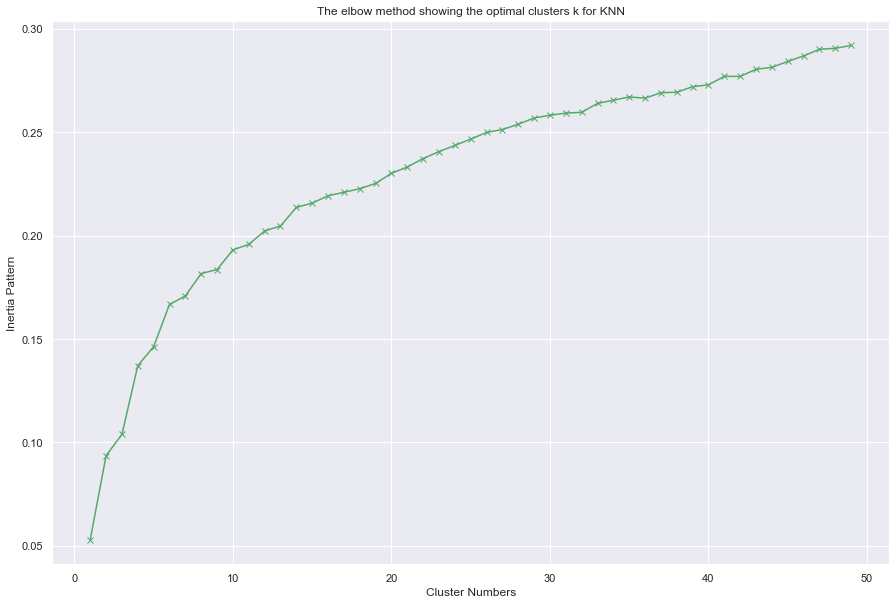

In [344]:
plt.figure(figsize=(15,10))
plt.plot(km_range,error_rate, "gx-" )
plt.xlabel("Cluster Numbers")
plt.ylabel("Inertia Pattern")
plt.title("The elbow method showing the optimal clusters k for KNN")
plt.show()

### Building the probability model sheet

In [345]:
#X, y = sm.fit_resample(new_X, new_y.ravel())  

In [346]:
new_df = combined_df_2019
new_df["Accident_Severity"].replace(1,2, inplace=True)
new_df["Accident_Severity"].unique()

array([3, 2], dtype=int64)

In [347]:
new_df["Accident_Severity"].value_counts()

3    83921
2    25597
Name: Accident_Severity, dtype: int64

In [348]:
#new_df.replace(-1, np.nan, inplace=True)
#new_df.dropna(inplace=True)

In [349]:
# Setting a control to regulate the amount of rows to train with
serious_newsampled = (new_df[lambda x:x.Accident_Severity == 2])
slight_newsampled = (new_df[lambda x:x.Accident_Severity == 3])

serious_upsampled = resample(serious_newsampled, replace=True, n_samples = len(slight_newsampled), random_state=2)

resampled_new_df = pd.concat([serious_upsampled, slight_newsampled])
len(resampled_new_df)

167842

In [350]:
resampled_new_df

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
103747  2019940882835               313705.0                688810.0   
16232   2019010196157               535497.0                194236.0   
35146   2019110831451               440622.0                536385.0   
56009   2019200914405               404209.0                305942.0   
84796   2019450822677               500947.0                152911.0   
...               ...                    ...                     ...   
109512  2019984106819               303932.0                610445.0   
109513  2019984106919               312635.0                573392.0   
109514  2019984107019               337522.0                591682.0   
109515  2019984107219               318544.0                567087.0   
109516  2019984107419               336525.0                584226.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
103747  -3.388256  56.084271            94                  2   
16232   -0.043692  51.630629             1                  2   
35146   -1.370889  54.720839            11                  2   
56009   -1.939213  52.651210            20                  2   
84796   -0.554455  51.266422            45                  2   
...           ...        ...           ...                ...   
109512  -3.517671  55.378549            98                  3   
109513  -3.368899  55.047323            98                  3   
109514  -2.983499  55.215407            98                  3   
109515  -3.274645  54.991685            98                  3   
109516  -2.997491  55.148292            98                  3   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
103747                   2                     1 2019-09-30  ...   
16232                    1                     1 2019-07-26  ...   
35146                    2                     2 2019-04-13  ...   
56009                    2                     1 2019-05-12  ...   
84796                    1                     2 2019-12-03  ...   
...                    ...                   ...        ...  ...   
109512                   3                     2 2019-05-30  ...   
109513                   1                     1 2019-05-18  ...   
109514                   4                     1 2019-05-30  ...   
109515                   2                     1 2019-06-21  ...   
109516                   1                     1 2019-06-29  ...   

        Age_Band_of_Casualty Casualty_Severity  Pedestrian_Location  \
103747                     7                 2                    0   
16232                      2                 2                    9   
35146                      3                 2                    0   
56009                      4                 2                    0   
84796                      6                 3                    0   
...                      ...               ...                  ...   
109512                    10                 3                    0   
109513                     5                 3                    0   
109514                     5                 3                    0   
109515                     9                 3                    0   
109516                     8                 3                    5   

       Pedestrian_Movement  Car_Passenger  Bus_or_Coach_Passenger  \
103747                   0              0                       0   
16232                    6              0                       0   
35146                    0              0                       0   
56009                    0              0                       0   
84796                    0              0                       0   
...                    ...            ...                     ...   
109512                   0              1                       0   
109513                   0              0                       0   
109514                   0              0                       0   
1

In [351]:
#resampled_new_df = resampled_new_df.reset_index(drop=True)
#resampled_new_df

In [352]:
new_X = resampled_new_df[features]
new_y = resampled_new_df["Accident_Severity"]

In [353]:
#new_X = new_df[features]
#new_y = new_df["Accident_Severity"]

In [354]:
new_X

Police_Force  Local_Authority_(District)  Location_Easting_OSGR  \
103747            94                         925               313705.0   
16232              1                          32               535497.0   
35146             11                         169               440622.0   
56009             20                         307               404209.0   
84796             45                         511               500947.0   
...              ...                         ...                    ...   
109512            98                         917               303932.0   
109513            98                         917               312635.0   
109514            98                         917               337522.0   
109515            98                         917               318544.0   
109516            98                         917               336525.0   

         Latitude  Longitude  Location_Northing_OSGR  Age_of_Casualty  \
103747  56.084271  -3.388256                688810.0               40   
16232   51.630629  -0.043692                194236.0                7   
35146   54.720839  -1.370889                536385.0               14   
56009   52.651210  -1.939213                305942.0               17   
84796   51.266422  -0.554455                152911.0               27   
...           ...        ...                     ...              ...   
109512  55.378549  -3.517671                610445.0               70   
109513  55.047323  -3.368899                573392.0               24   
109514  55.215407  -2.983499                591682.0               22   
109515  54.991685  -3.274645                567087.0               61   
109516  55.148292  -2.997491                584226.0               54   

        Engine_Capacity_(CC)  Weeks  decimal_time  ...  Number_of_Vehicles  \
103747                   124     40     15.583333  ...                   2   
16232                   1360     30     22.666667  ...                   1   
35146                     -1     15     21.750000  ...                   2   
56009                    125     19     17.033333  ...                   2   
84796                   2143     49      8.666667  ...                   1   
...                      ...    ...           ...  ...                 ...   
109512                  1368     22     17.000000  ...                   3   
109513                  1997     20      1.000000  ...                   1   
109514                  2143     22      8.766667  ...                   4   
109515                  2967     25     15.500000  ...                   2   
109516                  1597     26     14.166667  ...                   1   

        Junction_Detail  Junction_Location  Vehicle_Type  Casualty_Type  \
103747                0                  0             3              3   
16232                 3                  0             9              0   
35146                 3                  6             3              3   
56009                 3                  8             3              3   
84796                 0                  0             9              9   
...                 ...                ...           ...            ...   
109512                0                  0             9              9   
109513                0                  0            19             19   
109514                0                  0            19             19   
109515                3                  1             9              9   
109516                3                  6             9              0   

        1st_Road_Class  Journey_Purpose_of_Driver  \
103747               3                          6   
16232                4                          6   
35146                4                          5   
56009                3                          6   
84796                6                          6   
...                ...                        ...   
109512               

In [355]:
#aob = StandardScaler().fit_transform(new_X)

In [356]:
# Splitting test and train data
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y,test_size= 0.10,random_state=42, shuffle=True)
new_X_train = sc.fit_transform(new_X_train)
new_X_test = sc.transform(new_X_test)

In [357]:
%%time
# Training the Model
#x, y = make_classification(n_samples=1000, n_features=4,
                                #n_informative=2, n_redundant=0,
                                #random_state=0, shuffle=False)
rf_clf = RandomForestClassifier(n_estimators=600, 
                              criterion='entropy', 
                              max_depth=20, 
                              min_samples_split=2,
                              min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0,
                              max_features= "auto", 
                              max_leaf_nodes=1800,
                              min_impurity_decrease=0.0, 
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=-1, 
                              random_state=None, 
                              verbose=1,
                              warm_start=False,
                              class_weight=None, 
                              ccp_alpha=0.0,
                              max_samples=None)

rf_clf.fit(new_X_train, new_y_train)

# Predicting training data
rf_pred_train = rf_clf.predict(new_X_train)
# predicting test data
rf_pred = rf_clf.predict(new_X_test)
print("Number of mislabeled points out of a total %d points : %d"% (new_X_test.shape[0], (new_y_test != rf_pred).sum()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    8.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s


Number of mislabeled points out of a total 16785 points : 3119
Wall time: 3min 21s


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    1.0s finished


In [358]:
# Training result and prediction analysis
# Lets see how our random forest model performed

# Using classification report
print(classification_report(new_y_test,rf_pred))
print(confusion_matrix(new_y_test,rf_pred),"\n")

# Calculating accuracy score for Random Forest model
print("The Training accuracy score is :",round(accuracy_score(new_y_train,rf_pred_train),2))
print("The Validation accuracy score is :", round(accuracy_score(new_y_test, rf_pred),2))
print("The number of correctly predicted points are :", round(accuracy_score(new_y_test, rf_pred, normalize=False),2))

              precision    recall  f1-score   support

           2       0.79      0.85      0.82      8357
           3       0.84      0.78      0.81      8428

    accuracy                           0.81     16785
   macro avg       0.82      0.81      0.81     16785
weighted avg       0.82      0.81      0.81     16785

[[7114 1243]
 [1876 6552]] 

The Training accuracy score is : 0.85
The Validation accuracy score is : 0.81
The number of correctly predicted points are : 13666


In [359]:
len(slight_newsampled)

83921

In [360]:
# Importing the required libraries
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.utils import resample

In [361]:
# Defining a function for stacking.

# Getting features for the training
#The new bit is to use test-train split like so:

#def get_dataset():
#    X_resamp, y_resamp = sm.fit_resample(Xfeatures, y_target.ravel())
#    X_train, X_validation, y_train, y_validation = train_test_split(X_resamp,y_resamp,test_size=.25,random_state=1, shuffle=True)
#    return X_train, y_train

from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Getting the models required after adding stacking
def get_models():
    models = dict()
    models['rf'] = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
#    models['Stacking Models'] = get_stacking()
    return models


# Function to evaluate the models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=1)
    model.fit(X,y)
    return scores

# Defining the probability dictionary
classifier_probability3 = {}
t_result = []
all_model_result_dict = {}

#Grab hold of the dataset.
#X, y = get_dataset()

#Grab the models to use.
models = get_models()

#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, new_X_train, new_y_train)
    results.append(scores)
   # t_result.append(train_result)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
    classifier_probability3[model] = model.predict_proba(new_X_train)
    all_model_result_dict[name] = mean(scores)
    y_pred =  models['rf'].predict(new_X_test)
    y_pred_proba = models['rf'].predict_proba(new_X_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.0min finished


>rf 0.945 (0.002)


In [362]:
y_pred_proba_gen = models['rf'].predict_proba(combined_df_2019[features])

In [363]:
# Table showing result of all classifiers used
classfier_df2 = pd.DataFrame(all_model_result_dict, index=[0]).T
classfier_df2.reset_index()
classfier_df2.columns = ["Accuracy"]
classfier_df2

Accuracy
rf   0.94516

In [364]:
# Extracting the needed array for assessment
new_df_proba = classifier_probability3.values()
new_df_proba_gen = list(new_df_proba)
new_df_proba_gen

[array([[0.05216667, 0.94783333],
        [0.75741667, 0.24258333],
        [0.12533333, 0.87466667],
        ...,
        [0.07566667, 0.92433333],
        [0.044     , 0.956     ],
        [0.11433333, 0.88566667]])]

In [365]:
# Checking the validation accuracy of our newly trained model to predict two classes slight and serious
print("Accuracy Score: ",{accuracy_score(new_y_test, y_pred)})

Accuracy Score:  {0.9534107834375931}


In [366]:
pred_df = pd.DataFrame(new_df_proba_gen[0], columns = ['Adjusted Serious','Adjusted Slight'])
pred_df

Adjusted Serious  Adjusted Slight
0               0.052167         0.947833
1               0.757417         0.242583
2               0.125333         0.874667
3               0.965306         0.034694
4               0.071333         0.928667
...                  ...              ...
151052          0.121833         0.878167
151053          0.167560         0.832440
151054          0.075667         0.924333
151055          0.044000         0.956000
151056          0.114333         0.885667

[151057 rows x 2 columns]

In [367]:
y_target = pd.Series(new_y_train, name = 'Accident Severity')
y_target

89329    3
3800     2
11804    3
89005    2
25495    3
        ..
45568    3
24114    3
60843    3
80872    3
48398    3
Name: Accident Severity, Length: 151057, dtype: int64

In [368]:
new_y_train

89329    3
3800     2
11804    3
89005    2
25495    3
        ..
45568    3
24114    3
60843    3
80872    3
48398    3
Name: Accident_Severity, Length: 151057, dtype: int64

In [369]:
acc_class_list = []

for serious, slight in zip(pred_df['Adjusted Serious'], pred_df['Adjusted Slight']):
    if serious > 0.5:
        acc_class_list.append(1)
    else:
        acc_class_list.append(0)

In [370]:
acc_class_series = pd.Series(acc_class_list, name = 'Acc_Class')
pred_df['Accident Severity'] = acc_class_series
pred_df['accident_index'] = new_df['Accident_Index']
pred_df = pred_df[0:109518]
pred_df

Adjusted Serious  Adjusted Slight  Accident Severity accident_index
0               0.052167         0.947833                  0  2019010128300
1               0.757417         0.242583                  1  2019010128300
2               0.125333         0.874667                  0  2019010128300
3               0.965306         0.034694                  1  2019010152270
4               0.071333         0.928667                  0  2019010155191
...                  ...              ...                ...            ...
109513          0.189000         0.811000                  0  2019984106919
109514          0.095000         0.905000                  0  2019984107019
109515          0.111333         0.888667                  0  2019984107219
109516          0.134738         0.865262                  0  2019984107419
109517          0.141591         0.858409                  0  201998QC01004

[109518 rows x 4 columns]

In [371]:
# Importing the cas adjustment lookup
cas_adjustment_lookup = pd.read_csv('cas_adjustment_lookup_2019.csv', dtype={'Accident_Index':str})
cas_adjustment_lookup

accident_index  Vehicle_Reference  Casualty_Reference  \
0        200401BS00001                  1                   1   
1        200401BS00002                  1                   1   
2        200401BS00003                  1                   1   
3        200401BS00003                  1                   2   
4        200401BS00004                  1                   1   
...                ...                ...                 ...   
3314732  2019984106919                  1                   1   
3314733  2019984107019                  1                   1   
3314734  2019984107219                  2                   1   
3314735  2019984107419                  1                   1   
3314736  201998QC01004                  1                   1   

         Adjusted_Serious  Adjusted_Slight  Injury_Based  
0                0.239280         0.760720             0  
1                1.000000         0.000000             0  
2                0.057141         0.942859             0  
3                0.048599         0.951401             0  
4                0.187000         0.813000             0  
...                   ...              ...           ...  
3314732          0.183336         0.816664             0  
3314733          0.074588         0.925412             0  
3314734          0.048524         0.951476             0  
3314735          0.183316         0.816684             0  
3314736          1.000000         0.000000             0  

[3314737 rows x 6 columns]

In [372]:
res_adj = []

for adjusted_serious, adjusted_slight in zip(cas_adjustment_lookup['Adjusted_Serious'], cas_adjustment_lookup['Adjusted_Slight']):
    if adjusted_serious > 0.5:
        res_adj.append(1)
    else:
        res_adj.append(0)

In [373]:
res_adj_series = pd.Series(res_adj, name = 'Acc_Class')
cas_adjustment_lookup['Adjusted_Acc_Class'] = res_adj_series
cas_adjustment_lookup

accident_index  Vehicle_Reference  Casualty_Reference  \
0        200401BS00001                  1                   1   
1        200401BS00002                  1                   1   
2        200401BS00003                  1                   1   
3        200401BS00003                  1                   2   
4        200401BS00004                  1                   1   
...                ...                ...                 ...   
3314732  2019984106919                  1                   1   
3314733  2019984107019                  1                   1   
3314734  2019984107219                  2                   1   
3314735  2019984107419                  1                   1   
3314736  201998QC01004                  1                   1   

         Adjusted_Serious  Adjusted_Slight  Injury_Based  Adjusted_Acc_Class  
0                0.239280         0.760720             0                   0  
1                1.000000         0.000000             0                   1  
2                0.057141         0.942859             0                   0  
3                0.048599         0.951401             0                   0  
4                0.187000         0.813000             0                   0  
...                   ...              ...           ...                 ...  
3314732          0.183336         0.816664             0                   0  
3314733          0.074588         0.925412             0                   0  
3314734          0.048524         0.951476             0                   0  
3314735          0.183316         0.816684             0                   0  
3314736          1.000000         0.000000             0                   1  

[3314737 rows x 7 columns]

In [374]:
cas_adjustment_lookup['accident_index'].isin(pred_df['accident_index']).value_counts()

False    3234752
True       79985
Name: accident_index, dtype: int64

In [375]:
# Merging government data and my predicted data
adjusted_merged = pd.merge(pred_df, cas_adjustment_lookup, how='inner', on=['accident_index'])

In [376]:
# 
adjusted_merged

Adjusted Serious  Adjusted Slight  Accident Severity accident_index  \
0               0.940905         0.059095                  1  2019040853504   
1               0.940905         0.059095                  1  2019040853504   
2               0.028750         0.971250                  0  2019040853505   
3               0.949000         0.051000                  1  2019040853506   
4               0.949000         0.051000                  1  2019040853506   
...                  ...              ...                ...            ...   
142710          0.189000         0.811000                  0  2019984106919   
142711          0.095000         0.905000                  0  2019984107019   
142712          0.111333         0.888667                  0  2019984107219   
142713          0.134738         0.865262                  0  2019984107419   
142714          0.141591         0.858409                  0  201998QC01004   

        Vehicle_Reference  Casualty_Reference  Adjusted_Serious  \
0                       1                   1          0.000000   
1                       1                   2          1.000000   
2                       2                   1          0.000000   
3                       1                   1          0.000000   
4                       2                   2          0.000000   
...                   ...                 ...               ...   
142710                  1                   1          0.183336   
142711                  1                   1          0.074588   
142712                  2                   1          0.048524   
142713                  1                   1          0.183316   
142714                  1                   1          1.000000   

        Adjusted_Slight  Injury_Based  Adjusted_Acc_Class  
0              1.000000             1                   0  
1              0.000000             1                   1  
2              1.000000             1                   0  
3              1.000000             1                   0  
4              1.000000             1                   0  
...                 ...           ...                 ...  
142710         0.816664             0                   0  
142711         0.925412             0                   0  
142712         0.951476             0                   0  
142713         0.816684             0                   0  
142714         0.000000             0                   1  

[142715 rows x 10 columns]

In [377]:
# Confirming the accuracy score bewteen my prediction and government prediction
accuracy_score(adjusted_merged['Accident Severity'], adjusted_merged['Injury_Based'])

0.4995200224223102

In [378]:
print(adjusted_merged['Accident Severity'], adjusted_merged['Injury_Based'])

0         1
1         1
2         0
3         1
4         1
         ..
142710    0
142711    0
142712    0
142713    0
142714    0
Name: Accident Severity, Length: 142715, dtype: int64 0         1
1         1
2         1
3         1
4         1
         ..
142710    0
142711    0
142712    0
142713    0
142714    0
Name: Injury_Based, Length: 142715, dtype: int64
